# 의문
1. 이상치인가? 아닌가? 이상치를 무엇으로 정의하는가?
2. seasonal이 있는지 없는지 어떻게 판단하나?
3. event holiday 영향이 있는지 어떻게 판단하나?
4. 결측치 탐색하여 결측치 많은 경우는 따로 제외하여 판단해야 하지 않을까?
5. 

In [1]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

import pandas as pd
import seaborn as sns

In [2]:
holidays = pd.read_csv(r'C:\Users\user\upstage3-python\09.ML_project_team03\assets\data\holidays_events.csv')
oil = pd.read_csv(r'C:\Users\user\upstage3-python\09.ML_project_team03\assets\data\oil.csv')
sample_submission = pd.read_csv(r'C:\Users\user\upstage3-python\09.ML_project_team03\assets\data\sample_submission.csv')
stores = pd.read_csv(r'C:\Users\user\upstage3-python\09.ML_project_team03\assets\data\stores.csv')
test = pd.read_csv(r'C:\Users\user\upstage3-python\09.ML_project_team03\assets\data\test.csv')
train = pd.read_csv(r'C:\Users\user\upstage3-python\09.ML_project_team03\assets\data\train.csv') #3000888 
#transactions = pd.read_csv(r'C:\Users\user\upstage3-python\09.ML_project_team03\assets\data\transactions.csv')
transactions = pd.read_csv(r'C:\Users\user\upstage3-python\09.ML_project_team03\assets\data\transactions3.csv')
temp = pd.read_csv(r'C:\Users\user\upstage3-python\09.ML_project_team03\assets\data\temp.csv')
temp2 = pd.read_csv(r'C:\Users\user\upstage3-python\09.ML_project_team03\assets\data\temp2.csv')

In [219]:
# 2016년 4월 16일부터 29일까지의 2주간의 sales 데이터를 2016년 4월 9일~15일 일주일간의 sales의 데이터에서 그 요일에 해당하는 데이터로 대체할거야. 
# 데이터들은 store_nbr, family, day_of_week 값이 같은 경우에만 대체해야 해. 
# 그런데 transactions에 비례해서 sales의 값을 정할거야. 


import pandas as pd
import numpy as np

temp['date'] = pd.to_datetime(temp['date'])

# 필터링할 날짜 범위 설정
target_start_date = "2016-04-16"
target_end_date = "2016-04-29"
source_start_date = "2016-04-09"
source_end_date = "2016-04-15"

# 타겟 데이터와 소스 데이터 필터링
target_temp = temp[(temp['date'] >= target_start_date) & (temp['date'] <= target_end_date)]
source_temp = temp[(temp['date'] >= source_start_date) & (temp['date'] <= source_end_date)]

# 데이터 대체 함수
def replace_sales(target_temp, source_temp):
    new_sales = []
    
    for index, row in target_temp.iterrows():
        matching_source_temp = source_temp[
            (source_temp['store_nbr'] == row['store_nbr']) &
            (source_temp['family'] == row['family']) &
            (source_temp['day_of_week'] == row['day_of_week'])
        ]
        
        if not matching_source_temp.empty:
            source_row = matching_source_temp.iloc[0]
            
            # 트랜잭션 비례로 sales 계산
            transaction_ratio = row['transactions'] / source_row['transactions']
            adjusted_sales = source_row['sales'] * transaction_ratio
            new_sales.append(adjusted_sales)
        else:
            new_sales.append(row['sales'])  # 매칭되는 소스 데이터가 없을 경우 원래 sales 값을 사용
    
    target_temp['sales'] = new_sales
    return target_temp

# 타겟 데이터를 대체 데이터로 변경
temp.loc[(temp['date'] >= target_start_date) & (temp['date'] <= target_end_date), 'sales'] = replace_sales(target_temp, source_temp)['sales']

print(temp[(temp['date'] >= target_start_date) & (temp['date'] <= target_end_date)])


C:\Users\user\AppData\Local\Temp\ipykernel_22468\2354868981.py:36: RuntimeWarning: invalid value encountered in scalar divide
  transaction_ratio = row['transactions'] / source_row['transactions']


              date  store_nbr                      family        sales  \
39534   2016-04-16          1                  AUTOMOTIVE     4.175411   
39535   2016-04-16          1                   BABY CARE     0.000000   
39536   2016-04-16          1                      BEAUTY     2.087706   
39537   2016-04-16          1                   BEVERAGES  2324.660141   
39538   2016-04-16          1                       BOOKS     0.000000   
...            ...        ...                         ...          ...   
2985307 2016-04-29          9                     POULTRY   402.340777   
2985308 2016-04-29          9              PREPARED FOODS    62.948896   
2985309 2016-04-29          9                     PRODUCE   974.987140   
2985310 2016-04-29          9  SCHOOL AND OFFICE SUPPLIES     4.936394   
2985311 2016-04-29          9                     SEAFOOD    17.503465   

         onpromotion   city      state type  cluster  transactions  ...  year  \
39534              0  Quito  P

C:\Users\user\AppData\Local\Temp\ipykernel_22468\2354868981.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_temp['sales'] = new_sales


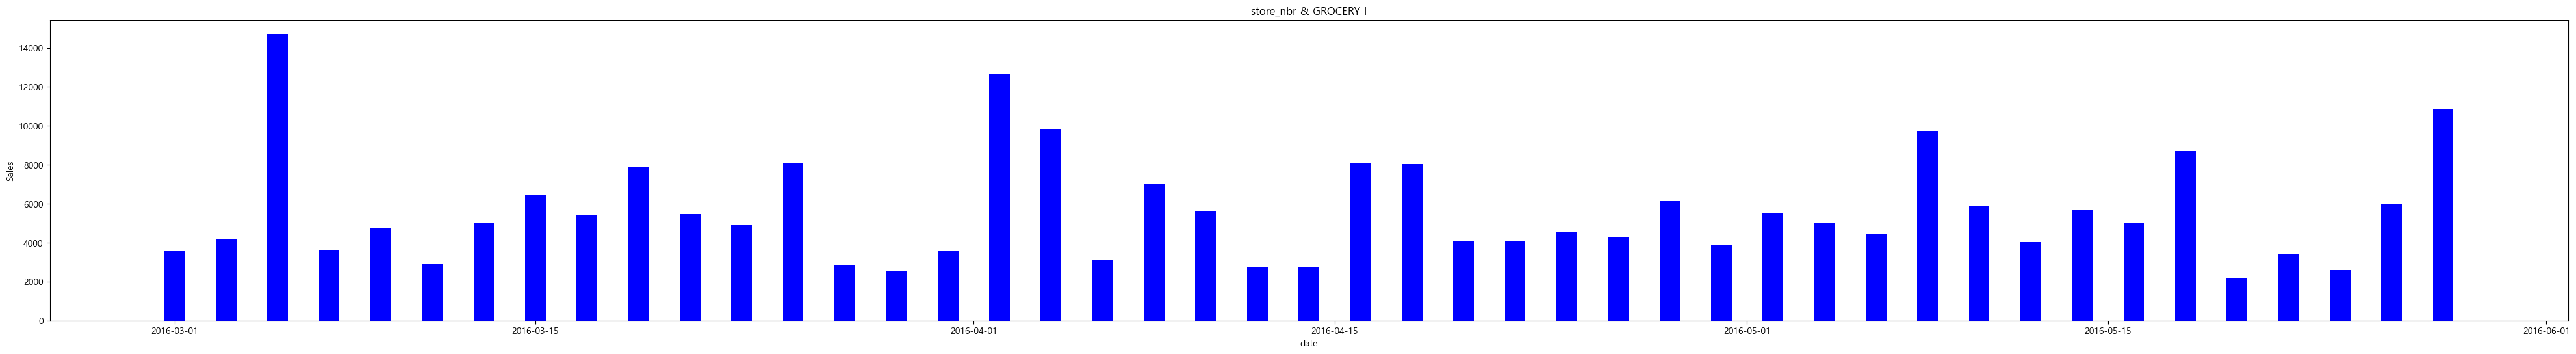

In [222]:
# 그래프로 확인
for i in range(1,2):
    filtered_data = temp[(temp['date'] >= "2016-03-01") & (temp['date'] <= "2016-05-29")&(train['store_nbr'] == i)&(train['family'] == 'GROCERY I')]
    # 데이터 시각화
    plt.figure(figsize=(50, 6))
    plt.bar(filtered_data.date, filtered_data['sales'], color='blue')

    plt.xlabel('date')
    plt.ylabel('Sales')
    plt.title(f'store_nbr & GROCERY I')
    plt.show()

In [143]:
# 2016년 4월 16일~29일 2주간 삭제 
# date 컬럼을 datetime 형식으로 변환 (만약 필요하다면)
temp['date'] = pd.to_datetime(temp['date'])

# 특정 기간을 제외한 데이터 필터링
start_date = "2016-04-16"
end_date = "2016-04-29"
temp = temp[~((temp['date'] >= start_date) & (temp['date'] <= end_date))]

In [145]:
temp[temp['date']=='2016-04-19']

Empty DataFrame
Columns: [date, store_nbr, family, sales, onpromotion, city, state, type, cluster, transactions, day_of_week, oil_price, magnitude, deaths, local_holiday, regional_holiday, national_holiday, event_holiday, wage, year, month, day, onpromotion_lag1, onpromotion_lag2, onpromotion_lag5, onpromotion_lag10, season, wage15th, wagelastday]
Index: []

[0 rows x 29 columns]

In [144]:
temp.columns

Index(['date', 'store_nbr', 'family', 'sales', 'onpromotion', 'city', 'state',
       'type', 'cluster', 'transactions', 'day_of_week', 'oil_price',
       'magnitude', 'deaths', 'local_holiday', 'regional_holiday',
       'national_holiday', 'event_holiday', 'wage', 'year', 'month', 'day',
       'onpromotion_lag1', 'onpromotion_lag2', 'onpromotion_lag5',
       'onpromotion_lag10', 'season', 'wage15th', 'wagelastday'],
      dtype='object')

In [142]:
temp2.columns

Index(['date', 'store_nbr', 'family', 'sales', 'onpromotion', 'city', 'state',
       'type', 'cluster', 'transactions', 'day_of_week', 'oil_price',
       'magnitude', 'deaths', 'local_holiday', 'regional_holiday',
       'national_holiday', 'event_holiday', 'wage', 'year', 'month', 'day',
       'onpromotion_lag1', 'onpromotion_lag2', 'onpromotion_lag5',
       'onpromotion_lag10', 'season', 'wage15th', 'wagelastday', 'slope7',
       'std7', 'mean7', 'skew7', 'kurt7', 'min7', 'max7'],
      dtype='object')

In [3]:
temp2['date'] = pd.to_datetime(temp2['date'])

## 결측치 탐색

In [5]:
temp[(temp['store_nbr']==15) & (temp['family']=='BABY CARE')]

date  store_nbr     family  sales  onpromotion    city  \
333433  2013-01-01         15  BABY CARE    0.0            0  Ibarra   
333466  2013-01-02         15  BABY CARE    0.0            0  Ibarra   
333499  2013-01-03         15  BABY CARE    0.0            0  Ibarra   
333532  2013-01-04         15  BABY CARE    0.0            0  Ibarra   
333565  2013-01-05         15  BABY CARE    0.0            0  Ibarra   
...            ...        ...        ...    ...          ...     ...   
388840  2017-08-11         15  BABY CARE    0.0            0  Ibarra   
388873  2017-08-12         15  BABY CARE    1.0            0  Ibarra   
388906  2017-08-13         15  BABY CARE    0.0            0  Ibarra   
388939  2017-08-14         15  BABY CARE    2.0            0  Ibarra   
388972  2017-08-15         15  BABY CARE    1.0            0  Ibarra   

           state type  cluster  transactions  ... magnitude  deaths  \
333433  Imbabura    C       15           0.0  ...       0.0     0.0   
333466  Imbabura    C       15        1622.0  ...       0.0     0.0   
333499  Imbabura    C       15        1512.0  ...       0.0     0.0   
333532  Imbabura    C       15        1318.0  ...       0.0     0.0   
333565  Imbabura    C       15        1543.0  ...       0.0     0.0   
...          ...  ...      ...           ...  ...       ...     ...   
388840  Imbabura    C       15        1074.0  ...       0.0     0.0   
388873  Imbabura    C       15        1161.0  ...       0.0     0.0   
388906  Imbabura    C       15         892.0  ...       0.0     0.0   
388939  Imbabura    C       15        1431.0  ...       0.0     0.0   
388972  Imbabura    C       15        1320.0  ...       0.0     0.0   

        local_holiday  regional_holiday  national_holiday  event_holiday  \
333433              0                 0                 1              0   
333466              0                 0                 0              0   
333499              0                 0                 0              0   
333532              0                 0                 0              0   
333565              0                 0                 1              0   
...               ...               ...               ...            ...   
388840              0                 0                 1              0   
388873              0                 0                 0              0   
388906              0                 0                 0              0   
388939              0                 0                 0              0   
388972              0                 0                 0              0   

        wage  year  month  day  
333433     0  2013      1    1  
333466     0  2013      1    2  
333499     0  2013      1    3  
333532     0  2013      1    4  
333565     0  2013      1    5  
...      ...   ...    ...  ...  
388840     0  2017      8   11  
388873     0  2017      8   12  
388906     0  2017      8   13  
388939     0  2017      8   14  
388972     1  2017      8   15  

[1684 rows x 22 columns]

In [ ]:
pip install missingno

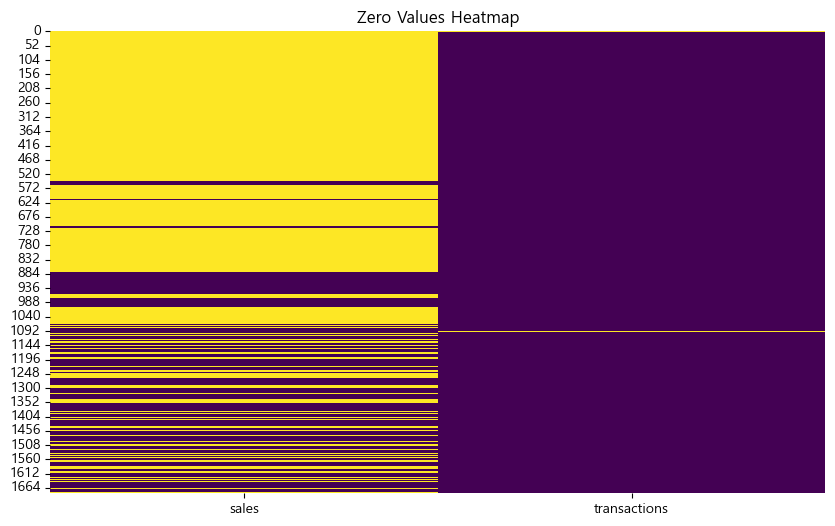

In [13]:
import seaborn as sns

sales0 =temp[(temp['store_nbr']==15) & (temp['family']=='BABY CARE')][['sales','transactions']].reset_index(drop=True)
df = pd.DataFrame(sales0)

# 값이 0인 경우를 True로 변환
df_zero = df == 0

# seaborn을 사용한 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(df_zero, cbar=False, cmap='viridis')
plt.title('Zero Values Heatmap')
plt.show()


## 이상치 탐색: 25, DELI

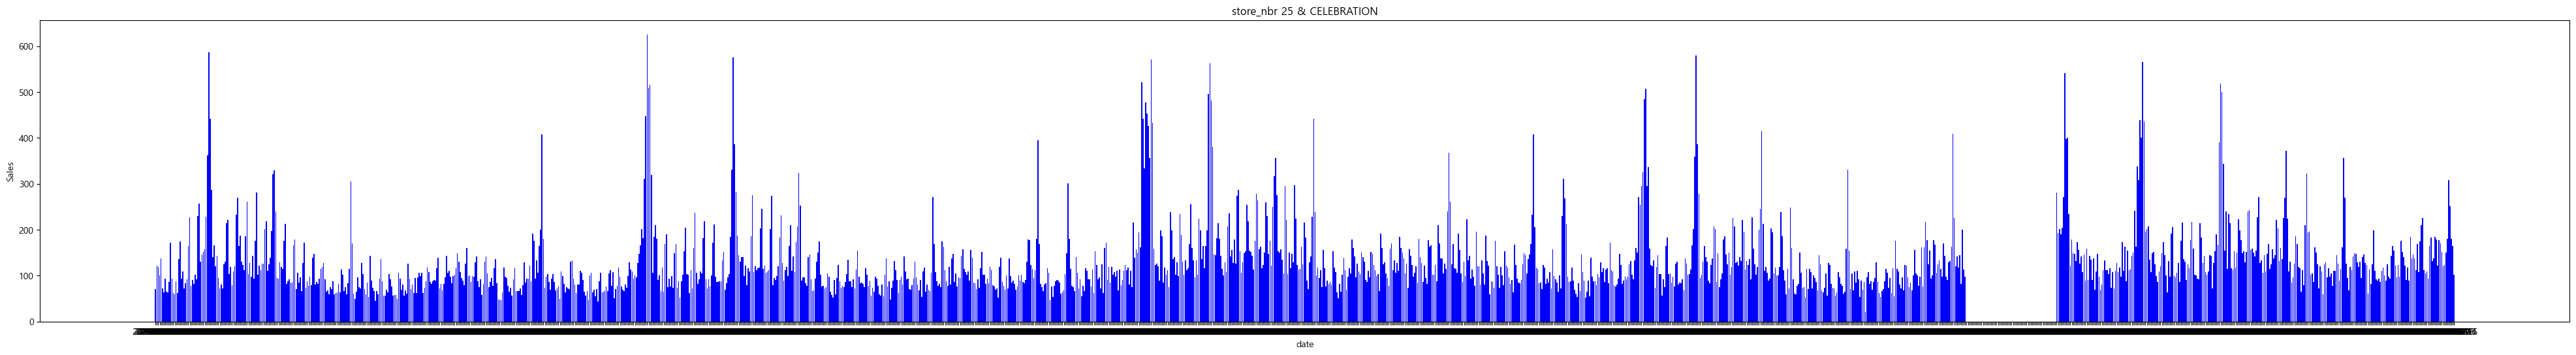

In [178]:
# GROCERY I
for i in range(25,26):

    filtered_data = train[(train['store_nbr'] == i)&(train['family'] == 'DELI')]
    # 데이터 시각화
    plt.figure(figsize=(50, 6))
    plt.bar(filtered_data.date, filtered_data['sales'], color='blue')

    plt.xlabel('date')
    plt.ylabel('Sales')
    plt.title(f'store_nbr {i} & CELEBRATION')
    plt.show()

In [186]:
temp['family'].unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

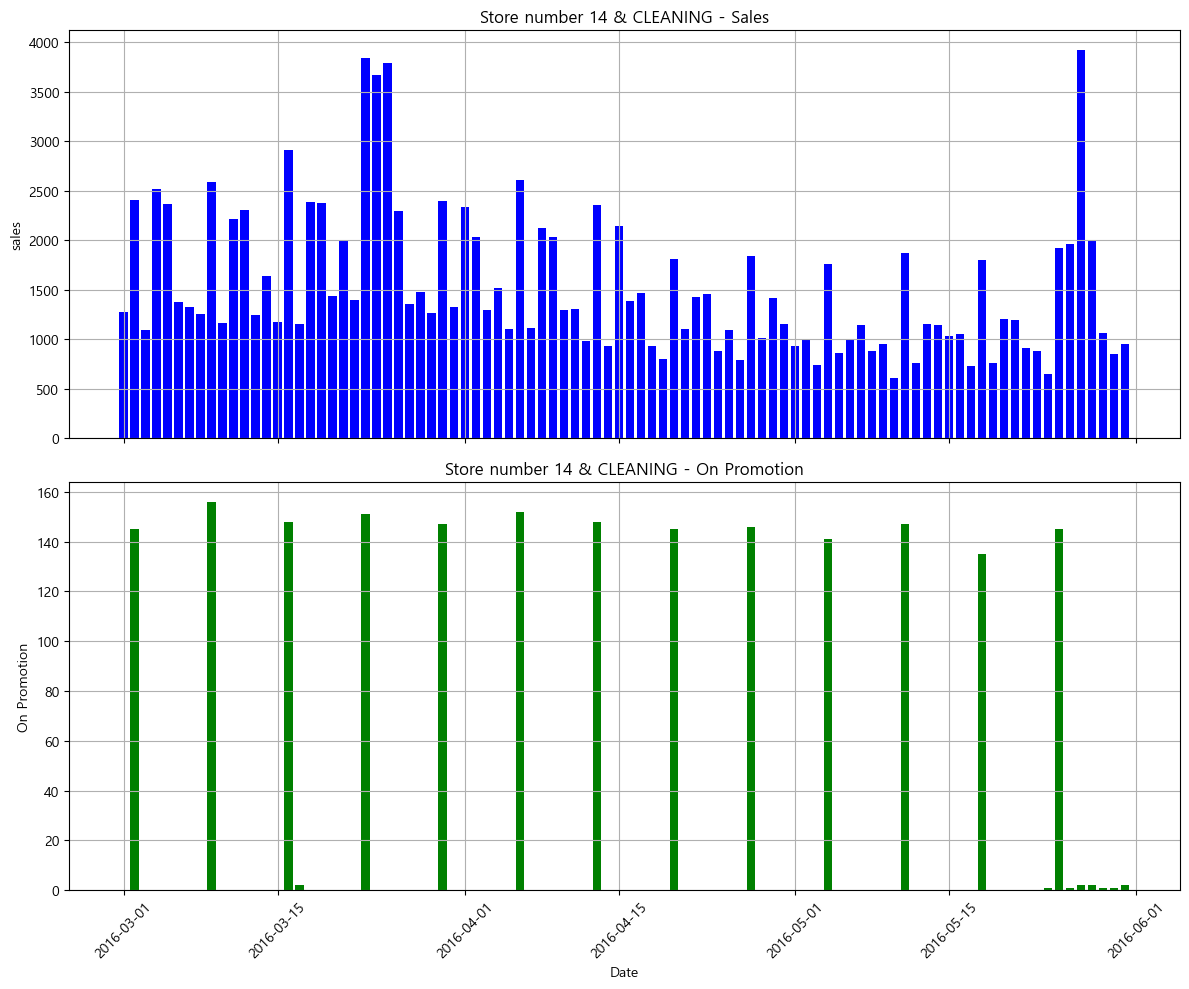

In [192]:
import numpy as np
#df = temp[ (temp['year']==2017)& (temp['store_nbr']==14) & (temp['family']=='CLEANING') ][['date','sales']]
# 필터링된 데이터 생성
df = temp[(temp['year'].isin([2016]))&(temp['month'].isin([3,4,5]))&(temp.store_nbr==25)&(temp.family=='PRODUCE')][['date', 'sales', 'onpromotion','transactions']]

# 표준편차 방법으로 이상치 탐지 함수
def find_outliers_std(df):
    outliers = pd.DataFrame()
    for column in df[['sales']]:  # sales 컬럼만 이상치 탐지
        mean = df[column].mean()
        std = df[column].std()
        lower_bound = mean - 4 * std
        upper_bound = mean + 4 * std
        outliers[column] = (df[column] < lower_bound) | (df[column] > upper_bound)
    return outliers

# 이상치 탐지
outliers_std = find_outliers_std(df)

# 그래프 생성
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# 첫 번째 그래프: sales 값
bars = ax1.bar(df['date'], df['sales'], color=np.where(outliers_std['sales'], 'r', 'b'))
ax1.set_ylabel('sales')
ax1.set_title('Store number 14 & CLEANING - Sales')
ax1.grid(True)

# 두 번째 그래프: onpromotion 값
ax2.bar(df['date'], df['onpromotion'], color='g')
ax2.set_xlabel('Date')
ax2.set_ylabel('On Promotion')
ax2.set_title('Store number 14 & CLEANING - On Promotion')
ax2.grid(True)

# x축 레이블 회전
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## 프로모션의 영향도

In [ ]:
## 요일을 숫자로 변환 (0=월요일, 1=화요일, ..., 6=일요일)
temp['day_of_week'] = temp['date'].dt.dayofweek

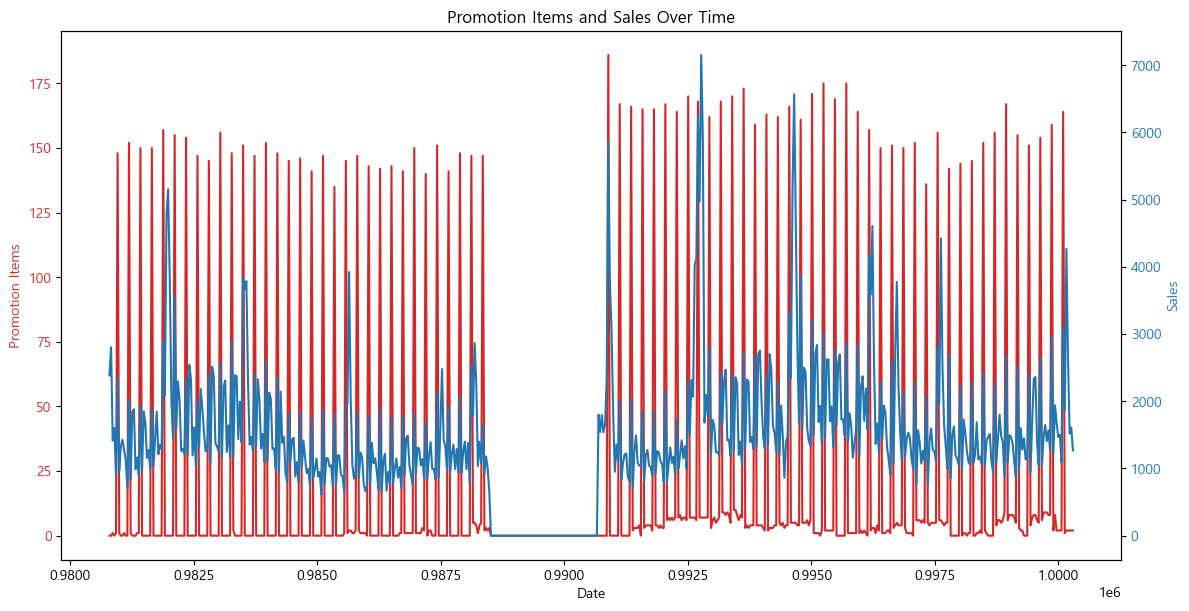

Correlation between promotion items and sales: 0.39931758814846563


In [3]:
import pandas as pd

# 예시 데이터 로드 GROCERY I   HOME APPLIANCES BEVERAGES
data = temp[(temp['year'].isin([2016,2017]))&(temp.store_nbr==25)&(temp.family=='PRODUCE')][['date', 'sales', 'onpromotion', 'transactions','day_of_week']]

import matplotlib.pyplot as plt

# 시각화
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Promotion Items', color=color)
ax1.plot(data.index, data['onpromotion'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Sales', color=color)
ax2.plot(data.index, data['sales'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Promotion Items and Sales Over Time')
plt.show()


# 상관분석
correlation = data['onpromotion'].corr(data['sales'])
print(f'Correlation between promotion items and sales: {correlation}')


In [4]:
# Convert day_of_week to a categorical variable
data['day_of_week'] = data['day_of_week'].astype('category')

In [5]:
# Create dummy variables for the day_of_week column
data = pd.get_dummies(data, columns=['day_of_week'])

In [297]:
import statsmodels.api as sm
from sklearn.linear_model import Ridge


# Define the dependent and independent variables
X = data[['onpromotion', 'transactions'] + [col for col in data.columns if 'day_of_week' in col]]
y = data['sales']

# 회귀 분석을 위한 데이터 준비
#X = data[['onpromotion','transactions','day_of_week']] 
#y = data['sales']
X = sm.add_constant(X)

# 회귀 모델 적합
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     394.7
Date:                Sun, 09 Jun 2024   Prob (F-statistic):          1.24e-229
Time:                        19:23:49   Log-Likelihood:                -4378.3
No. Observations:                 592   AIC:                             8775.
Df Residuals:                     583   BIC:                             8814.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -72.6653     31.311     -2.321

In [218]:
# Fit Ridge Regression model
ridge = Ridge(alpha=1.0)
ridge.fit(X, y)

# Print coefficients
print('Ridge Coefficients:', ridge.coef_)

Ridge Coefficients: [   0.           13.76935165    1.03480784  -60.56759628 -758.84659717
  -52.14060946   42.69963436 -179.2605416  -126.88362175]


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming 'df' is your DataFrame containing the data
X = data[['onpromotion', 'transactions', 'day_of_week']]

# Adding a constant column for the intercept
X = sm.add_constant(X)

# Calculating VIF for each independent variable
vif = pd.DataFrame()
vif['variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)


In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [94]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Instantiate the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluate
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# RMSLE 계산 함수 정의
def root_mean_squared_log_error(actual, predicted):
    log_diff = np.log1p(predicted) - np.log1p(actual)
    return np.sqrt(np.mean(log_diff**2))

# 테스트 셋에 대한 예측 및 평가
y_test_pred = model.predict(X_test)
rmsle_test = root_mean_squared_log_error(y_test, y_pred_rf)


print(f'RandomForestRegressor MSE: {mse_rf}')
print(f'RandomForestRegressor R2: {r2_rf}')
print(f"RandomForestRegressor RMSLE: {rmsle_test}")


RandomForestRegressor MSE: 123110.55651354826
RandomForestRegressor R2: 0.8843212382564407
RandomForestRegressor RMSLE: 0.632469903786256


In [90]:
import xgboost as xgb

# Instantiate the model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

# Fit the model
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
rmsle_test_xgb = root_mean_squared_log_error(y_test, y_pred_xgb)

print(f'XGBoost MSE: {mse_xgb}')
print(f'XGBoost R2: {r2_xgb}')
print(f'XGBoost RMSLE: {rmsle_test_xgb}')


XGBoost MSE: 133518.38021563445
XGBoost R2: 0.8745417019404782
XGBoost RMSLE: 0.47706762618379694


## 결과가 안좋으므로 rolling을 해봄

In [6]:
from scipy.stats import linregress
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np

def get_slope(array):
    y = np.array(array)
    x = np.arange(len(y))
    slope, intercept, r_value, p_value, std_err = linregress(x,y)
    return slope

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    return mape

In [7]:
data['slope7'] = data['sales'].rolling(7).apply(get_slope, raw=True)
data['std7'] = data['sales'].rolling(7).std(raw=True)
data['mean7'] = data['sales'].rolling(7).mean(raw=True)
data['skew7'] = data['sales'].rolling(7).skew()
data['kurt7'] = data['sales'].rolling(7).kurt()
data['min7'] = data['sales'].rolling(7).min()
data['max7'] = data['sales'].rolling(7).max()

data['slope14'] = data['sales'].rolling(14).apply(get_slope, raw=True)
data['std14'] = data['sales'].rolling(14).std(raw=True)
data['mean14'] = data['sales'].rolling(14).mean(raw=True)
data['skew14'] = data['sales'].rolling(14).skew()
data['kurt14'] = data['sales'].rolling(14).kurt()
data['min14'] = data['sales'].rolling(14).min()
data['max14'] = data['sales'].rolling(14).max()

C:\Users\user\AppData\Local\Temp\ipykernel_12668\787891233.py:2: FutureWarning: Passing additional kwargs to Rolling.std has no impact on the result and is deprecated. This will raise a TypeError in a future version of pandas.
  data['std7'] = data['sales'].rolling(7).std(raw=True)
C:\Users\user\AppData\Local\Temp\ipykernel_12668\787891233.py:3: FutureWarning: Passing additional kwargs to Rolling.mean has no impact on the result and is deprecated. This will raise a TypeError in a future version of pandas.
  data['mean7'] = data['sales'].rolling(7).mean(raw=True)
C:\Users\user\AppData\Local\Temp\ipykernel_12668\787891233.py:10: FutureWarning: Passing additional kwargs to Rolling.std has no impact on the result and is deprecated. This will raise a TypeError in a future version of pandas.
  data['std14'] = data['sales'].rolling(14).std(raw=True)
C:\Users\user\AppData\Local\Temp\ipykernel_12668\787891233.py:11: FutureWarning: Passing additional kwargs to Rolling.mean has no impact on the r

In [8]:
data.dropna(inplace=True)

In [9]:
X = data[['onpromotion', 'transactions', 'slope7' ,'std7','mean7','skew7','kurt7','min7','max7','slope14' ,'std14','mean14','skew14','kurt14','min14','max14'] + [col for col in data.columns if 'day_of_week' in col]]
y = data['sales']

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
# Ensure alignment of the training and testing data
assert X_train.shape[0] == y_train.shape[0], "Training data and target are not aligned"
assert X_test.shape[0] == y_test.shape[0], "Testing data and target are not aligned"

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Instantiate the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# RMSLE 계산 함수 정의
def root_mean_squared_log_error(actual, predicted):
    log_diff = np.log1p(predicted) - np.log1p(actual)
    return np.sqrt(np.mean(log_diff**2))
# Evaluate
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
rmsle_test = root_mean_squared_log_error(y_test, y_pred_rf)



print(f'RandomForestRegressor MSE: {mse_rf}')
print(f'RandomForestRegressor R2: {r2_rf}')
print(f"RandomForestRegressor RMSLE: {rmsle_test}")


RandomForestRegressor MSE: 102006.48969305595
RandomForestRegressor R2: 0.9039518442833886
RandomForestRegressor RMSLE: 0.14826544171521802


In [ ]:
# Simulate forecast data
forecast_dates = pd.date_range(start='2021-04-11', periods=20, freq='D')
forecast_sales = rf.predict(np.random.rand(20, 5))

# Create DataFrame
data = pd.DataFrame({'sales': sales}, index=dates)
forecasts = pd.DataFrame({'mean': forecast_sales}, index=forecast_dates)

# Plot true values and forecasts
plt.figure(figsize=(10, 6))
plt.plot(data.index[-60:], data['sales'][-60:], color="black", label="True values")
plt.plot(forecasts.index, forecasts['mean'], label="Forecast", color="blue")
plt.legend(loc="upper left")
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('True Sales vs Forecasted Sales')
plt.show()

In [232]:
import xgboost as xgb

# Instantiate the model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

# Fit the model
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
rmsle_test_xgb = root_mean_squared_log_error(y_test, y_pred_xgb)

print(f'XGBoost MSE: {mse_xgb}')
print(f'XGBoost R2: {r2_xgb}')
print(f'XGBoost RMSLE: {rmsle_test_xgb}')


XGBoost MSE: 110759.25612587848
XGBoost R2: 0.8958596965306131
XGBoost RMSLE: 0.25368550942377727


C:\Users\user\AppData\Local\Temp\ipykernel_22468\1831516680.py:15: RuntimeWarning: invalid value encountered in log1p
  log_diff = np.log1p(predicted) - np.log1p(actual)


In [ ]:
pip install "gluonts[torch]"

In [259]:
import pandas as pd
import numpy as np
from gluonts.dataset.pandas import PandasDataset
from gluonts.dataset.common import ListDataset
from gluonts.torch import DeepAREstimator
from gluonts.dataset.split import split
import matplotlib.pyplot as plt

ImportError: cannot import name 'estimator' from 'gluonts.model.estimator' (c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\gluonts\model\estimator.py)

In [40]:
# Ensure the data is numerical
print(data.dtypes)

date                      object
sales                    float64
onpromotion                int64
transactions             float64
day_of_week_Friday         uint8
day_of_week_Monday         uint8
day_of_week_Saturday       uint8
day_of_week_Sunday         uint8
day_of_week_Thursday       uint8
day_of_week_Tuesday        uint8
day_of_week_Wednesday      uint8
slope7                   float64
slope14                  float64
std7                     float64
std14                    float64
mean7                    float64
mean14                   float64
skew7                    float64
skew14                   float64
kurt7                    float64
kurt14                   float64
min7                     float64
min14                    float64
max7                     float64
max14                    float64
dtype: object


In [233]:
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

In [234]:
# Convert 'uni8' column to integer type
data['day_of_week_Friday'] = data['day_of_week_Friday'].astype(int)
data['day_of_week_Monday'] = data['day_of_week_Monday'].astype(int)
data['day_of_week_Saturday'] = data['day_of_week_Saturday'].astype(int)
data['day_of_week_Sunday'] = data['day_of_week_Sunday'].astype(int)
data['day_of_week_Thursday'] = data['day_of_week_Thursday'].astype(int)
data['day_of_week_Tuesday'] = data['day_of_week_Tuesday'].astype(int)
data['day_of_week_Wednesday'] = data['day_of_week_Wednesday'].astype(int)

In [235]:
# Ensure all required columns are of appropriate types
data = data.astype({
    'sales': 'float',
    'onpromotion': 'int',
    'transactions': 'float',
    'day_of_week_Friday': 'int',
    'day_of_week_Monday': 'int',
    'day_of_week_Saturday': 'int',
    'day_of_week_Sunday': 'int',
    'day_of_week_Thursday': 'int',
    'day_of_week_Tuesday': 'int',
    'day_of_week_Wednesday': 'int',
    'slope7': 'float',
    'std7': 'float',
    'mean7': 'float',
    'skew7': 'float',
    'kurt7': 'float',
    'min7': 'float',
    'max7': 'float',
    'slope14': 'float',
    'std14': 'float',
    'mean14': 'float',
    'skew14': 'float',
    'kurt14': 'float',
    'min14': 'float',
    'max14': 'float'
})

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightning\pytorch\trainer\configuration_validator.py:74: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.

  | Name  | Type        | Params | In sizes                                                   | Out sizes   
------------------------------------------------------------------------------------------------------------------
0 | model | DeepARModel | 23.3 K | [[1, 1], [1, 1], [1, 48, 2], [1, 48], [1, 48], [1, 12, 2]] | [1, 100, 12]
------------------------------------------------------------------------------------------------------------------
23.3 K    Trainable params
0         Non-trainable params
23.3 K    Total params
0.093     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

Epoch 0, global step 50: 'train_loss' reached 5.94466 (best 5.94466), saving model to 'c:\\Users\\user\\upstage3-python\\09.ML_project_team03\\dev\\notebooks\\lightning_logs\\version_20\\checkpoints\\epoch=0-step=50.ckpt' as top 1
Epoch 1, global step 100: 'train_loss' reached 5.19588 (best 5.19588), saving model to 'c:\\Users\\user\\upstage3-python\\09.ML_project_team03\\dev\\notebooks\\lightning_logs\\version_20\\checkpoints\\epoch=1-step=100.ckpt' as top 1
Epoch 2, global step 150: 'train_loss' was not in top 1
Epoch 3, global step 200: 'train_loss' was not in top 1
Epoch 4, global step 250: 'train_loss' reached 4.61559 (best 4.61559), saving model to 'c:\\Users\\user\\upstage3-python\\09.ML_project_team03\\dev\\notebooks\\lightning_logs\\version_20\\checkpoints\\epoch=4-step=250.ckpt' as top 1
`Trainer.fit` stopped: `max_epochs=5` reached.


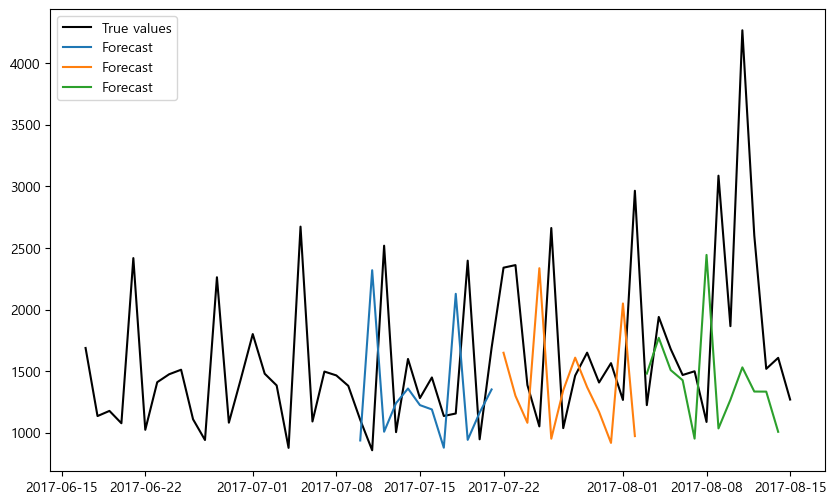

In [83]:
# 7
# Prepare ListDataset
gluonts_data = ListDataset(
    [{"start": data.index[0], 
      "target": data['sales'].values,
      "feat_dynamic_real": [
          data['onpromotion'].values,
          data['transactions'].values,
          data['day_of_week_Friday'].values,
          data['day_of_week_Monday'].values,
          data['day_of_week_Saturday'].values,
          data['day_of_week_Sunday'].values,
          data['day_of_week_Thursday'].values,
          data['day_of_week_Tuesday'].values,
          data['day_of_week_Wednesday'].values,
          data['slope7'].values,
          data['std7'].values,
          data['mean7'].values,
          data['skew7'].values,
          data['kurt7'].values,
          data['min7'].values,
          data['max7'].values
      ]}],
    freq="D"
)

# Split the data for training and testing
training_data = ListDataset(
    [{"start": data.index[0], 
      "target": data['sales'][:-30].values,
      "feat_dynamic_real": [
          data['onpromotion'][:-30].values,
          data['transactions'][:-30].values,
          data['day_of_week_Friday'][:-30].values,
          data['day_of_week_Monday'][:-30].values,
          data['day_of_week_Saturday'][:-30].values,
          data['day_of_week_Sunday'][:-30].values,
          data['day_of_week_Thursday'][:-30].values,
          data['day_of_week_Tuesday'][:-30].values,
          data['day_of_week_Wednesday'][:-30].values,
          data['slope7'][:-30].values,
          data['std7'][:-30].values,
          data['mean7'][:-30].values,
          data['skew7'][:-30].values,
          data['kurt7'][:-30].values,
          data['min7'][:-30].values,
          data['max7'][:-30].values
      ]}],
    freq="D"
)

test_gen = ListDataset(
    [{"start": data.index[-30], 
      "target": data['sales'][-30:].values,
      "feat_dynamic_real": [
          data['onpromotion'][-30:].values,
          data['transactions'][-30:].values,
          data['day_of_week_Friday'][-30:].values,
          data['day_of_week_Monday'][-30:].values,
          data['day_of_week_Saturday'][-30:].values,
          data['day_of_week_Sunday'][-30:].values,
          data['day_of_week_Thursday'][-30:].values,
          data['day_of_week_Tuesday'][-30:].values,
          data['day_of_week_Wednesday'][-30:].values,
          data['slope7'][-30:].values,
          data['std7'][-30:].values,
          data['mean7'][-30:].values,
          data['skew7'][-30:].values,
          data['kurt7'][-30:].values,
          data['min7'][-30:].values,
          data['max7'][-30:].values
      ]}],
    freq="D"
)

# Split the data for training and testing
training_data, test_gen = split(gluonts_data, offset=-36)
test_data = test_gen.generate_instances(prediction_length=12, windows=3)

# Train the model and make predictions
model = DeepAREstimator(
    prediction_length=12, freq="M", trainer_kwargs={"max_epochs": 5}
).train(training_data)

forecasts = list(model.predict(test_data.input))

# Plot predictions
plt.figure(figsize=(10, 6))
plt.plot(data.index[-60:], data['sales'][-60:], color="black", label="True values")
for forecast in forecasts:
    plt.plot(forecast.index, forecast.mean, label="Forecast")
plt.legend(loc="upper left")
plt.show()

In [ ]:
# 14
# Prepare ListDataset
gluonts_data = ListDataset(
    [{"start": data.index[0], 
      "target": data['sales'].values,
      "feat_dynamic_real": [
          data['onpromotion'].values,
          data['transactions'].values,
          data['day_of_week_Friday'].values,
          data['day_of_week_Monday'].values,
          data['day_of_week_Saturday'].values,
          data['day_of_week_Sunday'].values,
          data['day_of_week_Thursday'].values,
          data['day_of_week_Tuesday'].values,
          data['day_of_week_Wednesday'].values,
          data['slope7'].values,
          data['std7'].values,
          data['mean7'].values,
          data['skew7'].values,
          data['kurt7'].values,
          data['min7'].values,
          data['max7'].values,
          data['slope14'].values,
          data['std14'].values,
          data['mean14'].values,
          data['skew14'].values,
          data['kurt14'].values,
          data['min14'].values,
          data['max14'].values,
      ]}],
    freq="D"
)

# Split the data for training and testing
training_data = ListDataset(
    [{"start": data.index[0], 
      "target": data['sales'].values,
      "feat_dynamic_real": [
          data['onpromotion'].values,
          data['transactions'].values,
          data['day_of_week_Friday'].values,
          data['day_of_week_Monday'].values,
          data['day_of_week_Saturday'].values,
          data['day_of_week_Sunday'].values,
          data['day_of_week_Thursday'].values,
          data['day_of_week_Tuesday'].values,
          data['day_of_week_Wednesday'].values,
          data['slope7'].values,
          data['std7'].values,
          data['mean7'].values,
          data['skew7'].values,
          data['kurt7'].values,
          data['min7'].values,
          data['max7'].values,
          data['slope14'].values,
          data['std14'].values,
          data['mean14'].values,
          data['skew14'].values,
          data['kurt14'].values,
          data['min14'].values,
          data['max14'].values
      ]}],
    freq="D"
)

test_gen = ListDataset(
    [{"start": data.index[0], 
      "target": data['sales'].values,
      "feat_dynamic_real": [
          data['onpromotion'].values,
          data['transactions'].values,
          data['day_of_week_Friday'].values,
          data['day_of_week_Monday'].values,
          data['day_of_week_Saturday'].values,
          data['day_of_week_Sunday'].values,
          data['day_of_week_Thursday'].values,
          data['day_of_week_Tuesday'].values,
          data['day_of_week_Wednesday'].values,
          data['slope7'].values,
          data['std7'].values,
          data['mean7'].values,
          data['skew7'].values,
          data['kurt7'].values,
          data['min7'].values,
          data['max7'].values,
          data['slope14'].values,
          data['std14'].values,
          data['mean14'].values,
          data['skew14'].values,
          data['kurt14'].values,
          data['min14'].values,
          data['max14'].values
      ]}],
    freq="D"
)


# Split the data for training and testing
training_data, test_gen = split(gluonts_data, offset=-36)
test_data = test_gen.generate_instances(prediction_length=12, windows=3)

# Train the model and make predictions
model = DeepAREstimator(
    prediction_length=12, freq="M", trainer_kwargs={"max_epochs": 5}
).train(training_data)

forecasts = list(model.predict(test_data.input))

# Plot predictions
plt.figure(figsize=(10, 6))
plt.plot(data.index[-60:], data['sales'][-60:], color="black", label="True values")
for forecast in forecasts:
    plt.plot(forecast.index, forecast.mean, label="Forecast")
plt.legend(loc="upper left")
plt.show()

In [ ]:
import numpy as np

# Define RMSLE calculation function
def rmsle(y_true, y_pred):
    return np.sqrt(np.mean(np.square(np.log1p(y_pred) - np.log1p(y_true))))

# Extract the last 36 days of true sales values
true_values = data['sales'][-36:].values

# Collect predicted values
predicted_values = np.concatenate([forecast.mean for forecast in forecasts])

# Calculate RMSLE
rmsle_value = rmsle(true_values, predicted_values)
print(f'RMSLE: {rmsle_value}')


In [120]:
pip install prophet

   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
    --------------------------------------- 0.2/13.3 MB 4.4 MB/s eta 0:00:04
   ----- ---------------------------------- 1.7/13.3 MB 17.6 MB/s eta 0:00:01
   ------- -------------------------------- 2.6/13.3 MB 20.6 MB/s eta 0:00:01
   ------------- -------------------------- 4.4/13.3 MB 23.7 MB/s eta 0:00:01
   ----------------- ---------------------- 5.9/13.3 MB 27.0 MB/s eta 0:00:01
   ----------------------- ---------------- 7.9/13.3 MB 28.2 MB/s eta 0:00:01
   ---------------------------- ----------- 9.6/13.3 MB 30.7 MB/s eta 0:00:01
   --------------------------------- ------ 11.2/13.3 MB 34.4 MB/s eta 0:00:01
   ---------------------------------------  13.1/13.3 MB 38.6 MB/s eta 0:00:01
   ---------------------------------------- 13.3/13.3 MB 36.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/94.4 kB ? eta -:--:--
   ---------------------------------------- 94.4/94.4 kB 5.3 MB/s eta 0:00:00


In [56]:
data.reset_index(inplace=True)

In [57]:
data

date      sales  onpromotion  transactions  day_of_week_Friday  \
0   2016-01-14   831.2820            1         616.0                   0   
1   2016-01-15  1841.3000            0        1006.0                   1   
2   2016-01-16  1881.2020            0        1380.0                   0   
3   2016-01-17   987.5460            0         793.0                   0   
4   2016-01-18  1162.2340            1         696.0                   0   
..         ...        ...          ...           ...                 ...   
574 2017-08-11  4266.2690            2        2195.0                   1   
575 2017-08-12  2600.1110            2        1946.0                   0   
576 2017-08-13  1518.4250            2        1107.0                   0   
577 2017-08-14  1607.6901            2         935.0                   0   
578 2017-08-15  1269.1740            2         849.0                   0   

     day_of_week_Monday  day_of_week_Saturday  day_of_week_Sunday  \
0                     0                     0                   0   
1                     0                     0                   0   
2                     0                     1                   0   
3                     0                     0                   1   
4                     1                     0                   0   
..                  ...                   ...                 ...   
574                   0                     0                   0   
575                   0                     1                   0   
576                   0                     0                   1   
577                   1                     0                   0   
578                   0                     0                   0   

     day_of_week_Thursday  day_of_week_Tuesday  ...        mean7       mean14  \
0                       1                    0  ...  1244.088143  1510.341714   
1                       0                    0  ...  1316.503286  1471.541071   
2                       0                    0  ...  1381.402857  1405.509000   
3                       0                    0  ...  1341.244571  1374.975571   
4                       0                    0  ...  1346.490000  1343.409571   
..                    ...                  ...  ...          ...          ...   
574                     0                    0  ...  2135.847571  1926.143357   
575                     0                    0  ...  2267.403143  1994.023071   
576                     0                    0  ...  2274.537000  2001.947714   
577                     0                    0  ...  2290.112729  2005.026364   
578                     0                    1  ...  2316.068300  2005.259579   

        skew7    skew14     kurt7    kurt14      min7     min14      max7  \
0    0.698405  0.754361  0.974750 -0.459699   705.922   705.922  2015.944   
1    0.280790  0.889850 -1.164668  0.317551   705.922   705.922  2015.944   
2   -0.023594  0.403081 -2.070386 -0.601650   705.922   705.922  2015.944   
3    0.202241  0.535004 -2.381528 -0.712568   705.922   705.922  2015.944   
4    0.170691  0.746040 -2.352881 -0.454061   705.922   705.922  2015.944   
..        ...       ...       ...       ...       ...       ...       ...   
574  1.404055  1.723844  1.171172  2.592892  1087.485  1087.485  4266.269   
575  0.973316  1.426667  0.227975  1.626649  1087.485  1087.485  4266.269   
576  0.976717  1.431326  0.266980  1.667833  1087.485  1087.485  4266.269   
577  0.978987  1.429402  0.350394  1.676268  1087.485  1087.485  4266.269   
578  1.092838  1.430119  0.475803  1.678300  1269.174  1087.485  4266.269   

        max14  
0    2805.651  
1    2805.651  
2    2359.537  
3    2359.537  
4    2359.537  
..        ...  
574  4266.269  
575  4266.269  
576  4266.269  
577  4266.269  
578  4266.269  

[579 rows x 25 columns]

In [200]:
data_prophet = data[['date', 'sales']].rename(columns={'date': 'ds', 'sales': 'y'})

In [59]:
data.columns

Index(['date', 'sales', 'onpromotion', 'transactions', 'day_of_week_Friday',
       'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday',
       'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday',
       'slope7', 'slope14', 'std7', 'std14', 'mean7', 'mean14', 'skew7',
       'skew14', 'kurt7', 'kurt14', 'min7', 'min14', 'max7', 'max14'],
      dtype='object')

18:00:44 - cmdstanpy - INFO - Chain [1] start processing
18:00:44 - cmdstanpy - INFO - Chain [1] done processing


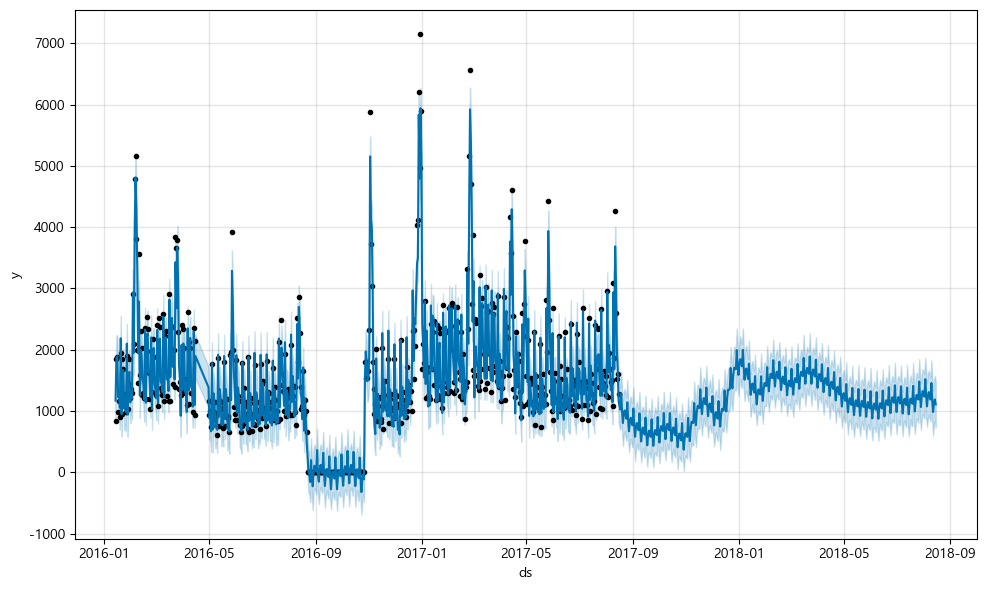

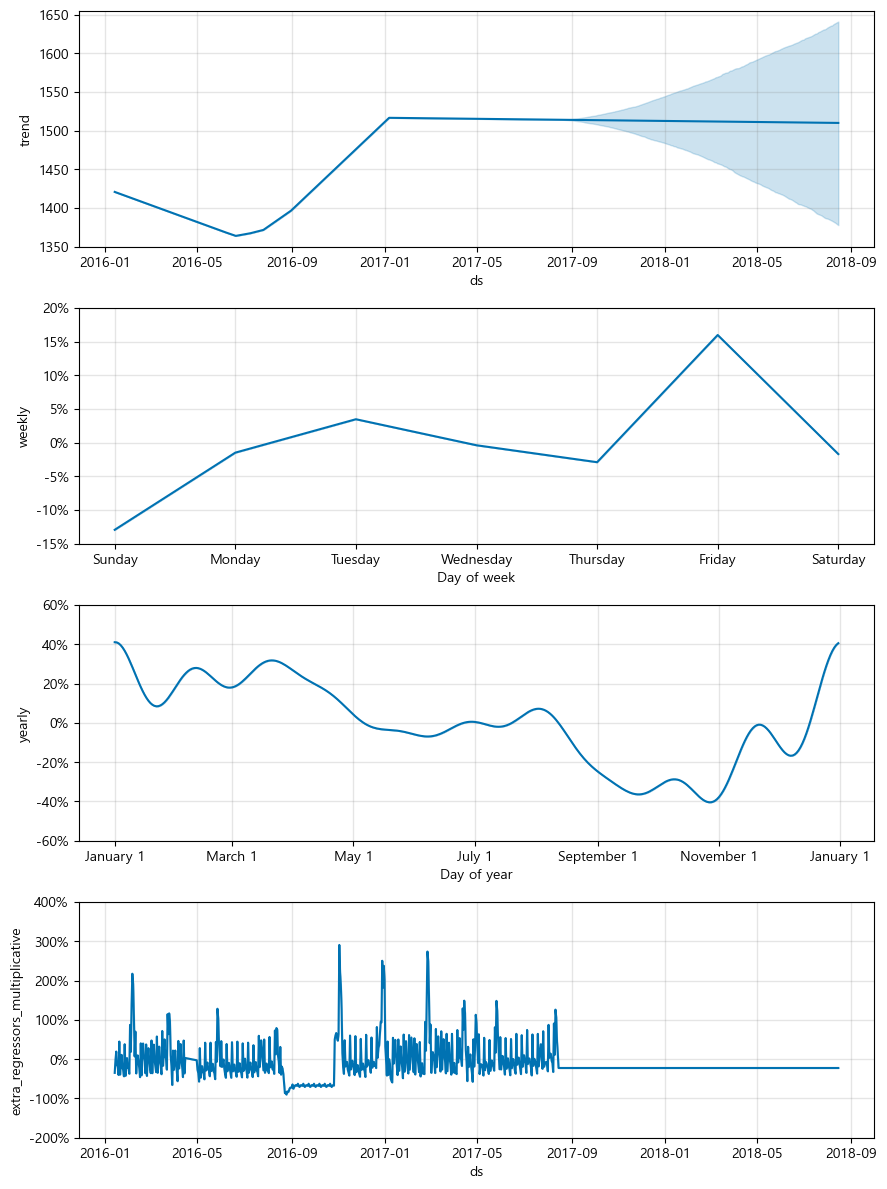

In [201]:
import pandas as pd
from prophet import Prophet

# Prepare the data for Prophet
data_prophet = data.rename(columns={'date': 'ds', 'sales': 'y'})

# Instantiate the model with custom parameters
model = Prophet(seasonality_mode='multiplicative', yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)

# Add additional regressors
model.add_regressor('onpromotion')
model.add_regressor('transactions')
model.add_regressor('day_of_week_Friday')
model.add_regressor('day_of_week_Monday')
model.add_regressor('day_of_week_Saturday')
model.add_regressor('day_of_week_Sunday')
model.add_regressor('day_of_week_Thursday')
model.add_regressor('day_of_week_Tuesday')
model.add_regressor('day_of_week_Wednesday')
model.add_regressor('slope7')
model.add_regressor('std7')
model.add_regressor('mean7')
model.add_regressor('skew7')
model.add_regressor('kurt7')
model.add_regressor('min7')
model.add_regressor('max7')
model.add_regressor('slope14')
model.add_regressor('std14')
model.add_regressor('mean14')
model.add_regressor('skew14')
model.add_regressor('kurt14')
model.add_regressor('min14')
model.add_regressor('max14')

# Fit the model
model.fit(data_prophet)

# Create a future dataframe for 365 days into the future
future = model.make_future_dataframe(periods=365)

# Ensure the length of the future dataframe matches the length of the regressors
for column in ['onpromotion', 'transactions', 'day_of_week_Friday', 'day_of_week_Monday', 
               'day_of_week_Saturday', 'day_of_week_Sunday', 'day_of_week_Thursday', 
               'day_of_week_Tuesday', 'day_of_week_Wednesday', 'slope7', 'std7', 
               'mean7', 'skew7', 'kurt7', 'min7', 'max7','slope14', 'std14', 
               'mean14', 'skew14', 'kurt14', 'min14', 'max14']:
    if len(data[column]) < len(future):
        # If data is shorter than future, repeat the last value or fill with reasonable estimates
        future[column] = list(data[column]) + [data[column].iloc[-1]] * (len(future) - len(data[column]))
    else:
        future[column] = data[column].values[:len(future)]

# Predict
forecast = model.predict(future)

# Plot results
fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)


In [202]:
import numpy as np

# Define RMSLE calculation function
def rmsle(y_true, y_pred):
    return np.sqrt(np.mean(np.square(np.log1p(y_pred) - np.log1p(y_true))))

# Assuming you have a test set
# test_data_prophet should have columns 'ds' and 'y'
test_data_prophet = data_prophet[-30:]  # for example, the last 36 periods
y_true = test_data_prophet['y'].values
y_pred = forecast['yhat'].tail(30).values

# Calculate RMSLE
rmsle_value = rmsle(y_true, y_pred)
print(f'RMSLE: {rmsle_value}')


RMSLE: 0.5237915685571534


## 이상치 탐색: 1, GROCERY I

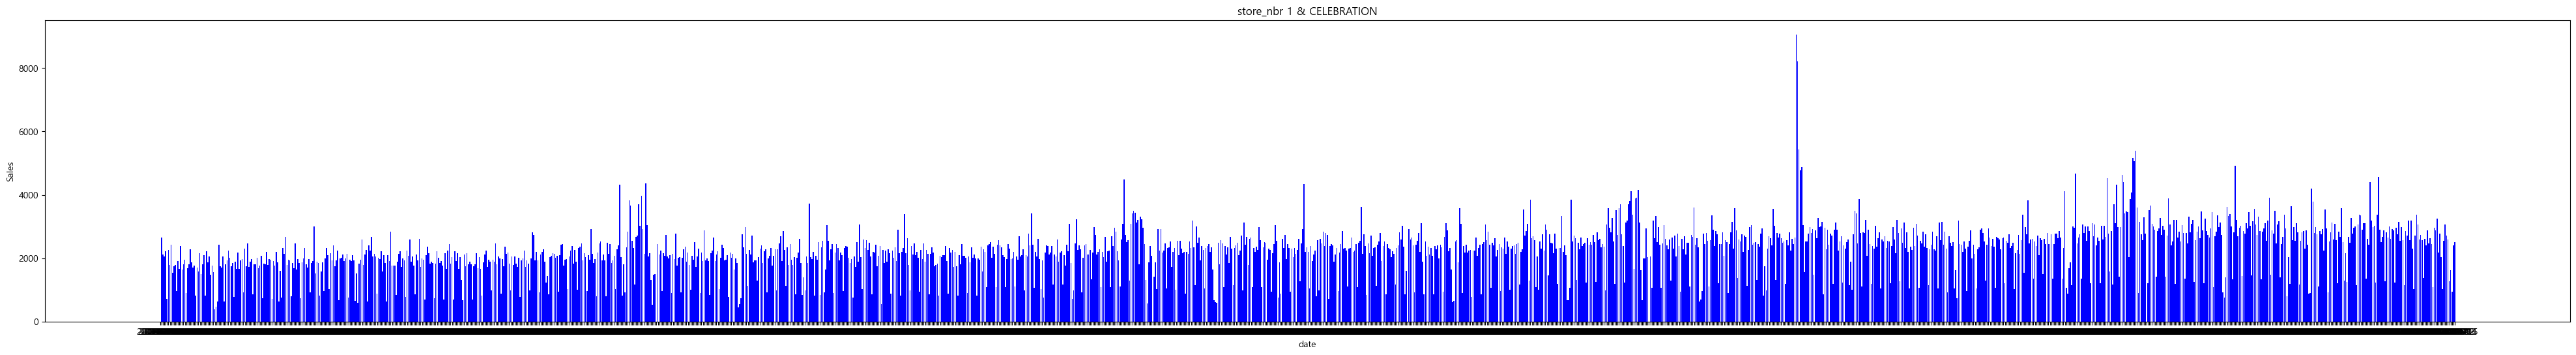

In [3]:
# GROCERY I
for i in range(1,2):

    filtered_data = train[(train['store_nbr'] == i)&(train['family'] == 'GROCERY I')]
    # 데이터 시각화
    plt.figure(figsize=(50, 6))
    plt.bar(filtered_data.date, filtered_data['sales'], color='blue')

    plt.xlabel('date')
    plt.ylabel('Sales')
    plt.title(f'store_nbr {i} & CELEBRATION')
    plt.show()

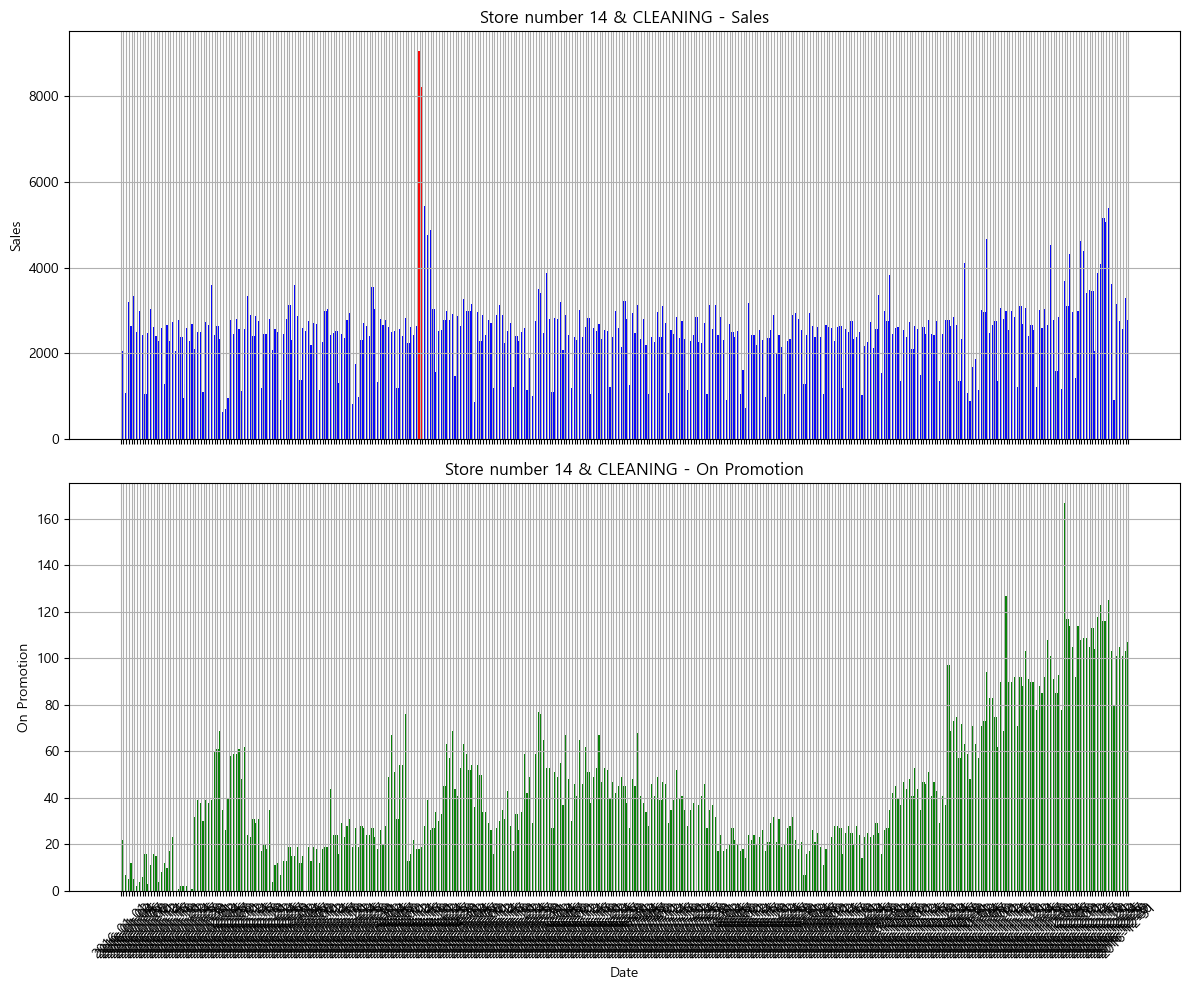

In [7]:
import numpy as np
#df = temp[ (temp['year']==2017)& (temp['store_nbr']==14) & (temp['family']=='CLEANING') ][['date','sales']]
# 필터링된 데이터 생성
df = temp[(temp['year']==2016)&(temp.store_nbr==1)&(temp.family=='GROCERY I')][['date', 'sales', 'onpromotion']]

# 표준편차 방법으로 이상치 탐지 함수
def find_outliers_std(df):
    outliers = pd.DataFrame()
    for column in df[['sales']]:  # sales 컬럼만 이상치 탐지
        mean = df[column].mean()
        std = df[column].std()
        lower_bound = mean - 4 * std
        upper_bound = mean + 4 * std
        outliers[column] = (df[column] < lower_bound) | (df[column] > upper_bound)
    return outliers

# 이상치 탐지
outliers_std = find_outliers_std(df)

# 그래프 생성
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# 첫 번째 그래프: sales 값
bars = ax1.bar(df['date'], df['sales'], color=np.where(outliers_std['sales'], 'r', 'b'))
ax1.set_ylabel('Sales')
ax1.set_title('Store number 14 & CLEANING - Sales')
ax1.grid(True)

# 두 번째 그래프: onpromotion 값
ax2.bar(df['date'], df['onpromotion'], color='g')
ax2.set_xlabel('Date')
ax2.set_ylabel('On Promotion')
ax2.set_title('Store number 14 & CLEANING - On Promotion')
ax2.grid(True)

# x축 레이블 회전
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [9]:
temp['date'] = pd.to_datetime(temp['date'])

In [174]:
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100) 
temp[(temp.store_nbr==1)&(temp.family=='GROCERY I')&(temp['date'].dt.year==2016)&(temp['date'].dt.month==4)]

date  store_nbr     family   sales  onpromotion   city      state  \
38028 2016-03-01          1  GROCERY I  2808.0           13  Quito  Pichincha   
38061 2016-03-02          1  GROCERY I  3137.0           19  Quito  Pichincha   
38094 2016-03-03          1  GROCERY I  2303.0           15  Quito  Pichincha   
38127 2016-03-04          1  GROCERY I  3587.0           15  Quito  Pichincha   
38160 2016-03-05          1  GROCERY I  2878.0           19  Quito  Pichincha   
38193 2016-03-06          1  GROCERY I  1365.0           12  Quito  Pichincha   
38226 2016-03-07          1  GROCERY I  2596.0           15  Quito  Pichincha   
38259 2016-03-08          1  GROCERY I  2531.0            0  Quito  Pichincha   
38292 2016-03-09          1  GROCERY I  2750.0           19  Quito  Pichincha   
38325 2016-03-10          1  GROCERY I  2196.0           13  Quito  Pichincha   
38358 2016-03-11          1  GROCERY I  2714.0           19  Quito  Pichincha   
38391 2016-03-12          1  GROCERY I  2678.0           18  Quito  Pichincha   
38424 2016-03-13          1  GROCERY I  1134.0           12  Quito  Pichincha   
38457 2016-03-14          1  GROCERY I  2266.0           18  Quito  Pichincha   
38490 2016-03-15          1  GROCERY I  2986.0           19  Quito  Pichincha   
38523 2016-03-16          1  GROCERY I  3039.0           19  Quito  Pichincha   
38556 2016-03-17          1  GROCERY I  2427.0           44  Quito  Pichincha   
38589 2016-03-18          1  GROCERY I  2478.0           24  Quito  Pichincha   
38622 2016-03-19          1  GROCERY I  2514.0           24  Quito  Pichincha   
38655 2016-03-20          1  GROCERY I  1313.0           16  Quito  Pichincha   
38688 2016-03-21          1  GROCERY I  2456.0           29  Quito  Pichincha   
38721 2016-03-22          1  GROCERY I  2356.0           23  Quito  Pichincha   
38754 2016-03-23          1  GROCERY I  2774.0           28  Quito  Pichincha   
38787 2016-03-24          1  GROCERY I  2941.0           31  Quito  Pichincha   
38820 2016-03-25          1  GROCERY I   824.0           19  Quito  Pichincha   
38853 2016-03-26          1  GROCERY I  1748.0           27  Quito  Pichincha   
38886 2016-03-27          1  GROCERY I   977.0           19  Quito  Pichincha   
38919 2016-03-28          1  GROCERY I  2309.0           28  Quito  Pichincha   
38952 2016-03-29          1  GROCERY I  2698.0           27  Quito  Pichincha   
38985 2016-03-30          1  GROCERY I  2632.0           24  Quito  Pichincha   
39018 2016-03-31          1  GROCERY I  2407.0           24  Quito  Pichincha   
39051 2016-04-01          1  GROCERY I  3554.0           27  Quito  Pichincha   
39084 2016-04-02          1  GROCERY I  3028.0           23  Quito  Pichincha   
39117 2016-04-03          1  GROCERY I  1319.0           18  Quito  Pichincha   
39150 2016-04-04          1  GROCERY I  2792.0           26  Quito  Pichincha   
39183 2016-04-05          1  GROCERY I  2657.0           20  Quito  Pichincha   
39216 2016-04-06          1  GROCERY I  2784.0           28  Quito  Pichincha   
39249 2016-04-07          1  GROCERY I  2625.0           49  Quito  Pichincha   
39282 2016-04-08          1  GROCERY I  2486.0           67  Quito  Pichincha   
39315 2016-04-09          1  GROCERY I  2523.0           51  Quito  Pichincha   
39348 2016-04-10          1  GROCERY I  1179.0           31  Quito  Pichincha   
39381 2016-04-11          1  GROCERY I  2578.0           54  Quito  Pichincha   
39414 2016-04-12          1  GROCERY I  2406.0           54  Quito  Pichincha   
39447 2016-04-13          1  GROCERY I  2821.0           76  Quito  Pichincha   
39480 2016-04-14          1  GROCERY I  2236.0           13  Quito  Pichincha   
39513 2016-04-15          1  GROCERY I  2621.0           16  Quito  Pichincha   
39546 2016-04-16          1  GROCERY I  2439.0           22  Quito  Pichincha   
39579 2016-04-17          1  GROCERY I  2649.0           18  Quito  Pichincha   
39612 2016-04-18          1  GROCERY I  906

## 지진 여파 탐색 4월

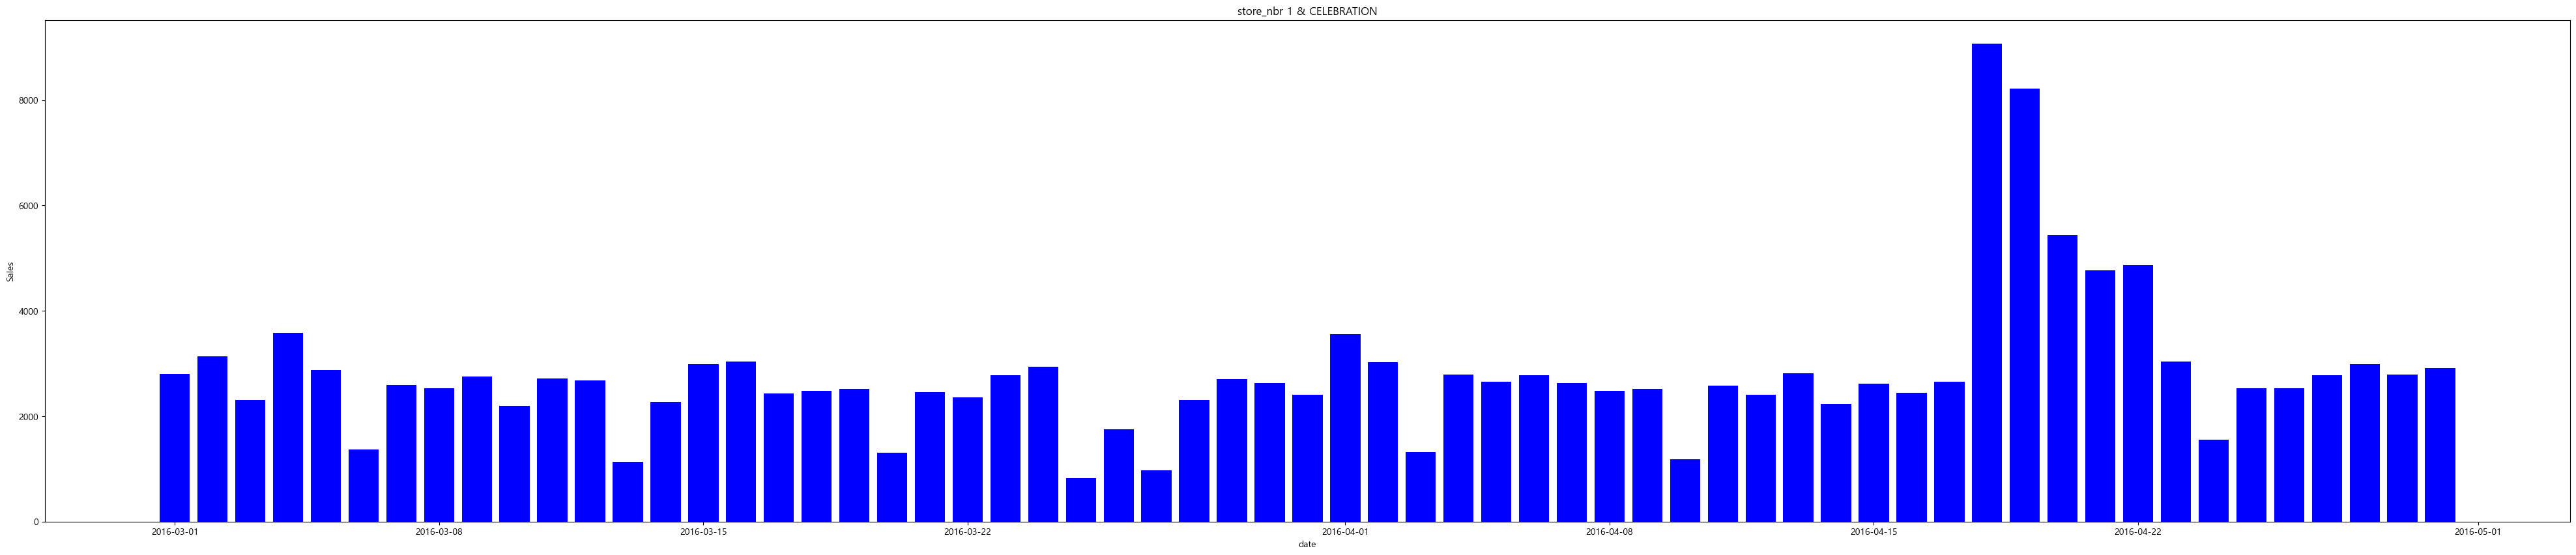

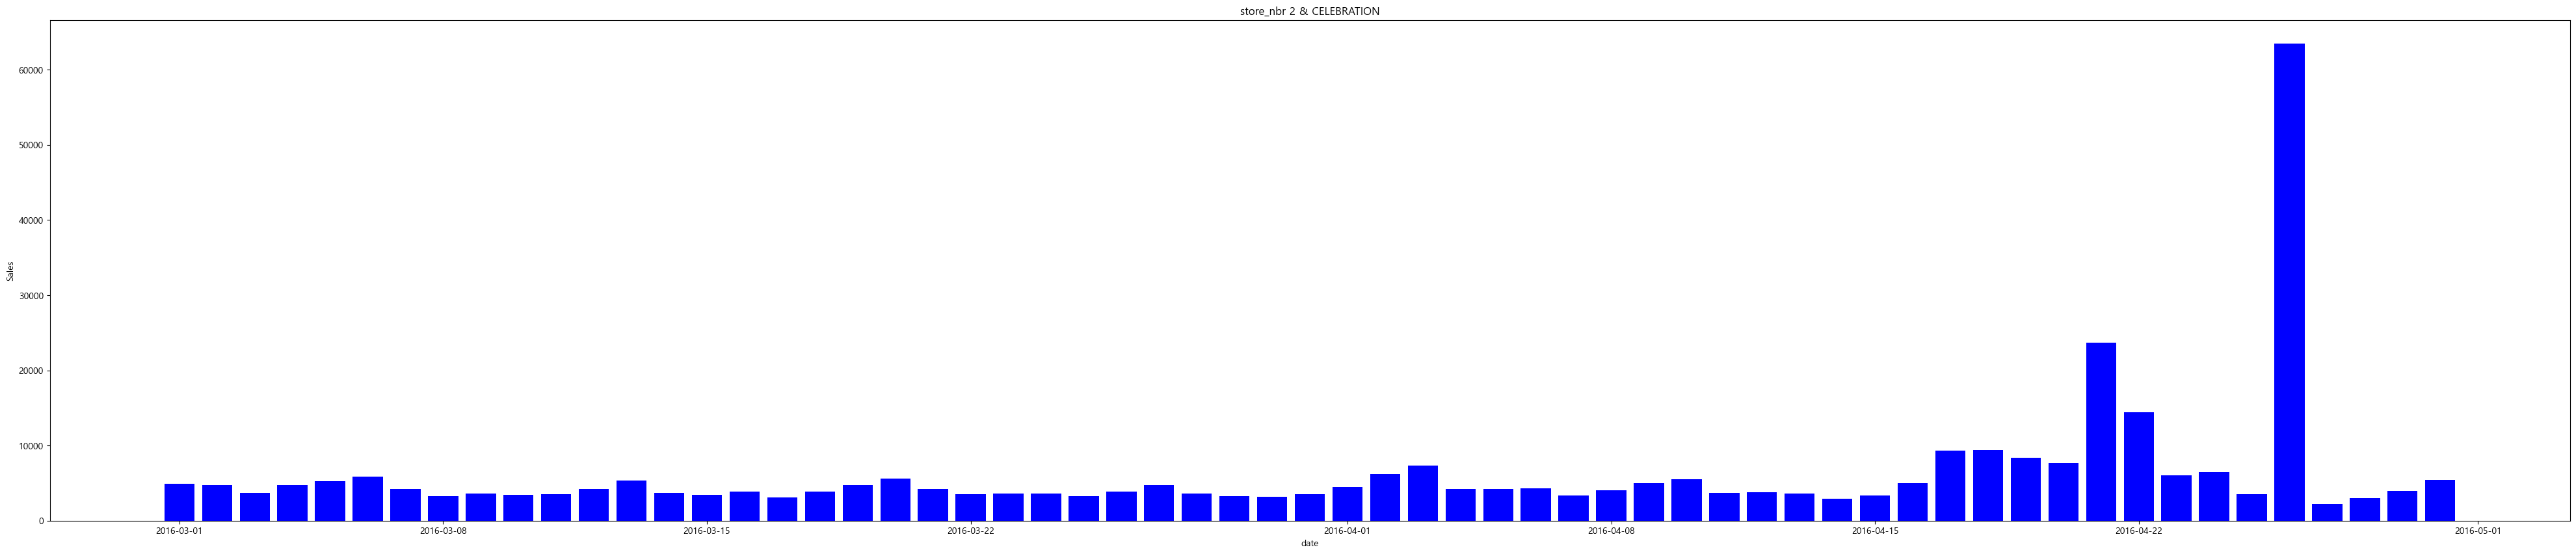

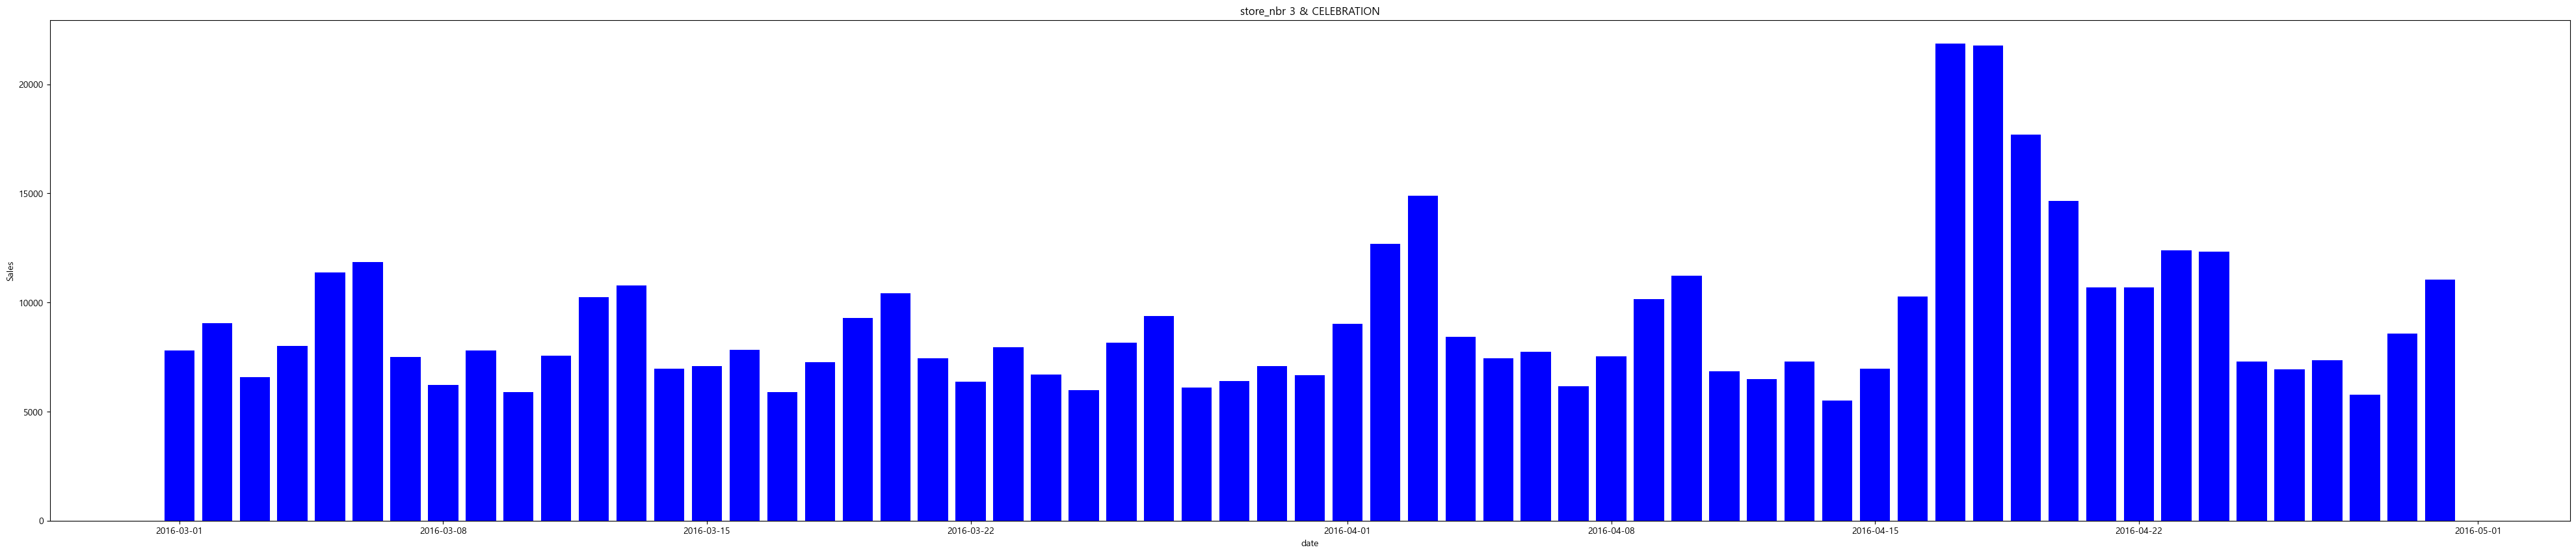

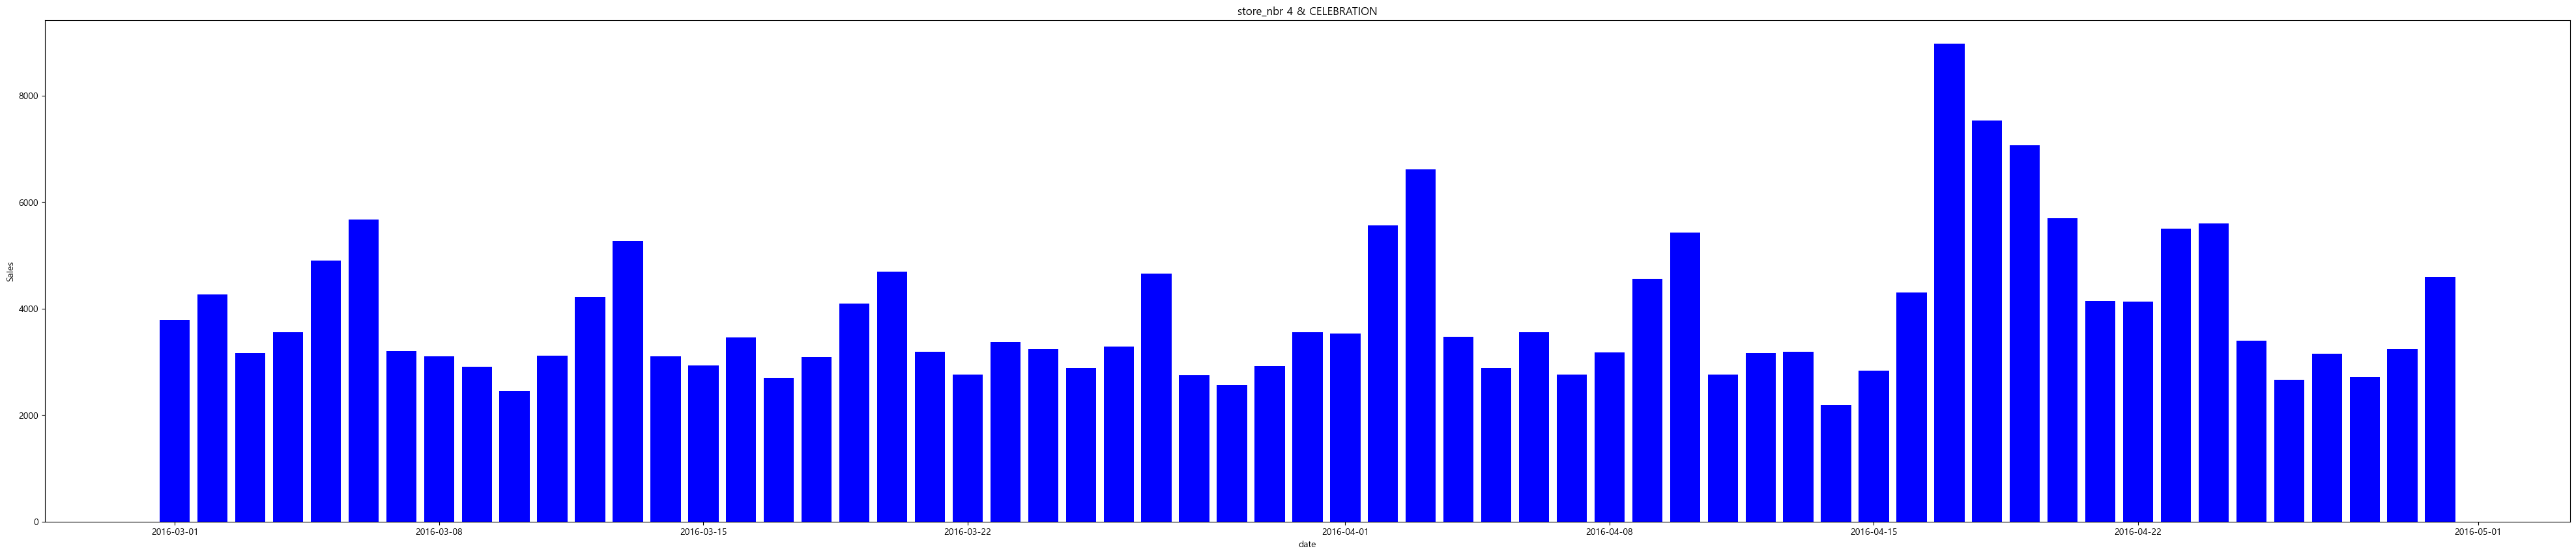

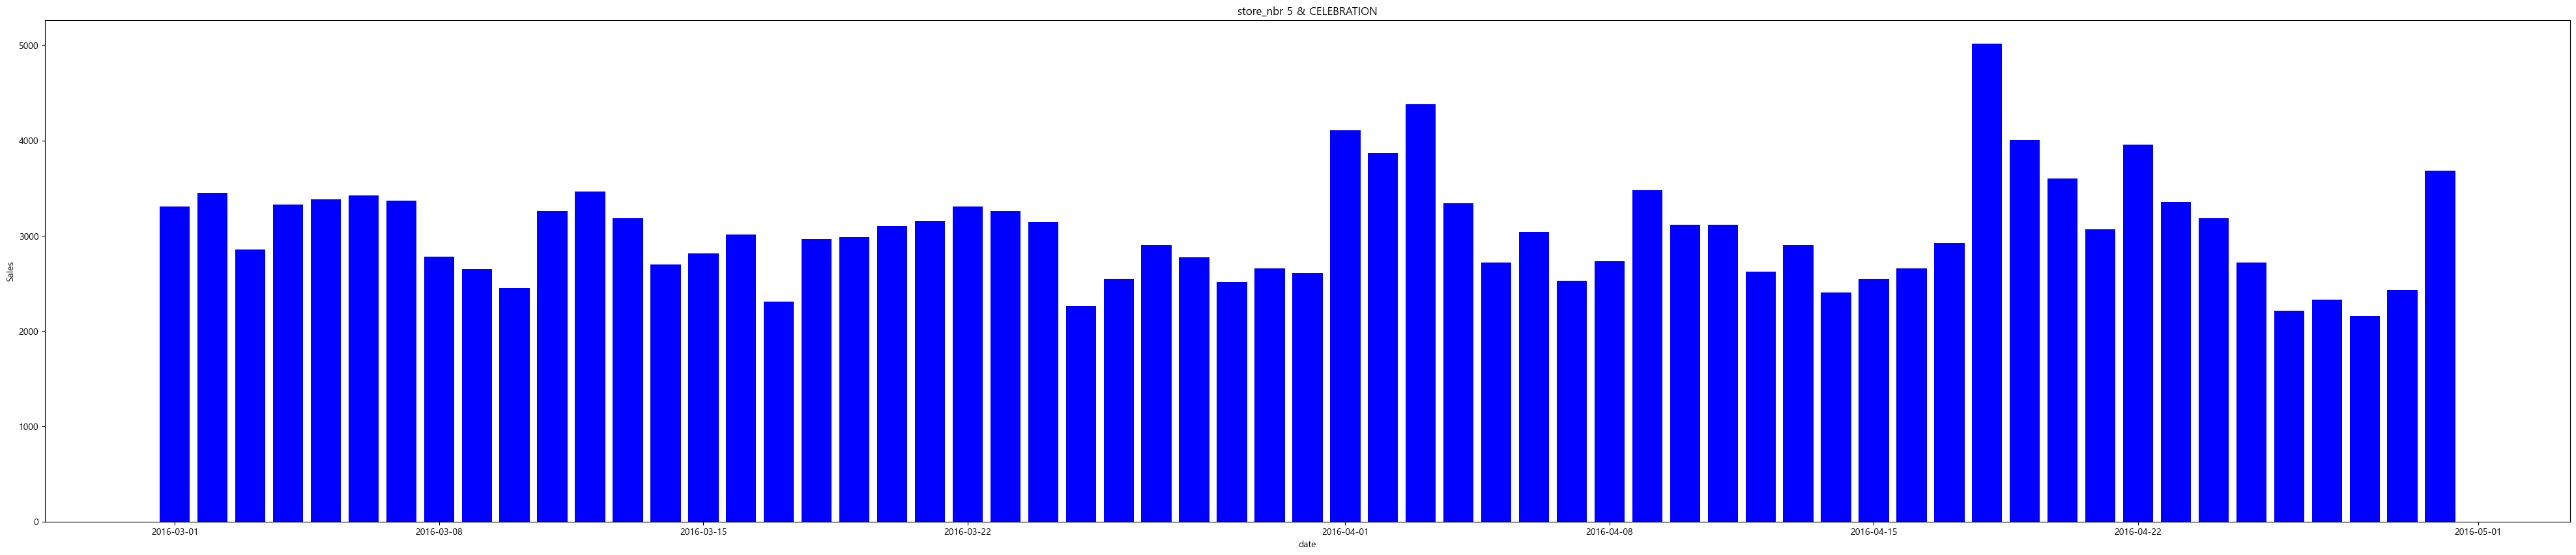

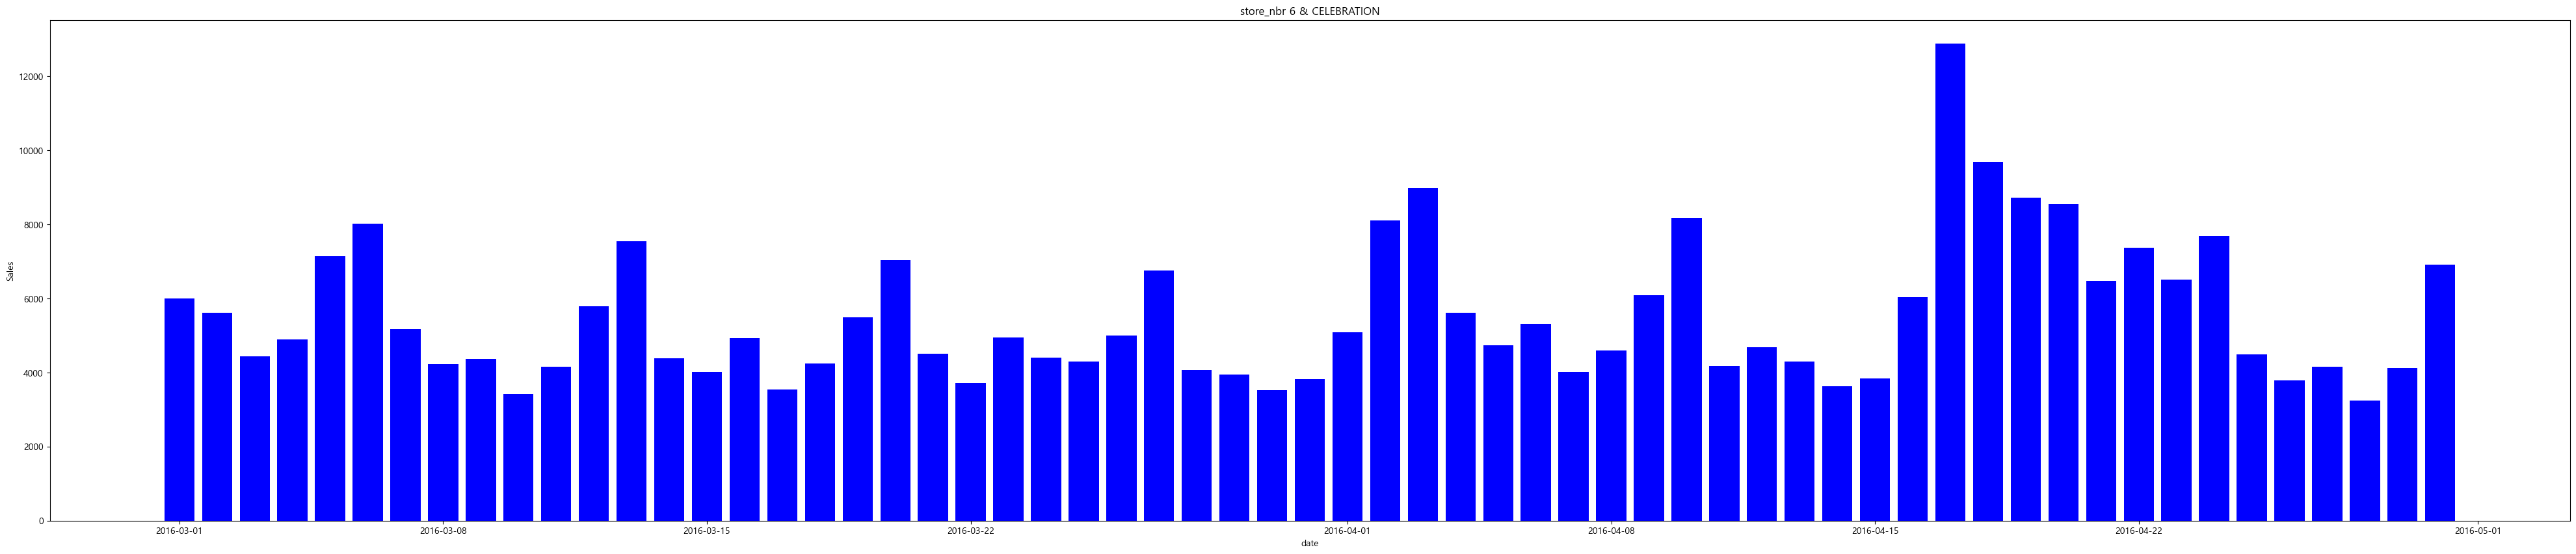

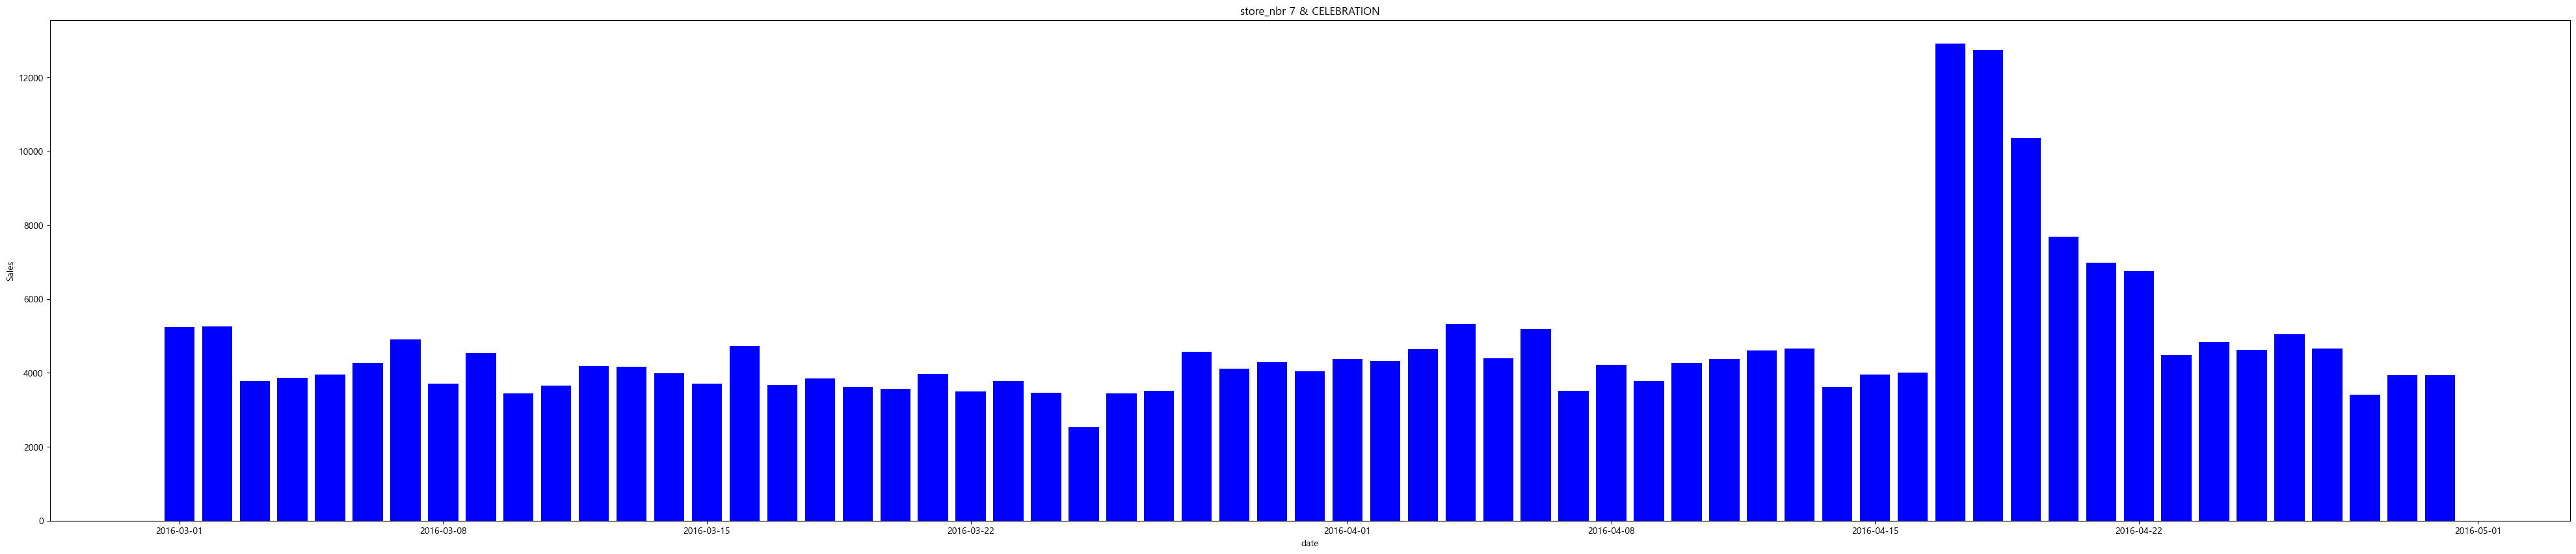

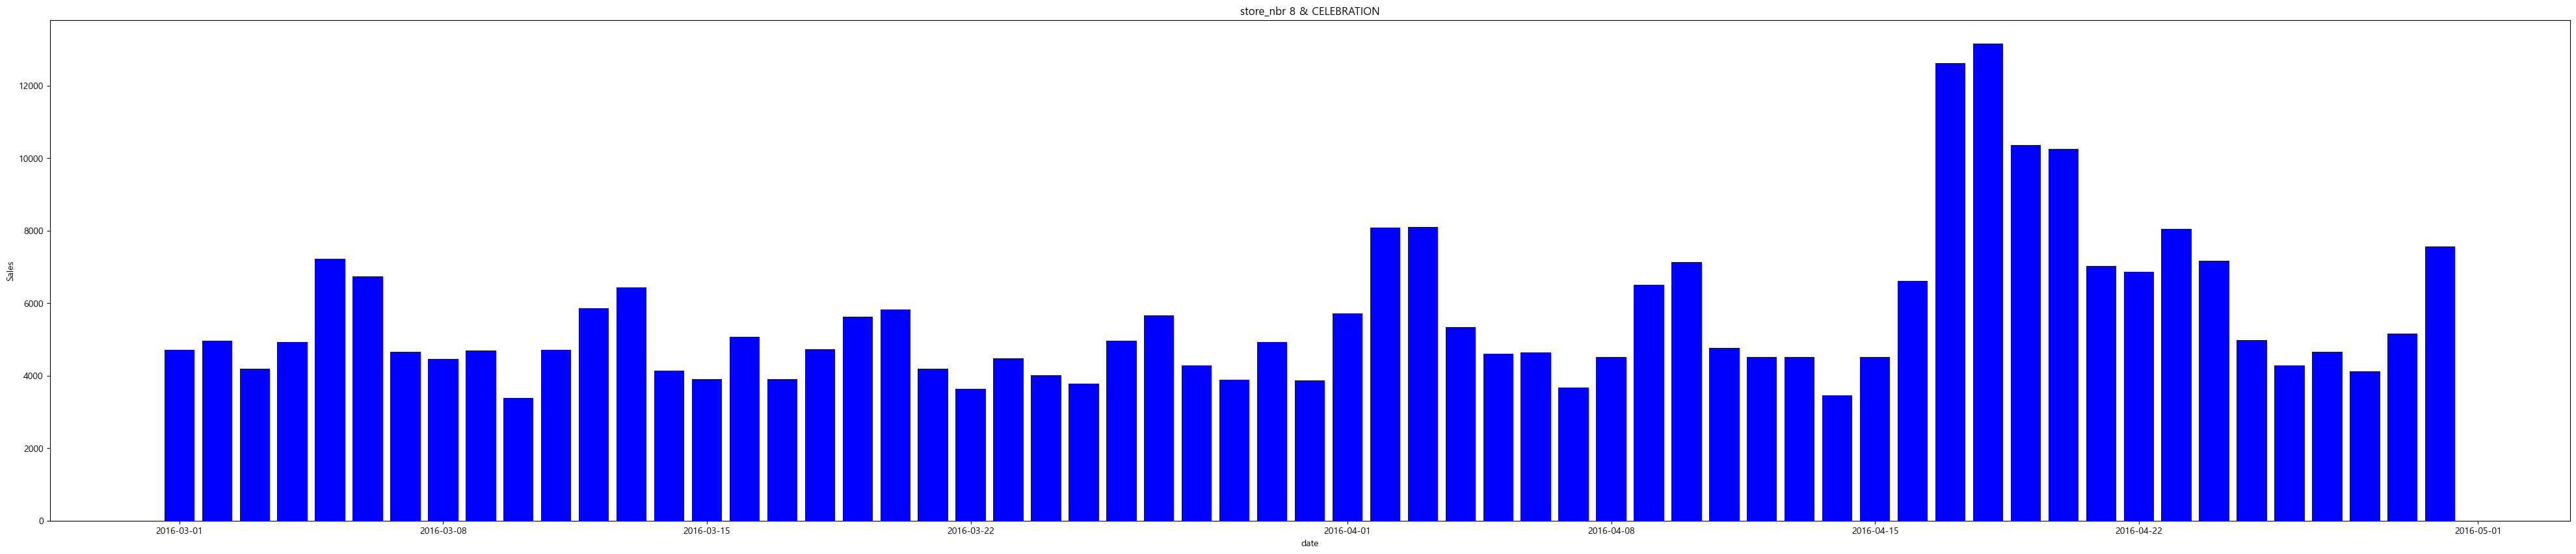

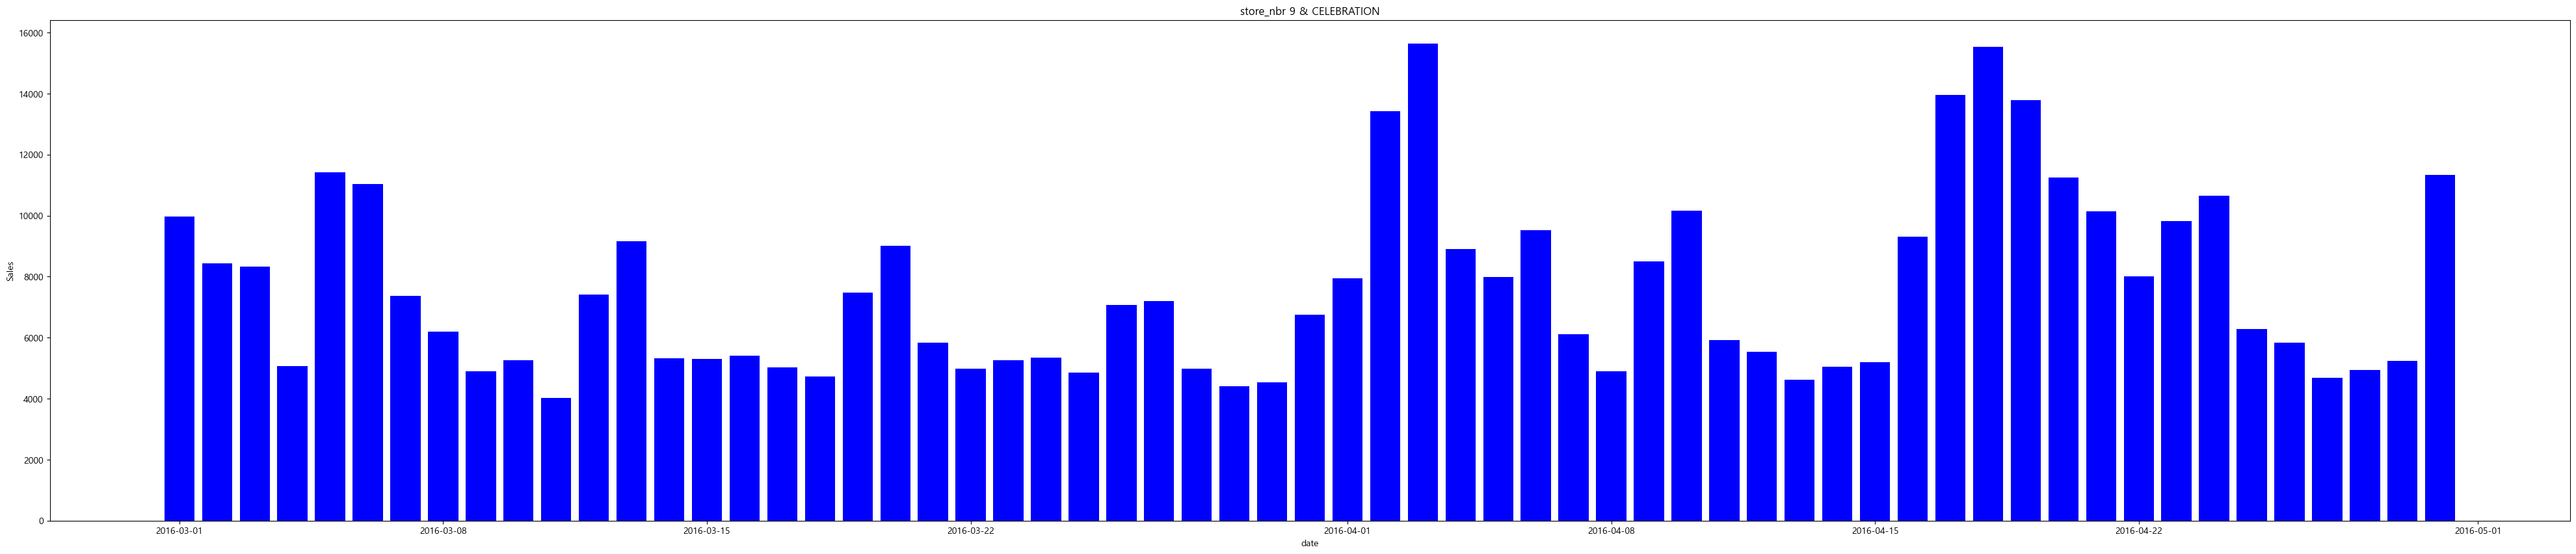

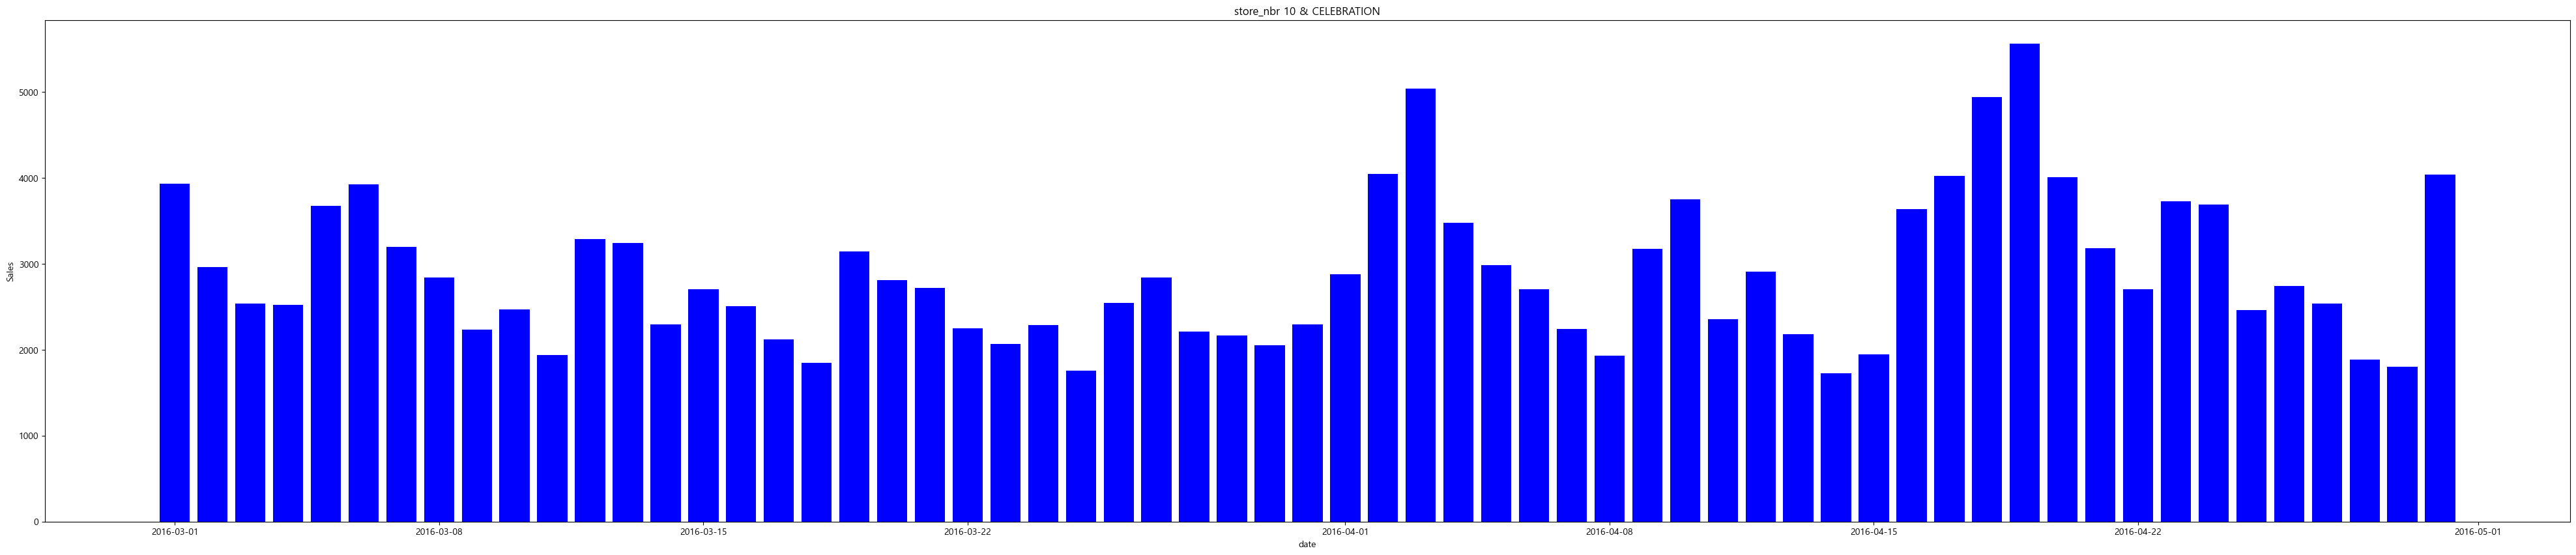

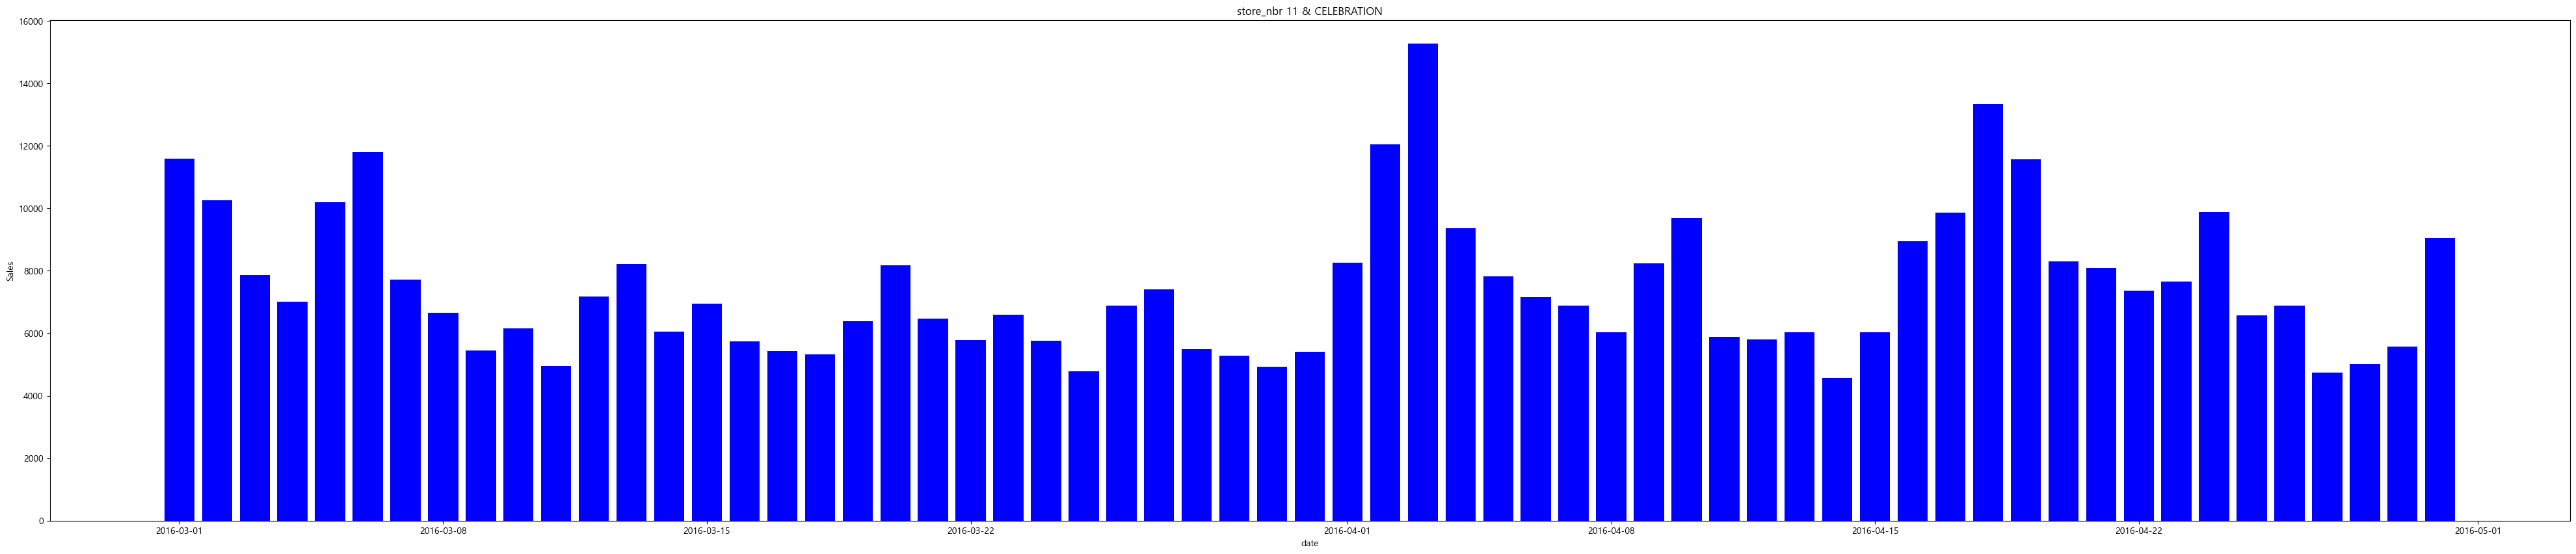

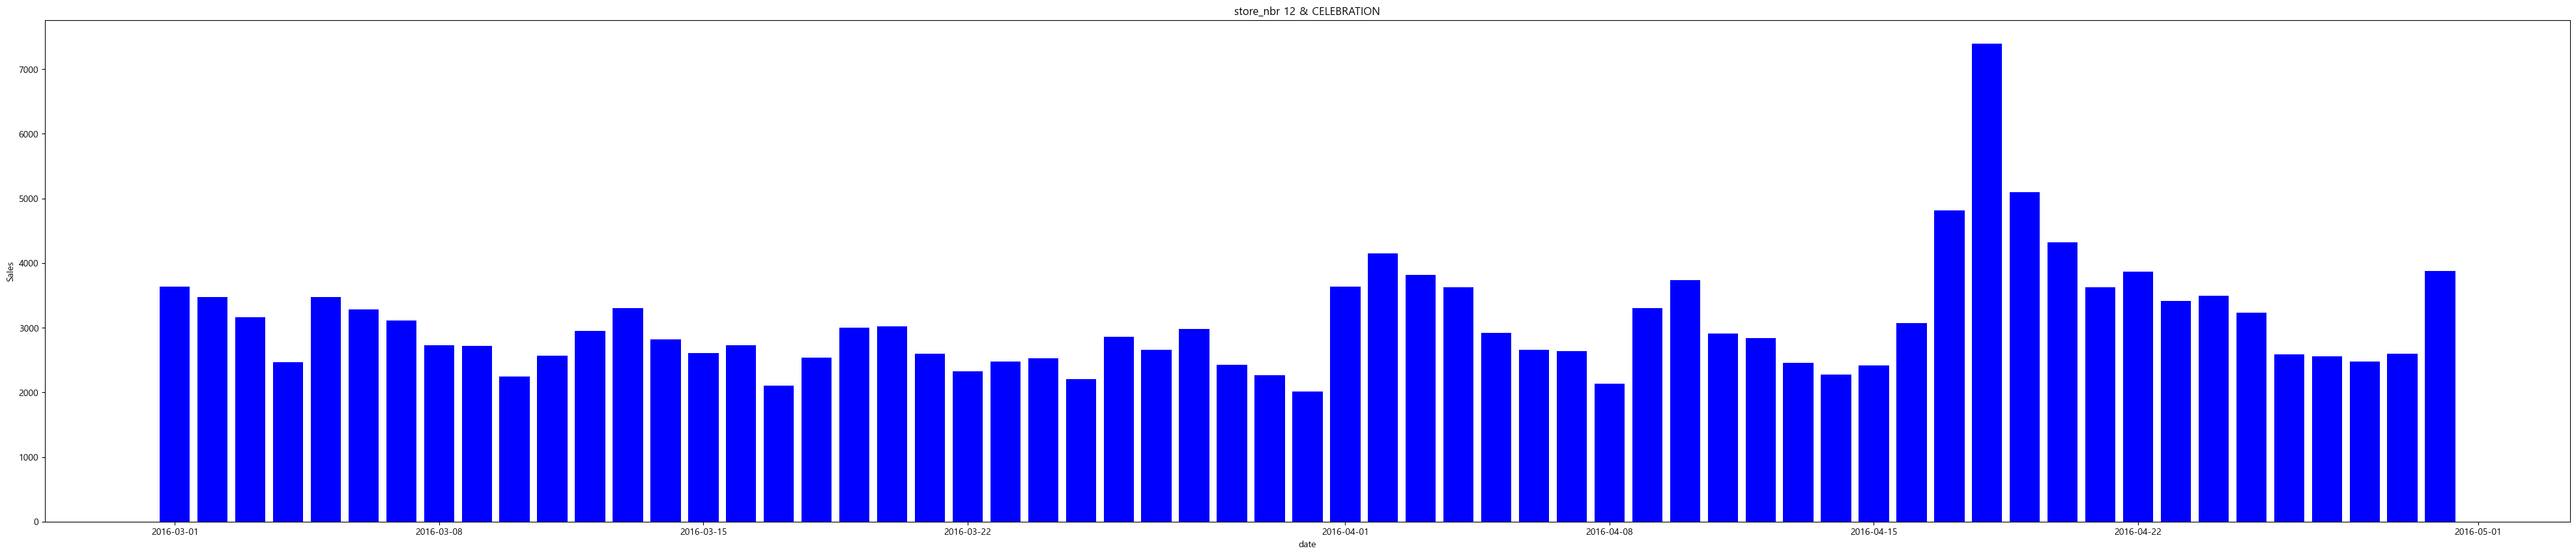

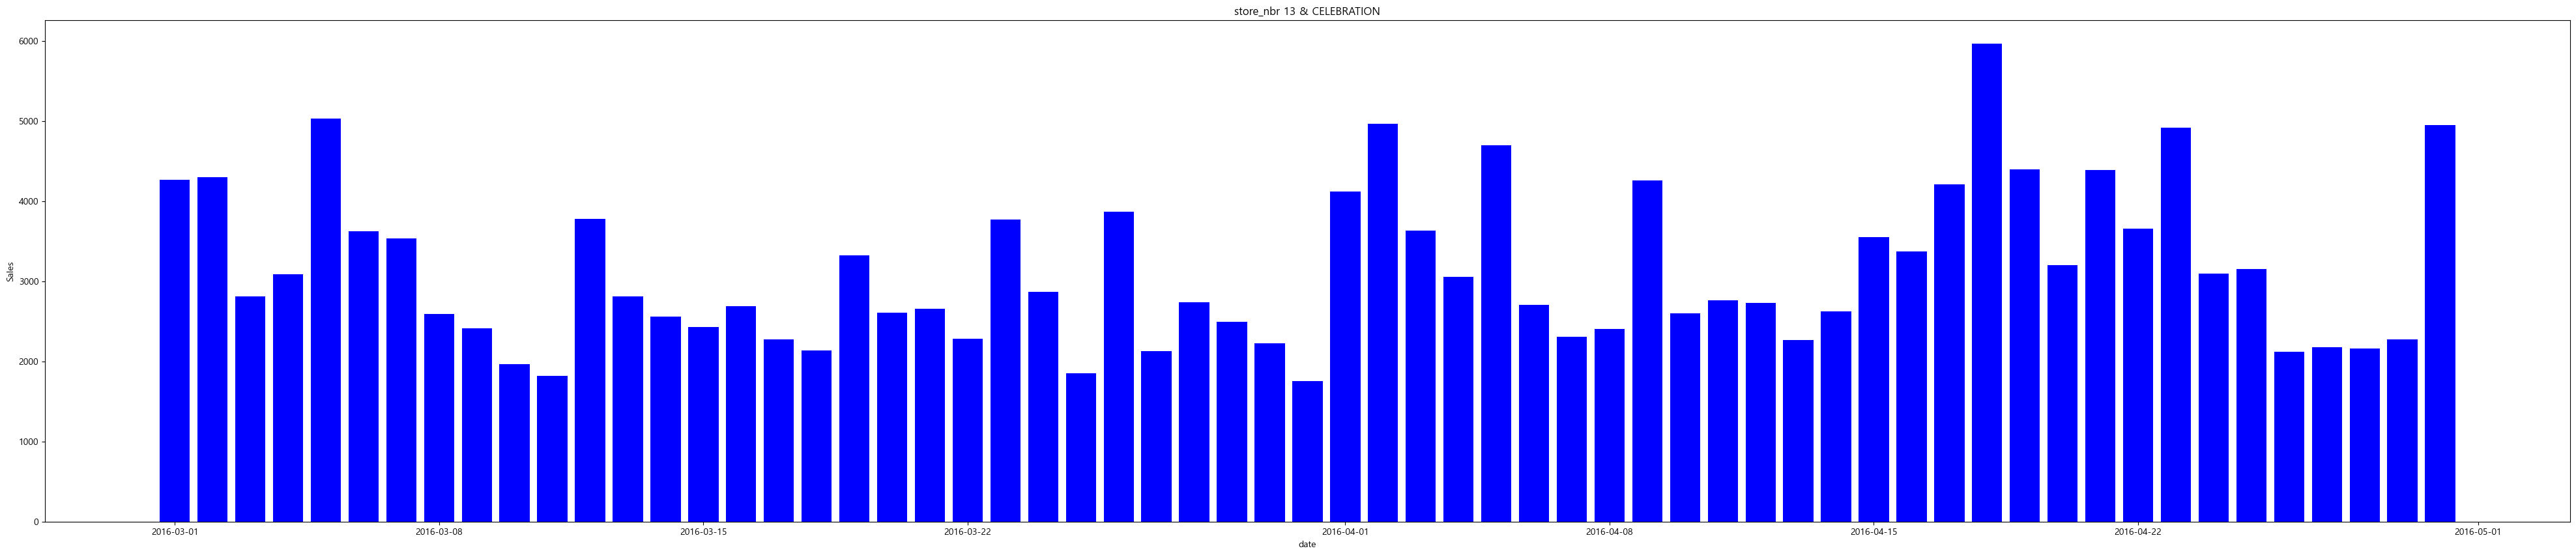

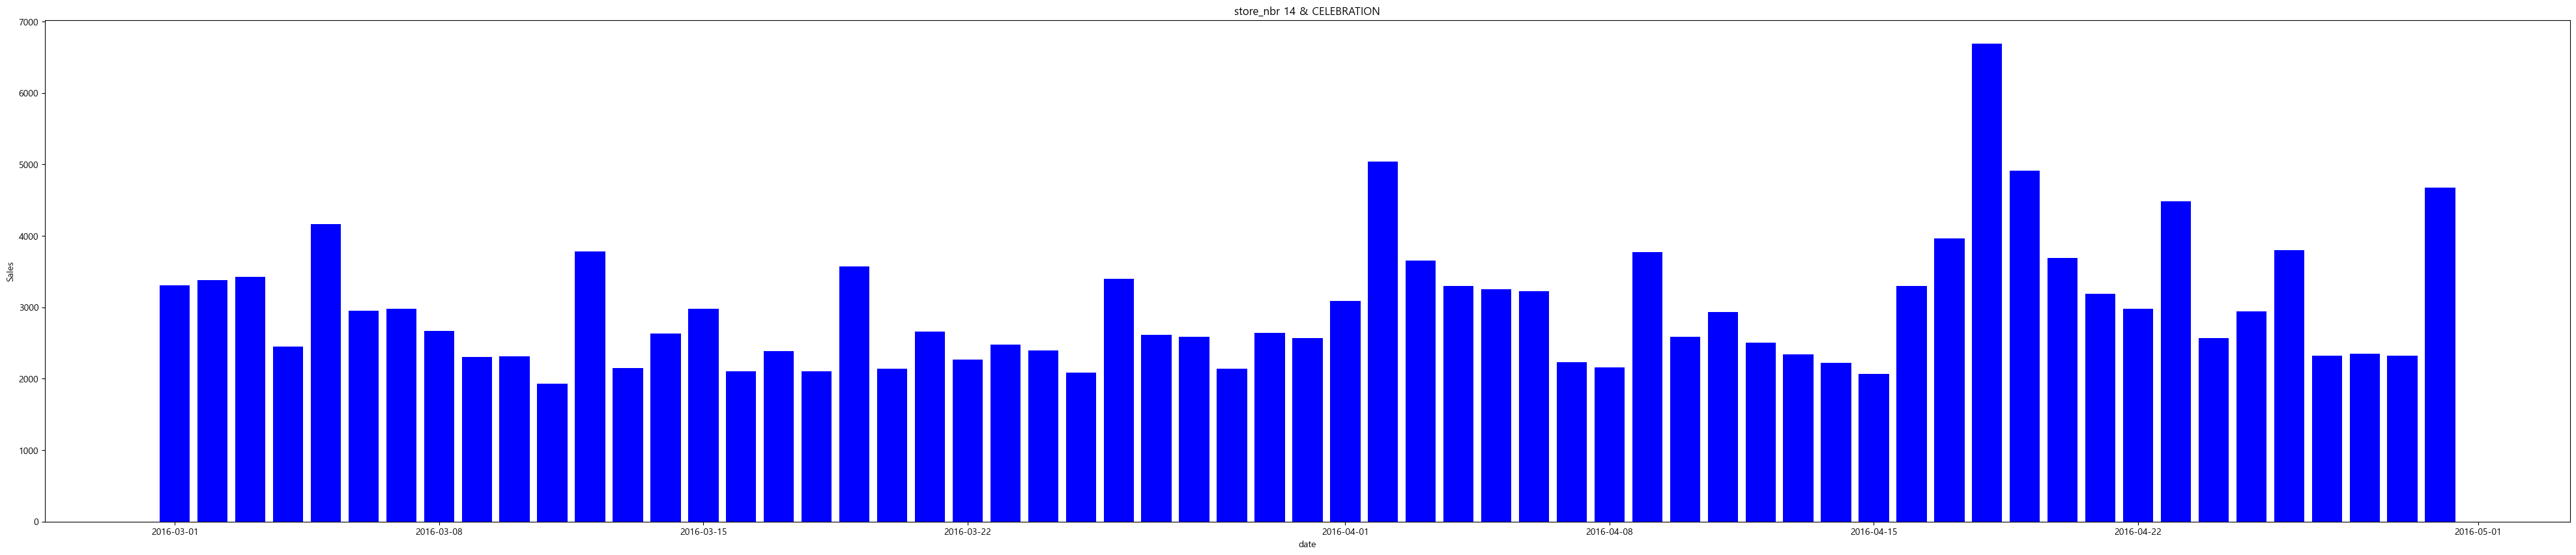

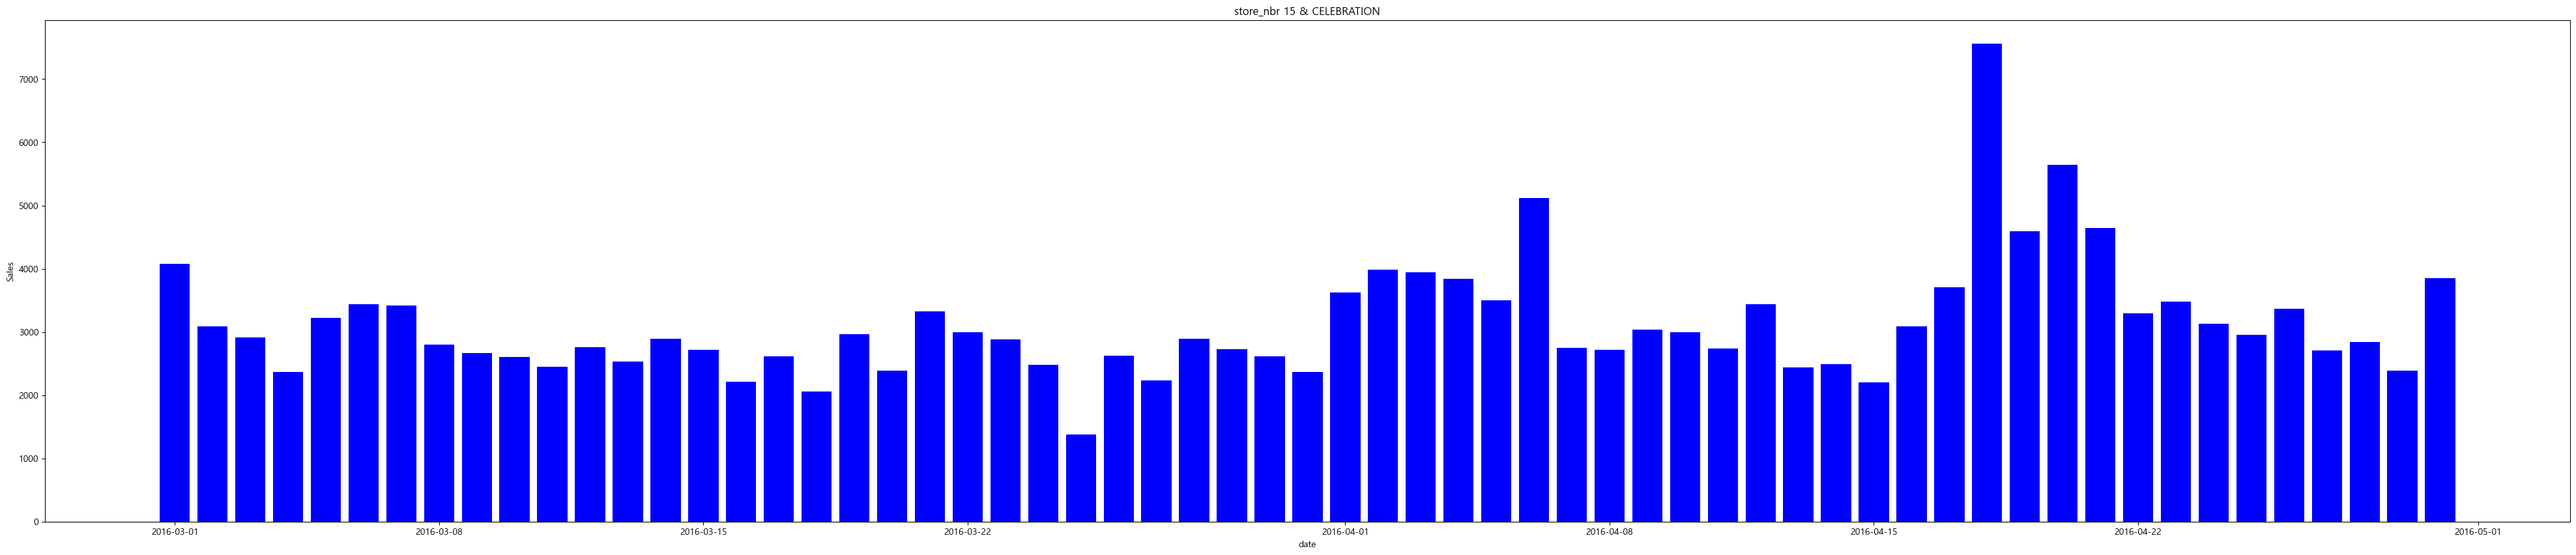

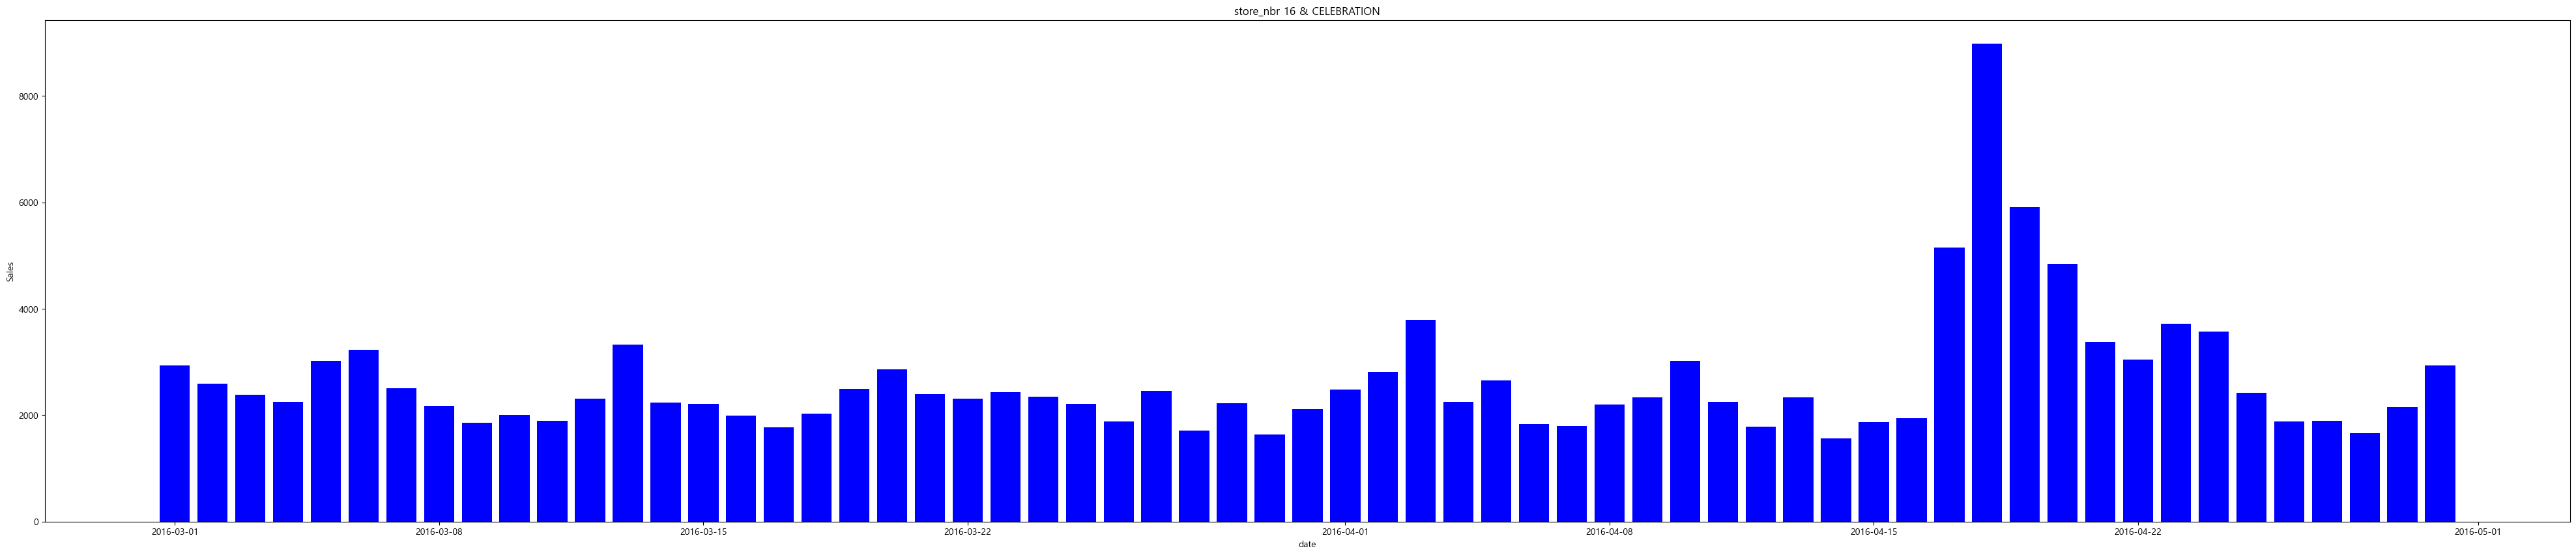

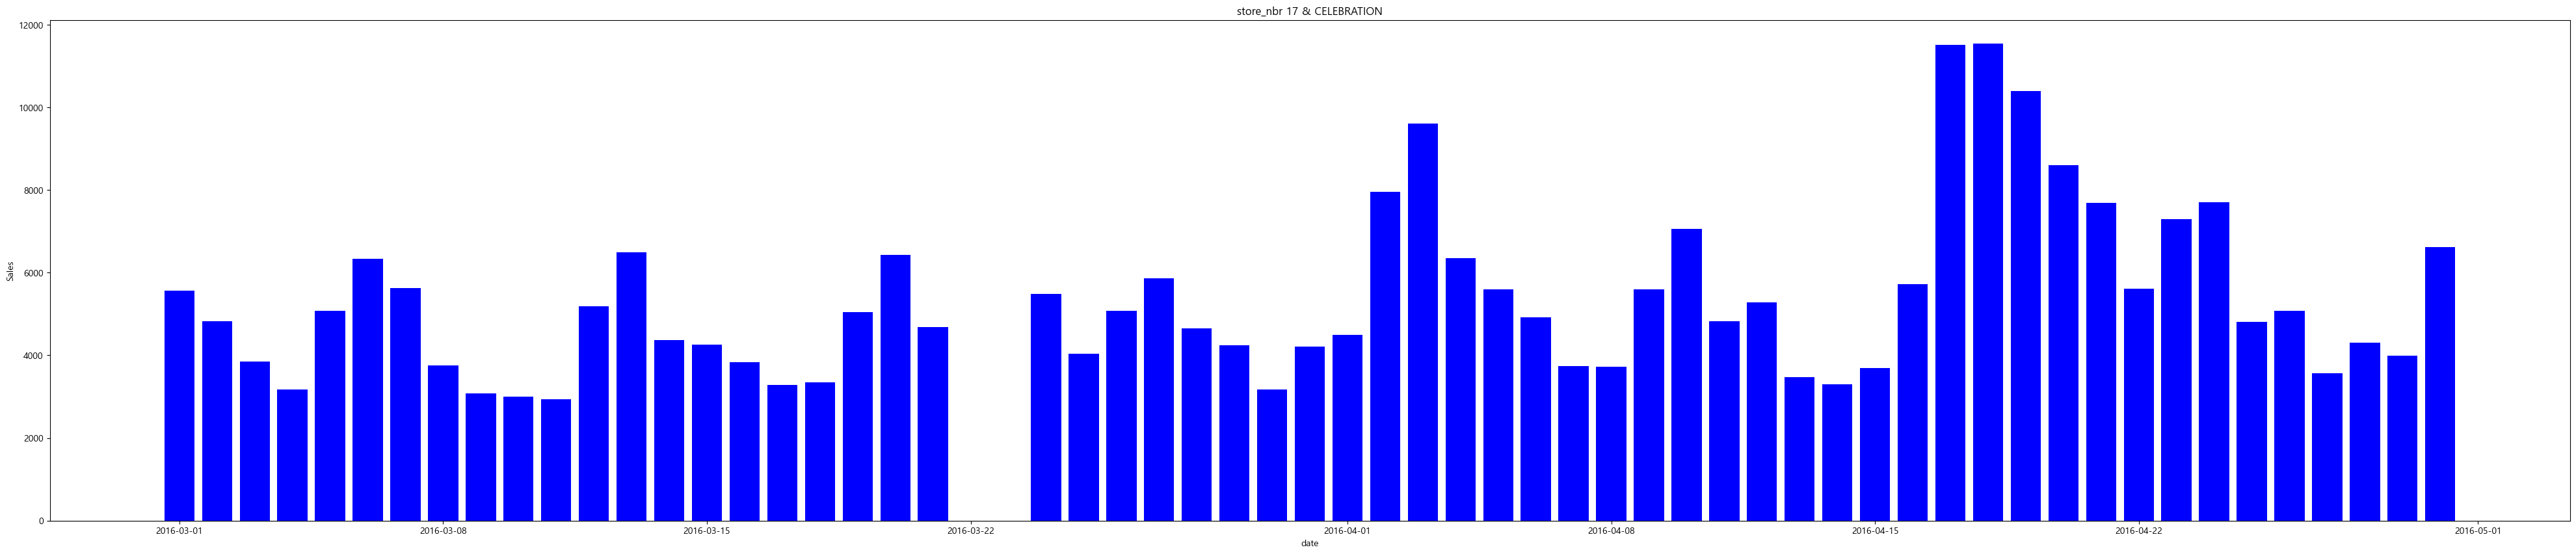

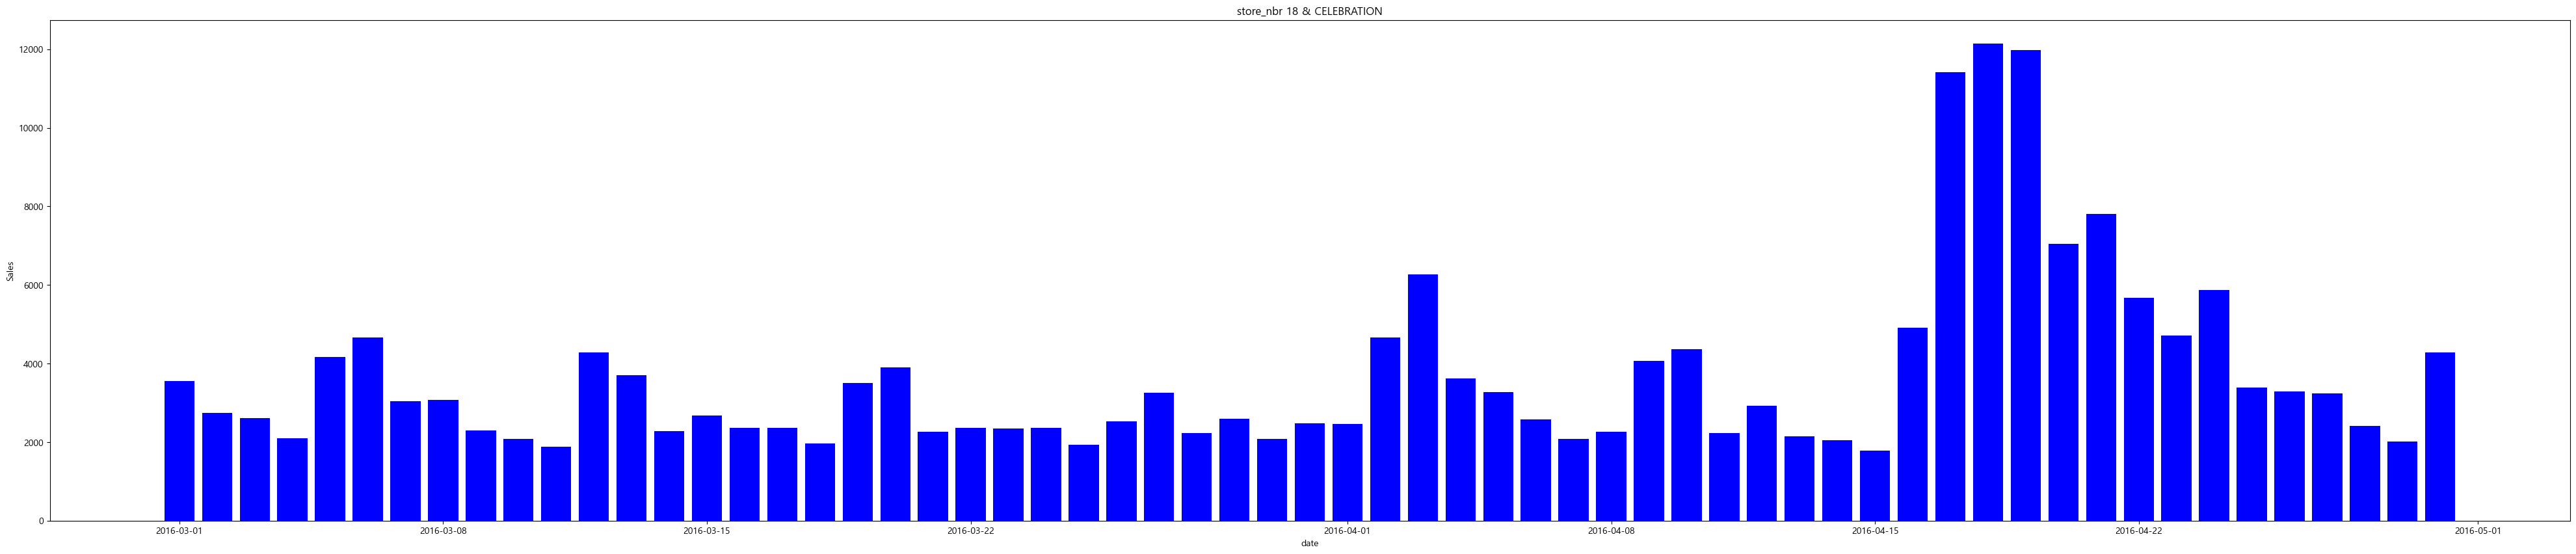

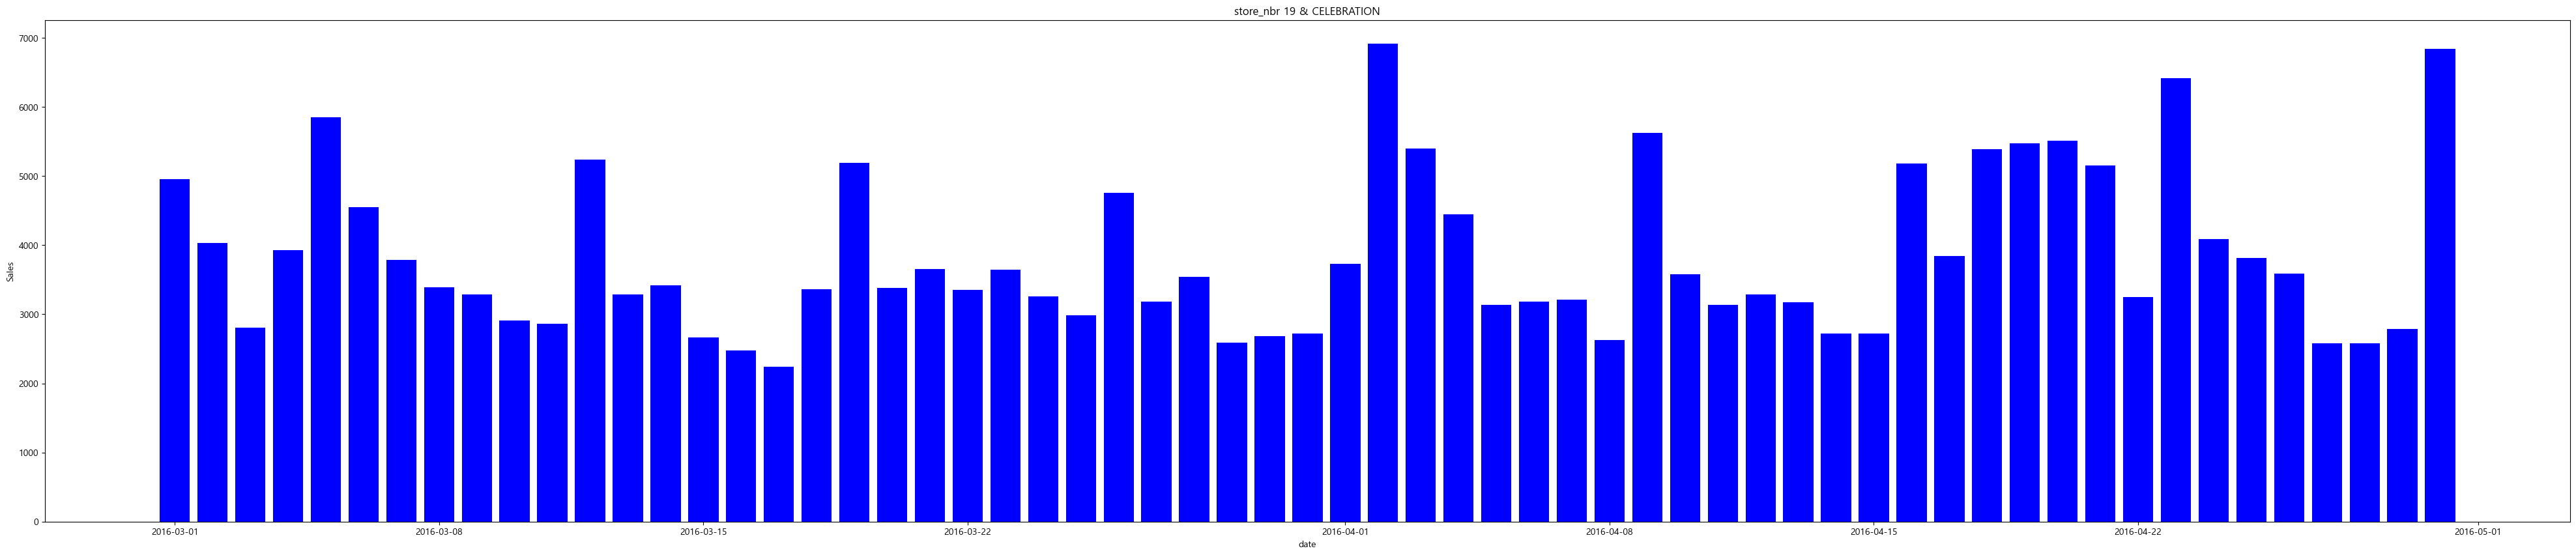

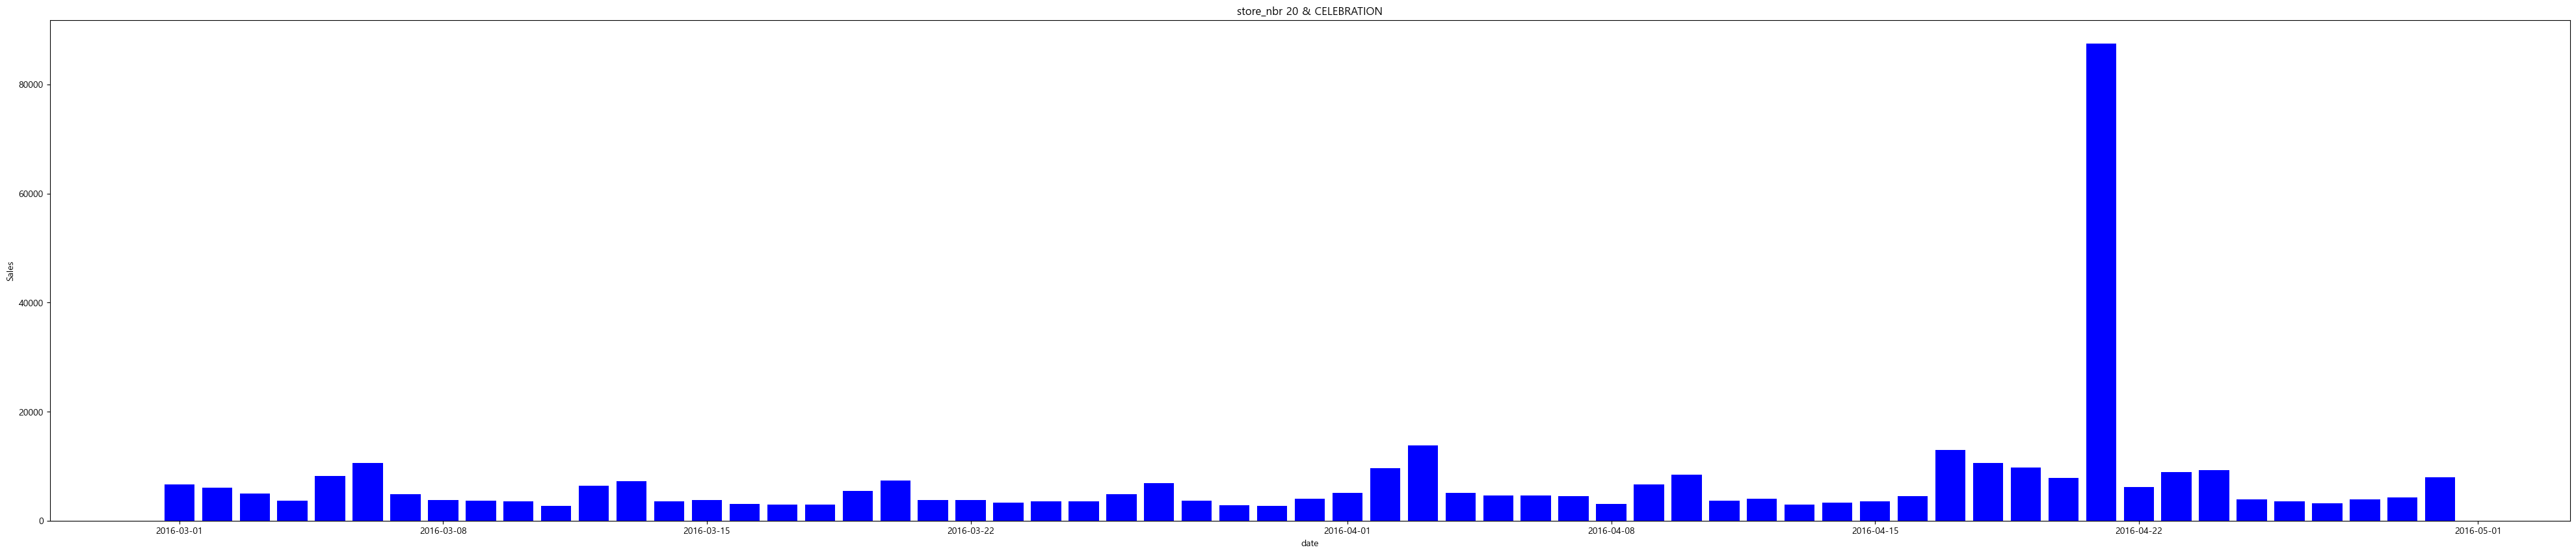

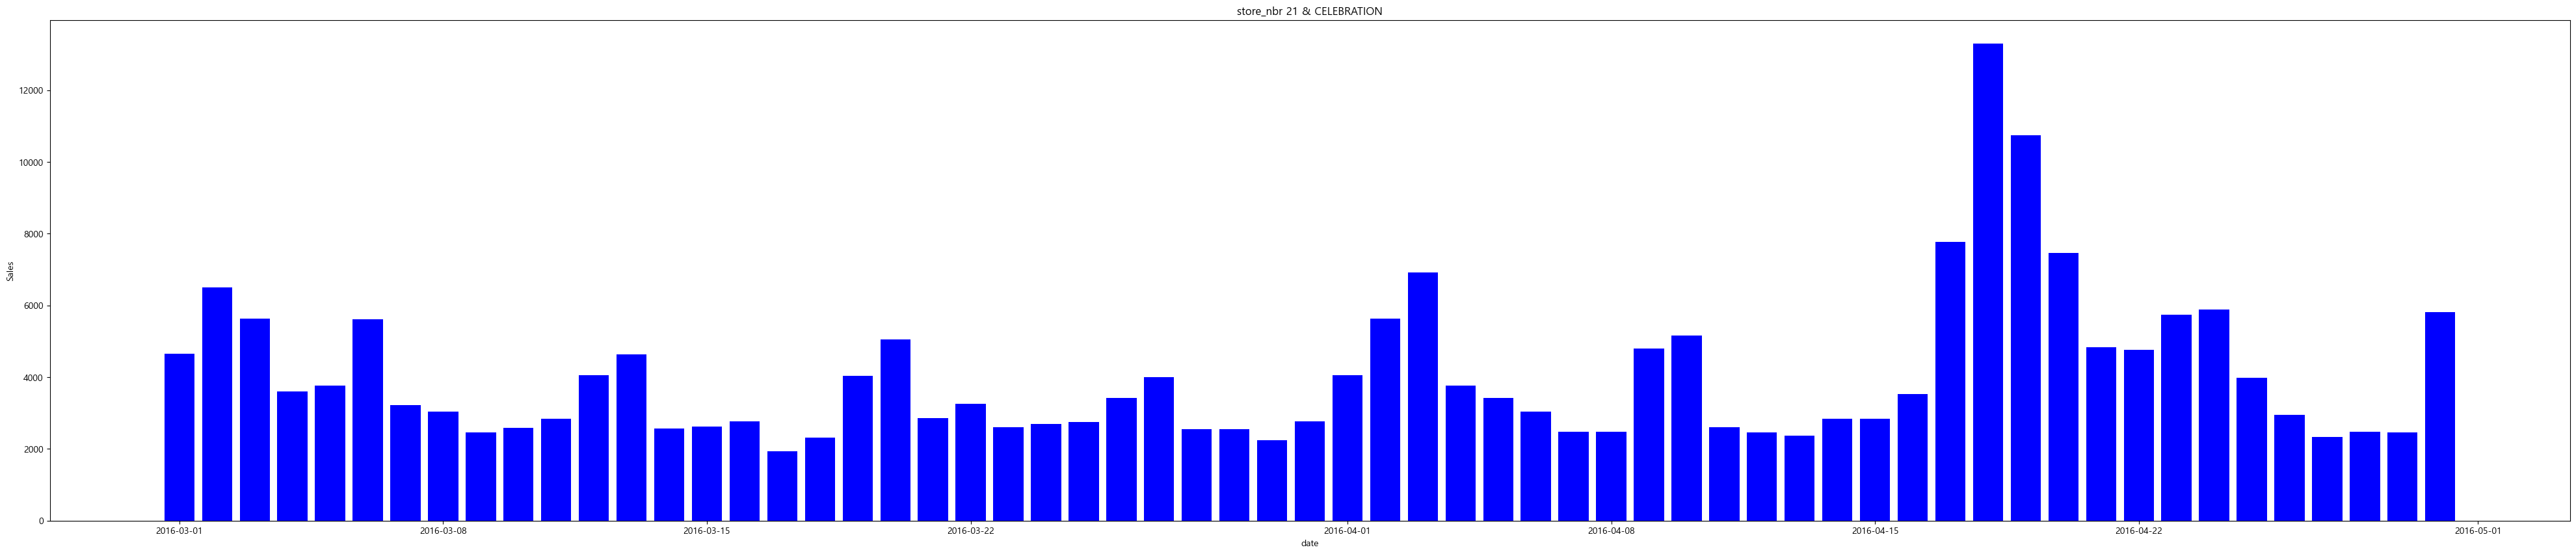

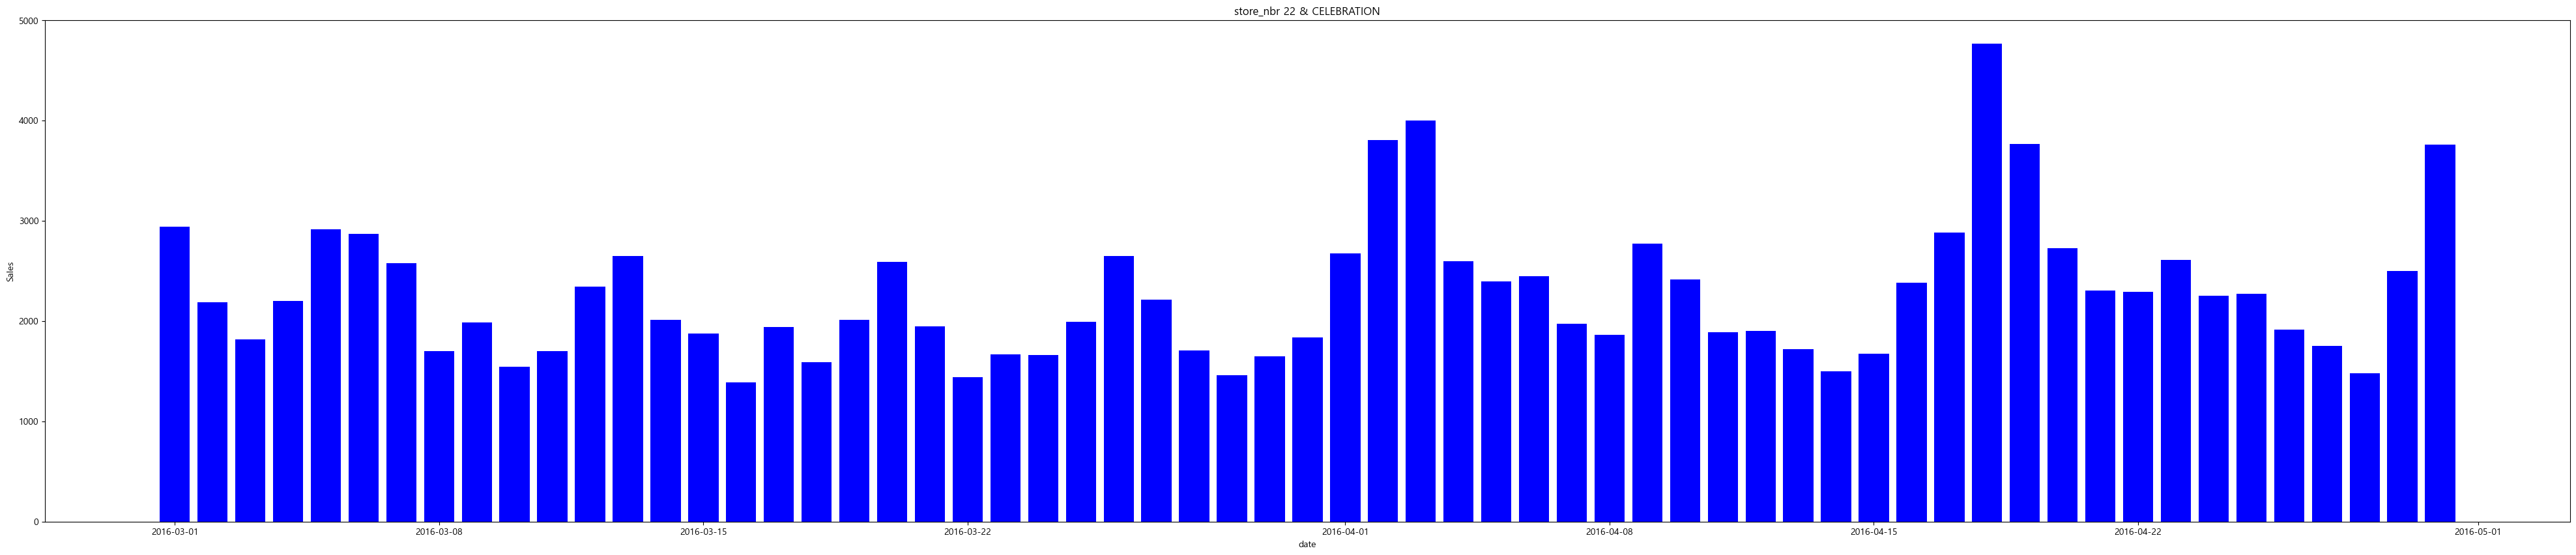

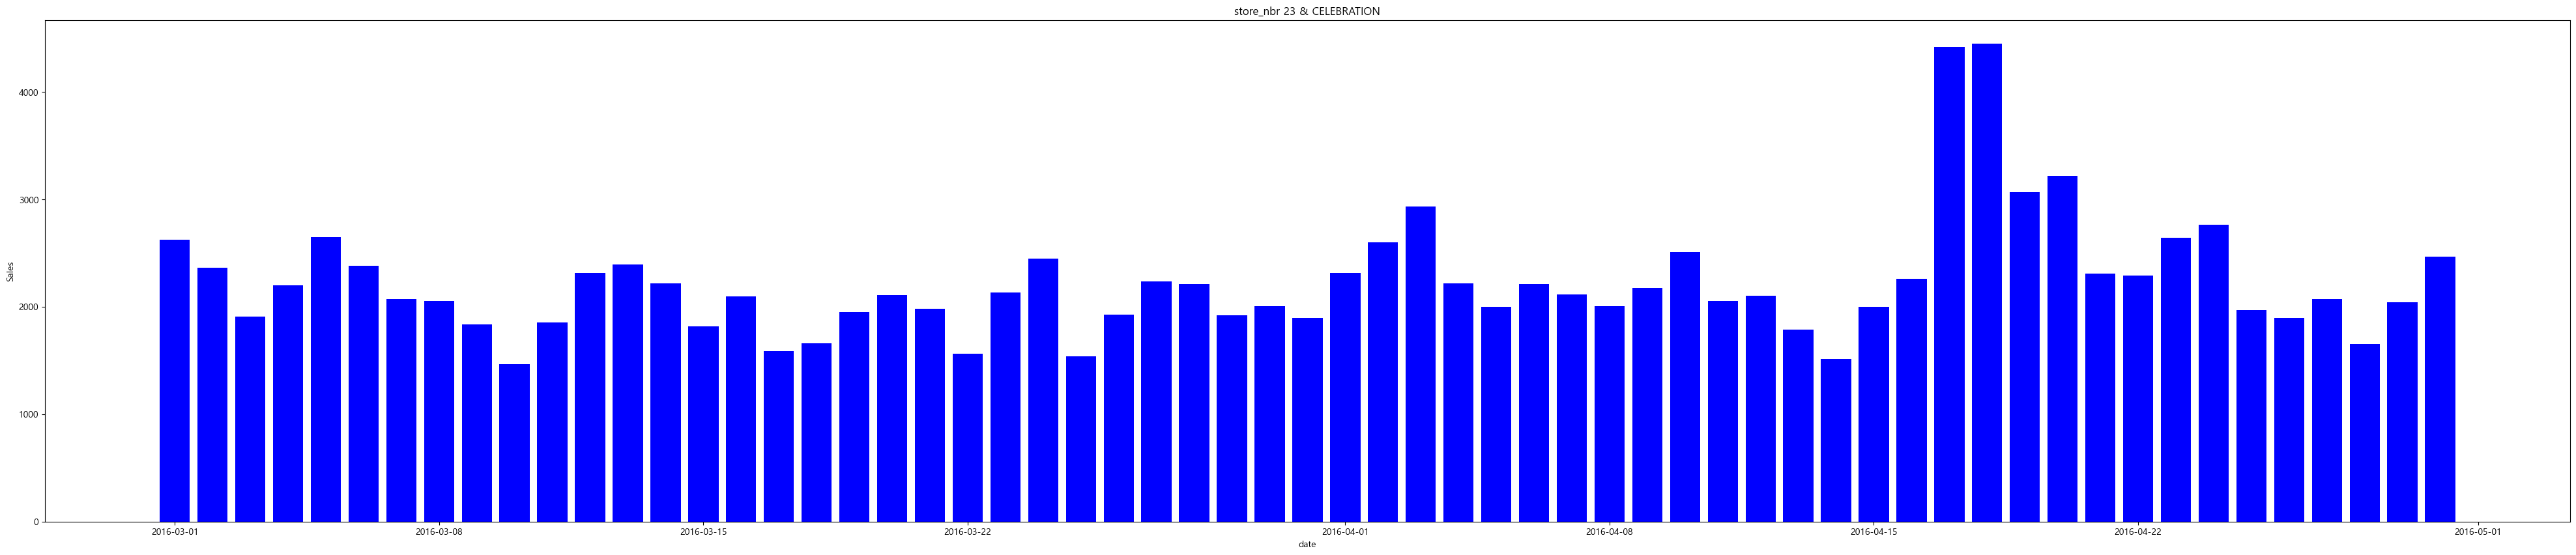

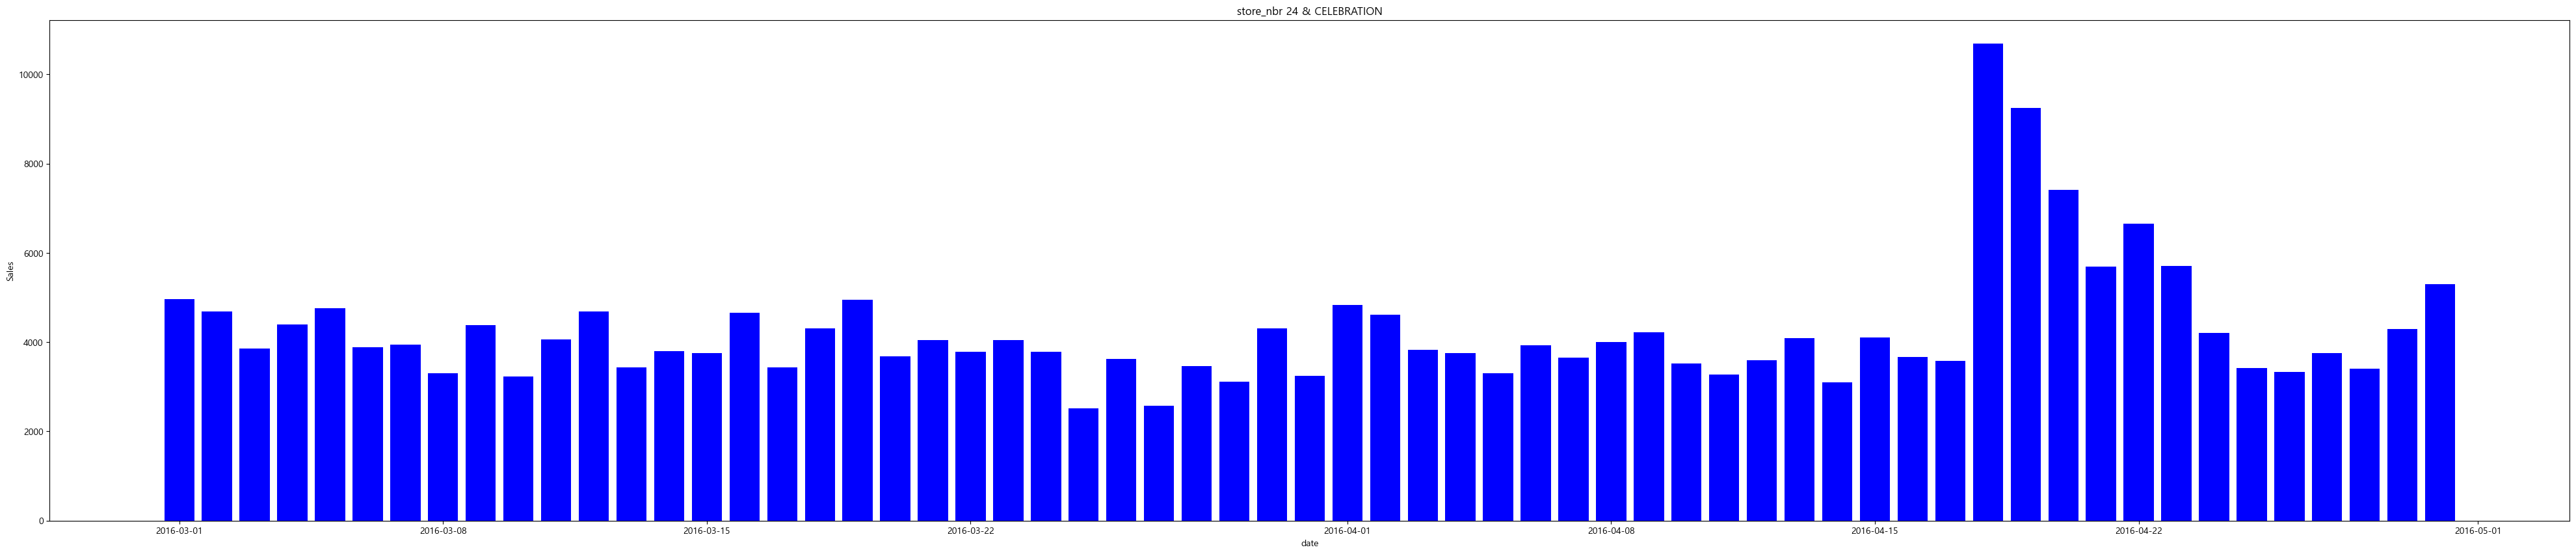

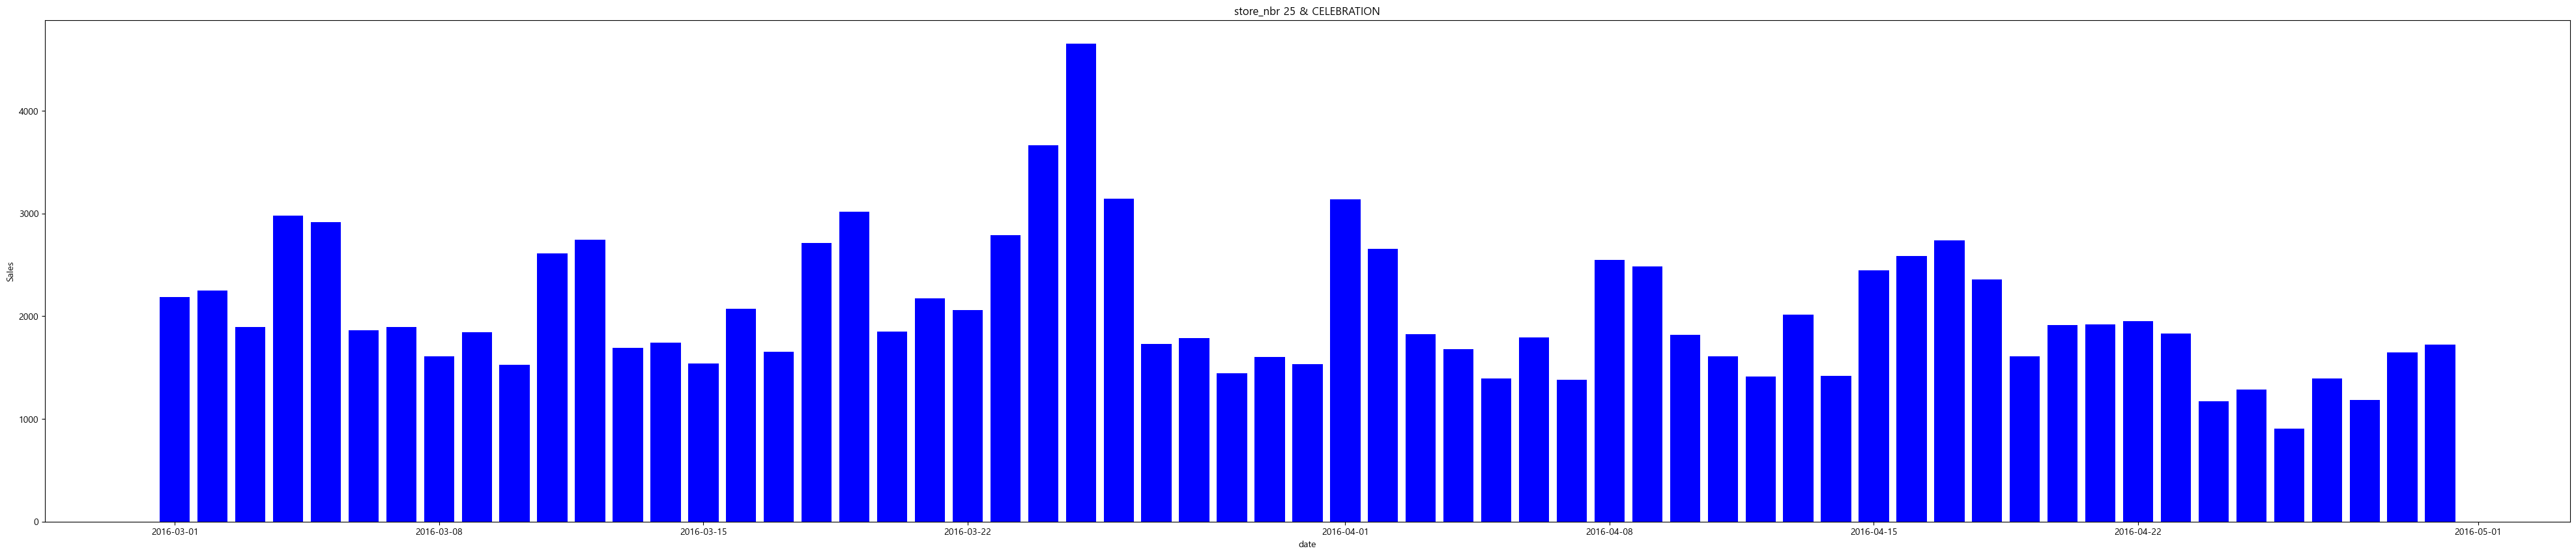

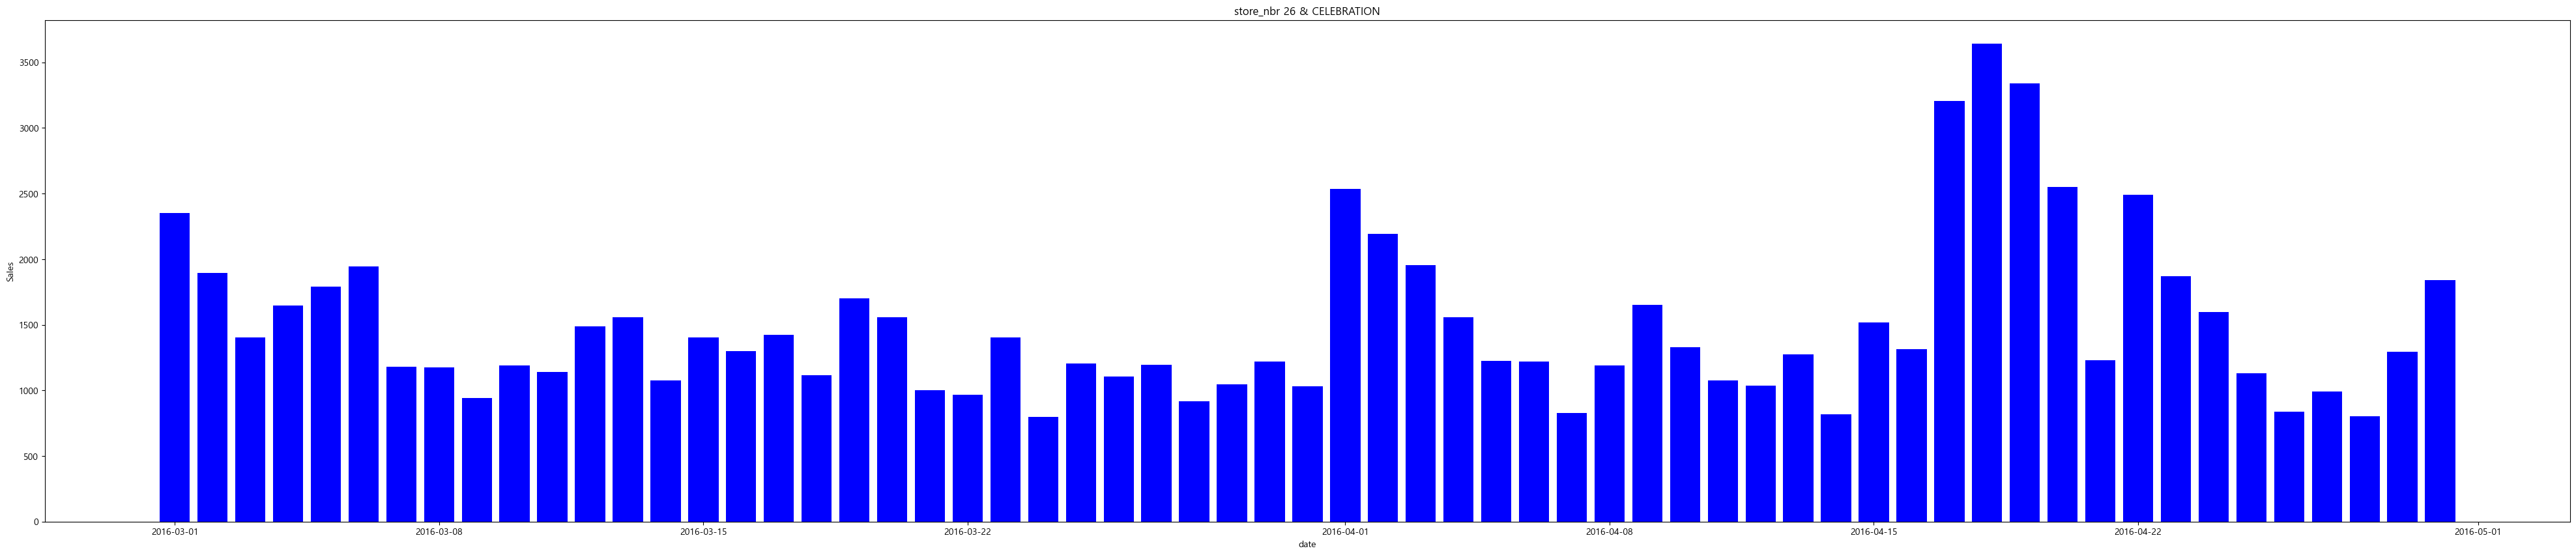

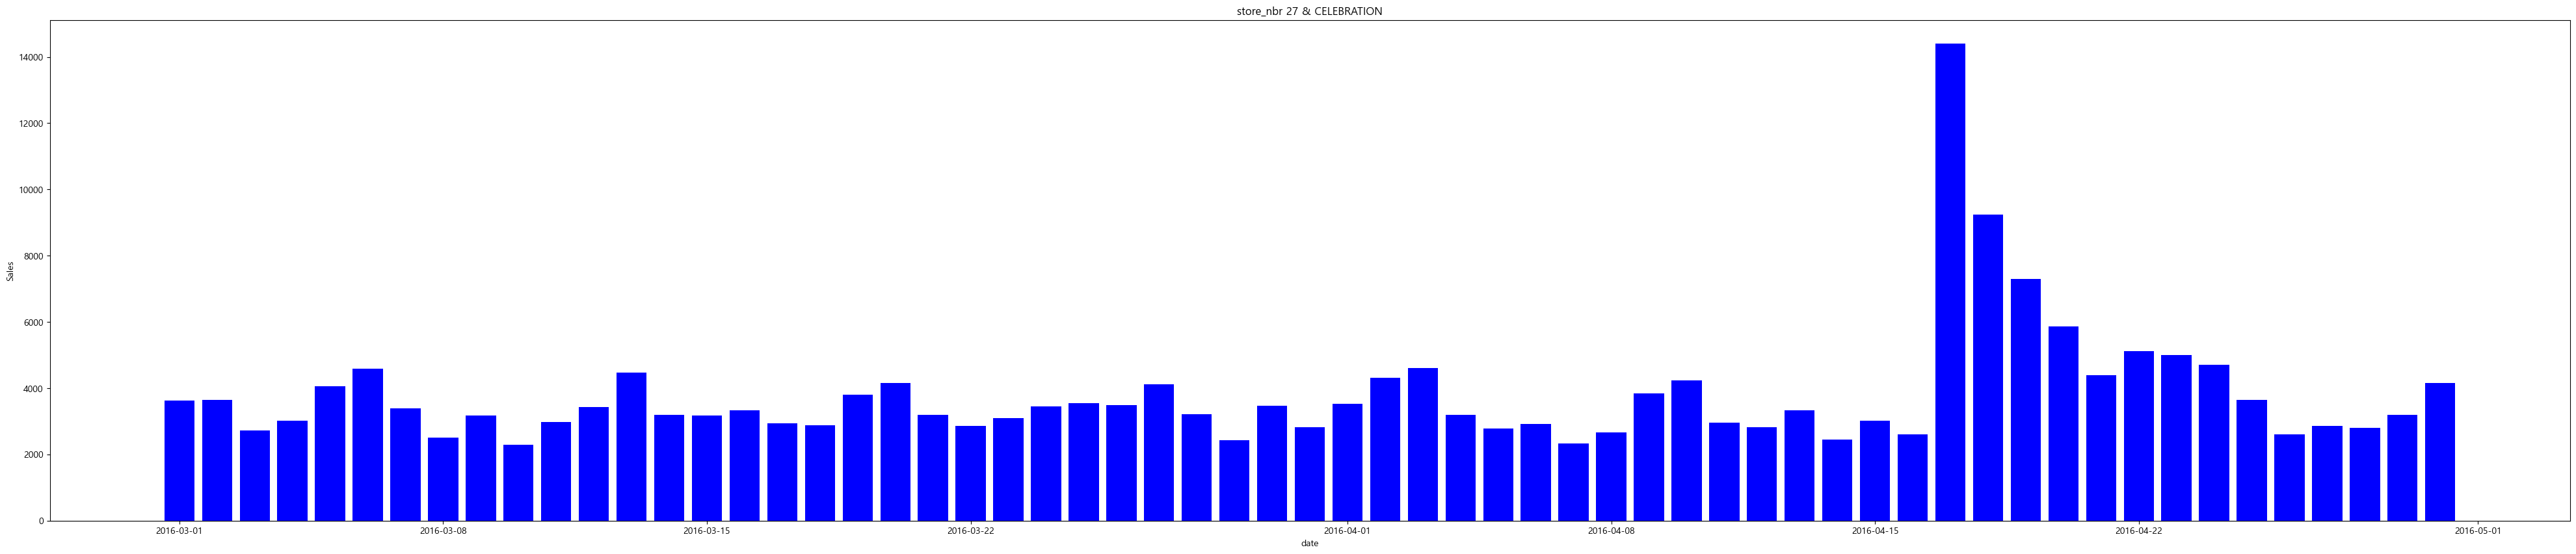

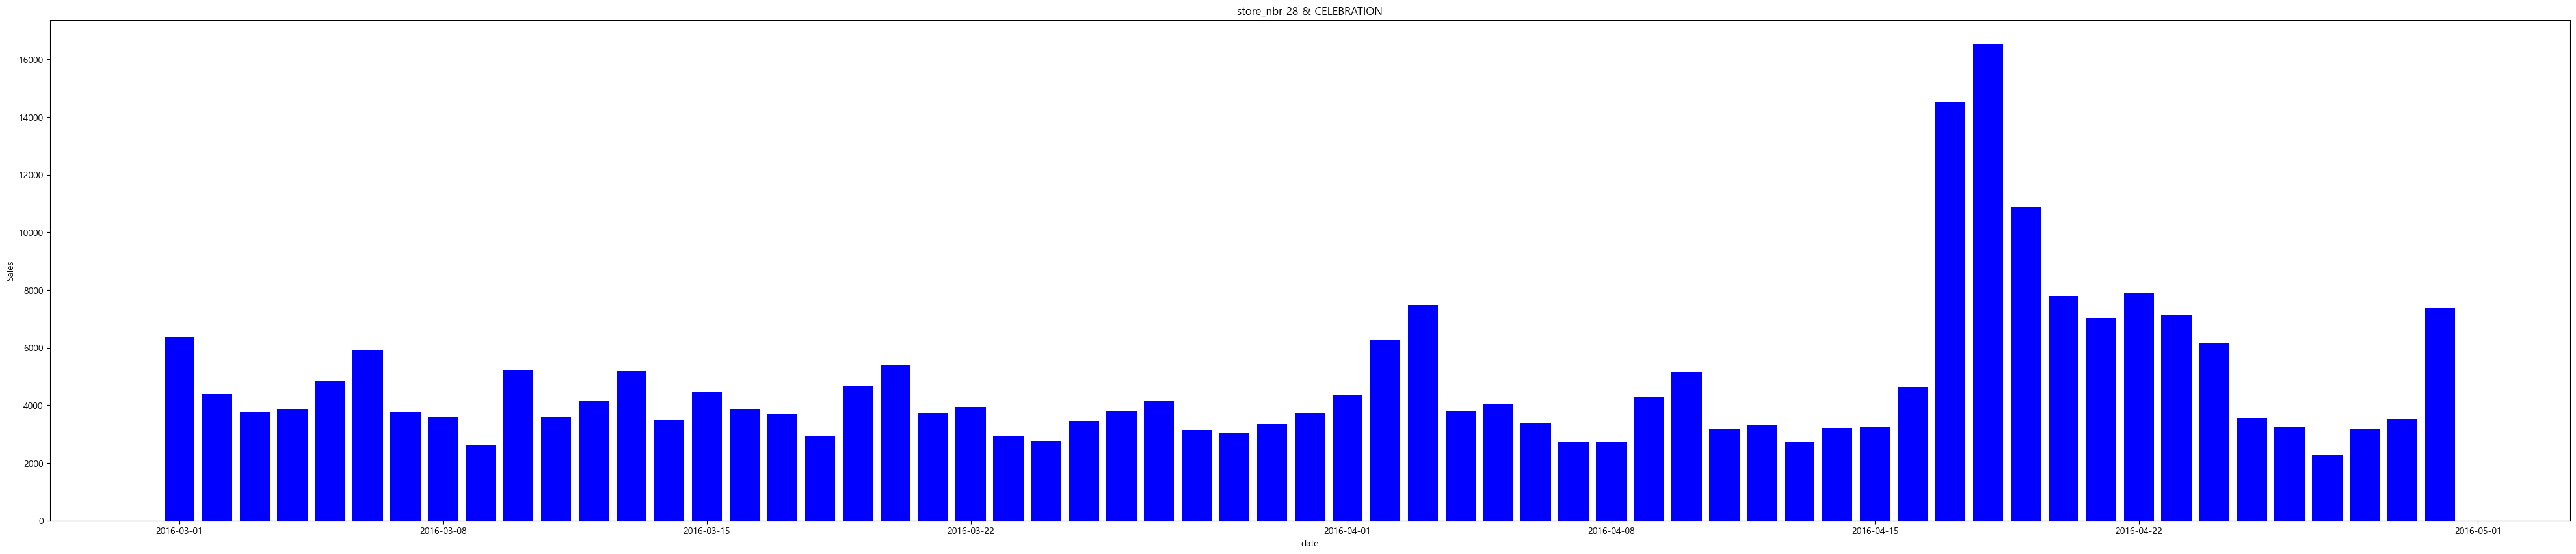

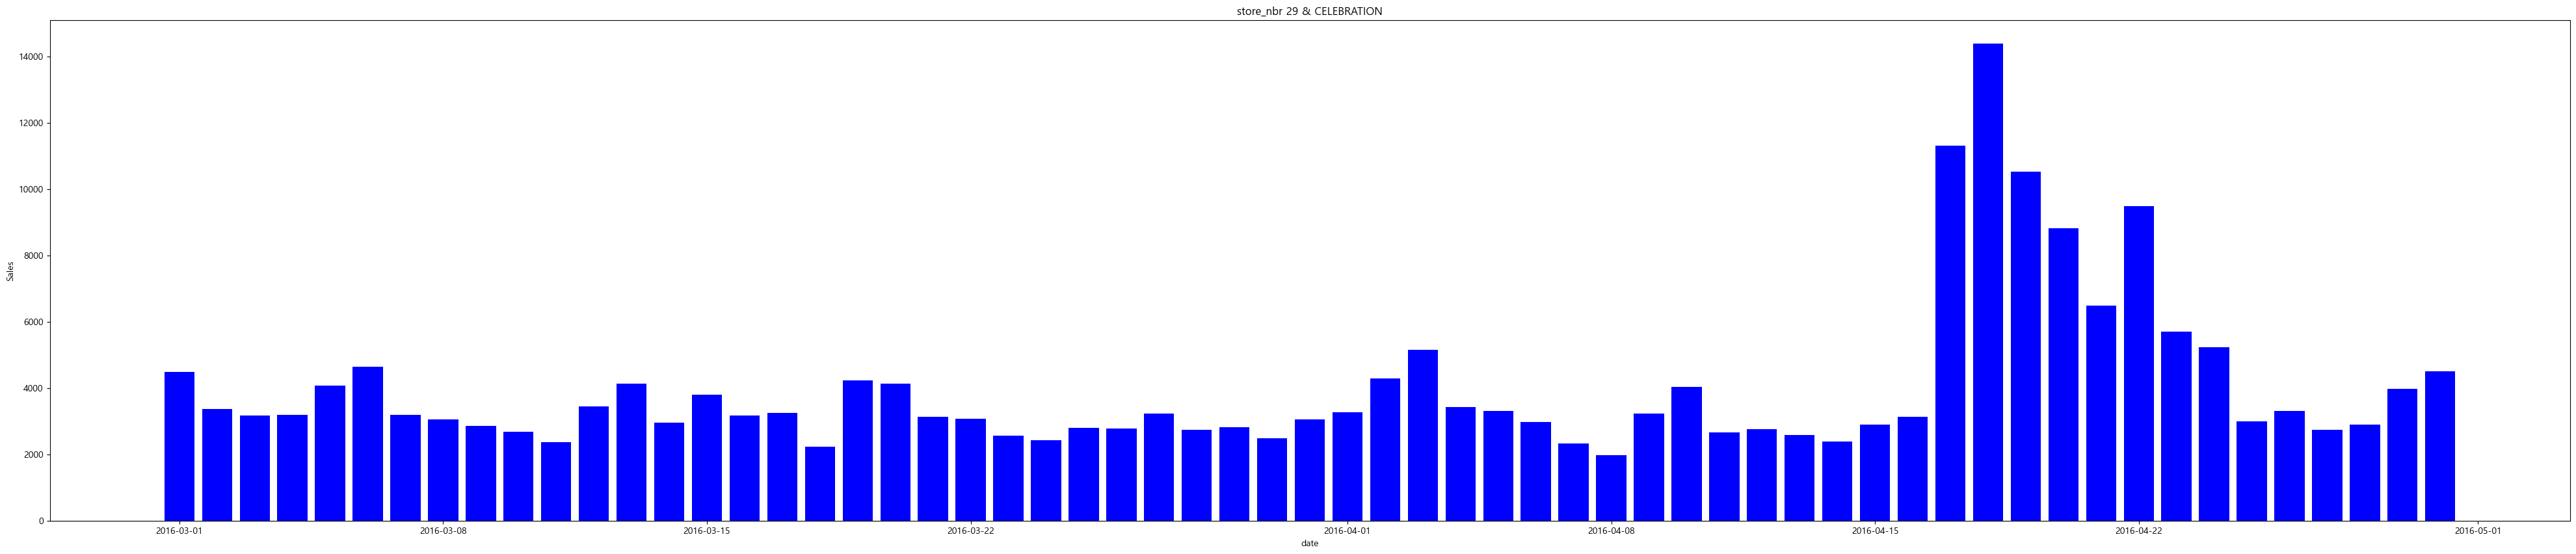

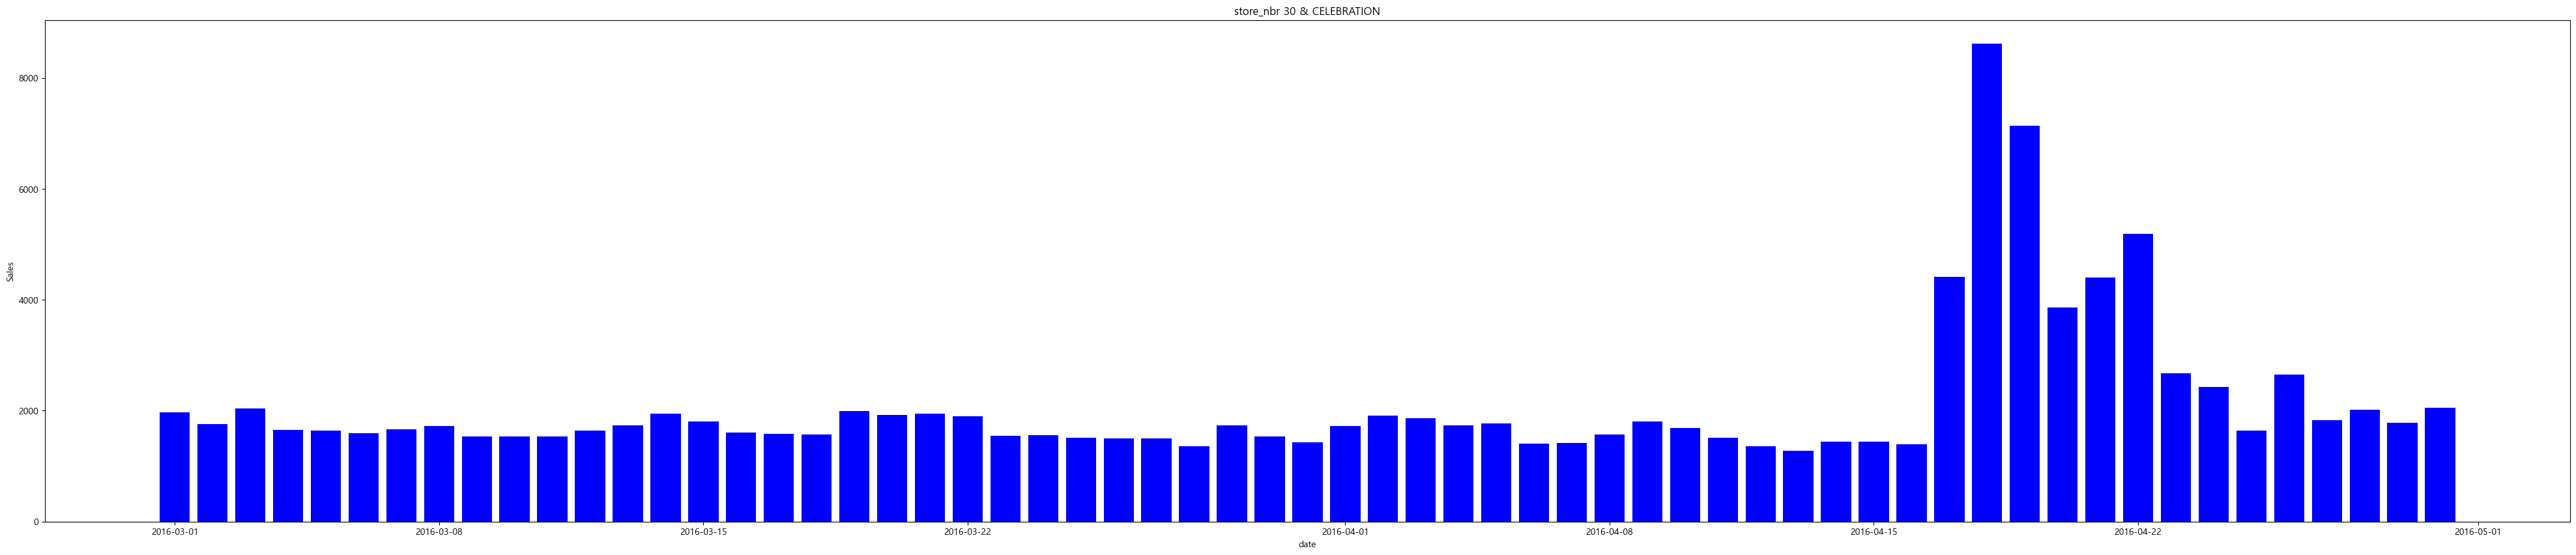

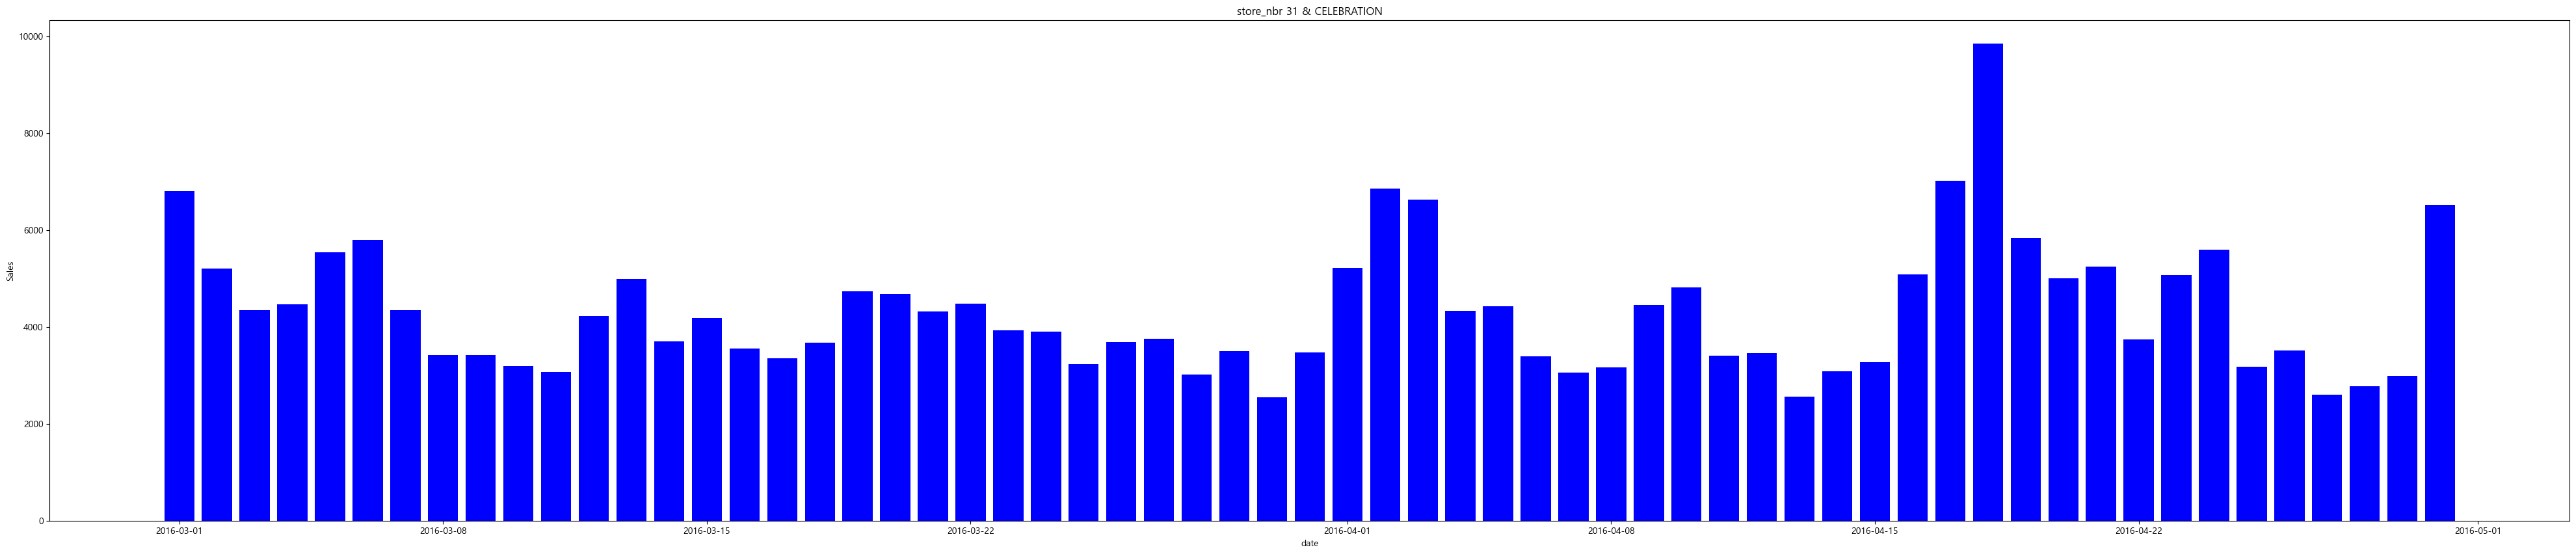

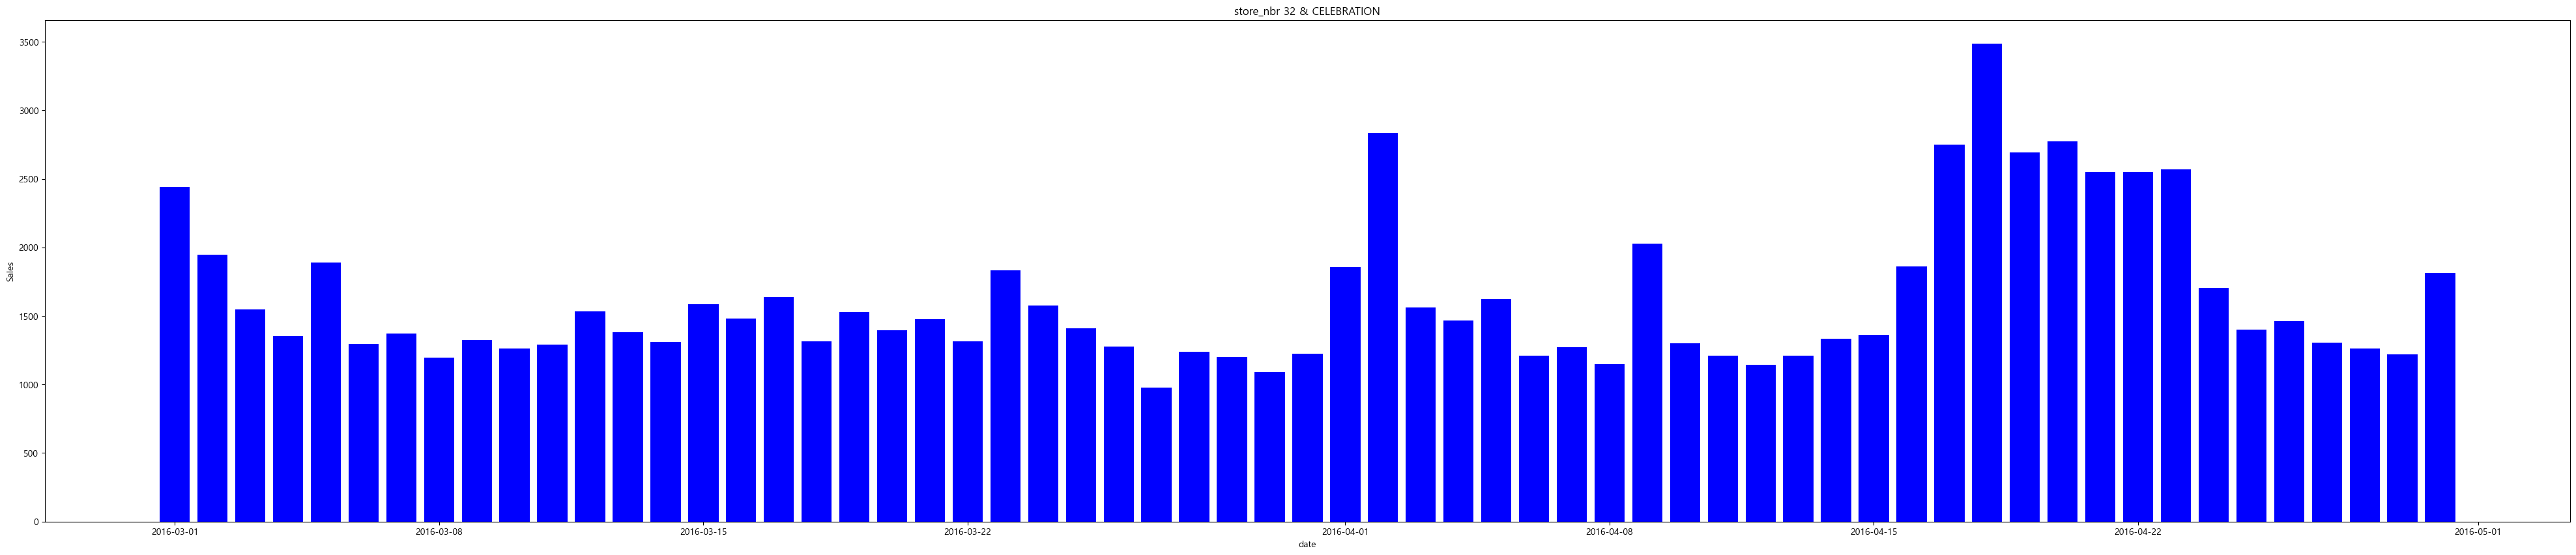

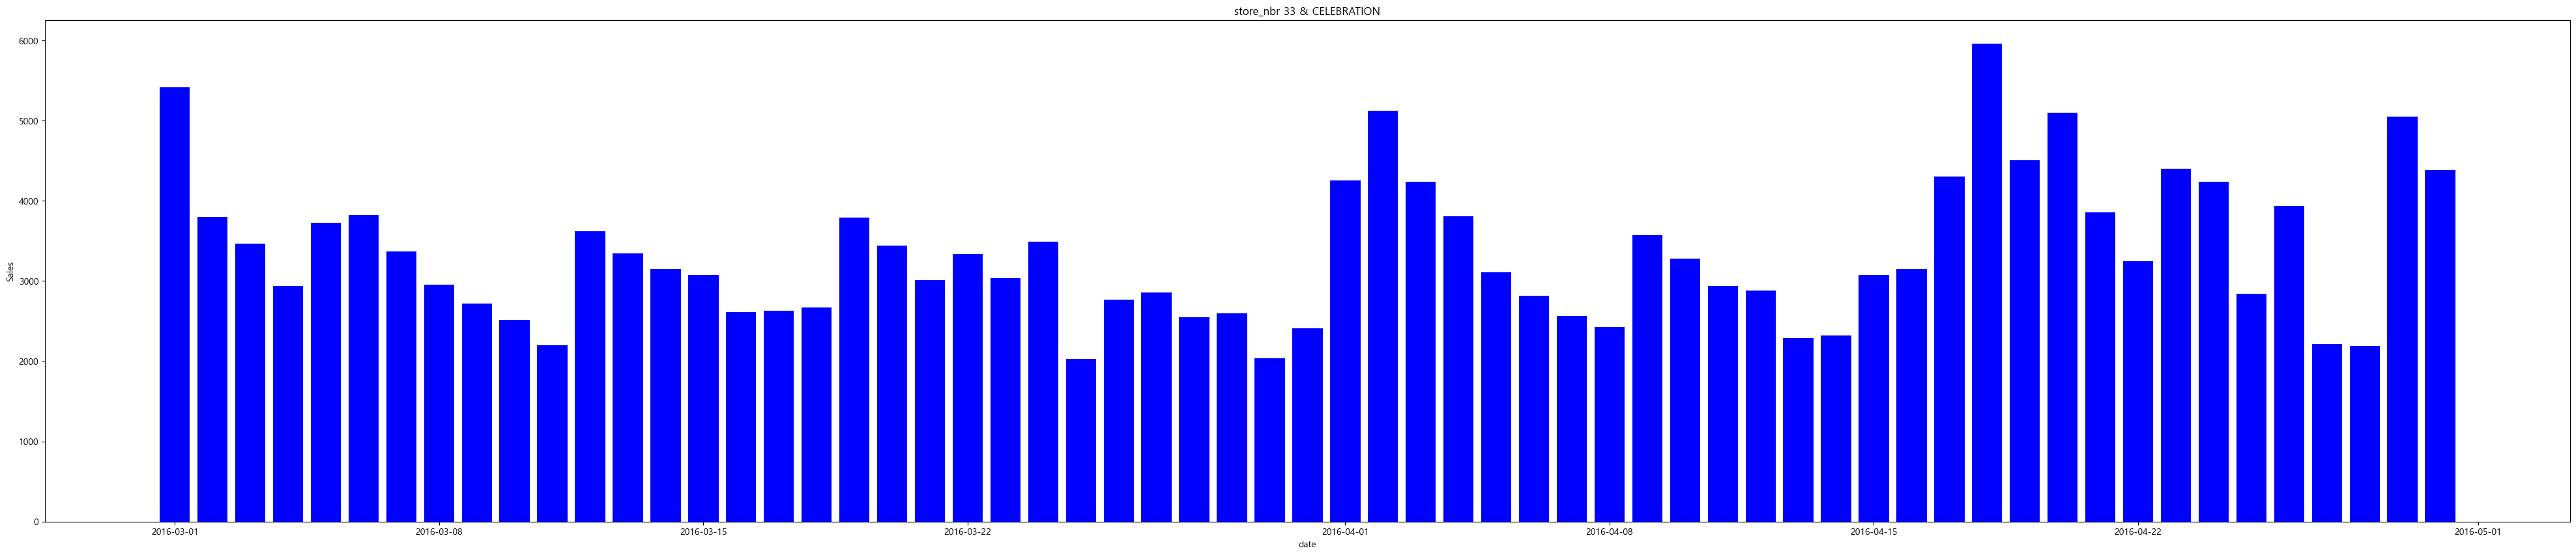

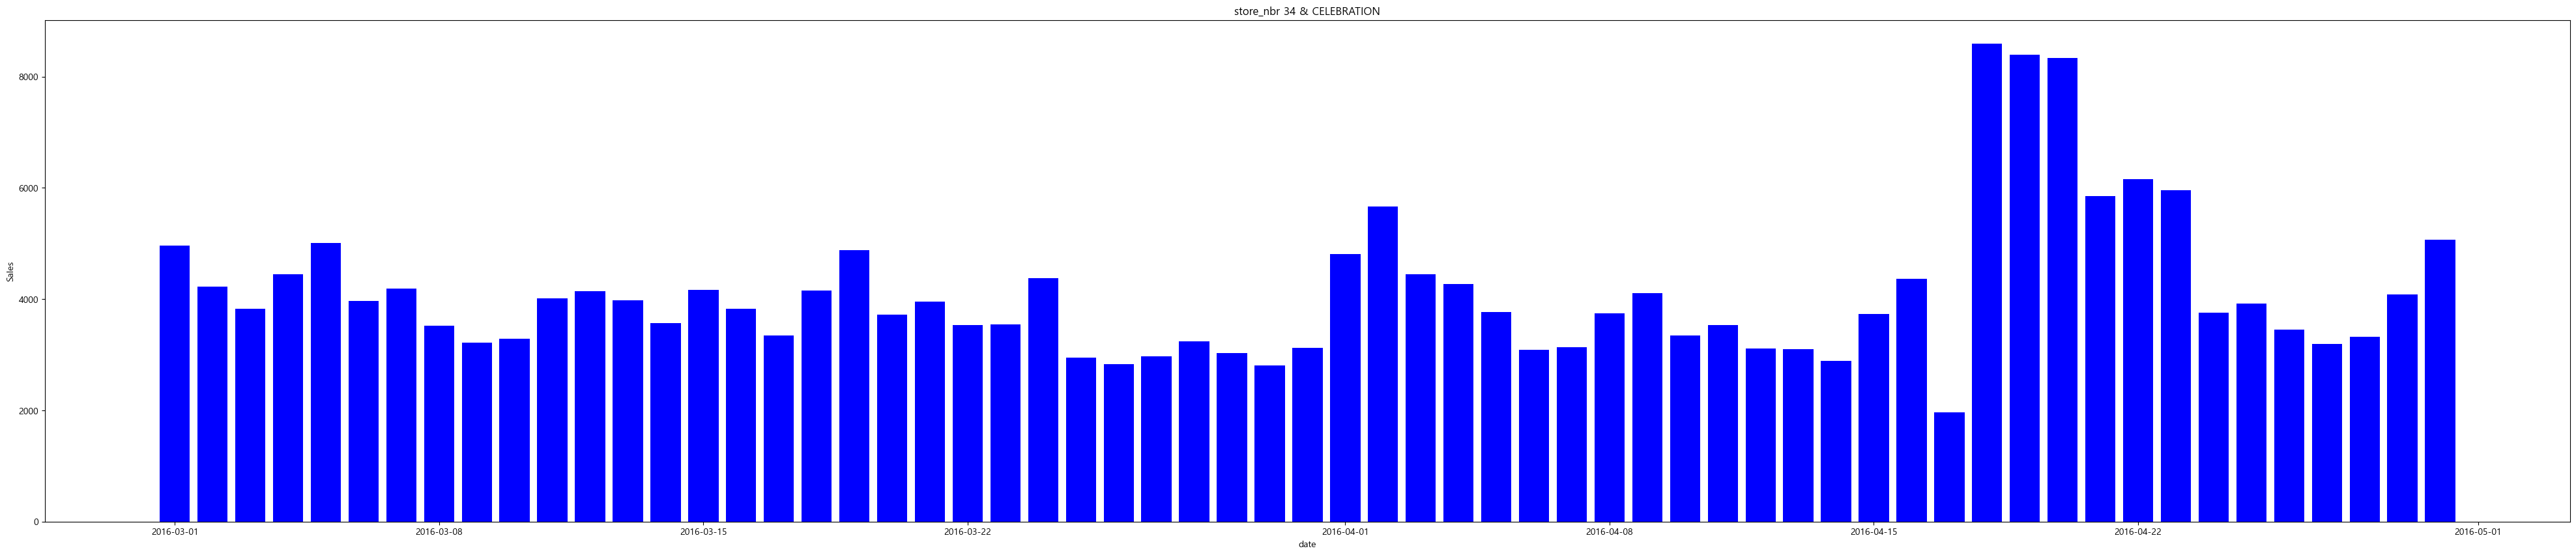

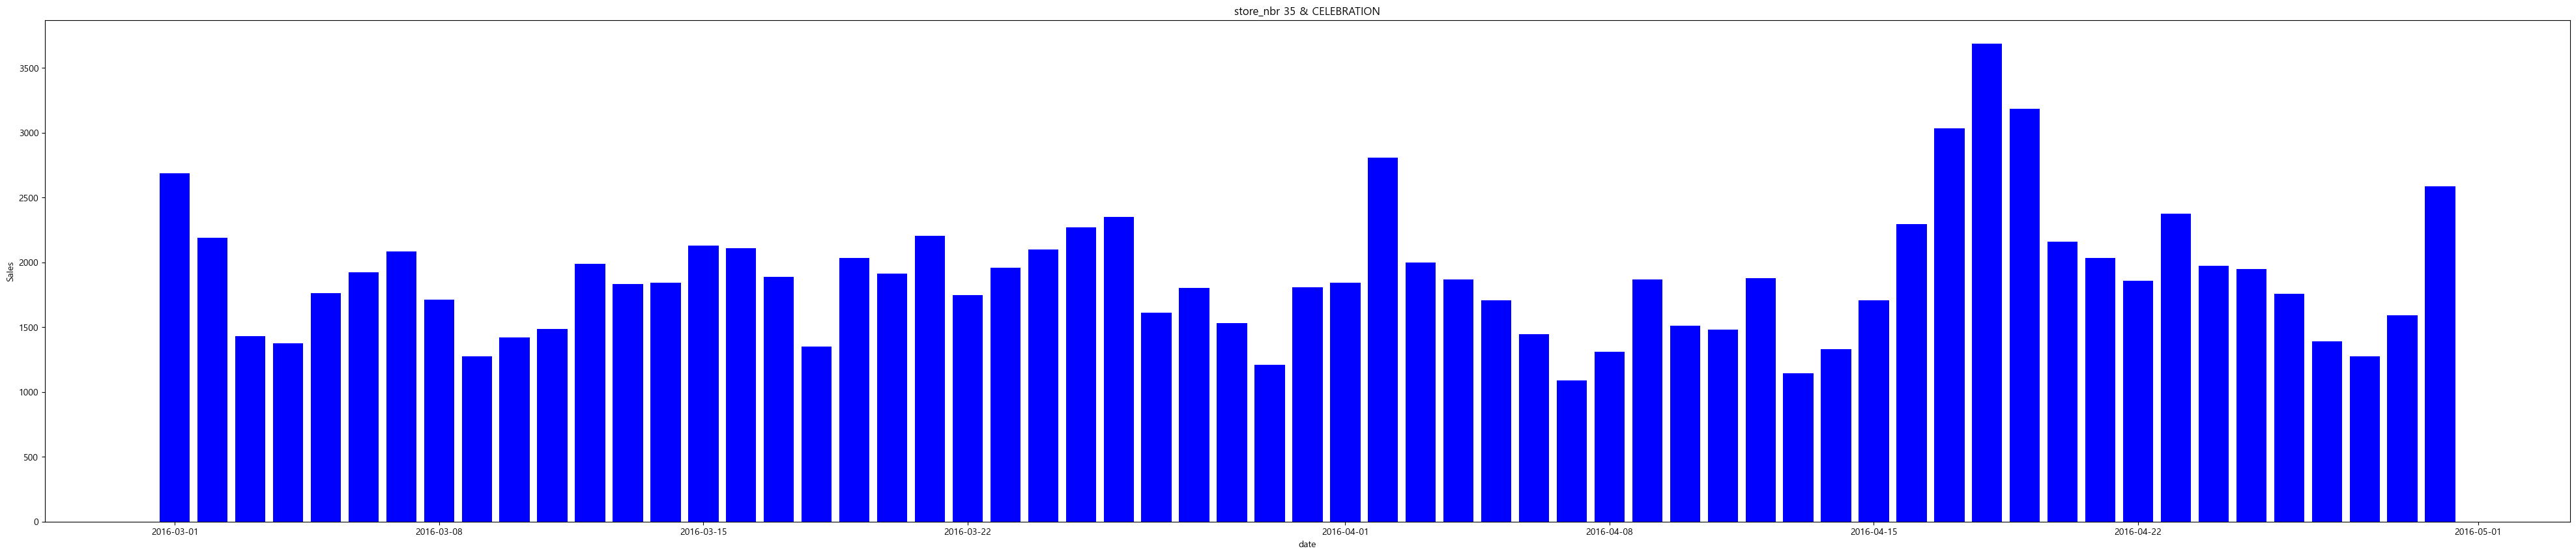

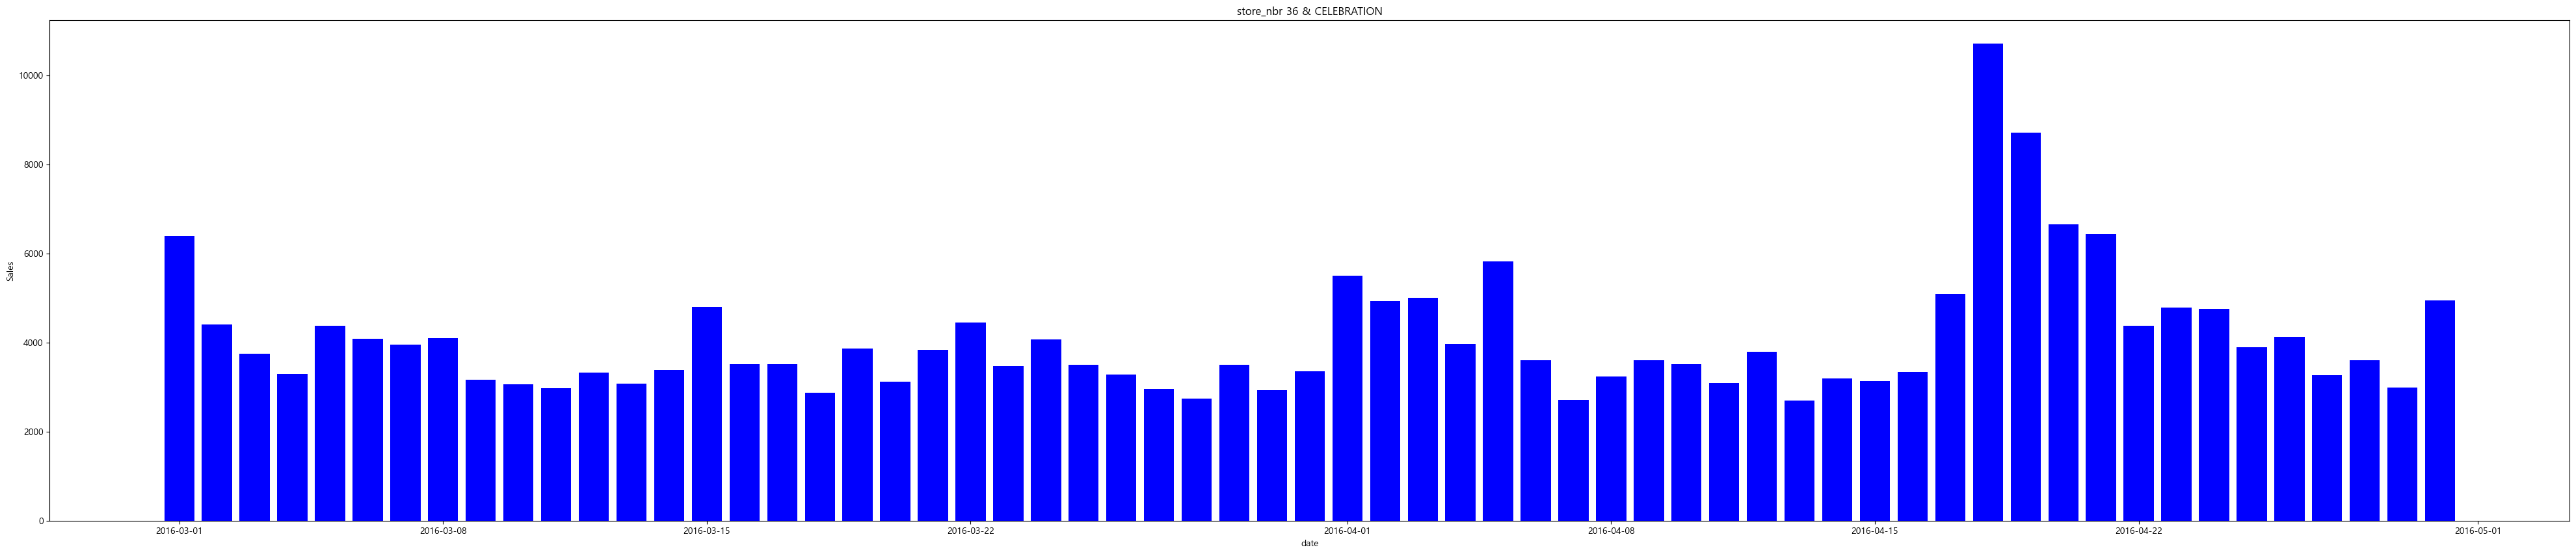

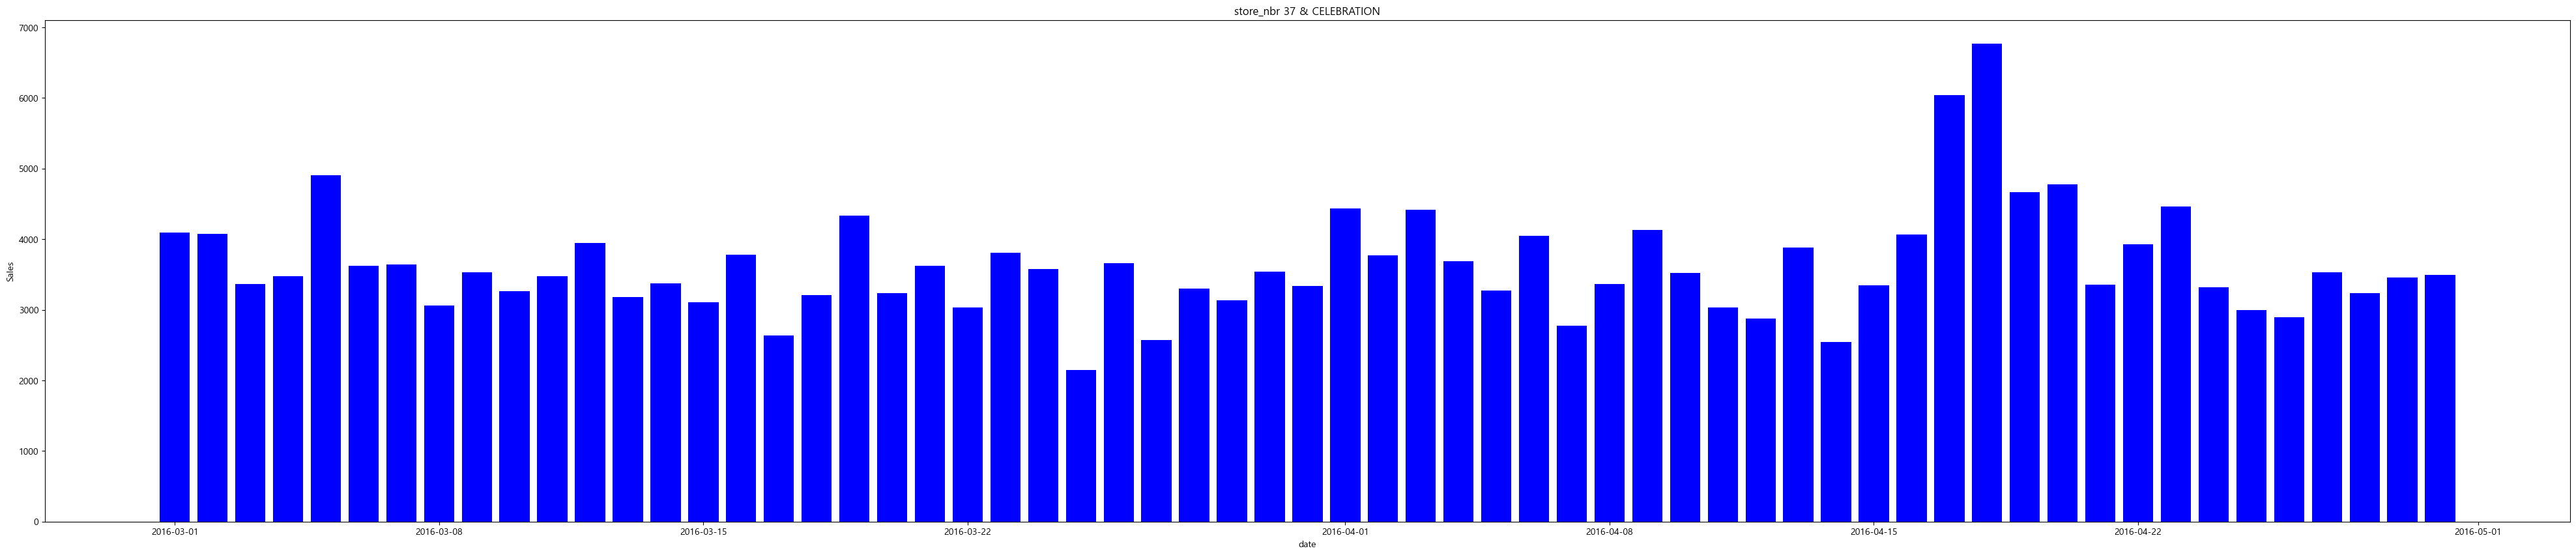

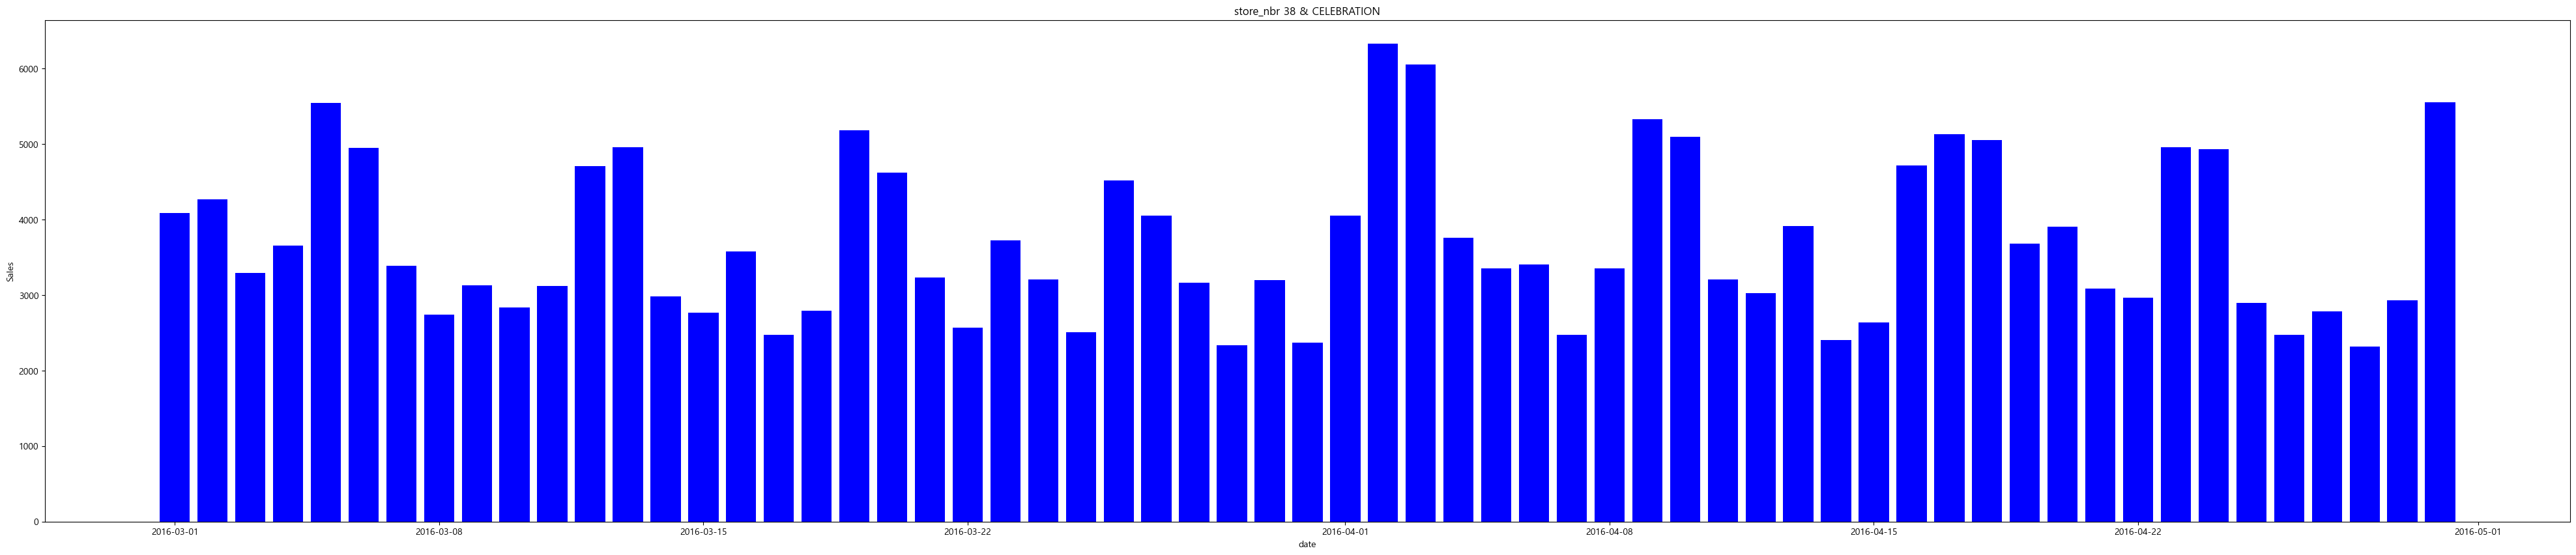

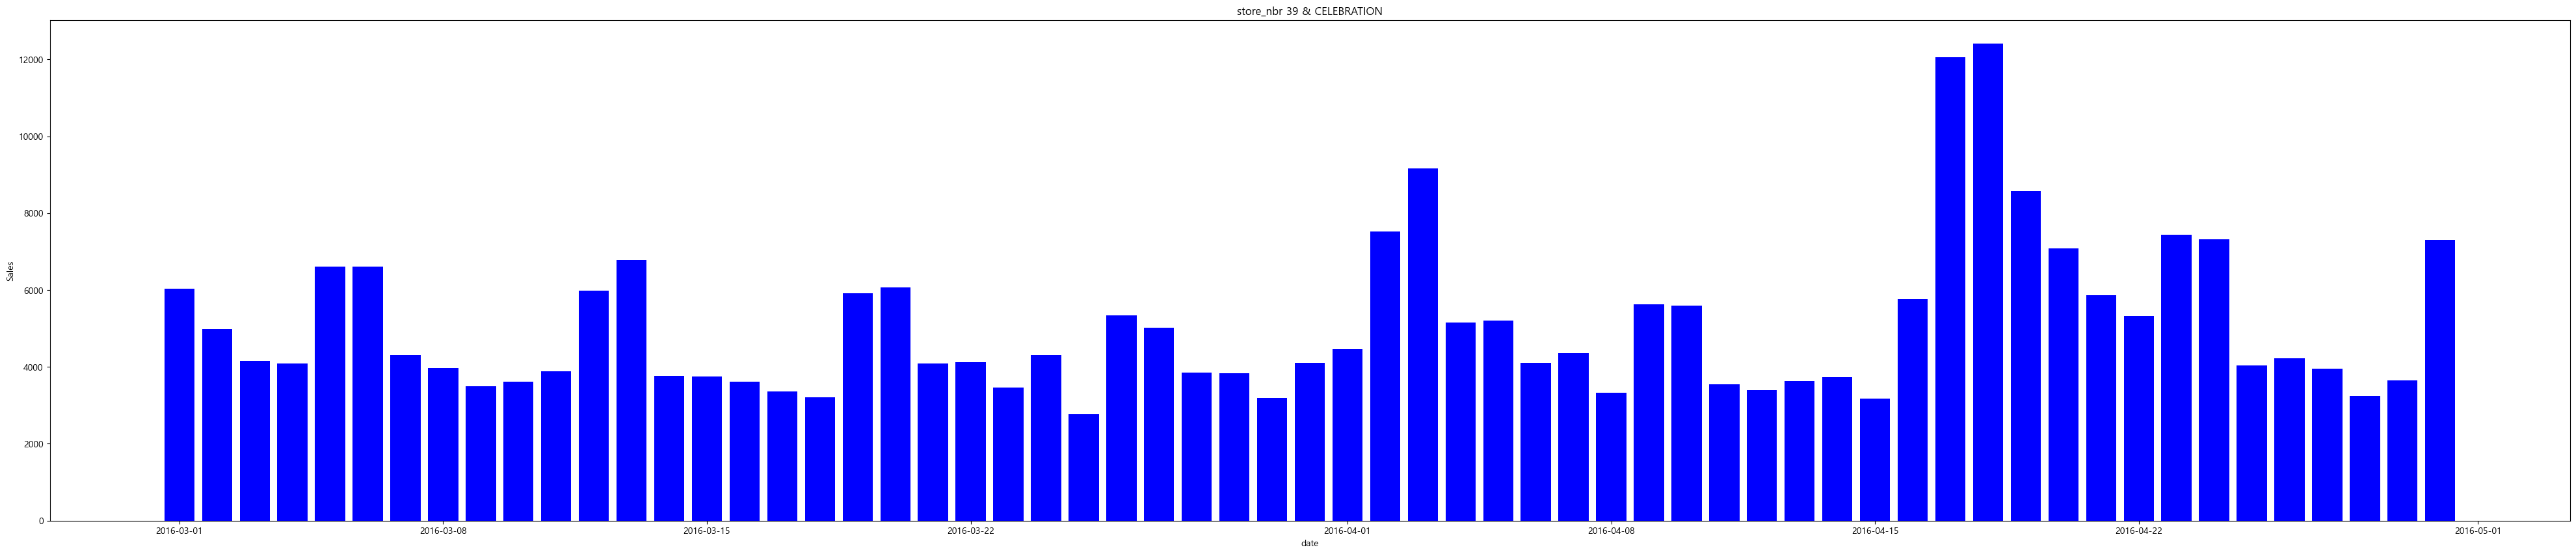

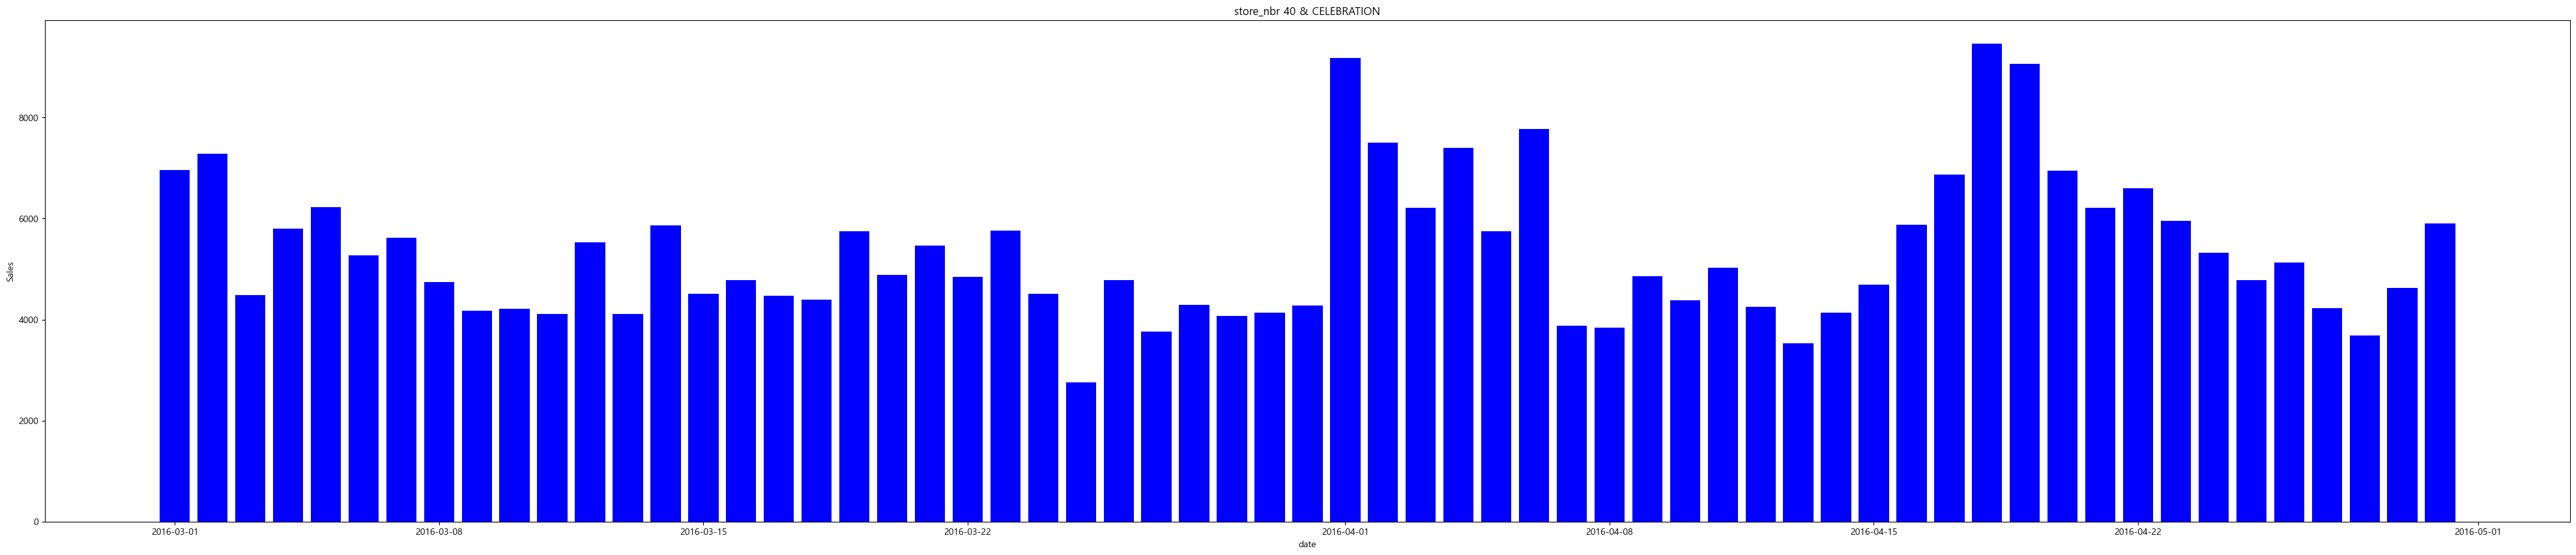

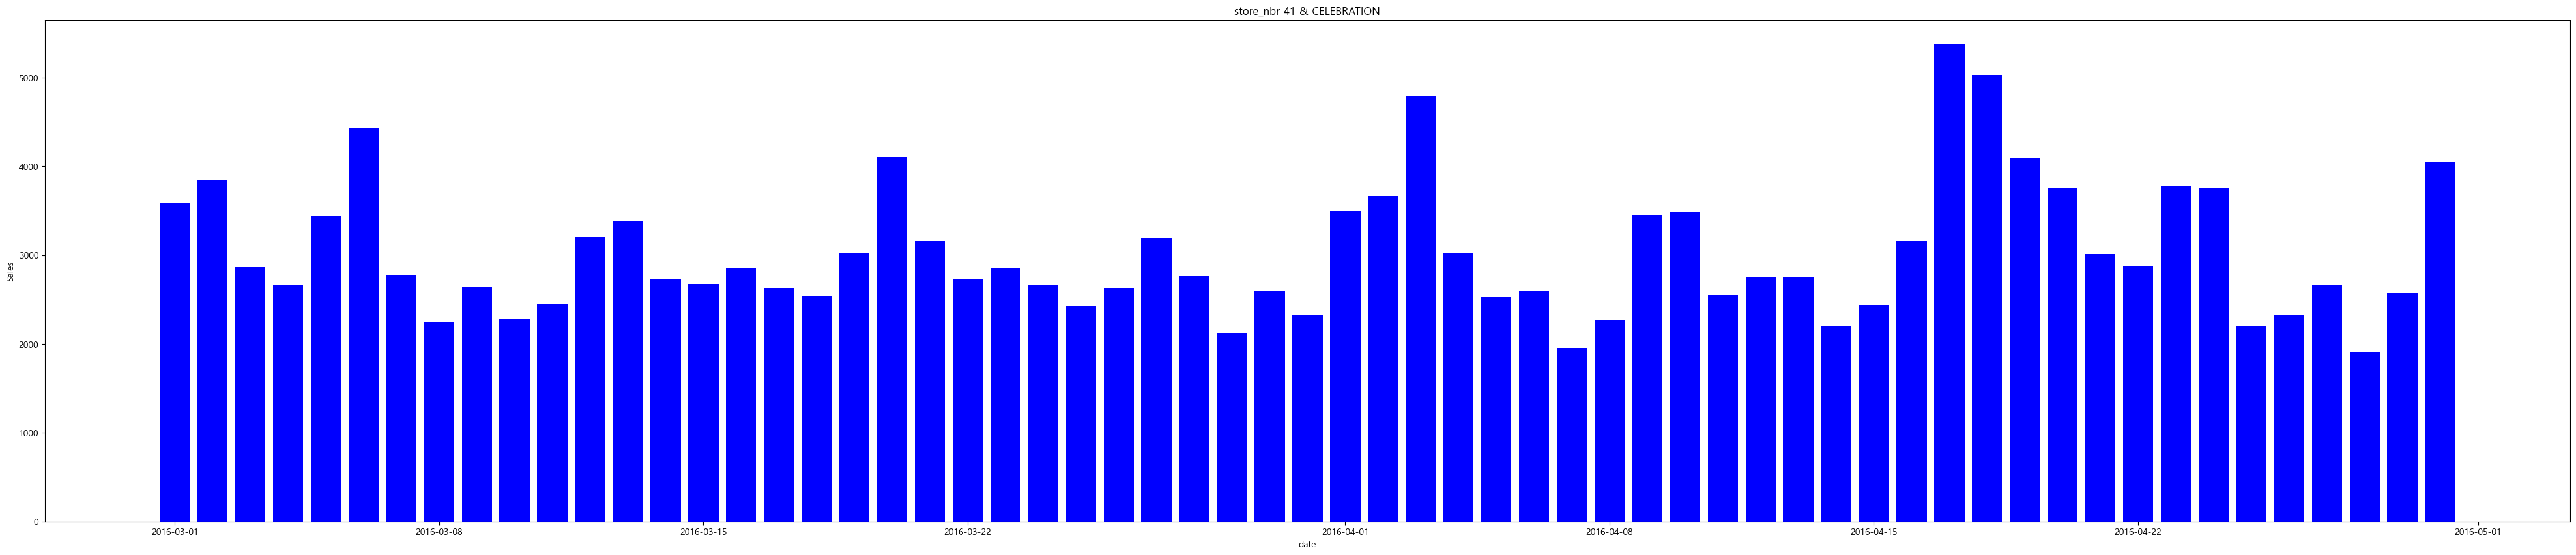

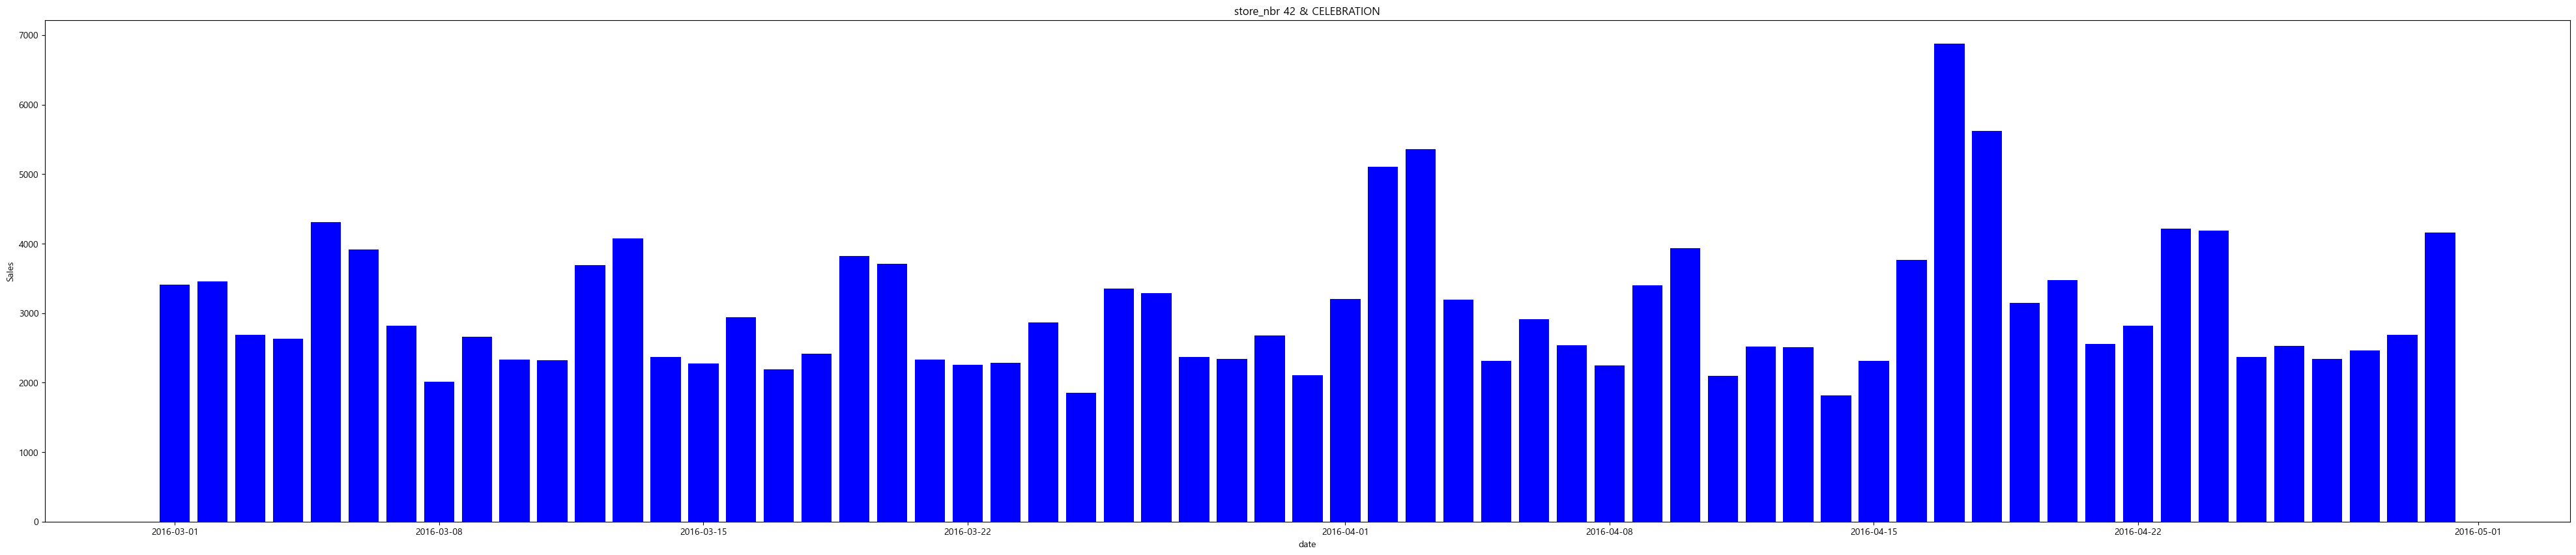

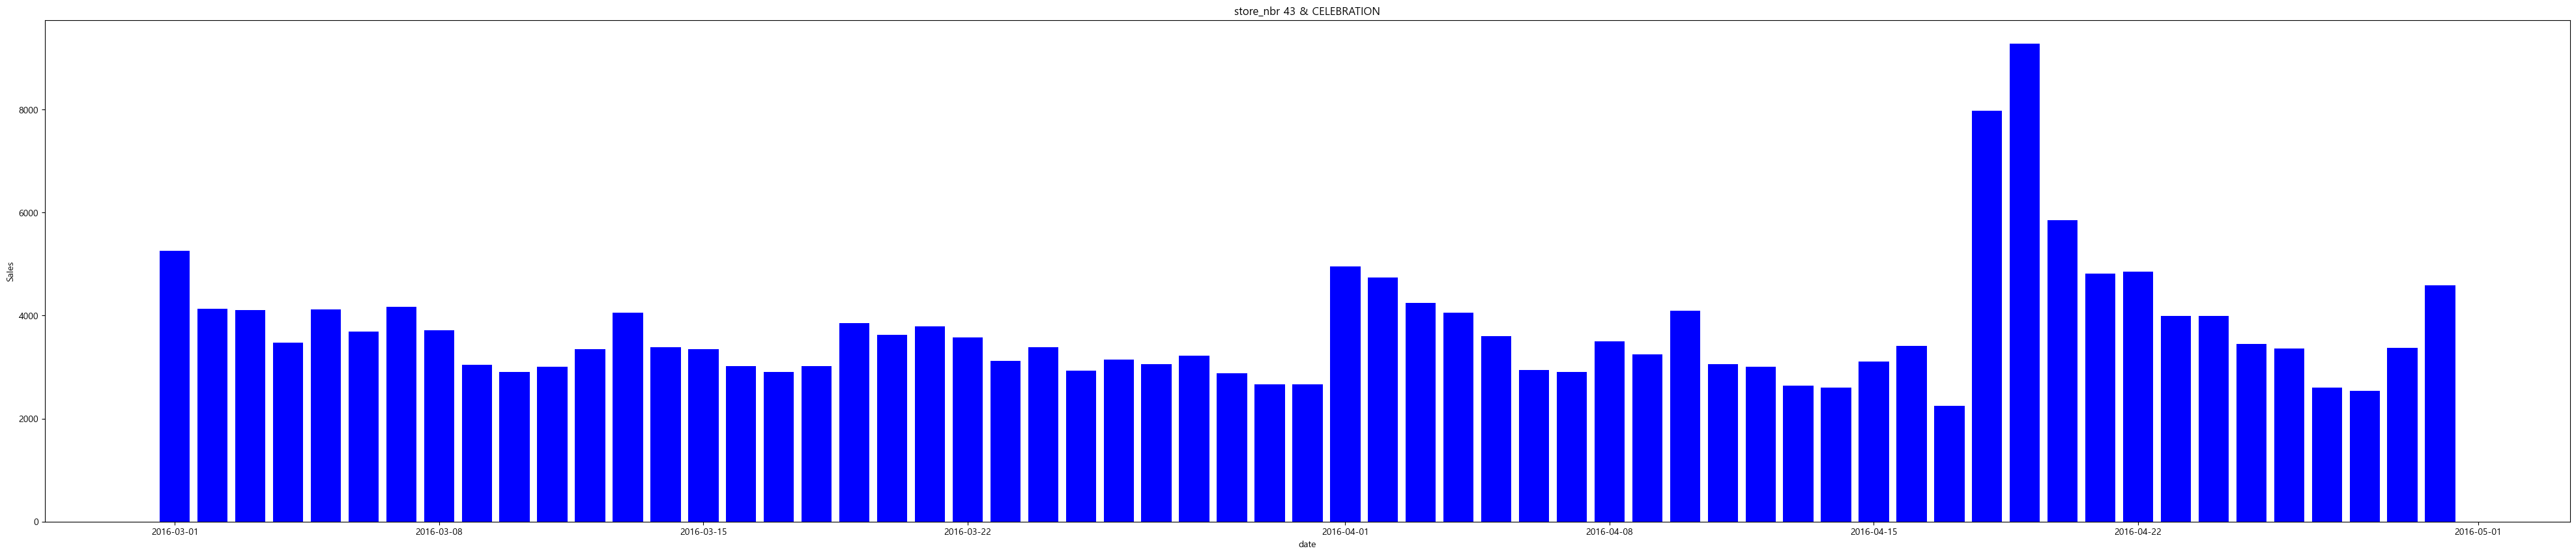

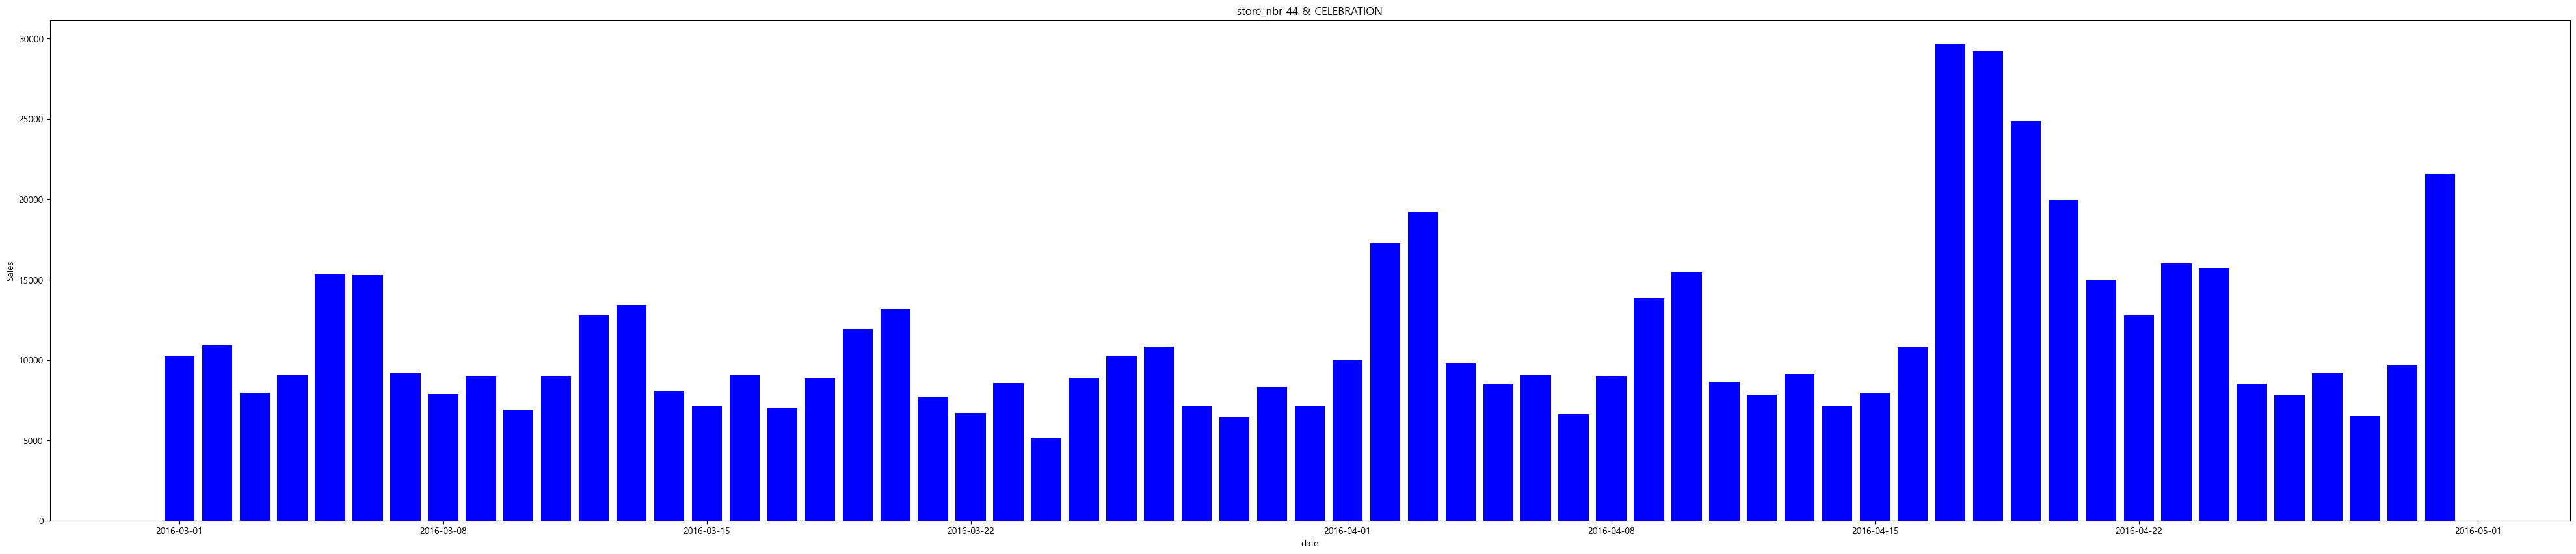

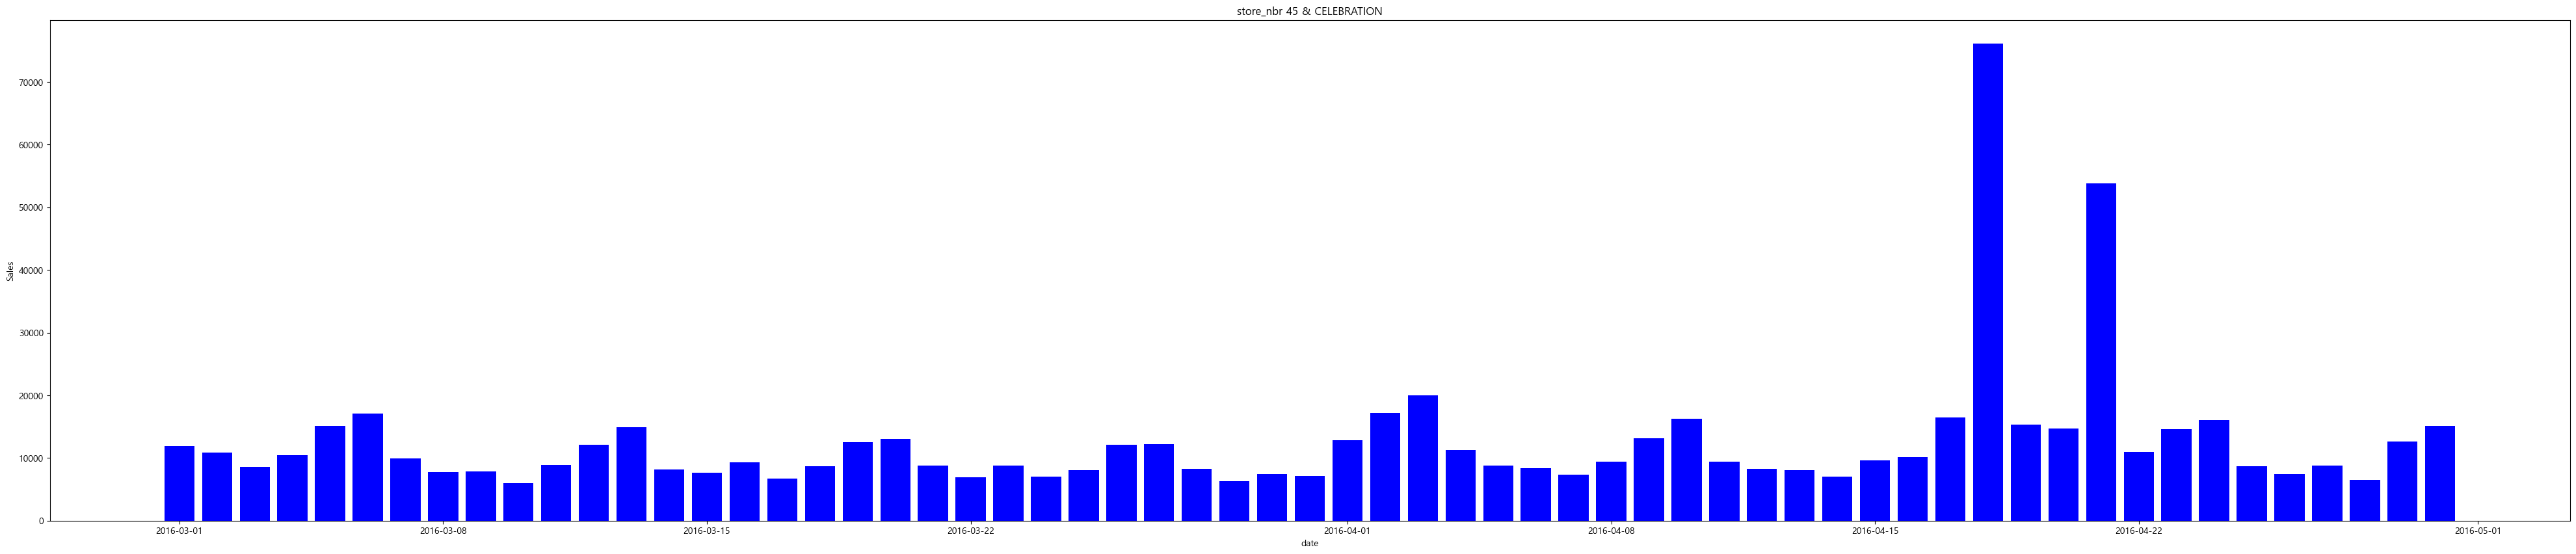

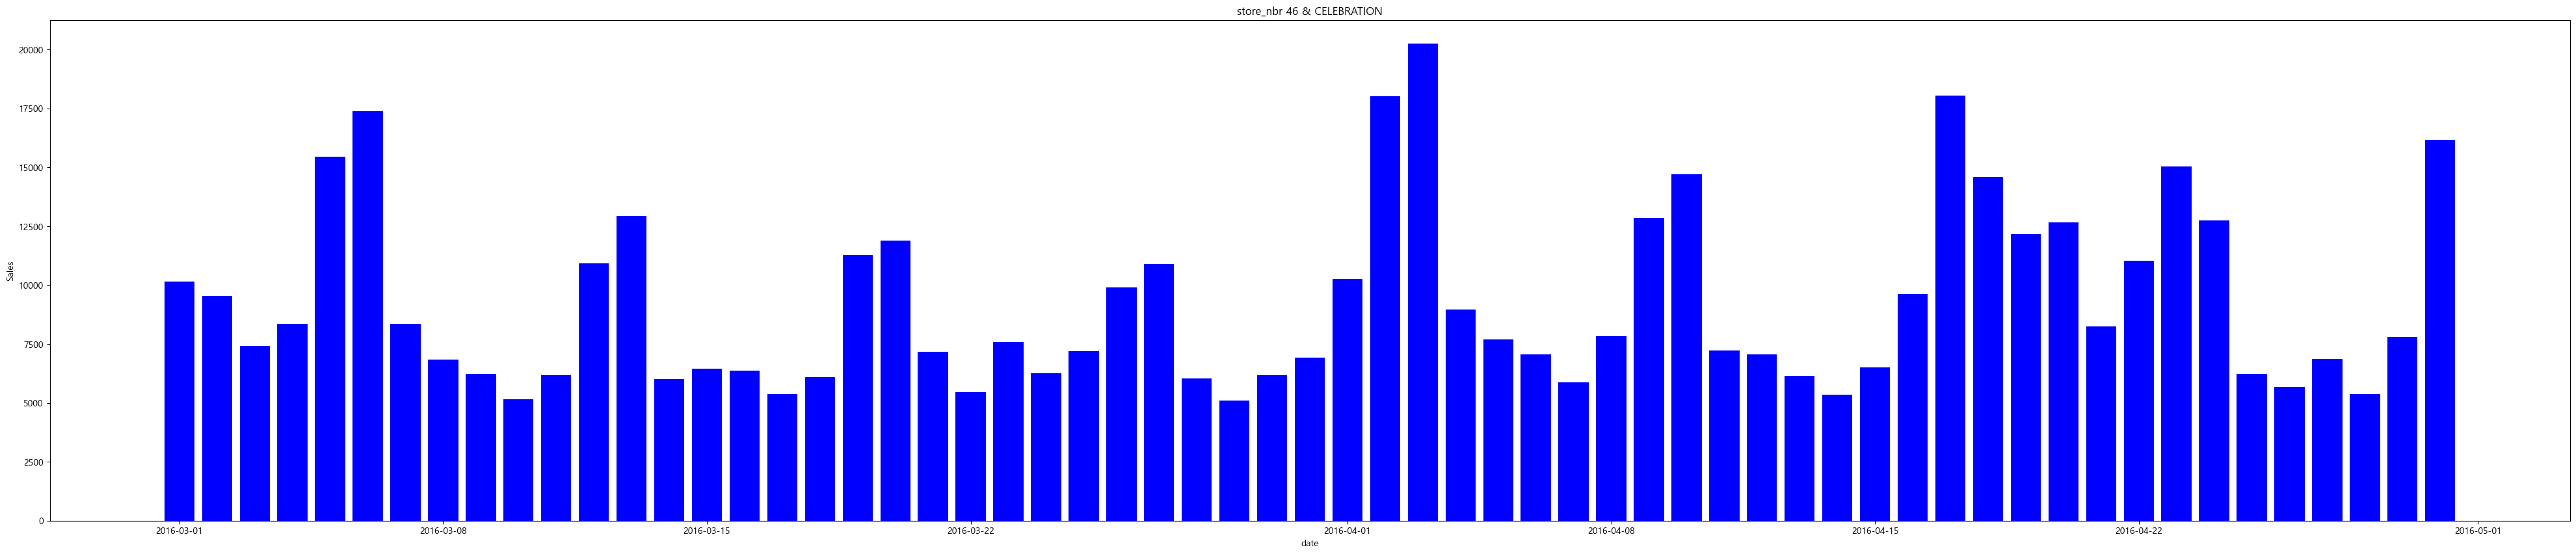

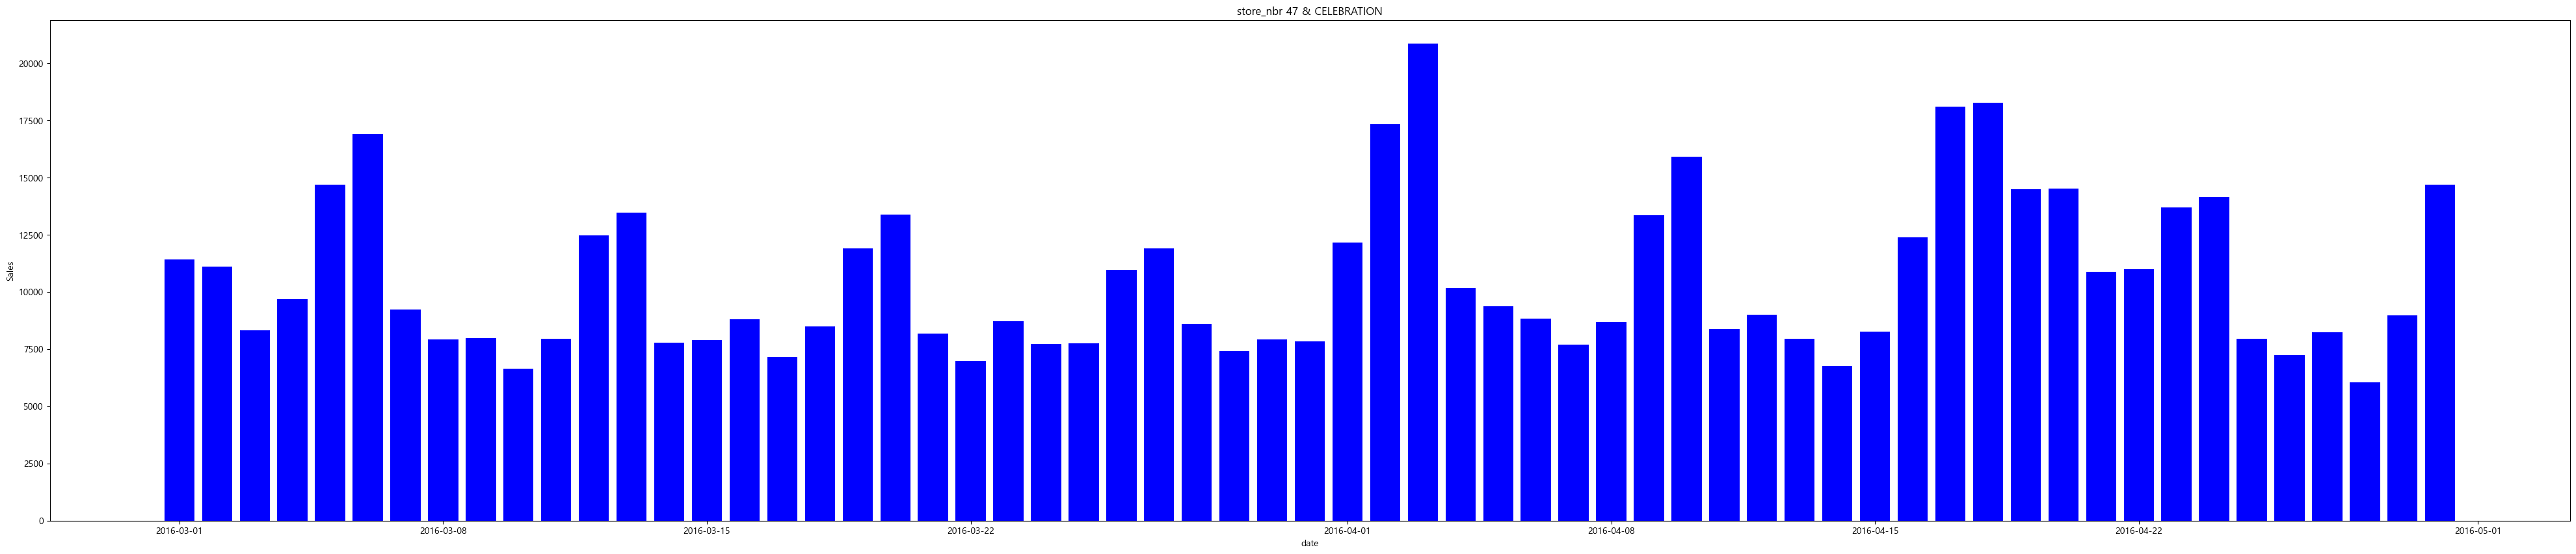

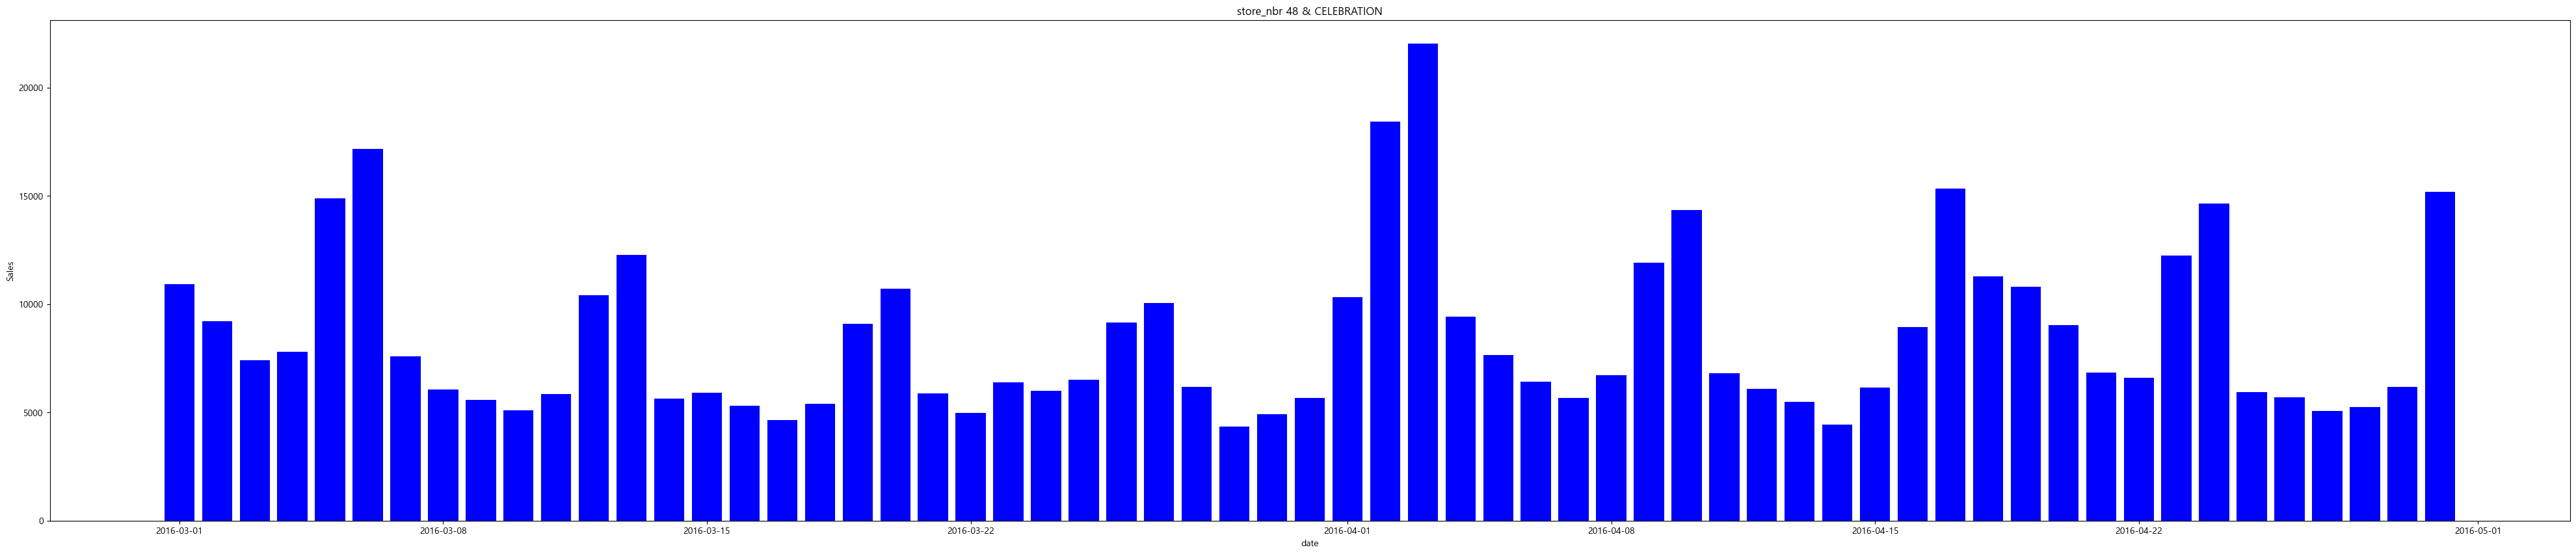

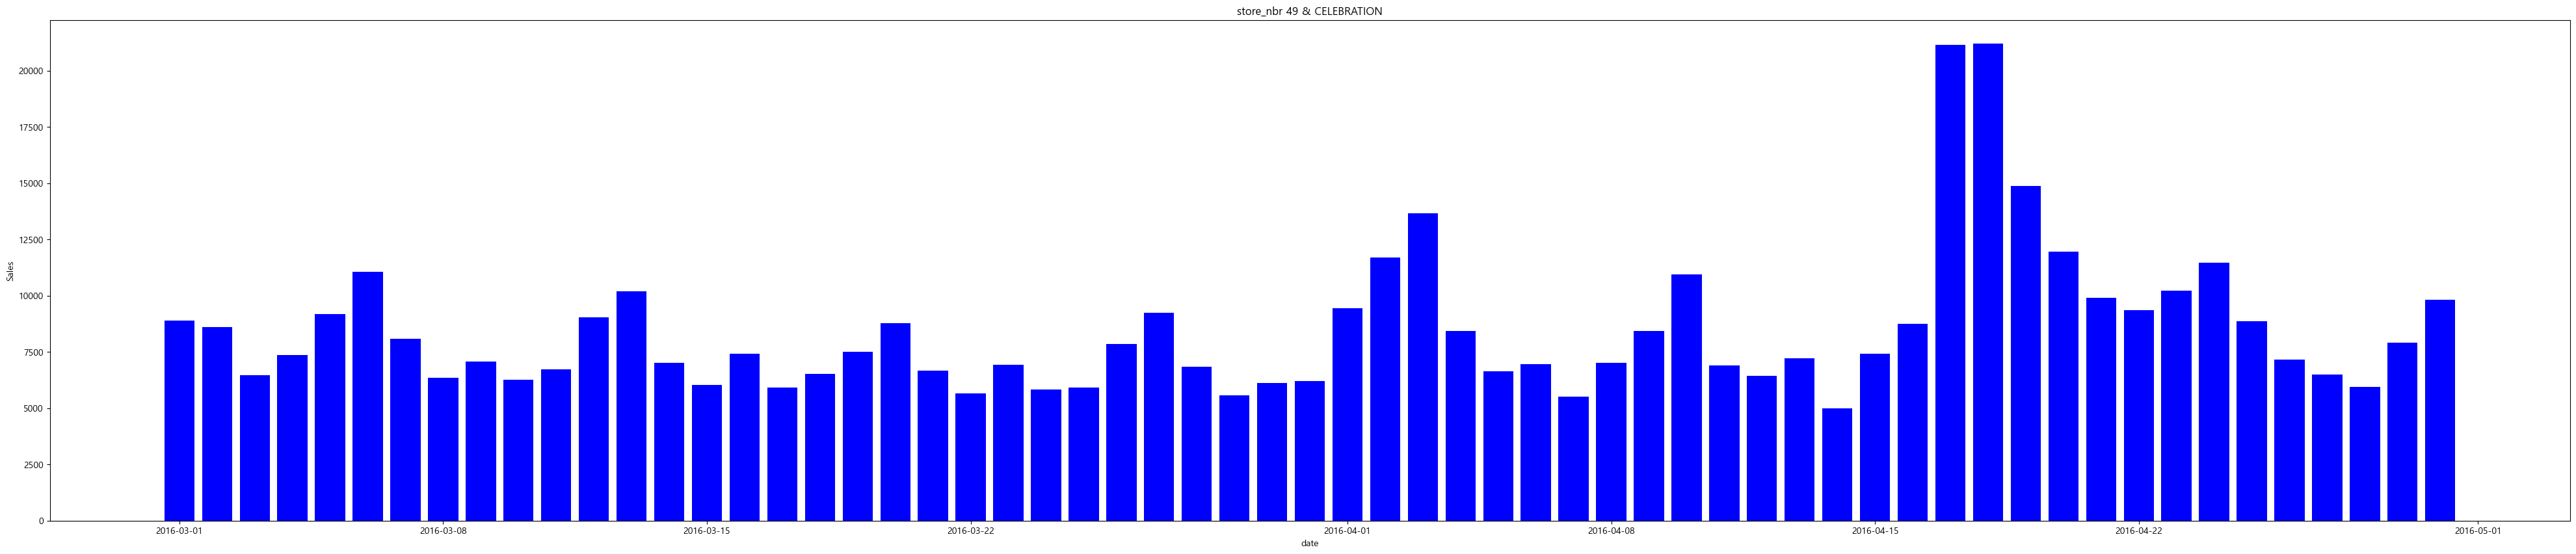

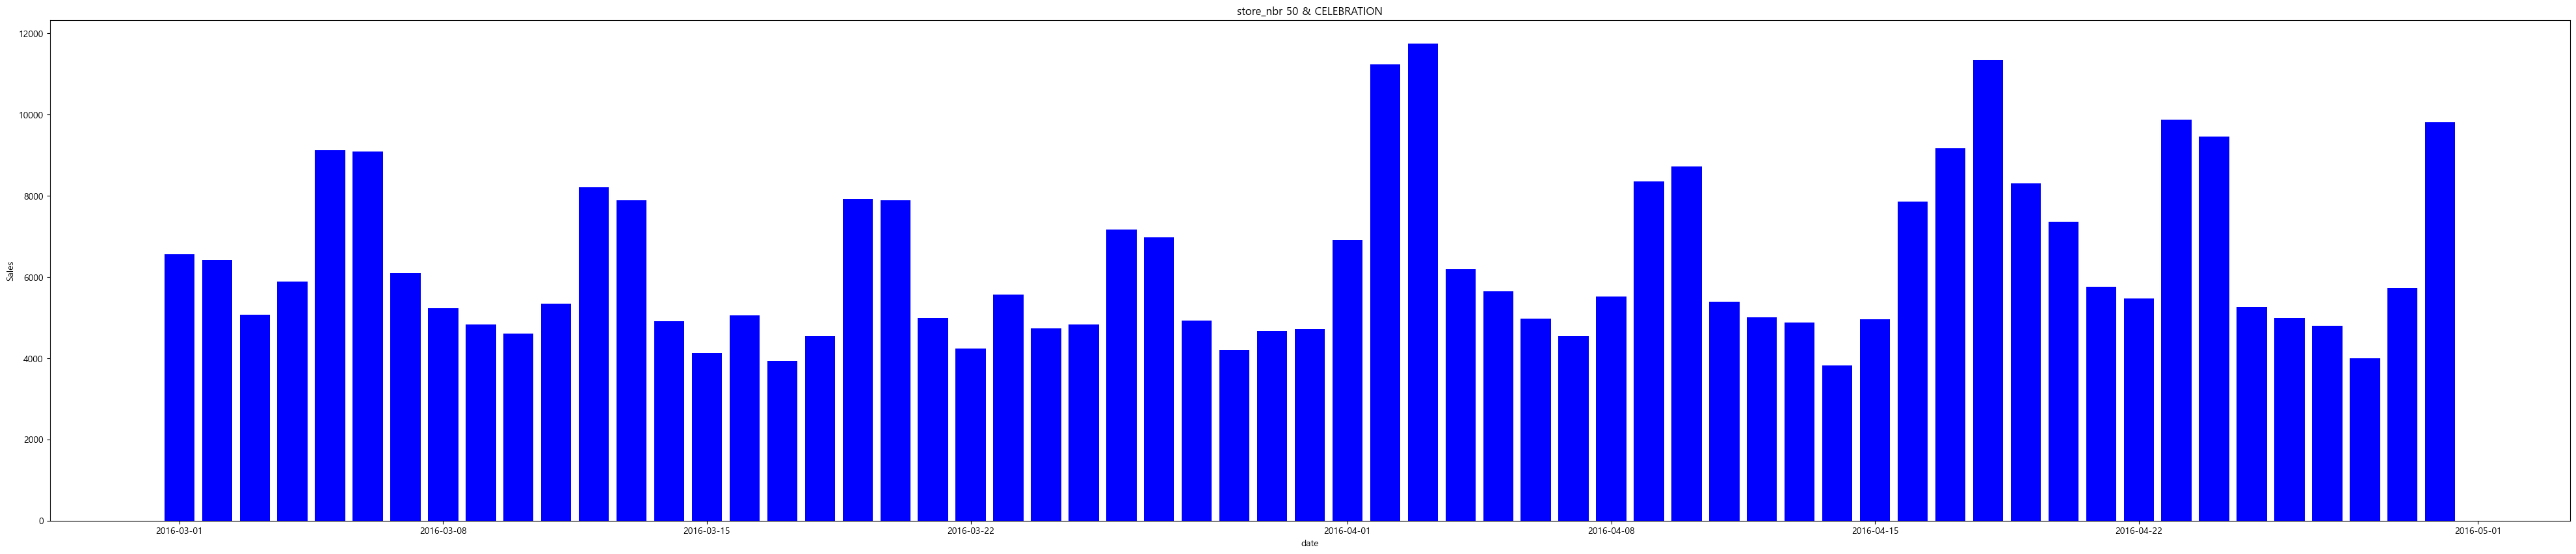

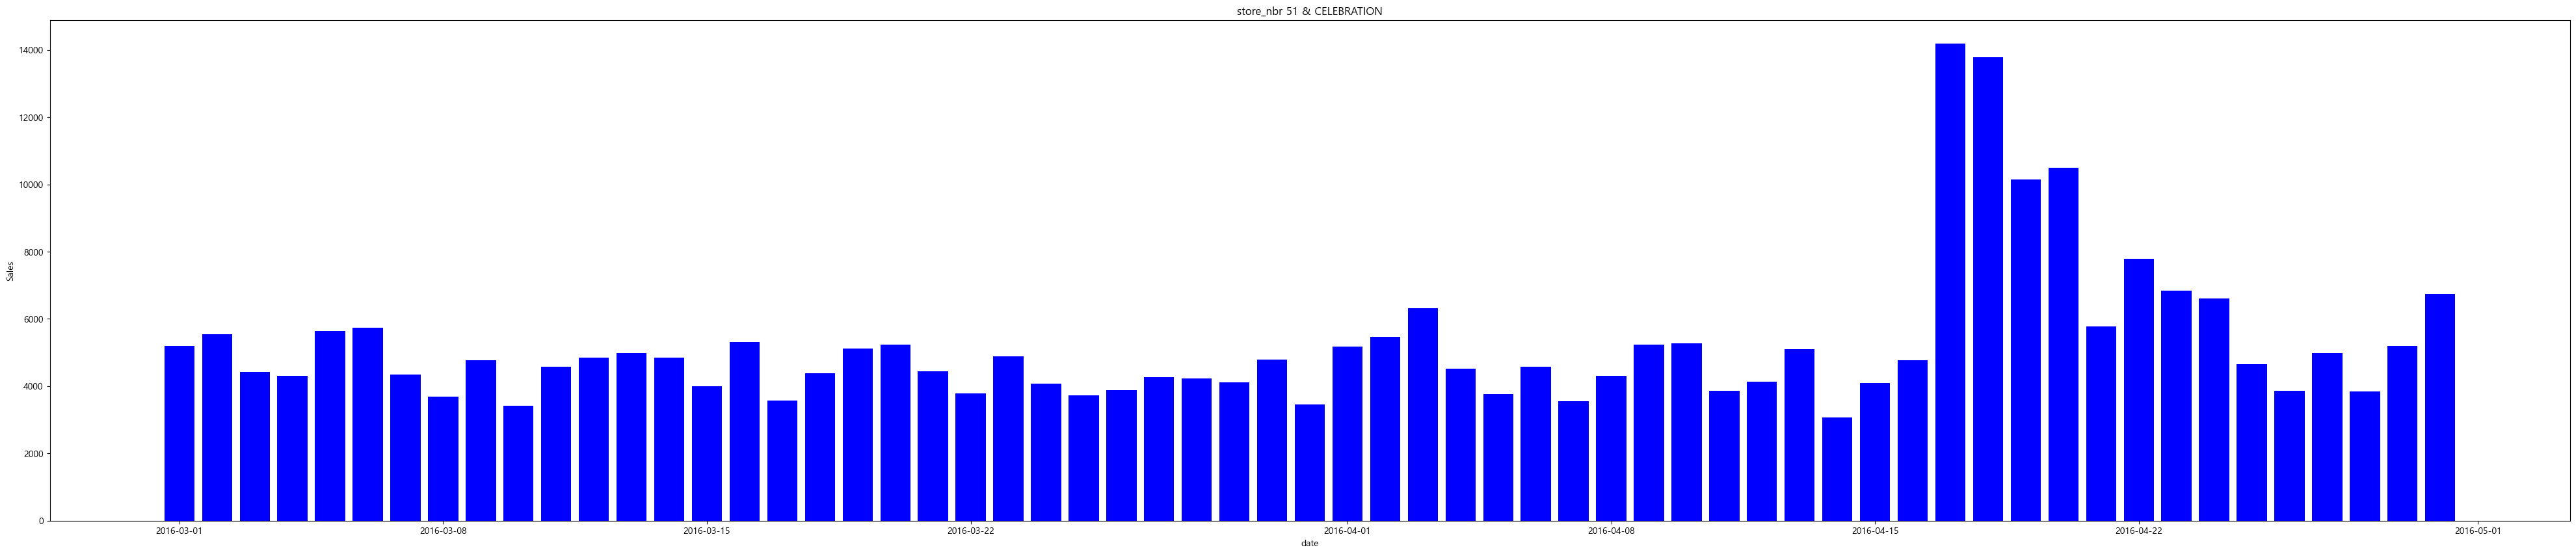

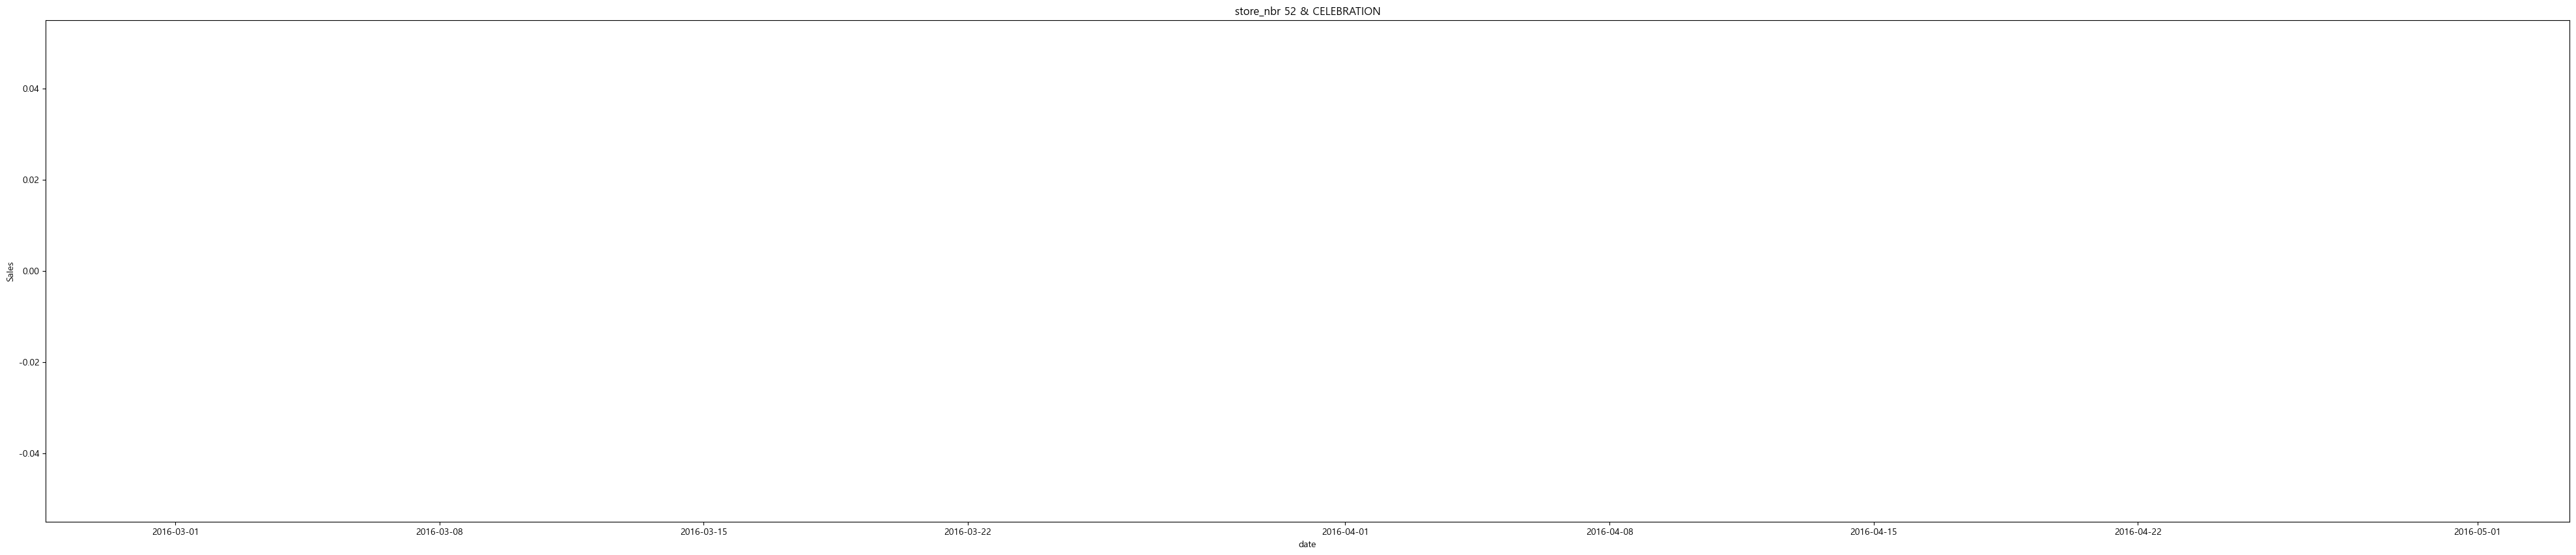

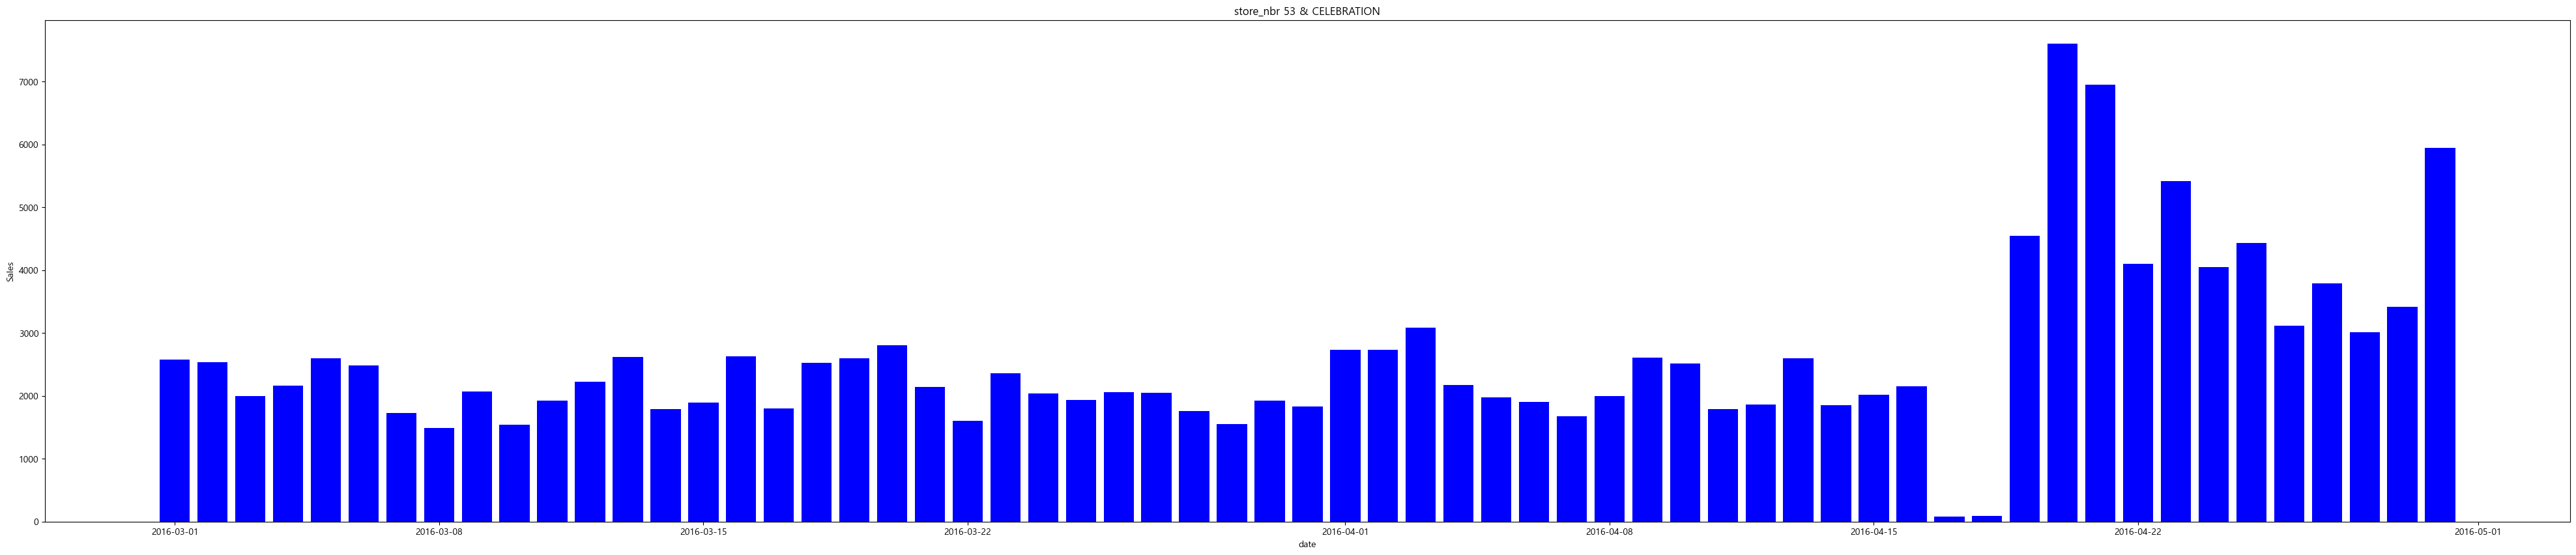

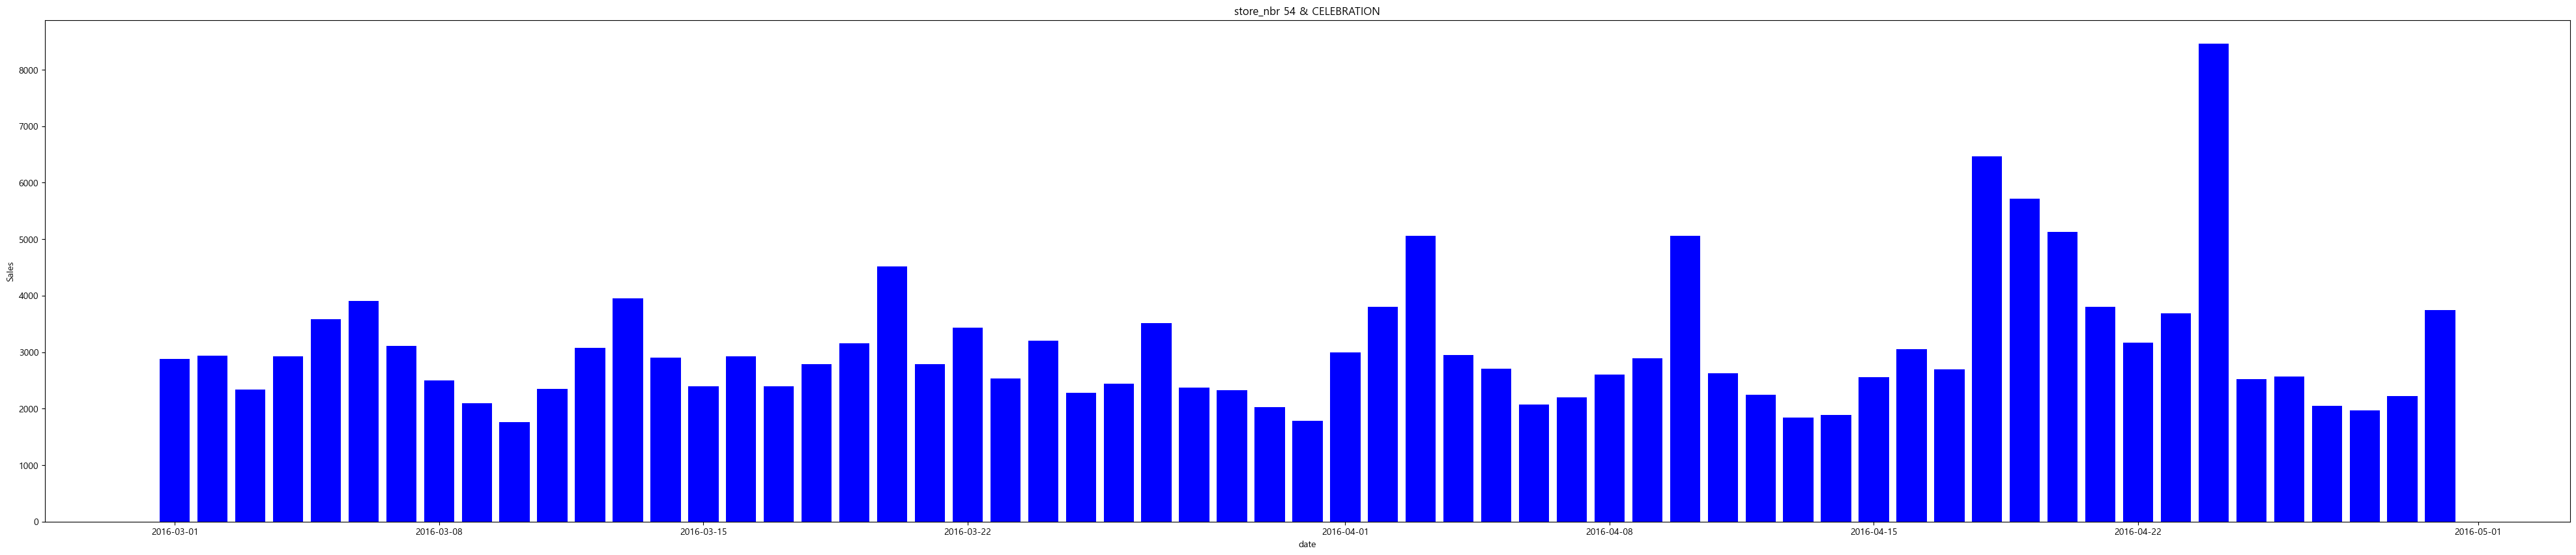

In [176]:
for i in range(1,55):
    test = temp[(temp.family=='GROCERY I')&(temp['date'].dt.year==2016)&(temp['date'].dt.month.isin([3,4]))]
    filtered_data = test[(test['store_nbr']==i)]
    
    # 데이터 시각화
    plt.figure(figsize=(50, 10))
    plt.bar(filtered_data.date, filtered_data['sales'], color='blue')

    plt.xlabel('date')
    plt.ylabel('Sales')
    plt.title(f'store_nbr {i} & CELEBRATION')
    plt.show()

## 지진 여파 탐색

In [ ]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None) 
temp[(temp.family=='GROCERY I')&(temp['date'].dt.year==2016)&(temp['date'].dt.month==4)&(temp['date'].dt.day>=15)&(temp['date'].dt.day<=24)]

In [40]:
# sales/transaction 가 지나치게 높아진 경우 사람들이 사재기 한 것임 
# # GROCERY I	을 지나치게 많이 산 날 
findnormal = temp[(temp.family=='GROCERY I')&(temp['date'].dt.year==2016)&(temp['date'].dt.month==4)&(temp['date'].dt.day<=15)]
findcrazy = temp[(temp.family=='GROCERY I')&(temp['date'].dt.year==2016)&(temp['date'].dt.month==4)&(temp['date'].dt.day>=16)]

In [146]:
resultnormal = findnormal.groupby(['date', 'store_nbr']).apply(lambda x: x['sales'] / x['transactions']).reset_index(name='sales_per_transaction')
resultcrazy = findcrazy.groupby(['date', 'store_nbr']).apply(lambda x: x['sales'] / x['transactions']).reset_index(name='sales_per_transaction')



In [147]:
resultnormal = resultnormal.pivot(index='date', columns='store_nbr', values='sales_per_transaction')
resultcrazy = resultcrazy.pivot(index='date', columns='store_nbr', values='sales_per_transaction')

In [149]:
# Creating the dataframe
df = pd.DataFrame(resultcrazy) # resultcrazy

# Calculating variance and standard deviation
variance = df.var()
std_deviation = df.std()
mean = df.mean()
median = df.median()
max = df.max()

# Creating a combined dataframe for display
stats_resultcrazy = pd.DataFrame({
    'Median': median,
    'Mean': mean,
    'Variance': variance,
    'Standard Deviation': std_deviation,
    'Max': max
})

In [166]:
stats_resultcrazy

Median      Mean    Variance  Standard Deviation        Max
store_nbr                                                               
1          2.239499  2.511884    1.069107            1.033976   4.606957
2          3.053277  5.805862   75.050750            8.663184  35.677165
3          3.186997  3.532328    1.562391            1.249956   6.054848
4          2.743198  3.067198    0.770393            0.877720   4.968975
5          2.587963  2.649675    0.378511            0.615232   3.865844
6          3.362178  3.372490    0.768045            0.876382   5.363599
7          2.833821  3.223200    2.106776            1.451474   6.961704
8          2.508295  2.607822    0.722498            0.849999   4.468650
9          4.117168  4.116072    0.913298            0.955666   5.590531
10         3.321460  3.255223    0.258571            0.508499   3.872955
11         3.421570  3.395381    0.245474            0.495453   4.398724
12         2.621439  2.741306    0.288802            0.537403   4.087942
13         3.827526  3.651342    0.538324            0.733706   5.086906
14         2.515152  2.526348    0.207419            0.455433   3.382579
15         2.515334  2.647490    0.301703            0.549275   3.803221
16         3.947307  4.171270    2.568298            1.602591   8.589474
17         3.922393  4.026220    0.754328            0.868521   5.513656
18         3.814277  4.028569    2.729803            1.652212   7.007293
19         3.327556  3.245987    0.198540            0.445579   4.083201
20         4.217841  7.061560  152.997693           12.369224  51.677610
21         4.810955  5.262401    4.421596            2.102759  10.667640
22         3.217016  3.385507    0.431955            0.657233   4.777332
23         2.211236  2.446320    0.369225            0.607639   4.055046
24         2.337229  2.499785    0.847259            0.920467   4.343864
25         1.983077  2.197956    0.297193            0.545154   3.338611
26         3.085427  3.204600    1.081335            1.039872   4.994513
27         2.542611  3.031598    1.636398            1.279218   6.438283
28         4.765373  4.831049    3.812960            1.952680   9.415425
29         4.067178  4.922130    3.803138            1.950163   8.260074
30         3.693475  4.338470    3.938364            1.984531   8.808793
31         3.446874  3.417334    0.881744            0.939012   5.908750
32         2.819697  2.885735    0.447174            0.668711   4.280098
33         4.081568  4.048063    0.716228            0.846303   5.504320
34         2.084489  2.395591    0.564544            0.751361   3.744361
35         2.828006  2.966208    0.459330            0.677739   4.710997
36         3.912516  4.313972    1.271621            1.127662   7.276335
37         2.550941  2.811241    0.510391            0.714417   4.778481
38         2.308370  2.369606    0.130866            0.361754   3.255799
39         3.989684  4.209472    1.374715            1.172482   6.643243
40         4.186929  4.102017    0.479587            0.692522   5.457870
41         3.033065  3.192645    0.544608            0.737976   4.759697
42         3.017614  3.203688    0.530393            0.728281   5.020453
43         3.397109  3.571317    1.157933            1.076073   6.437196
44         3.176914  3.456926    1.731700            1.315941   5.734237
45         3.367779  5.393971   28.969750            5.382355  19.535302
46         2.850313  3.053335    0.456267            0.675476   4.171250
47         3.035567  3.083924    0.460181            0.678366   4.323780
48         2.894583  3.075580    0.394802            0.628333   4.146295
49         3.097448  3.594666    1.495337            1.222840   6.258122
50         2.668981  2.925477    0.357694            0.598075   4.458186
51         3.538541  4.136608    2.628826            1.621365   7.408046
52              NaN       NaN         NaN                 NaN        NaN
53         2.969231  3.187009    1.189098            1.090458   5.69423

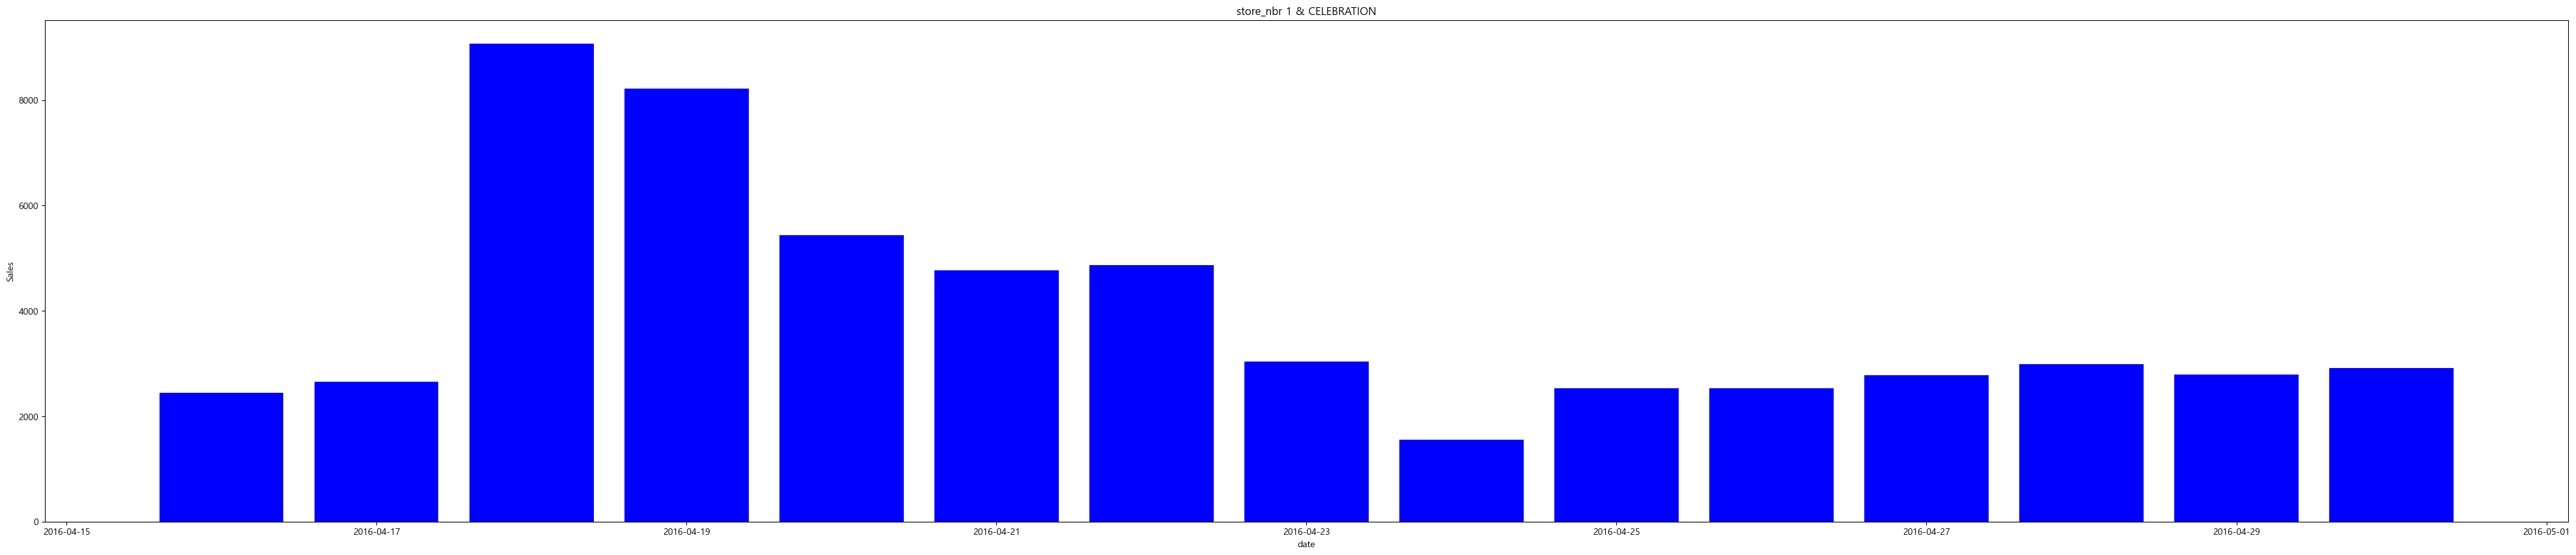

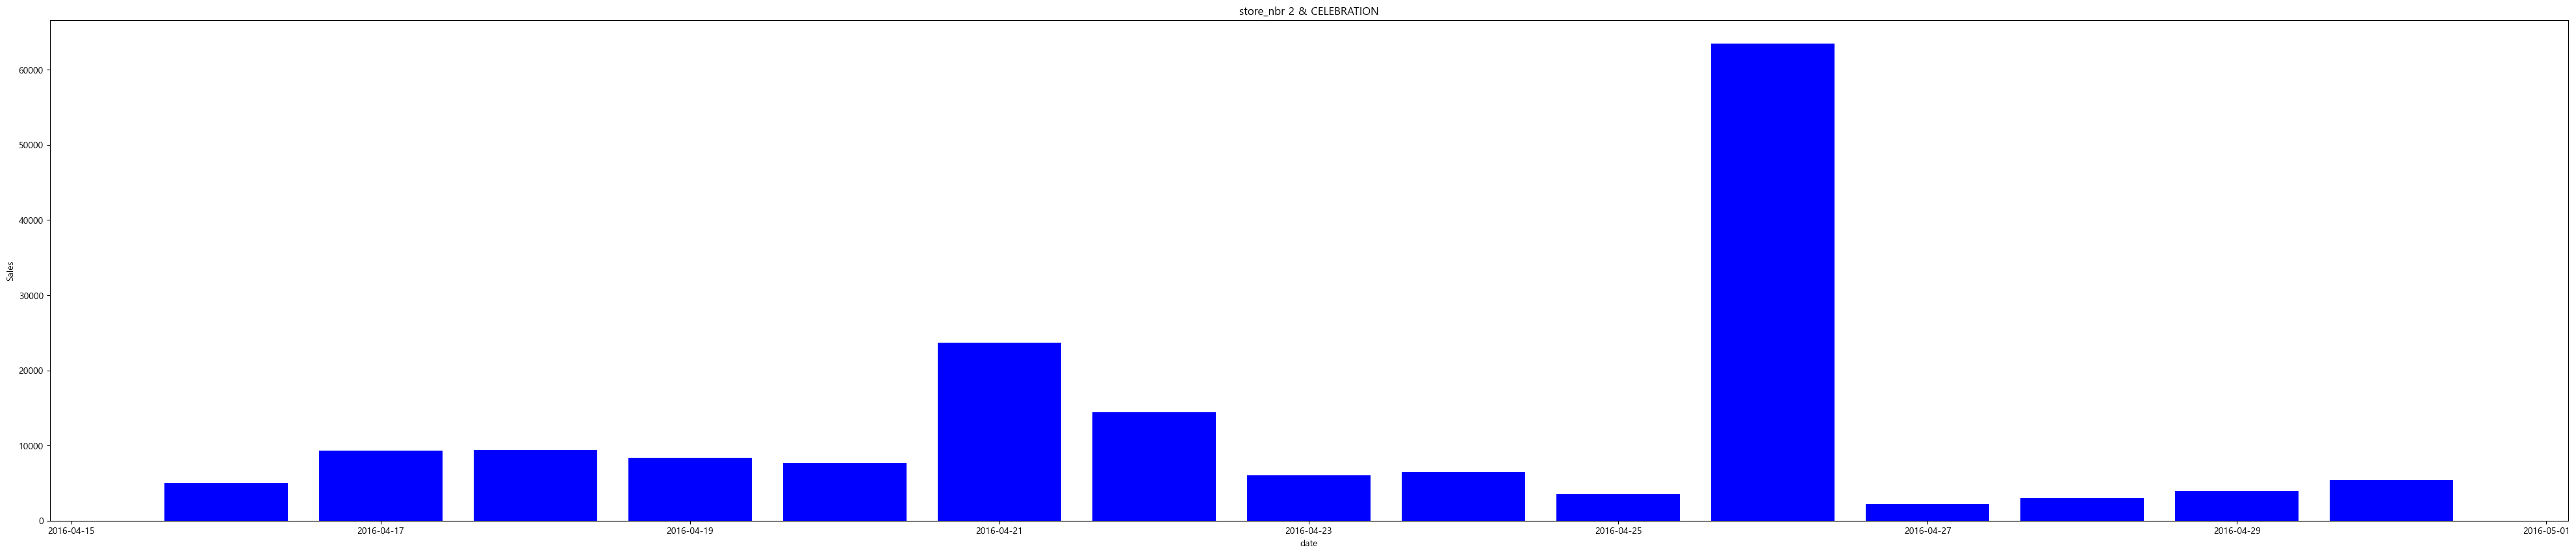

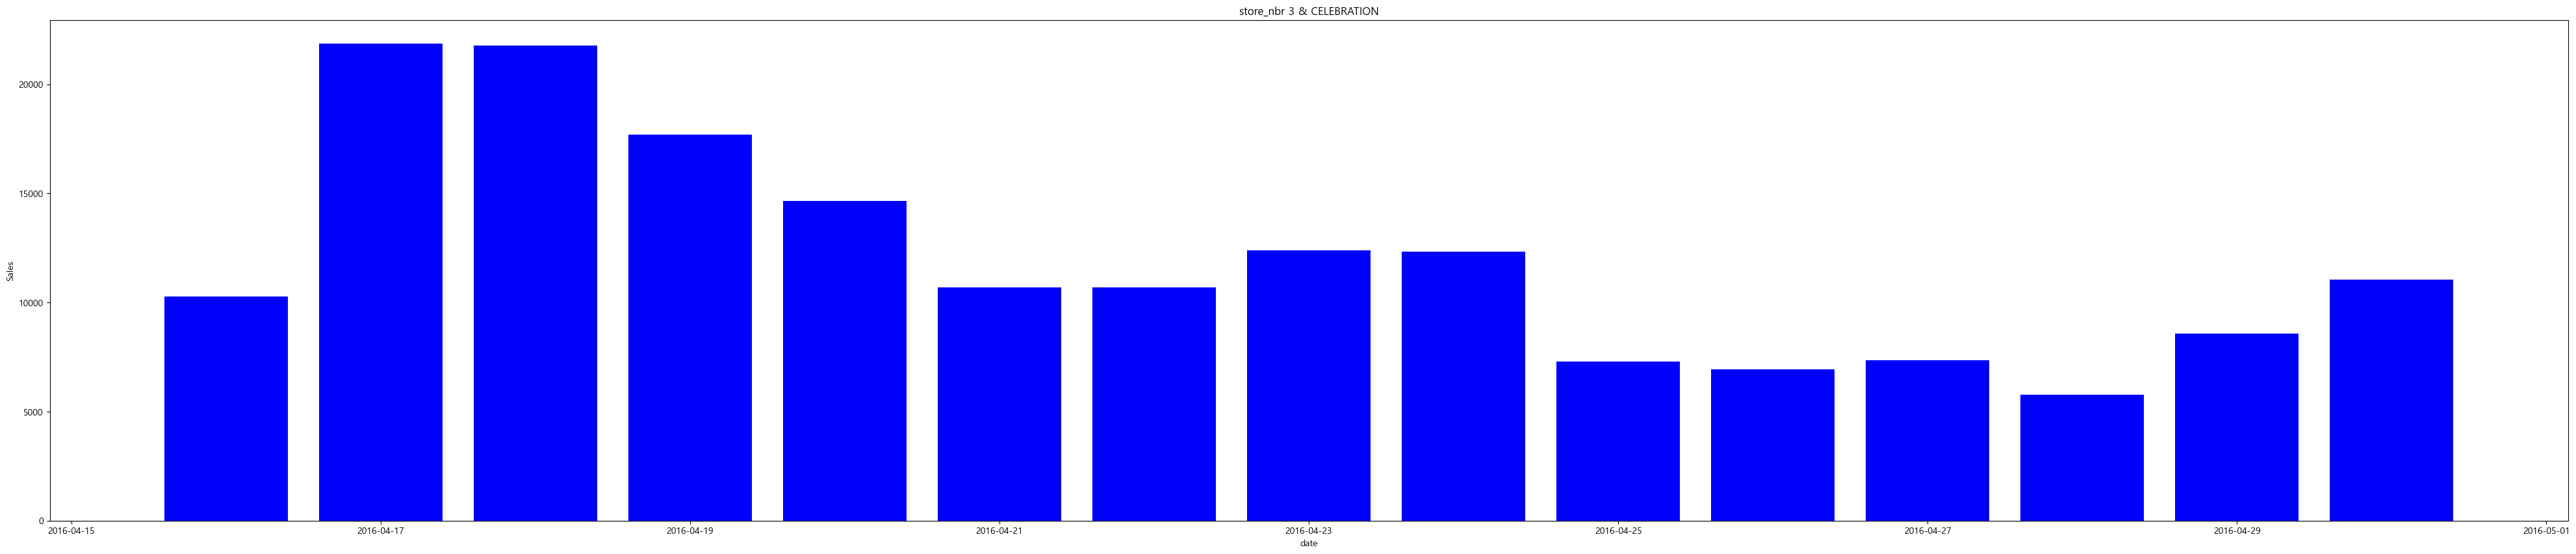

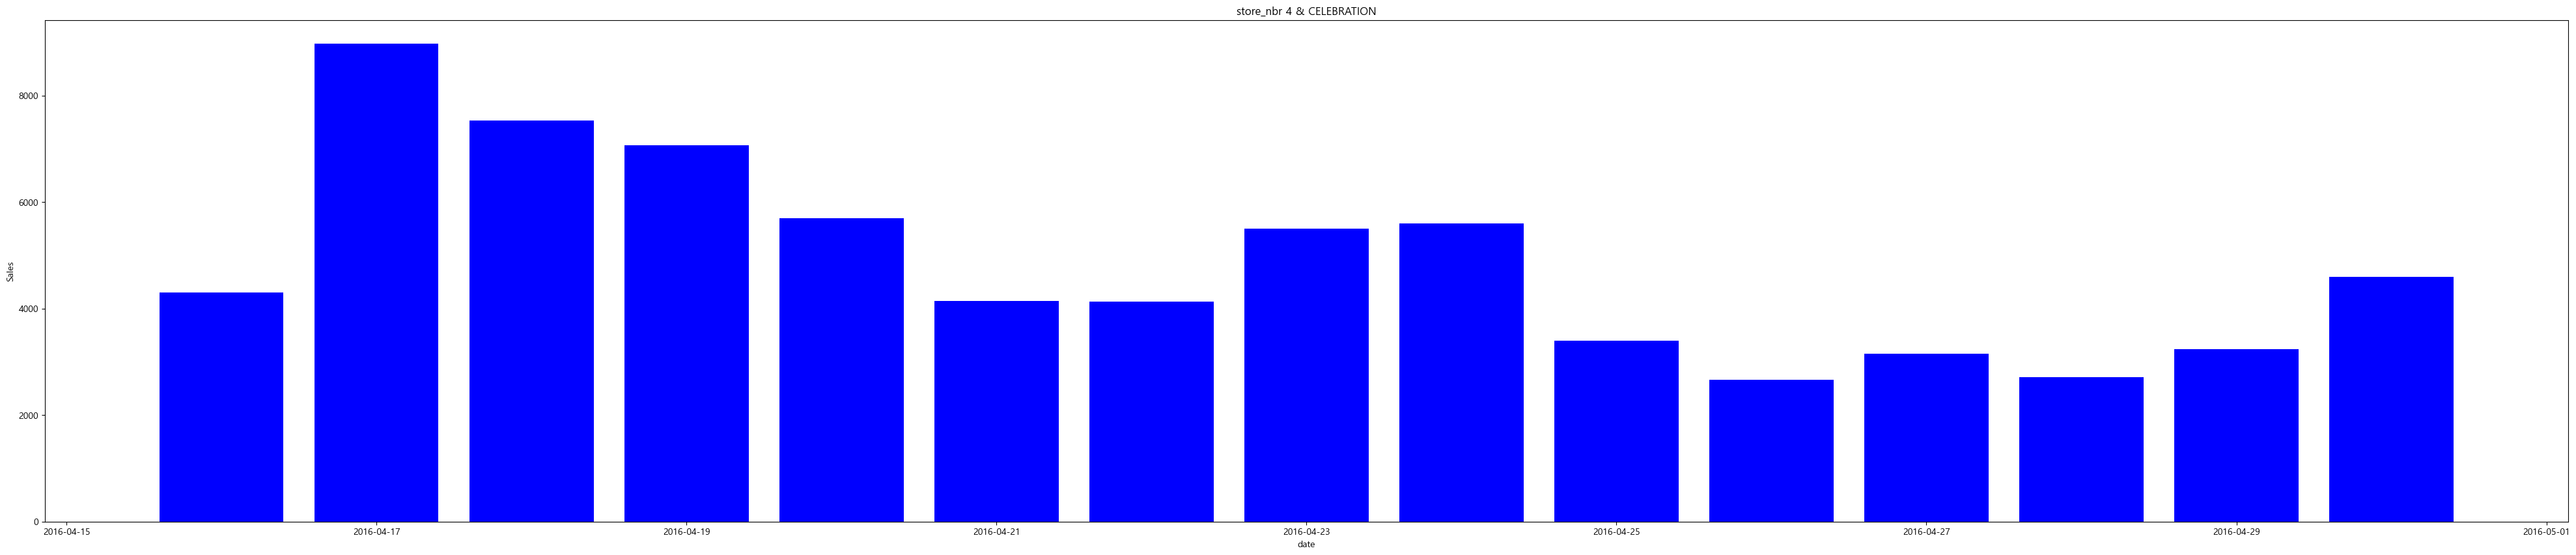

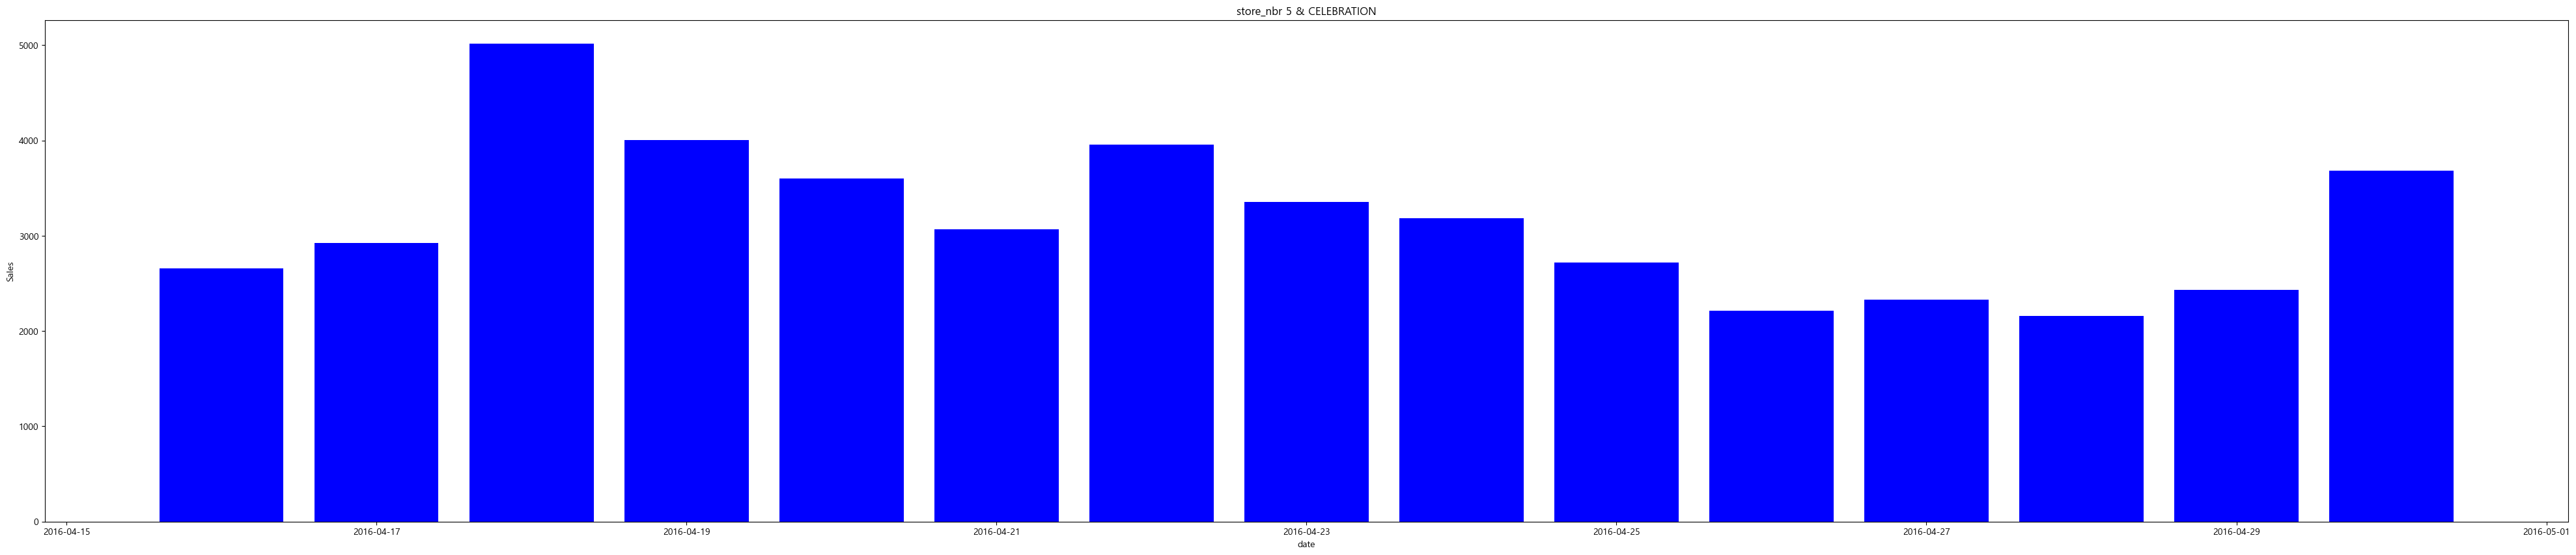

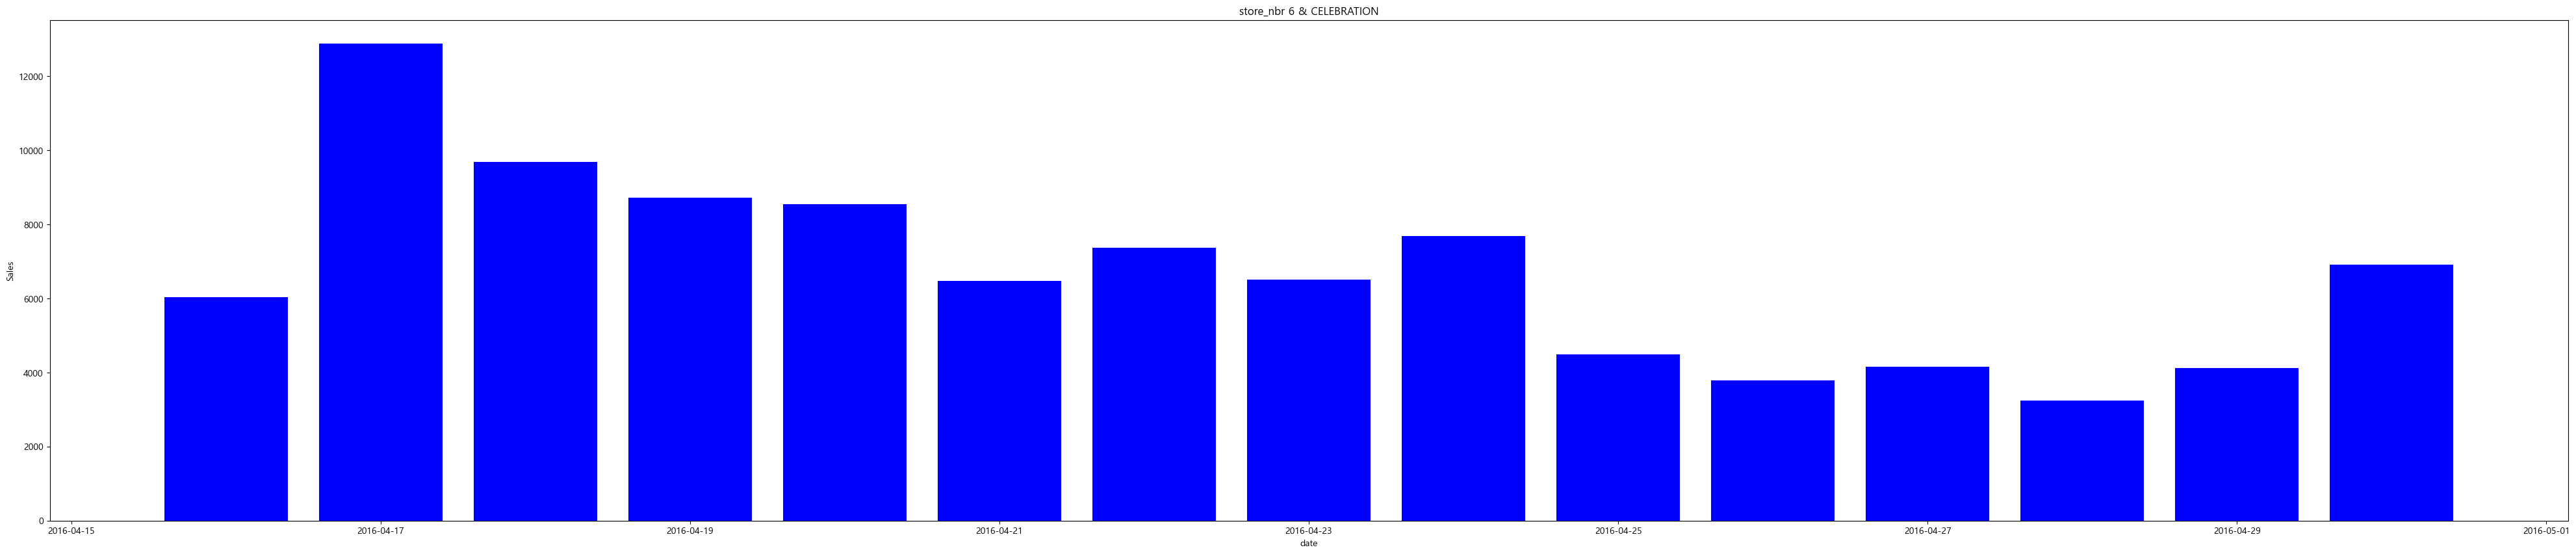

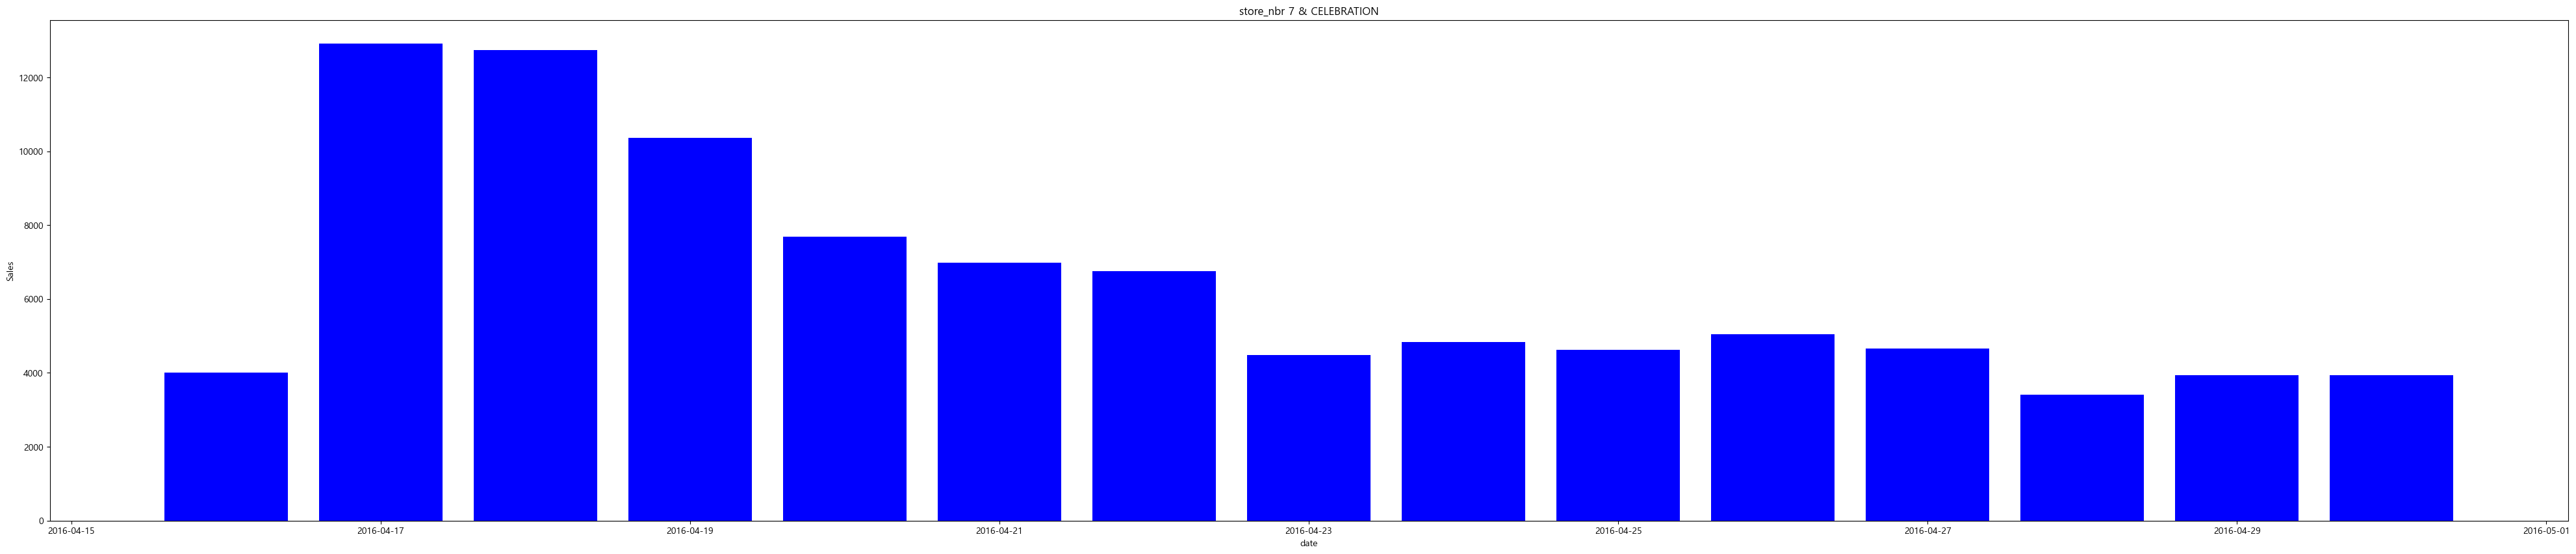

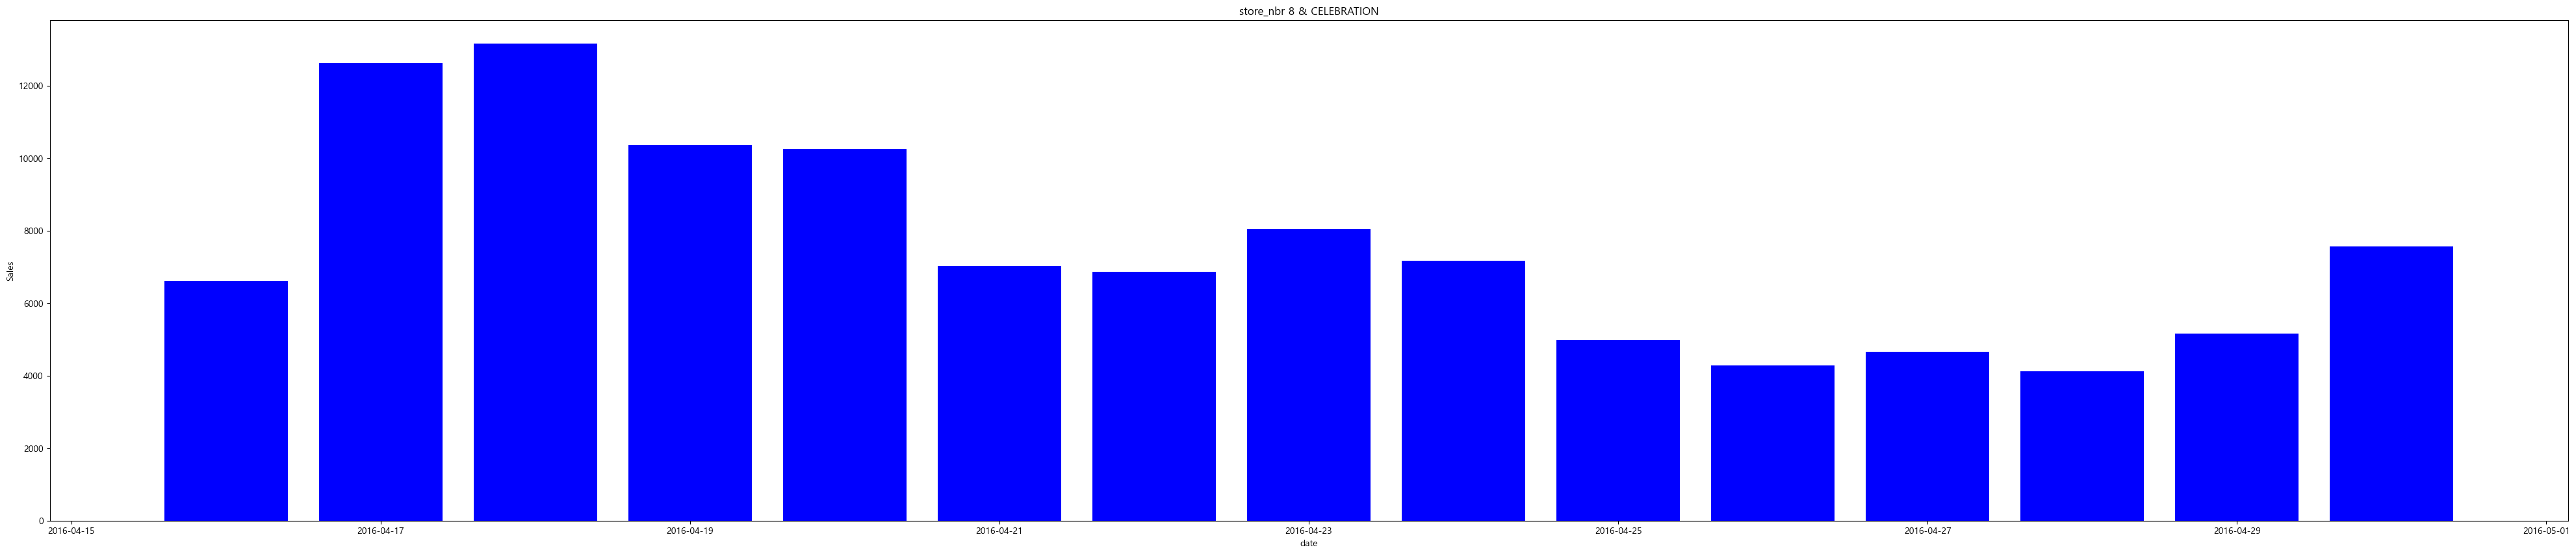

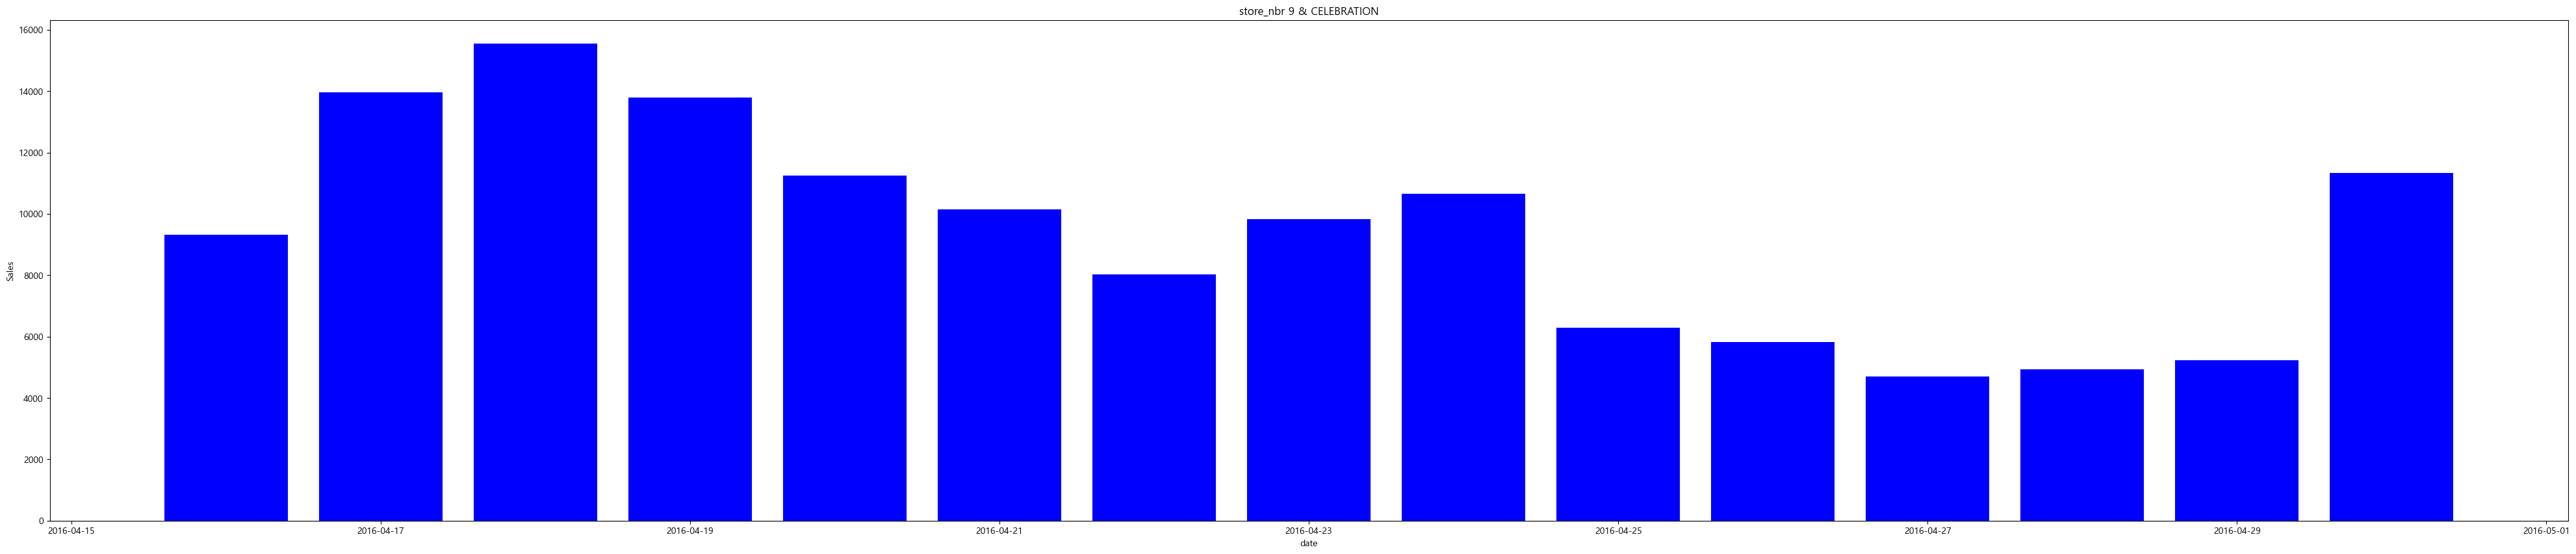

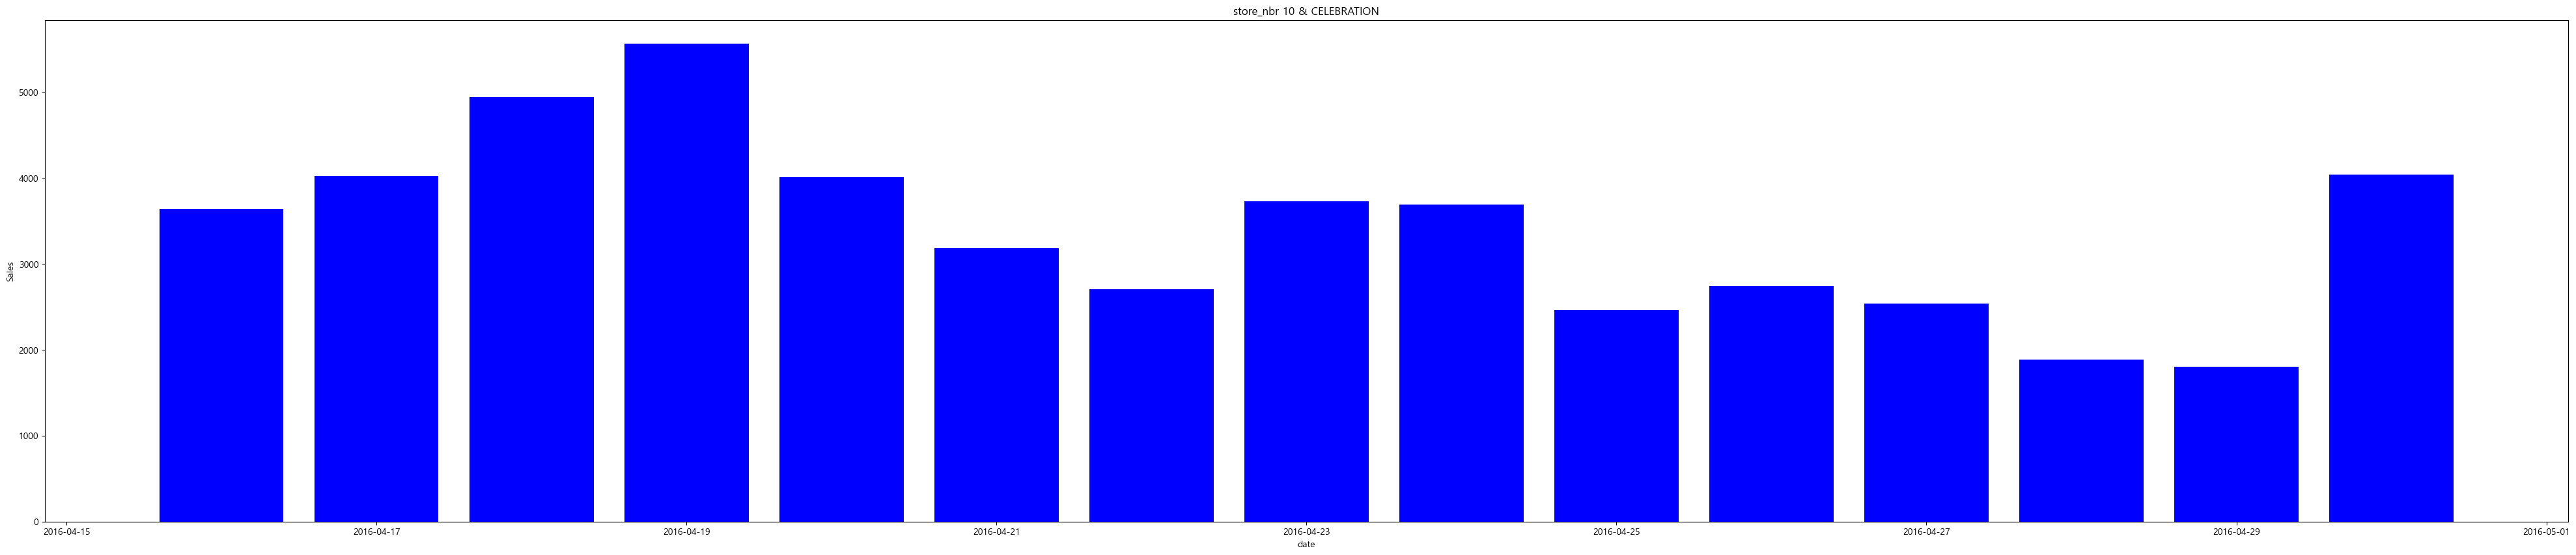

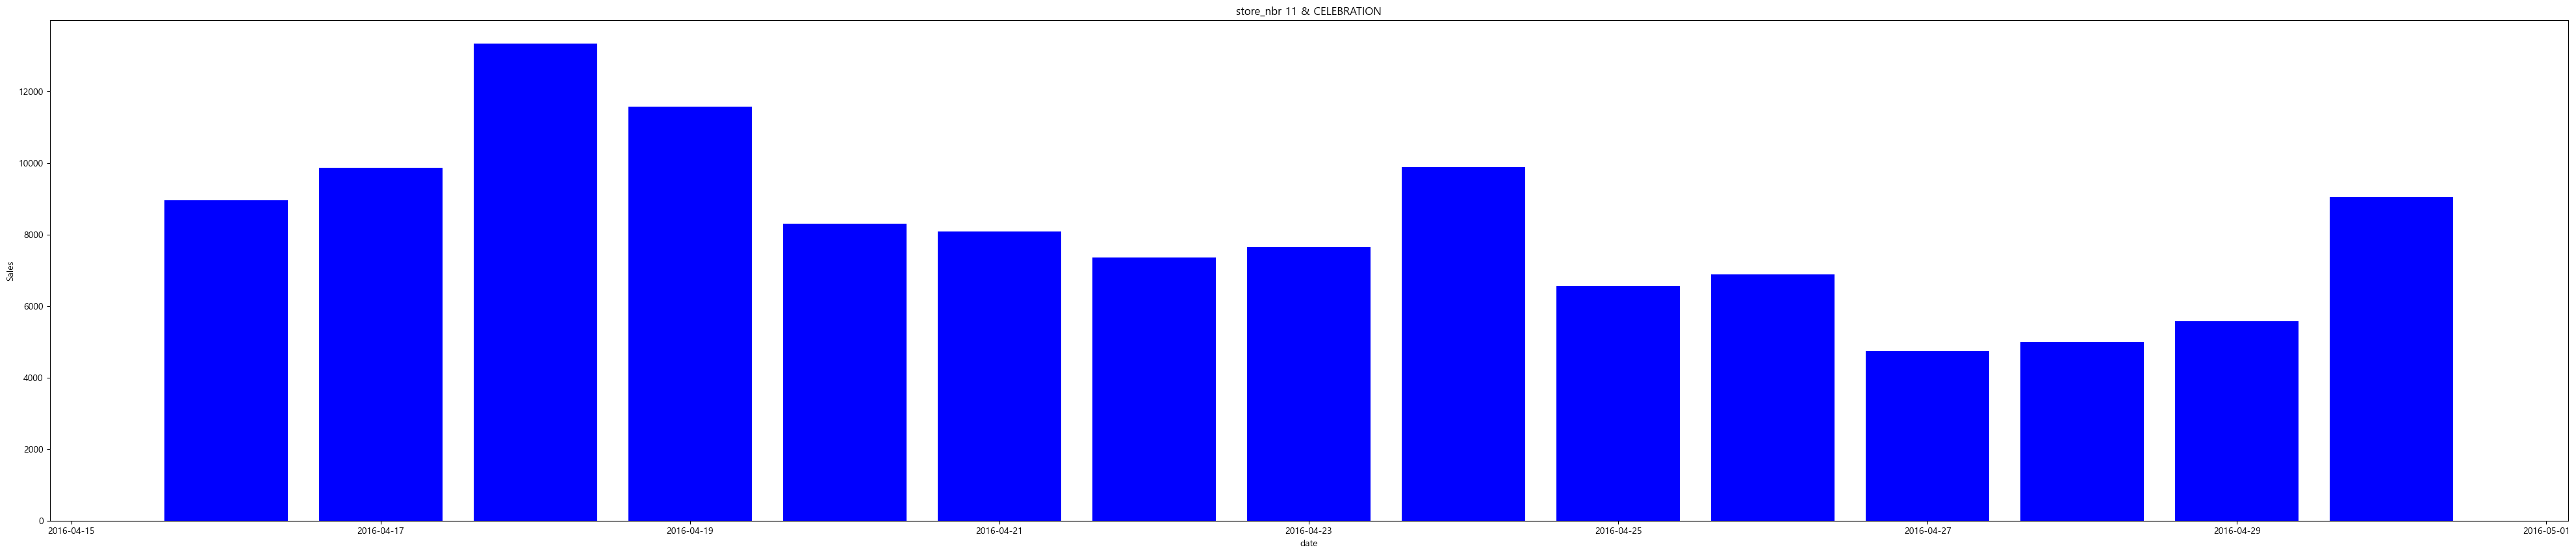

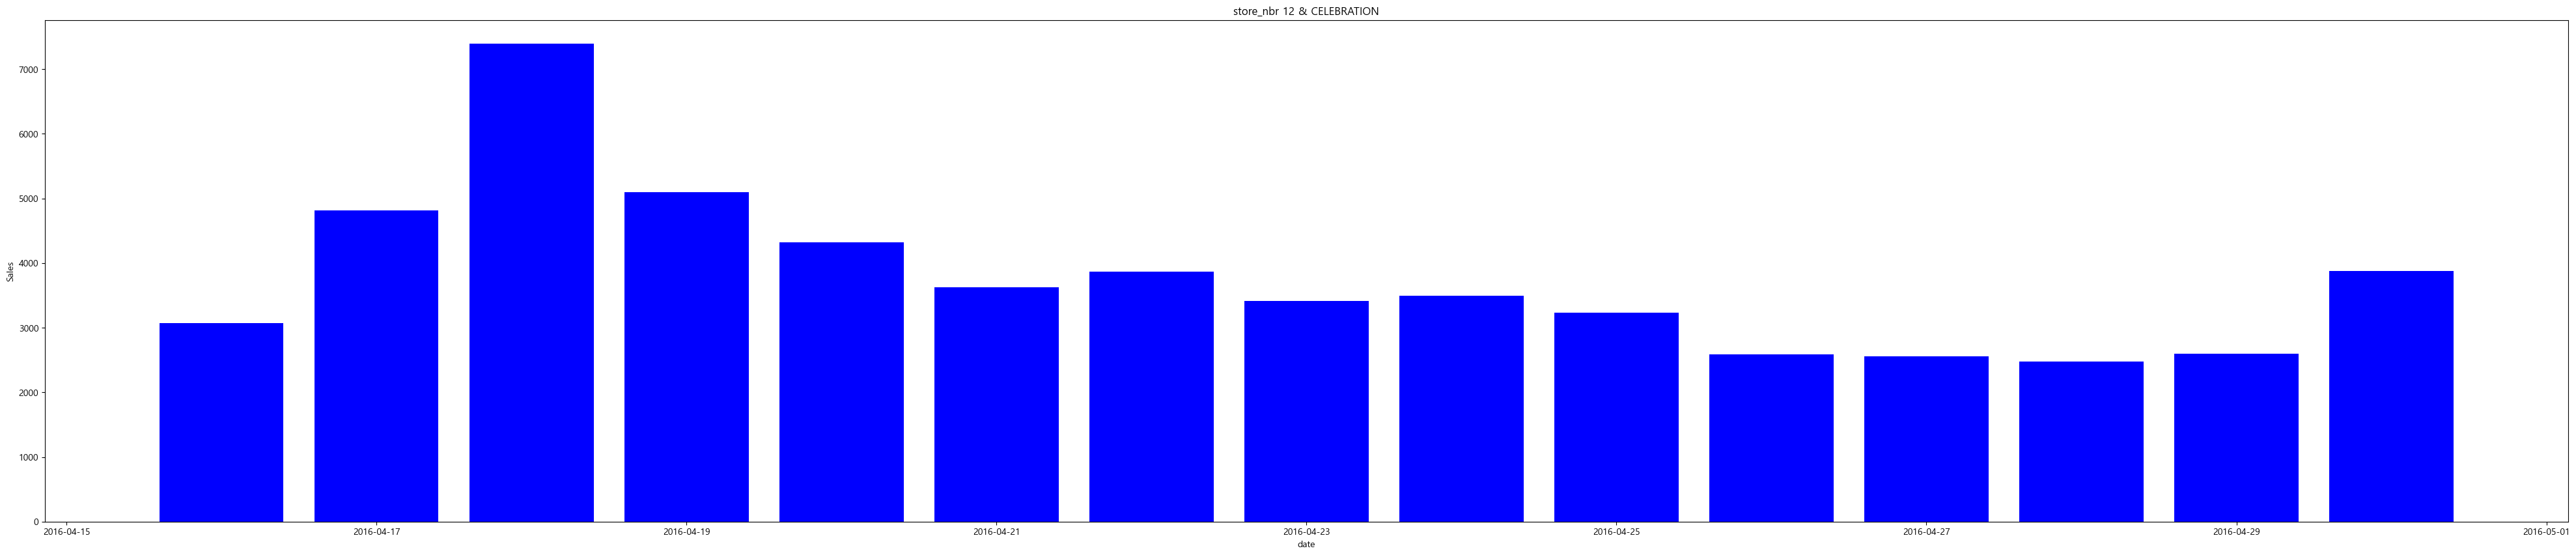

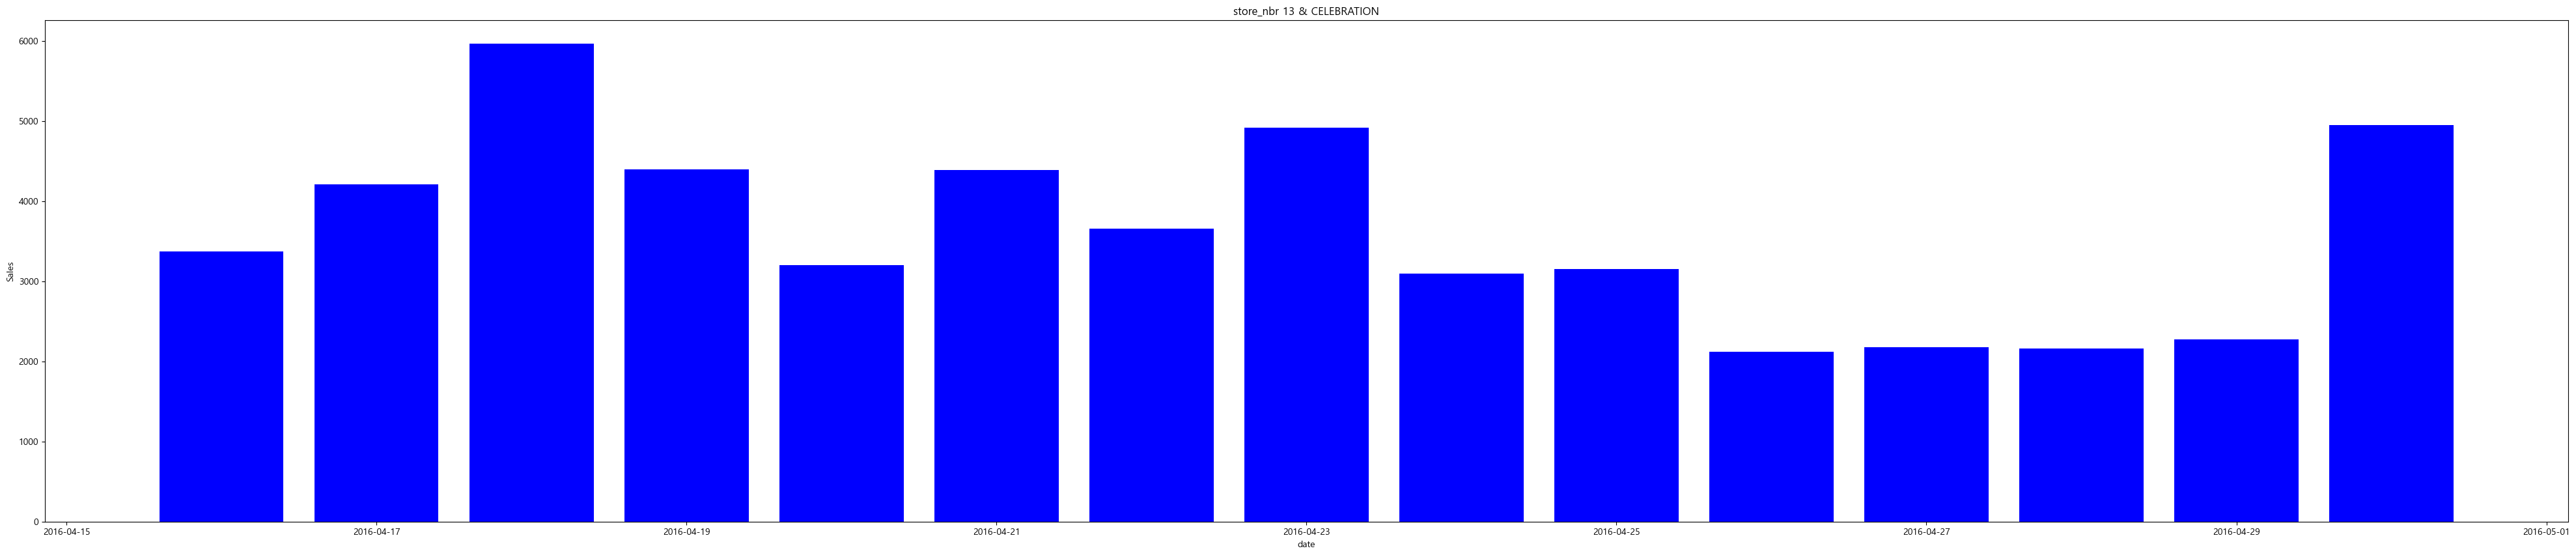

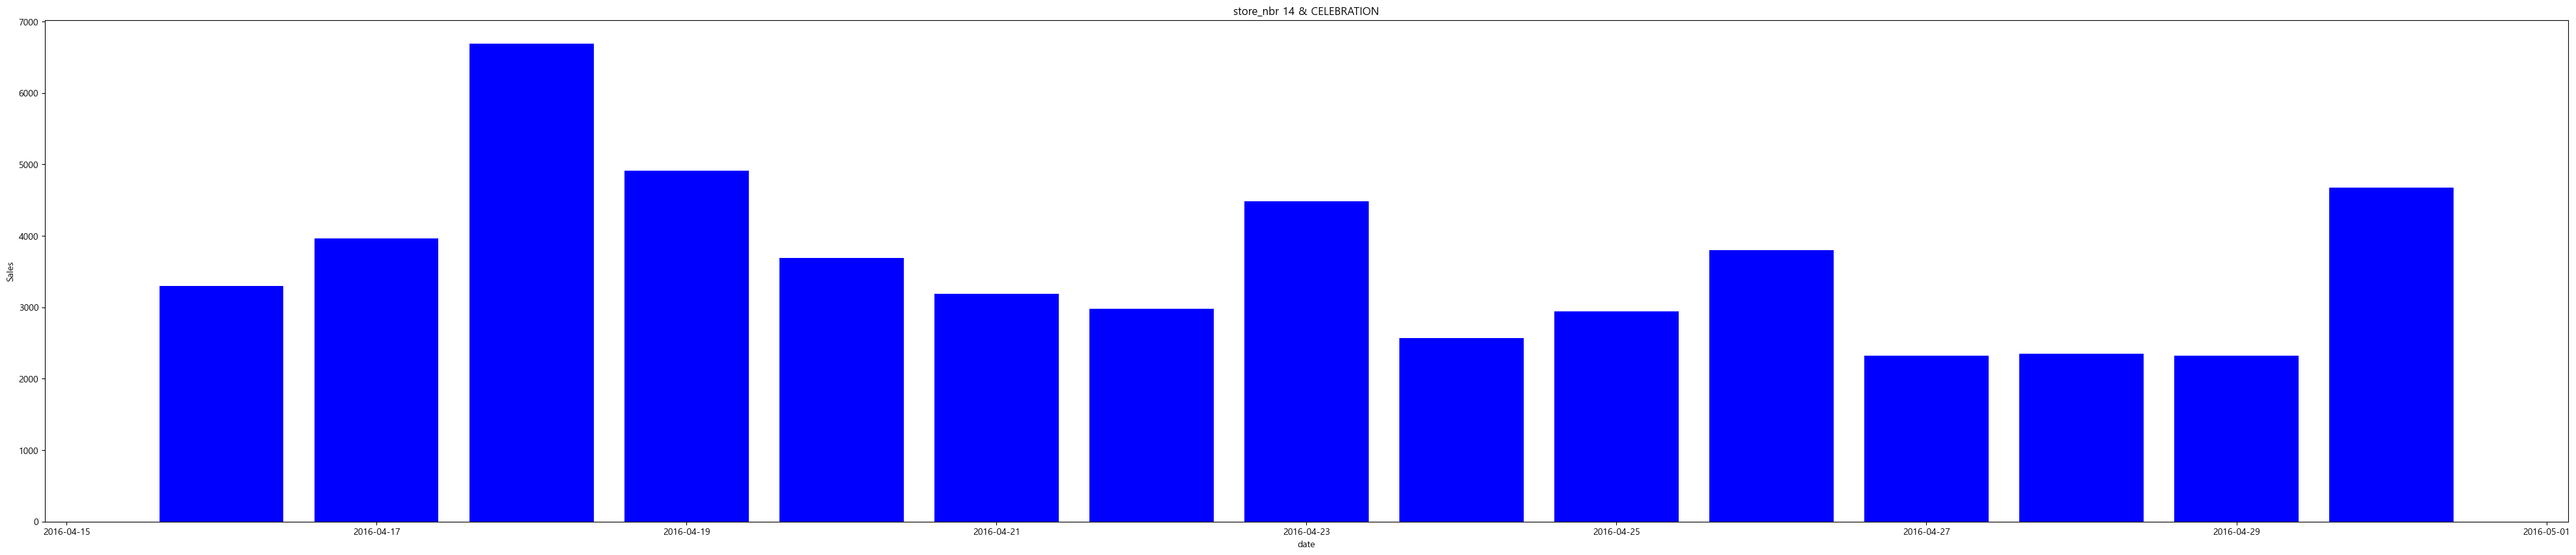

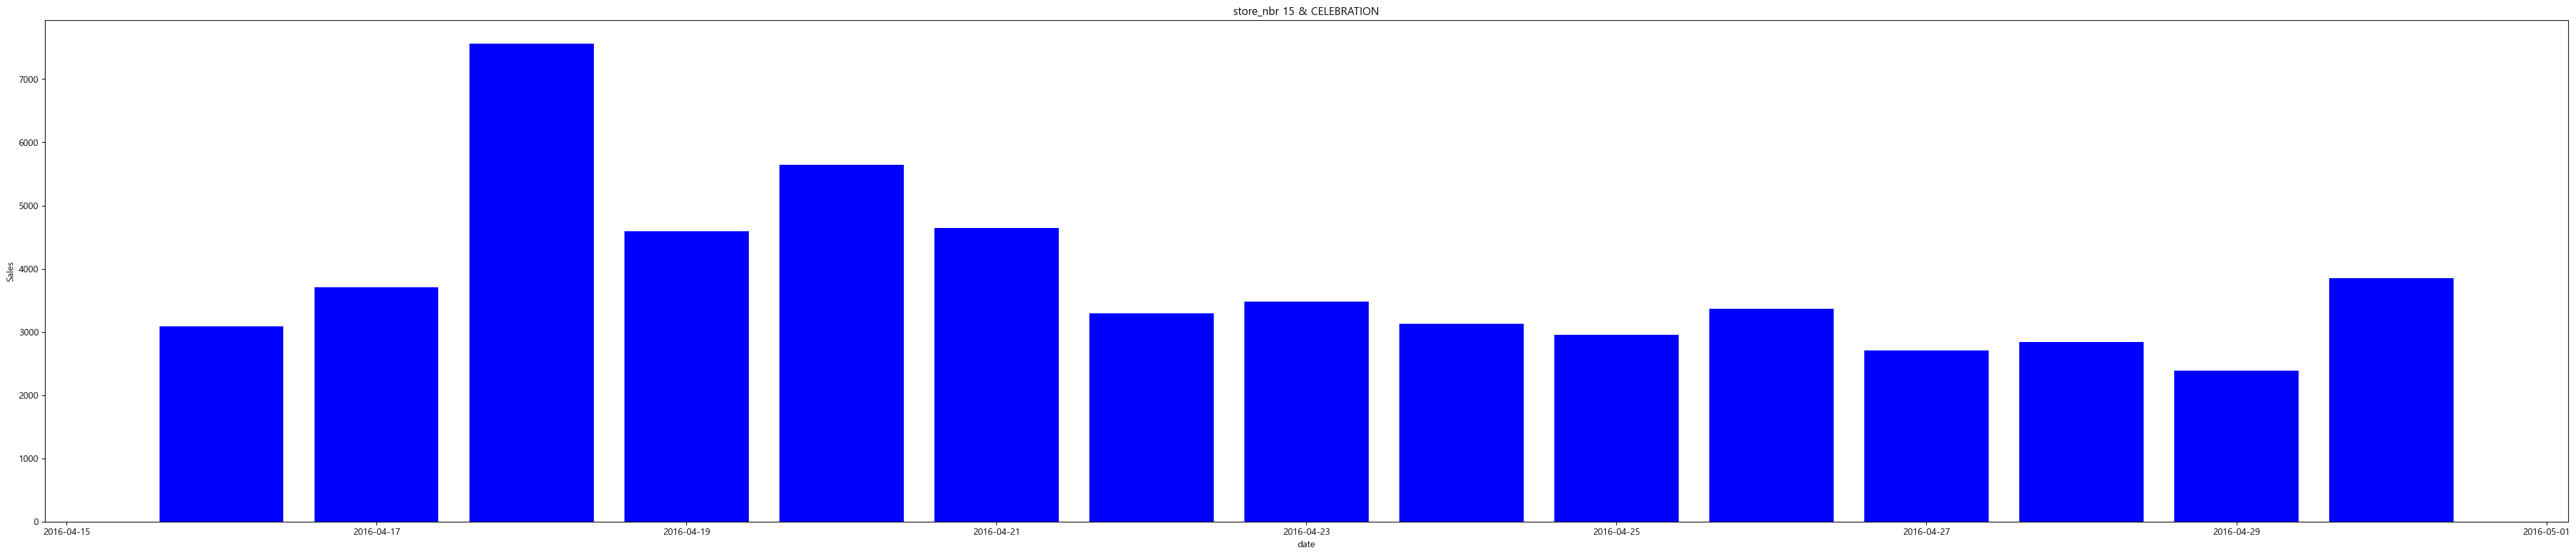

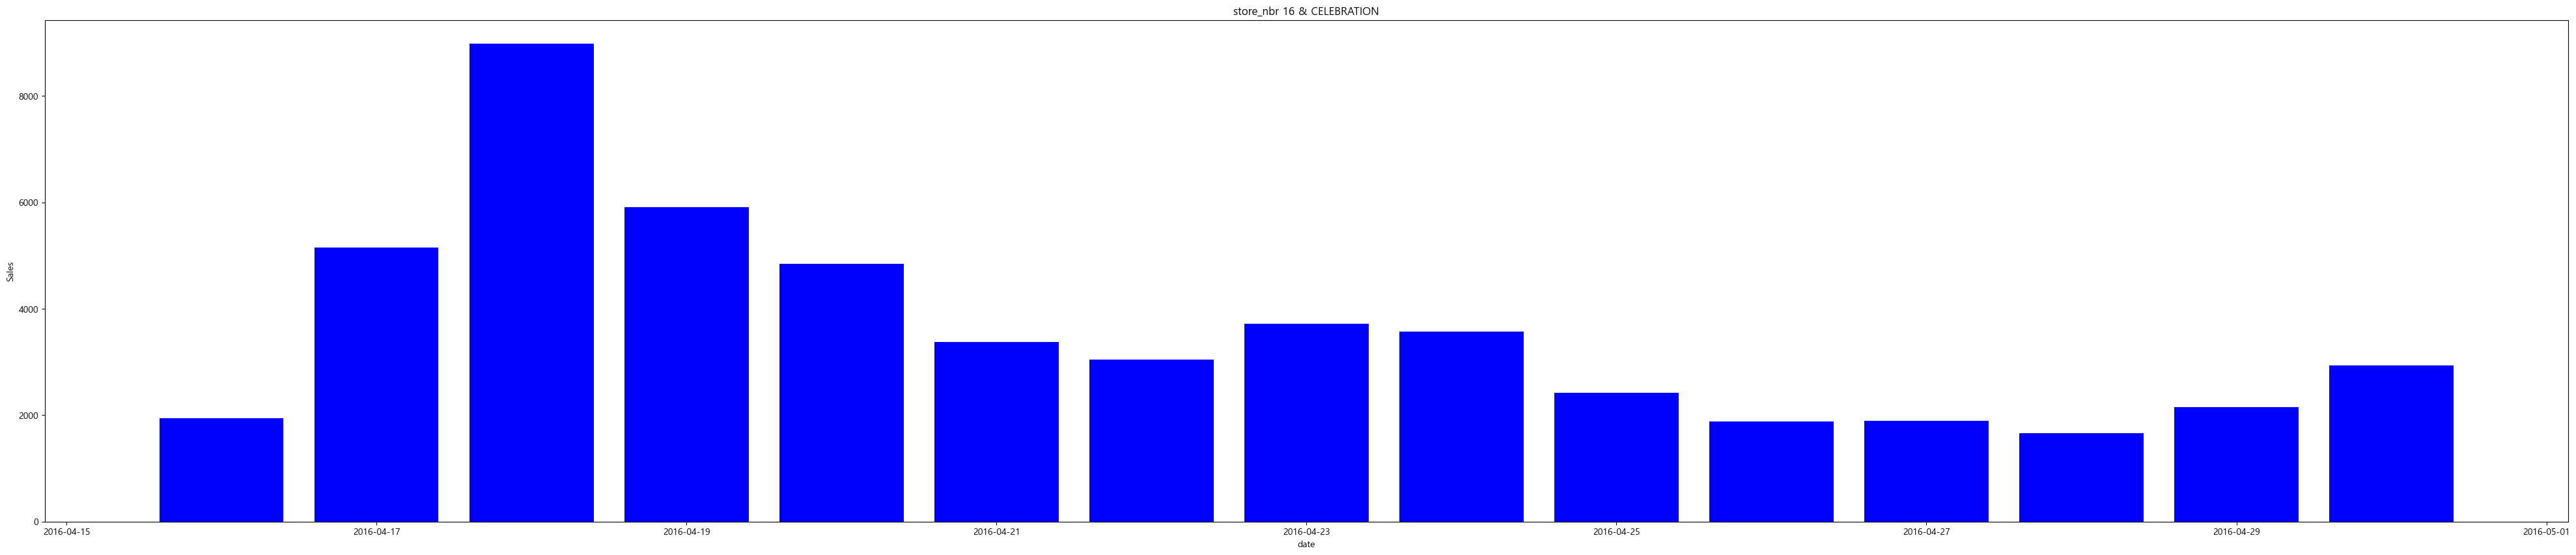

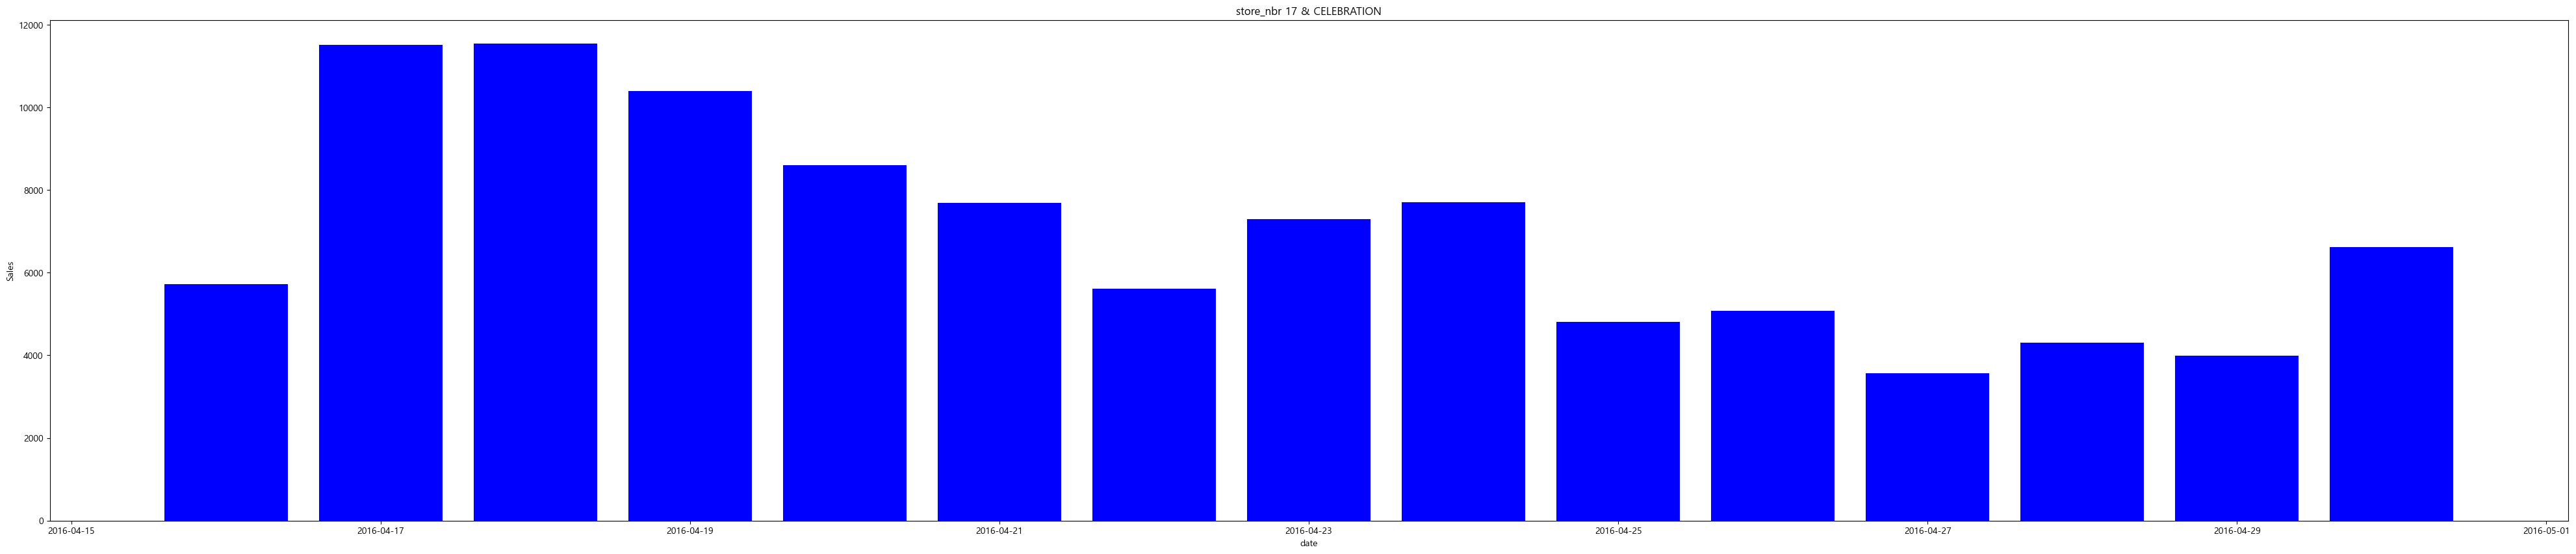

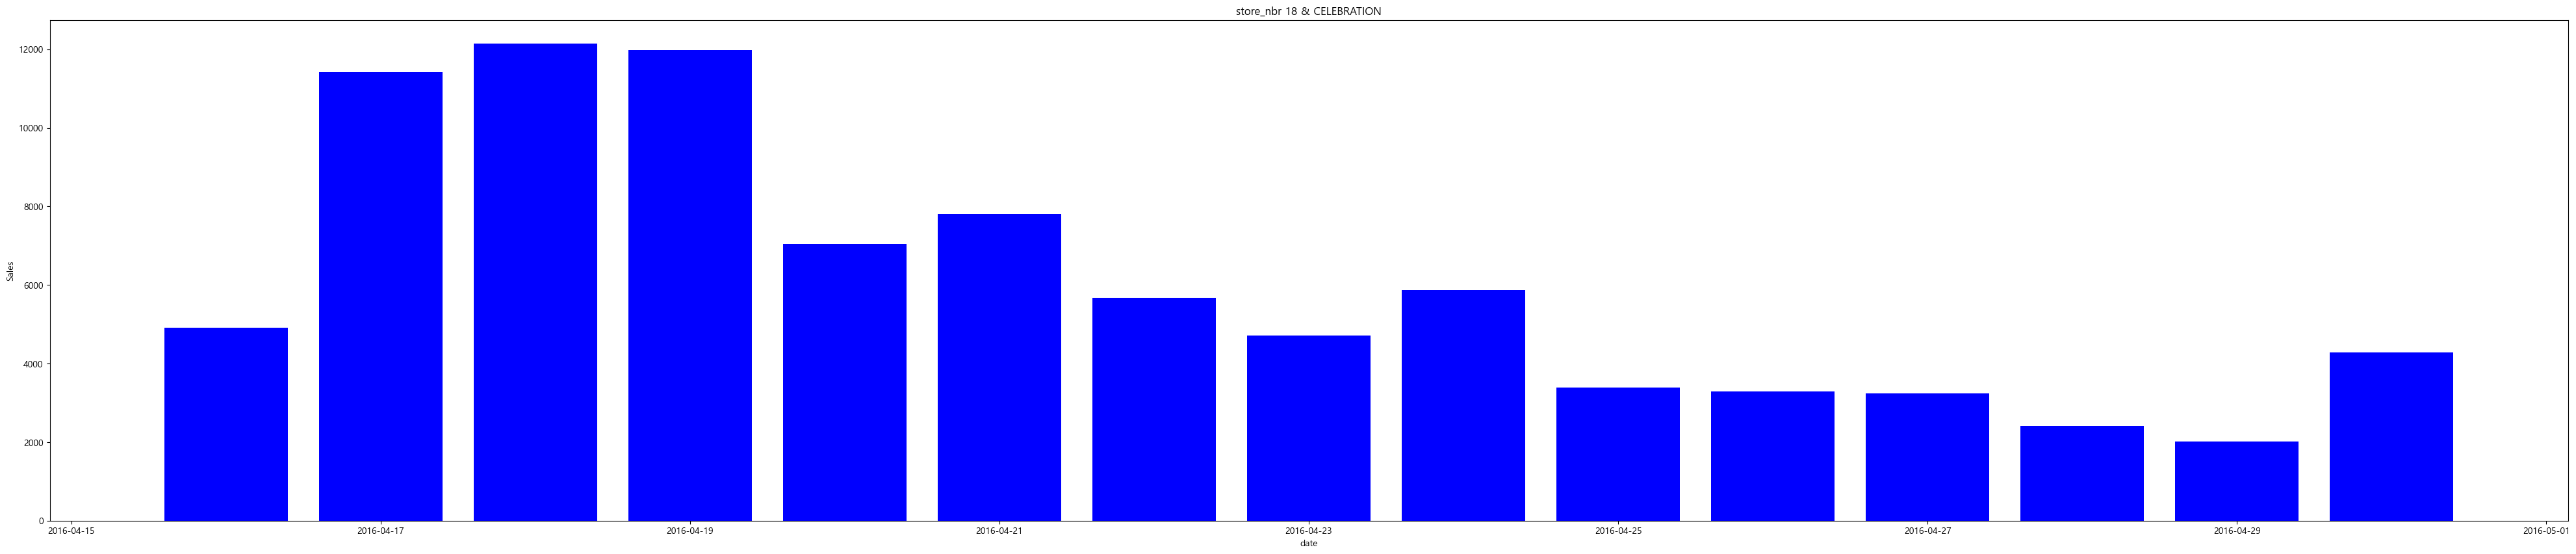

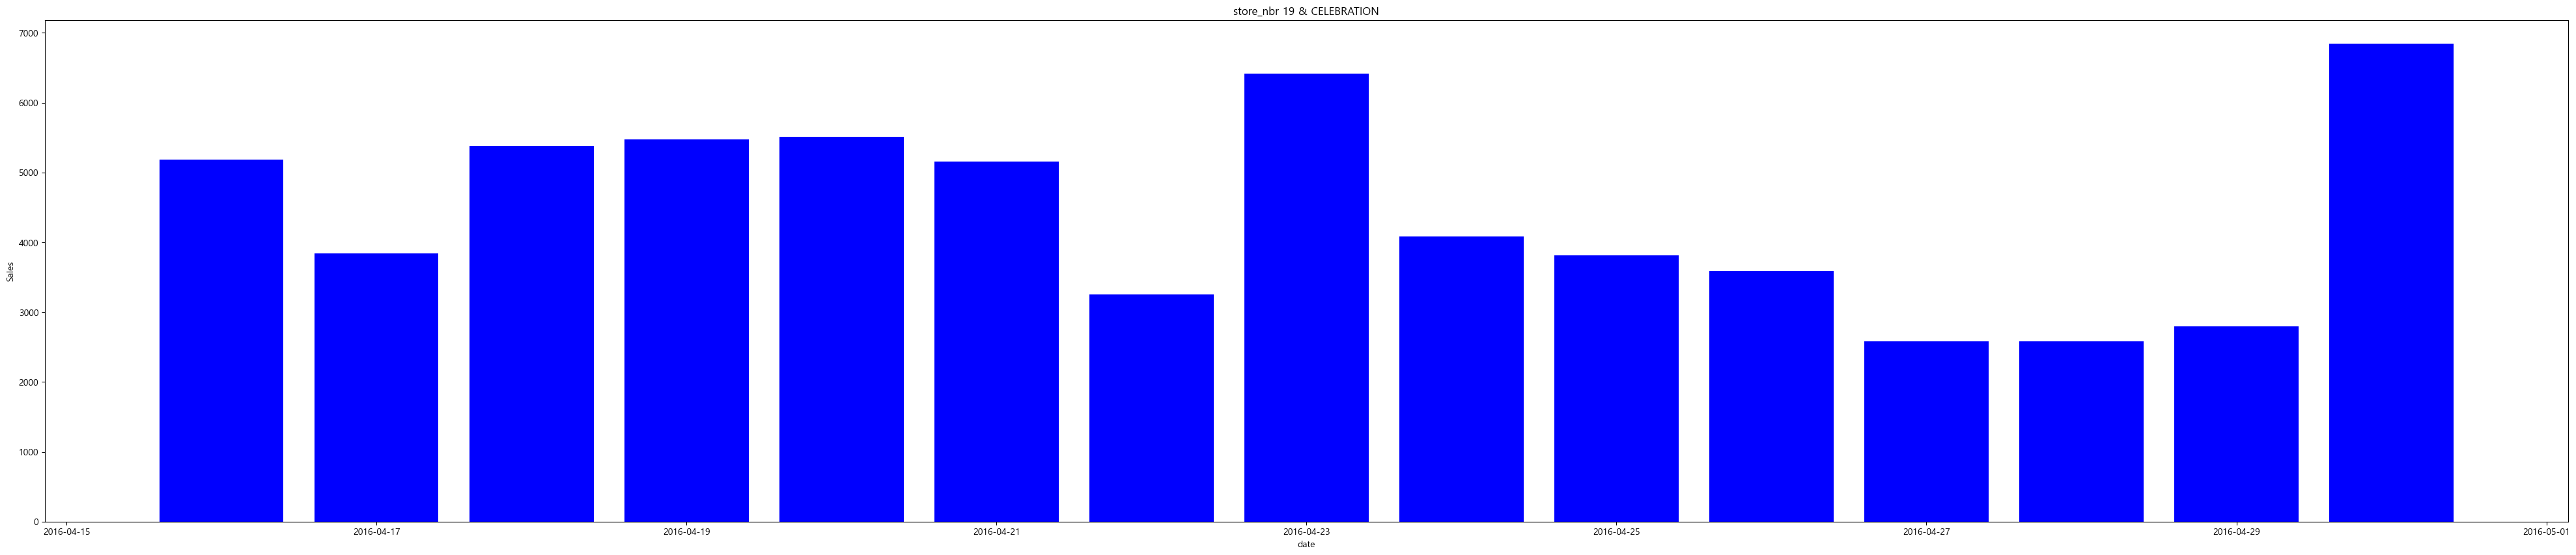

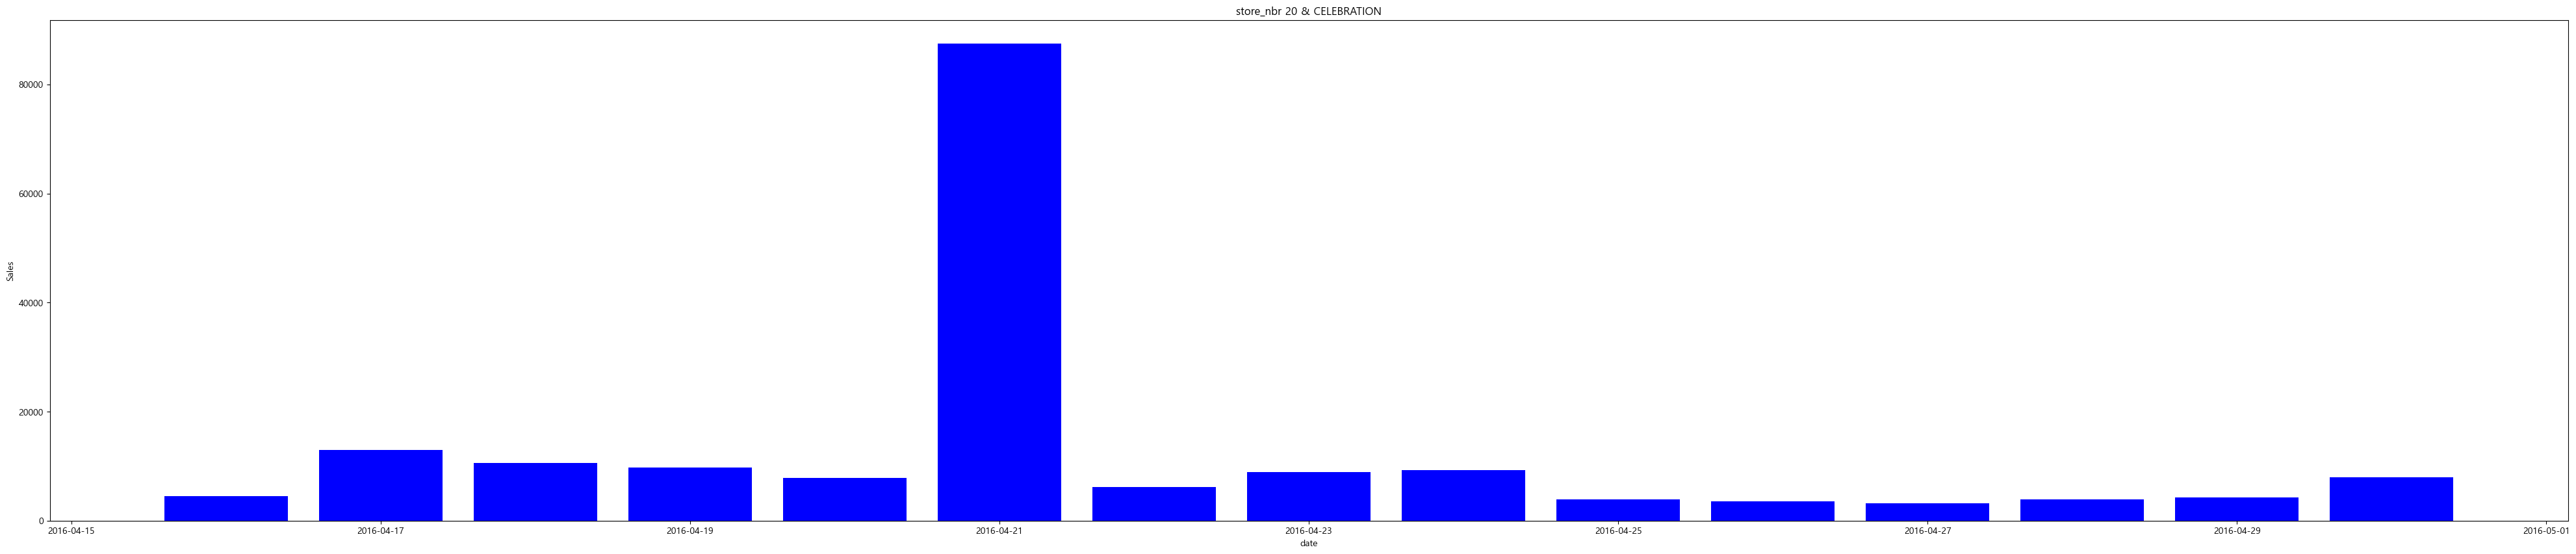

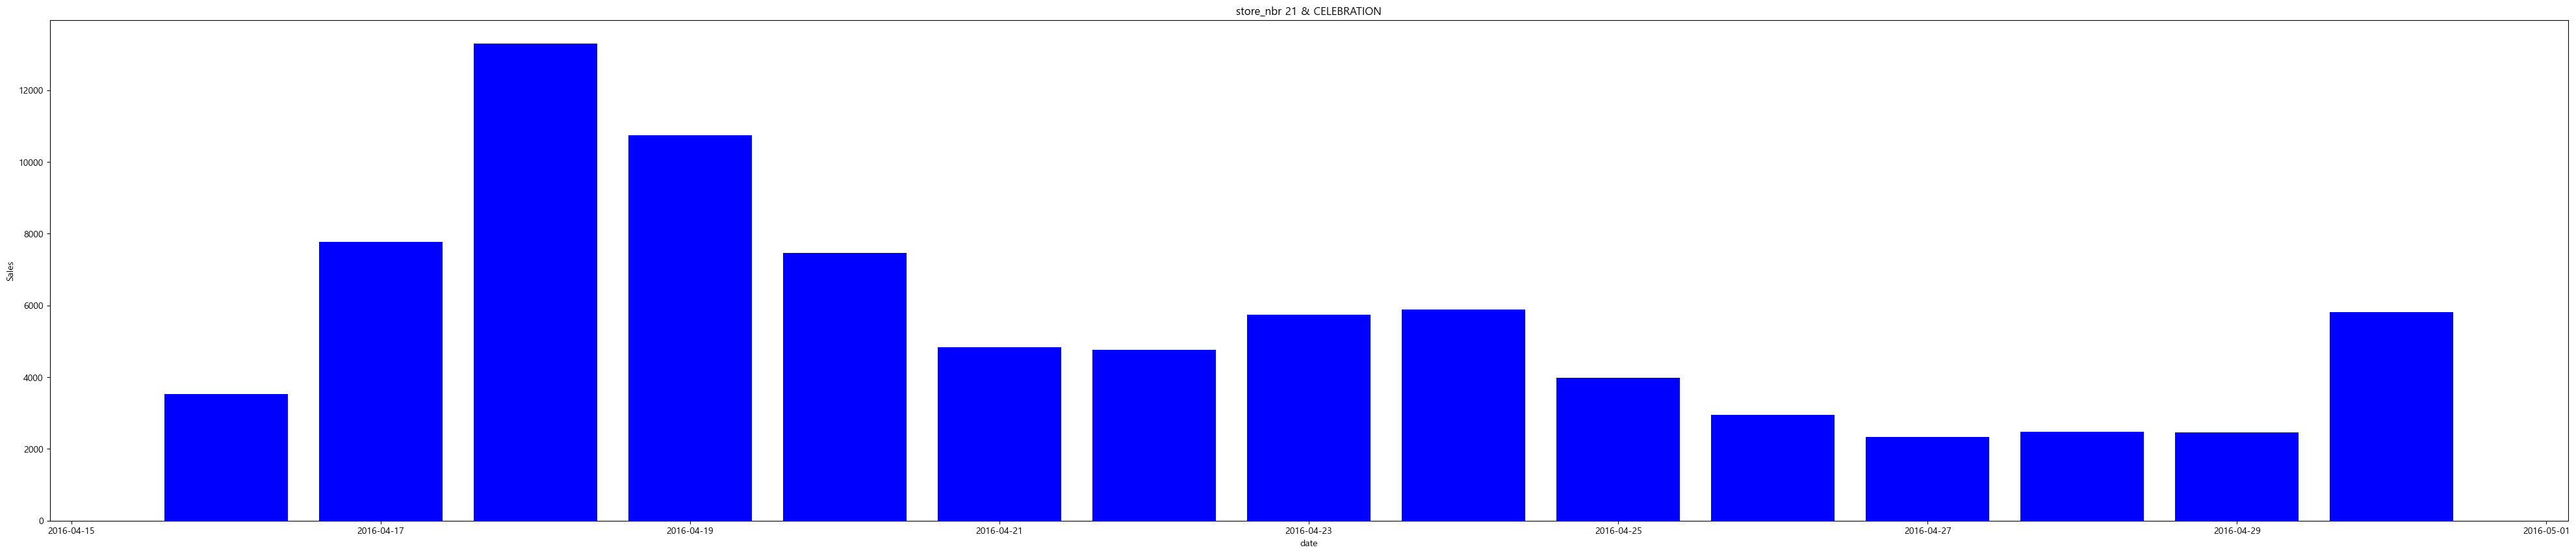

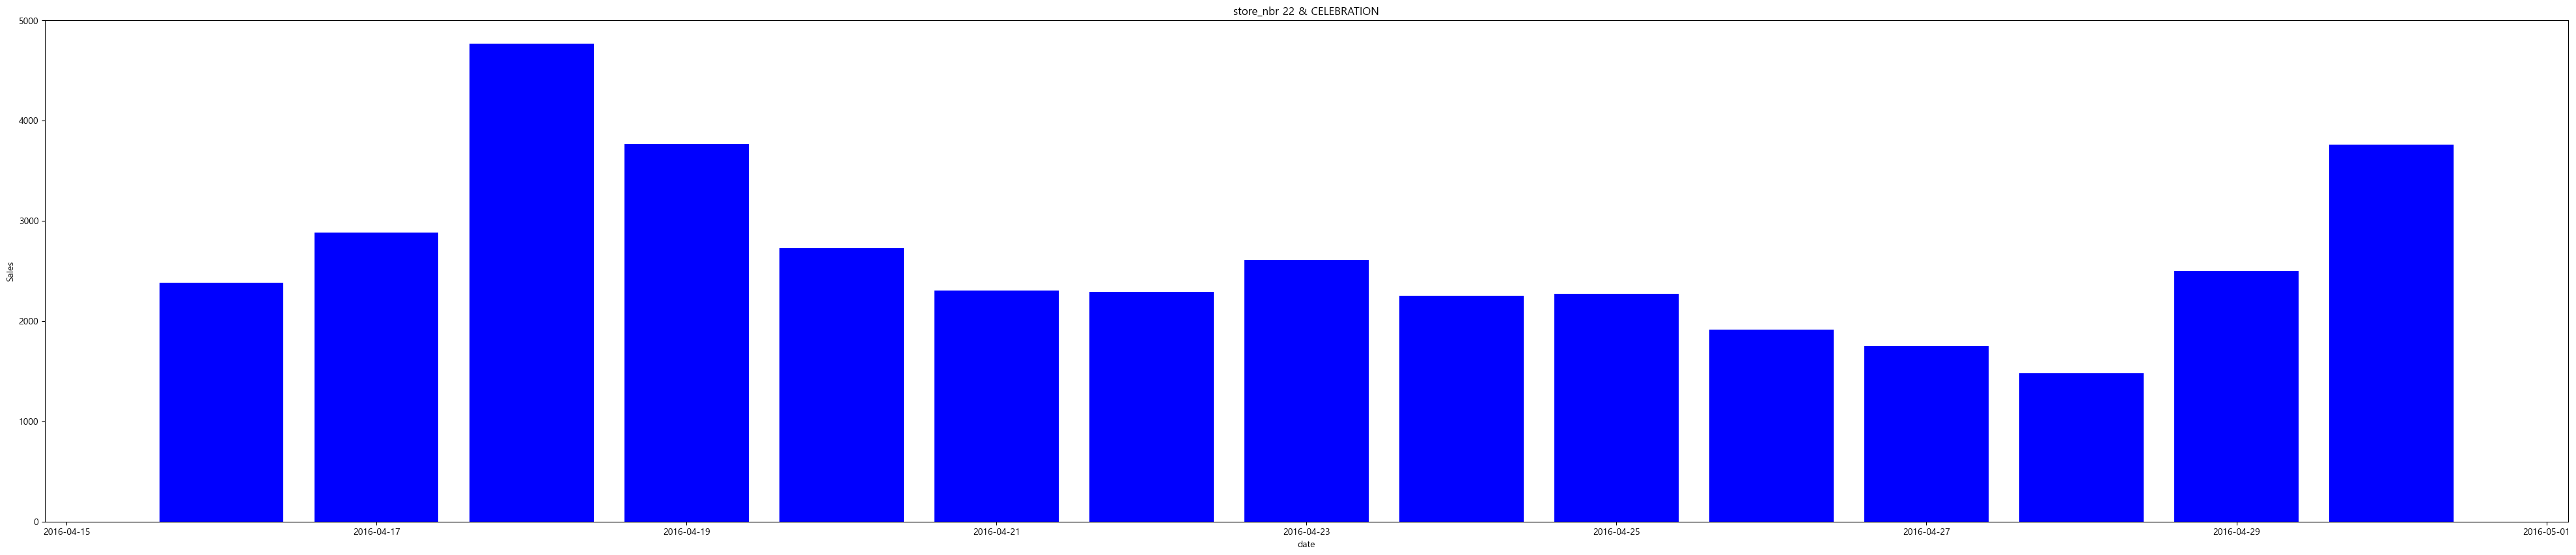

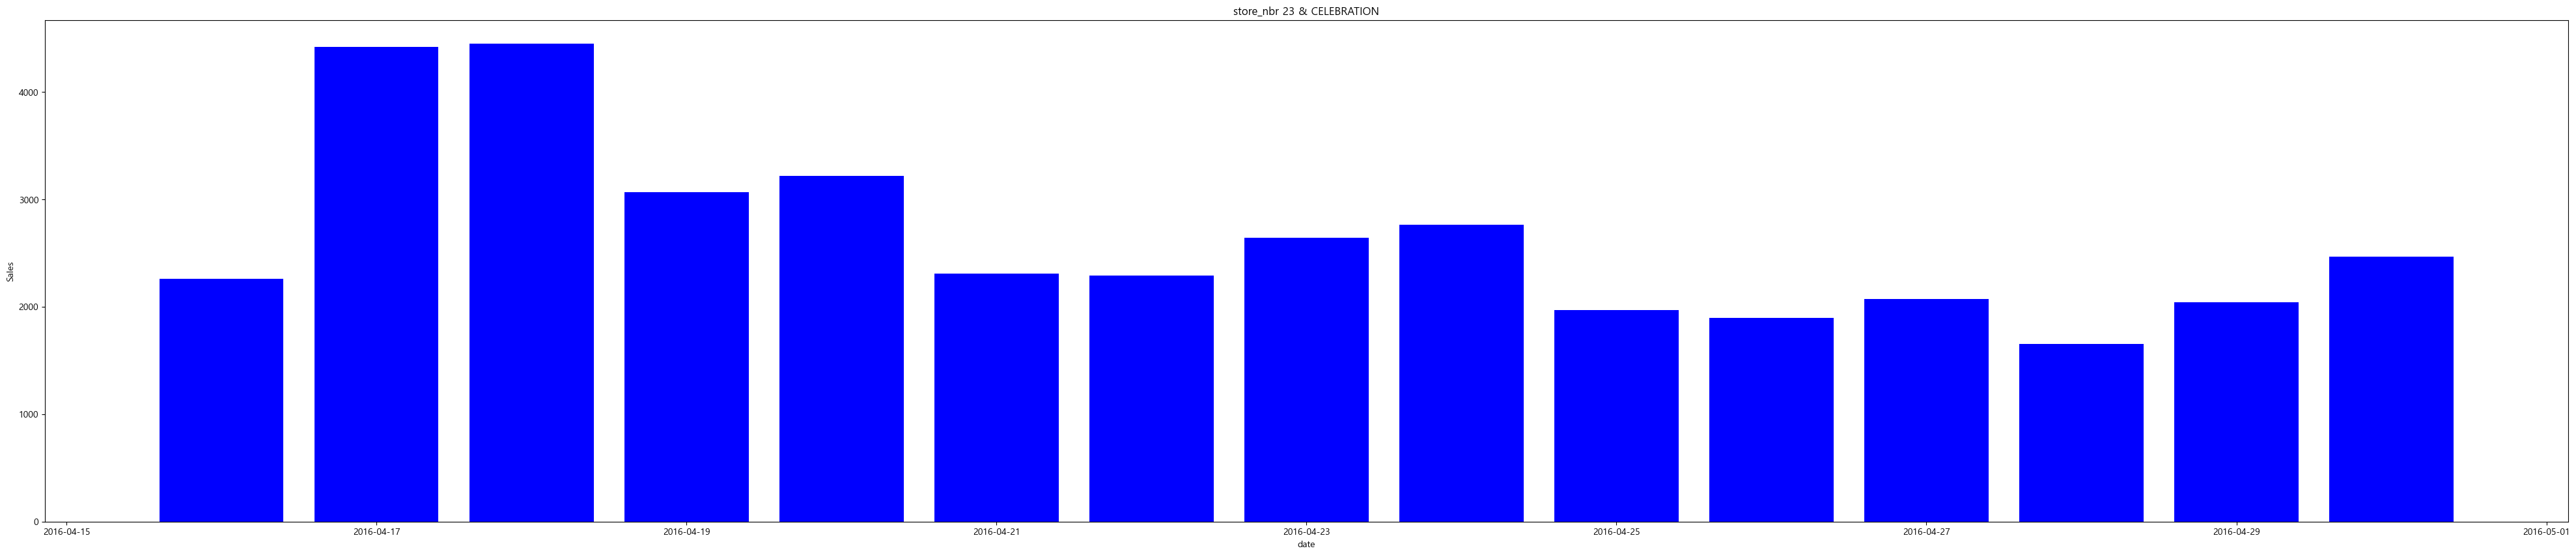

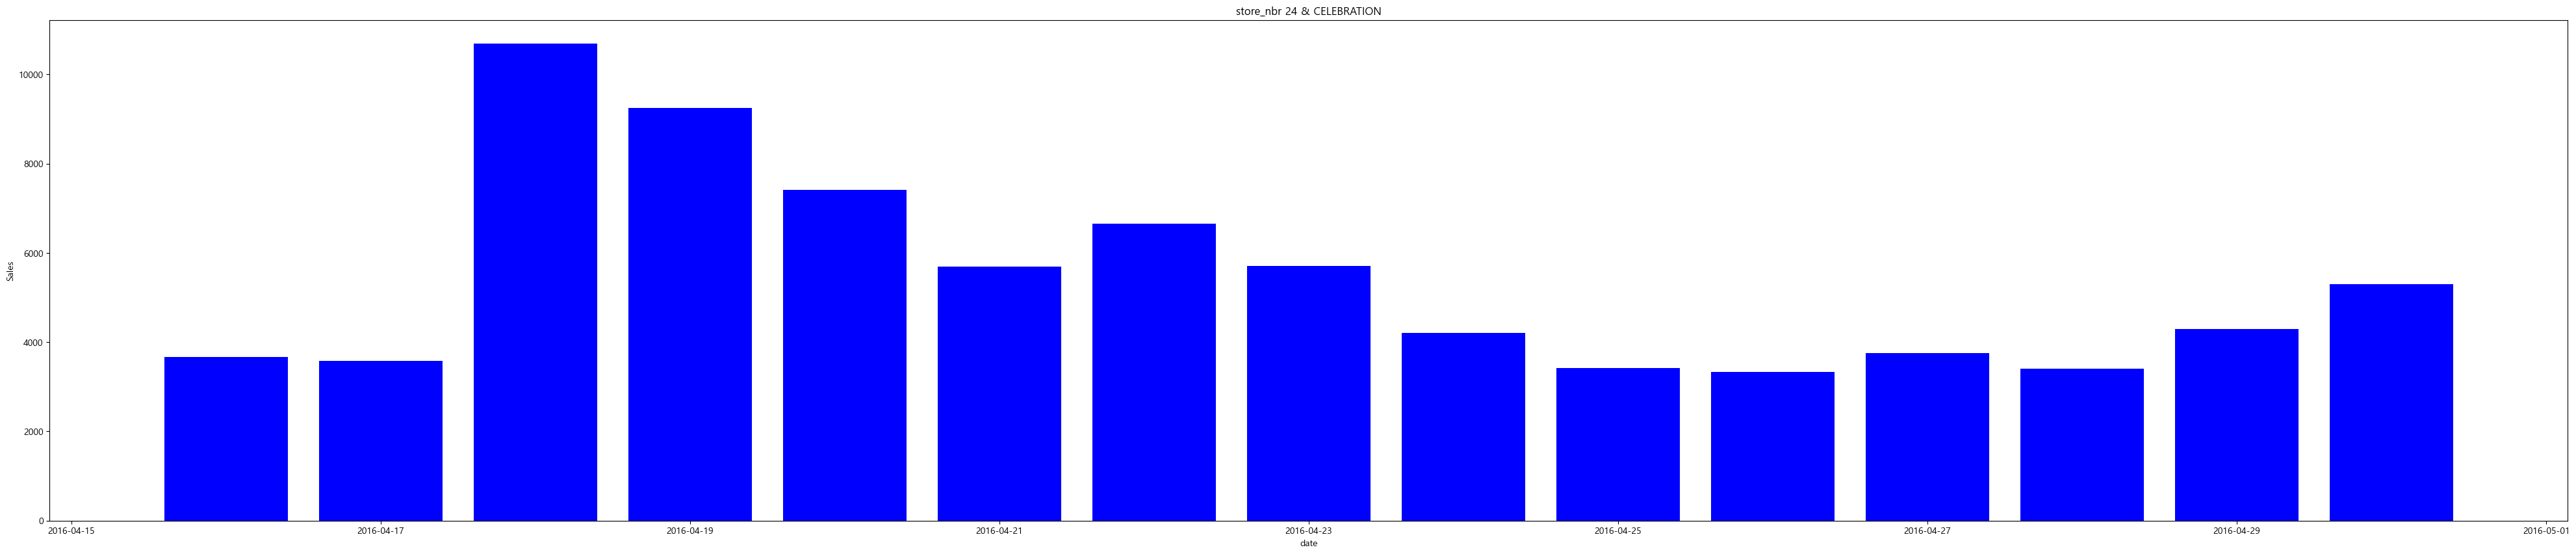

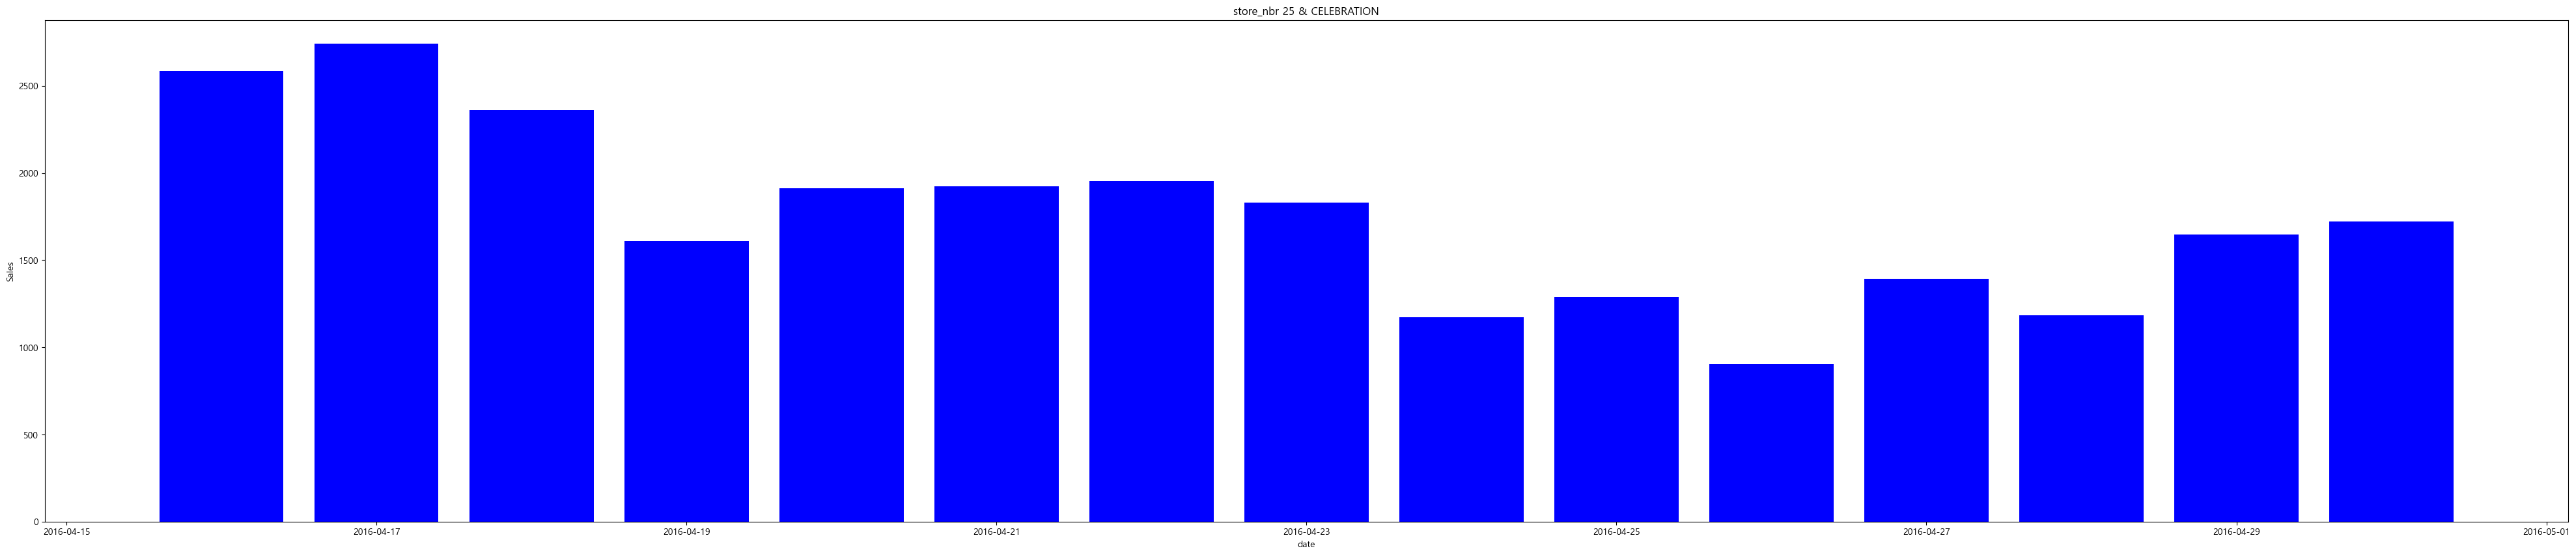

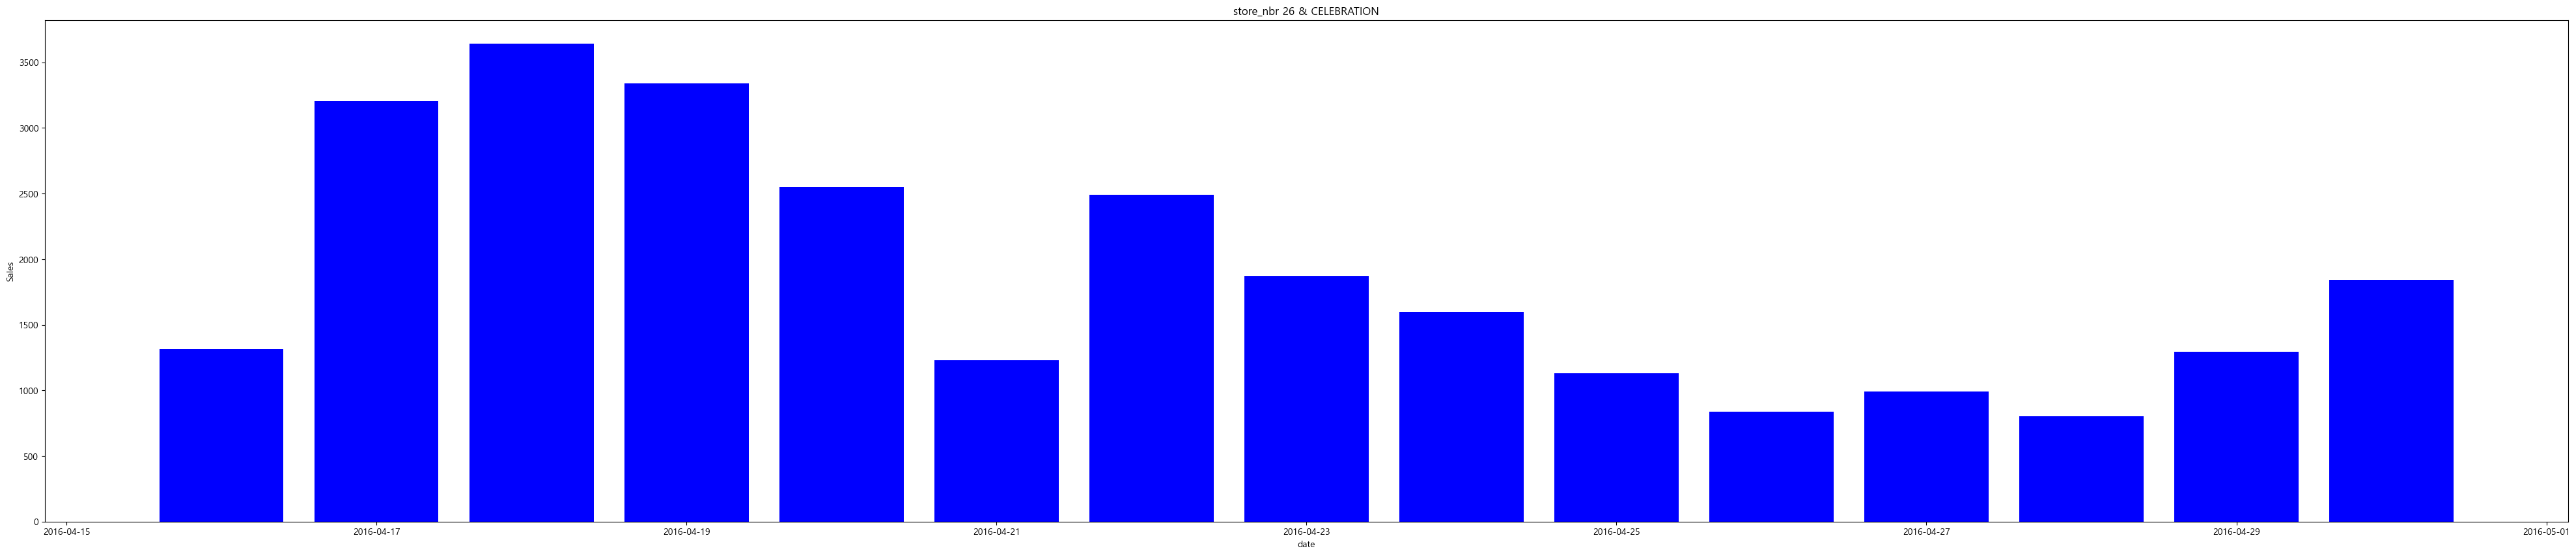

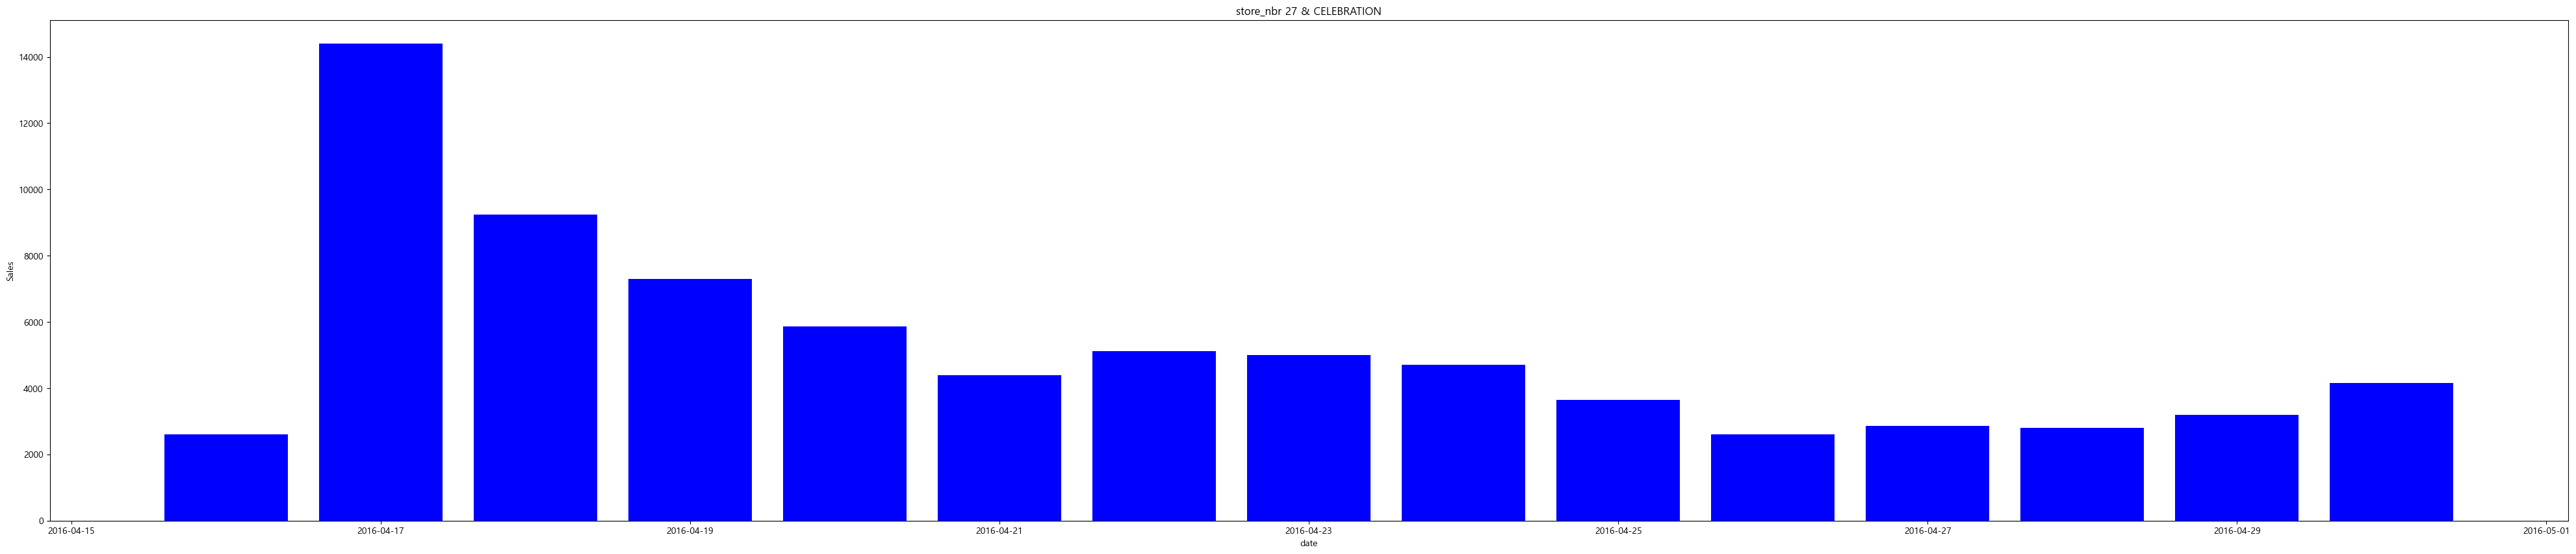

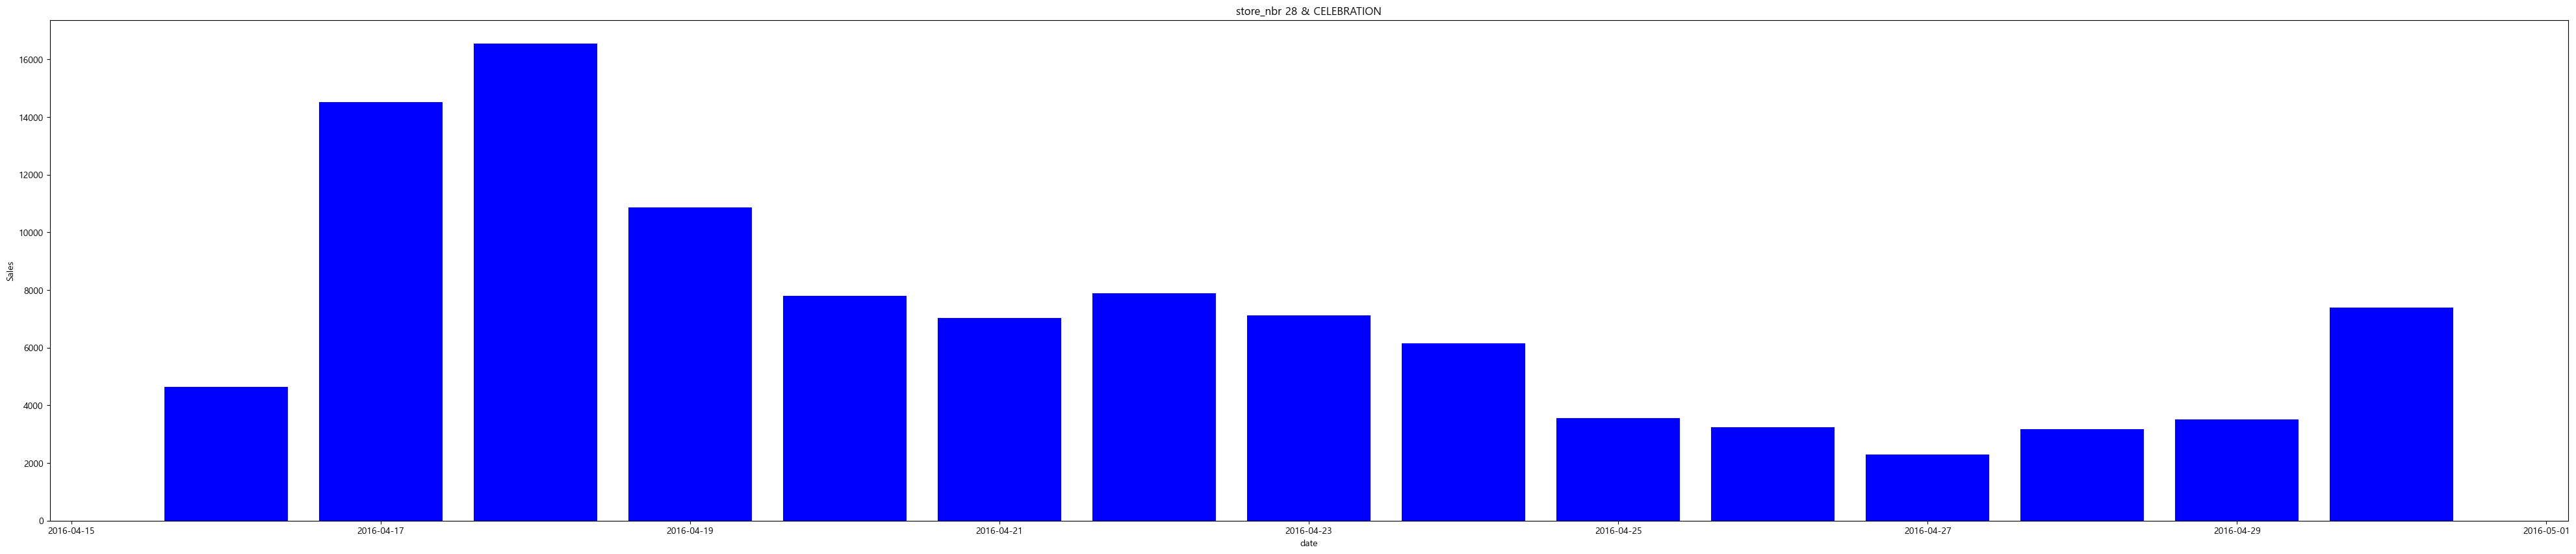

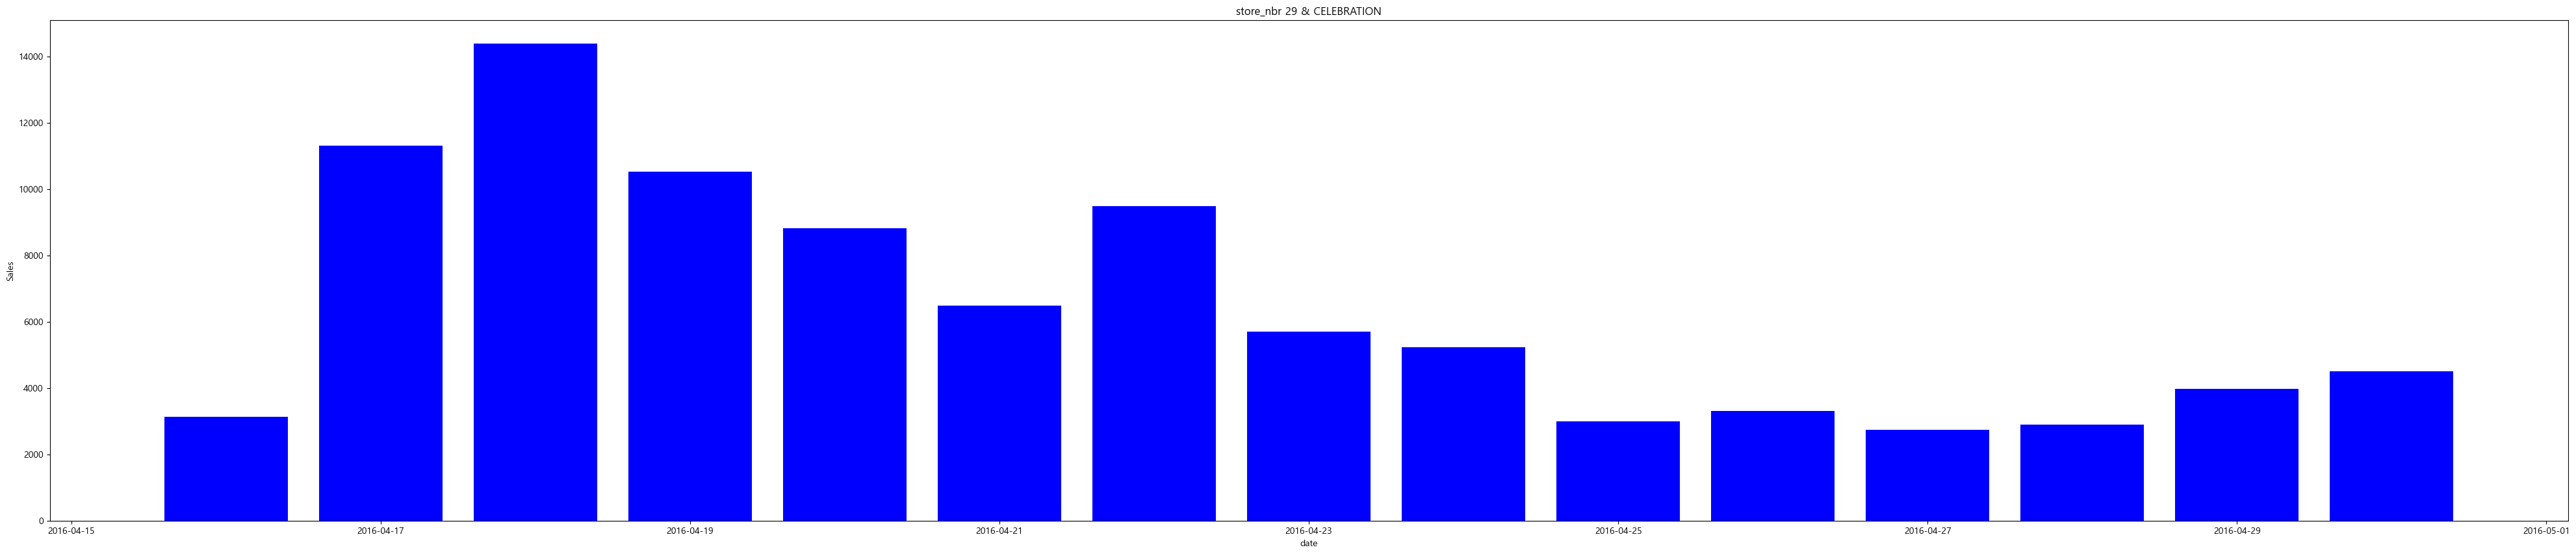

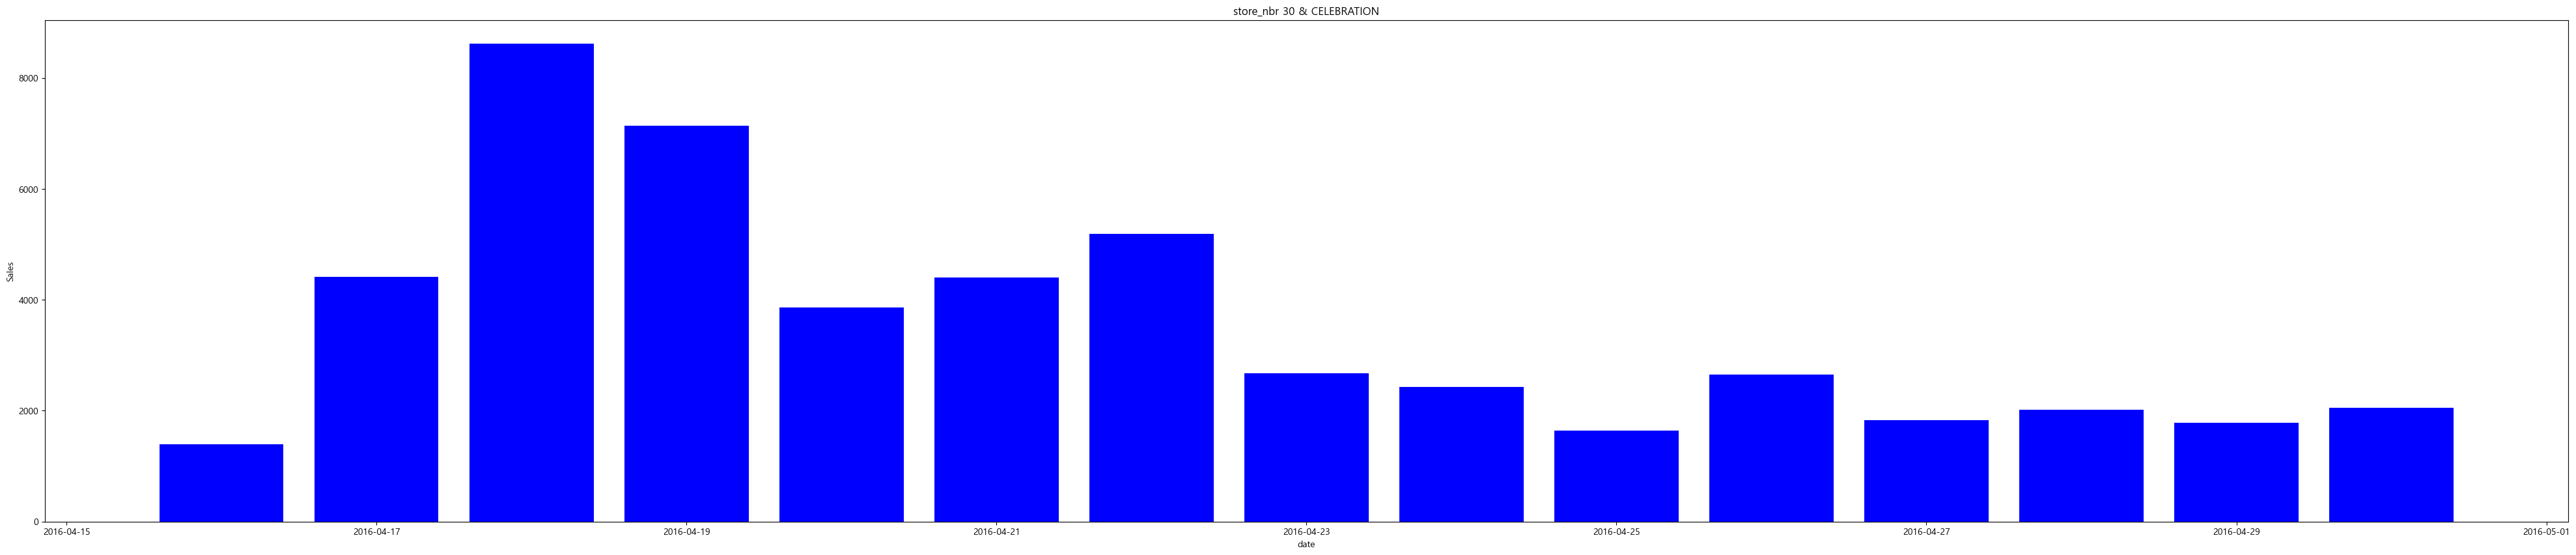

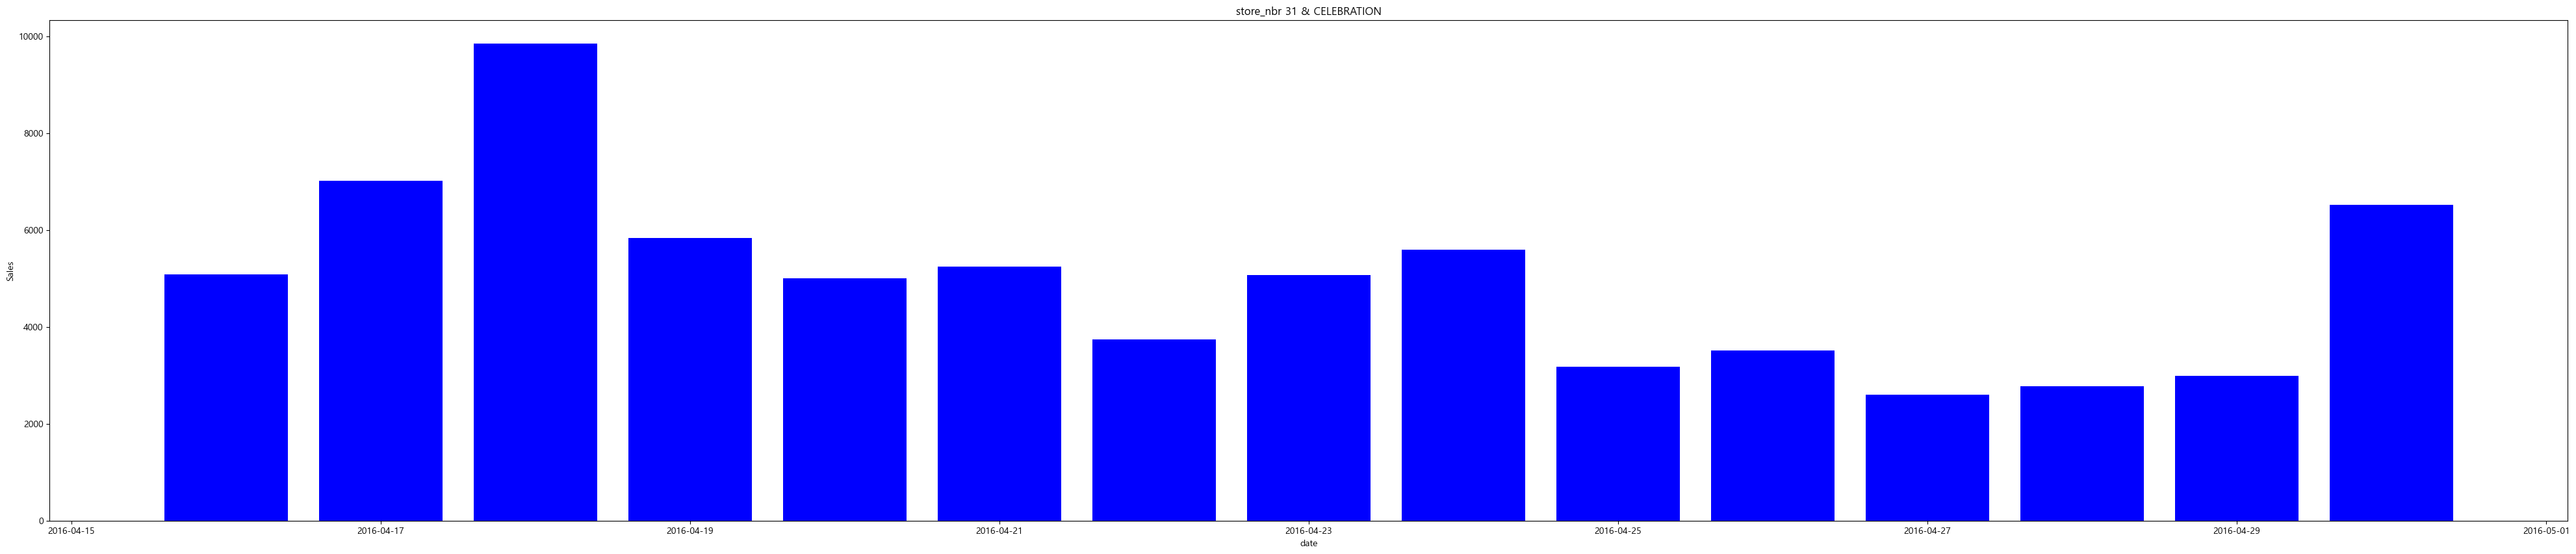

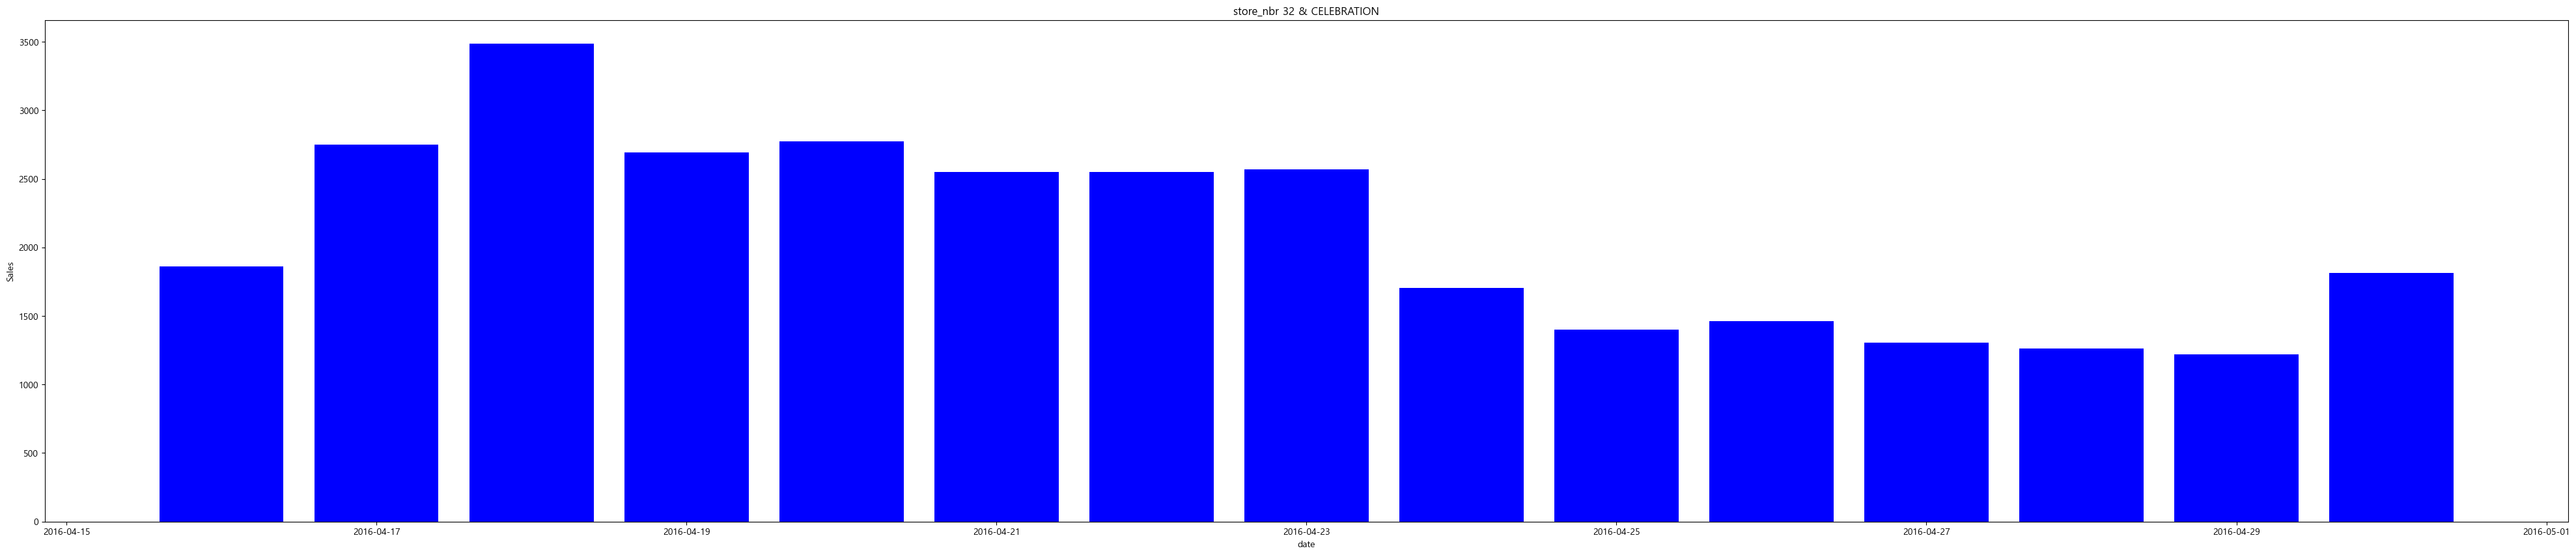

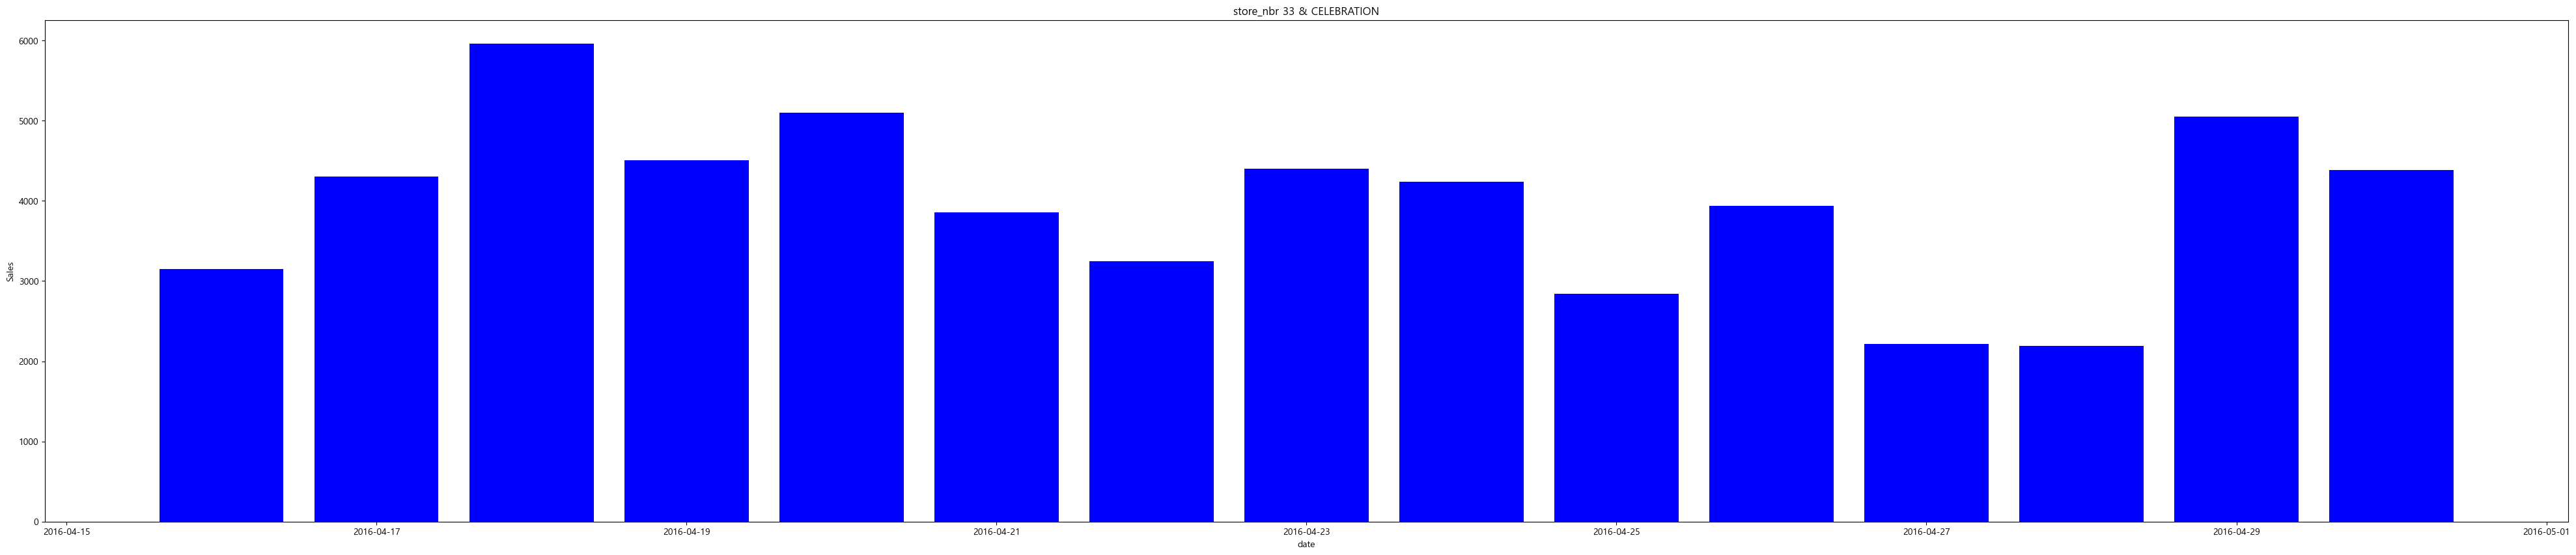

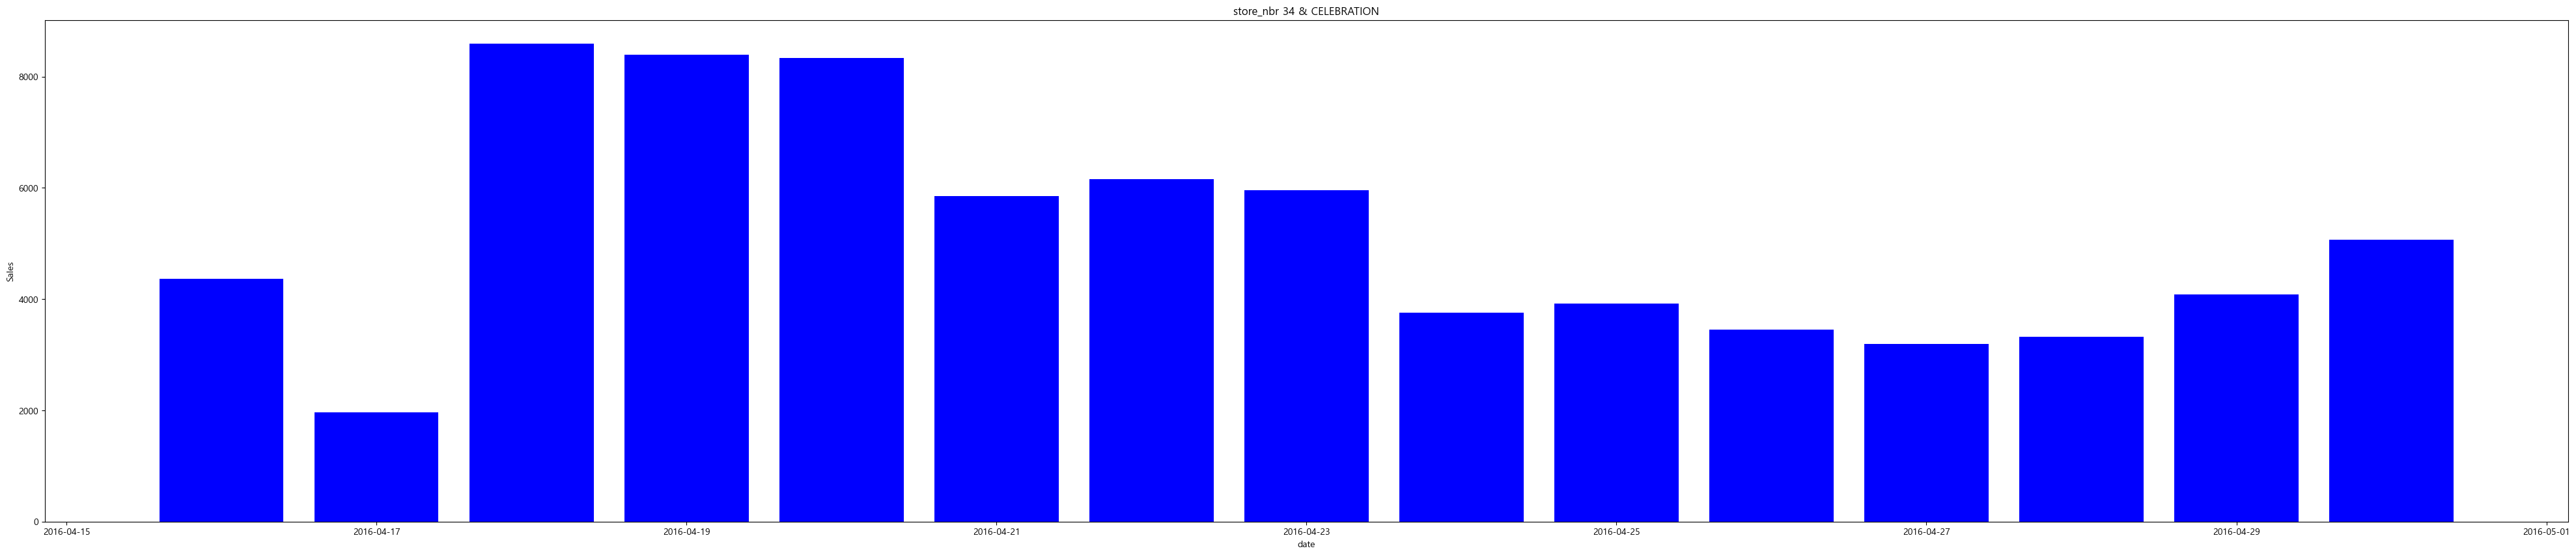

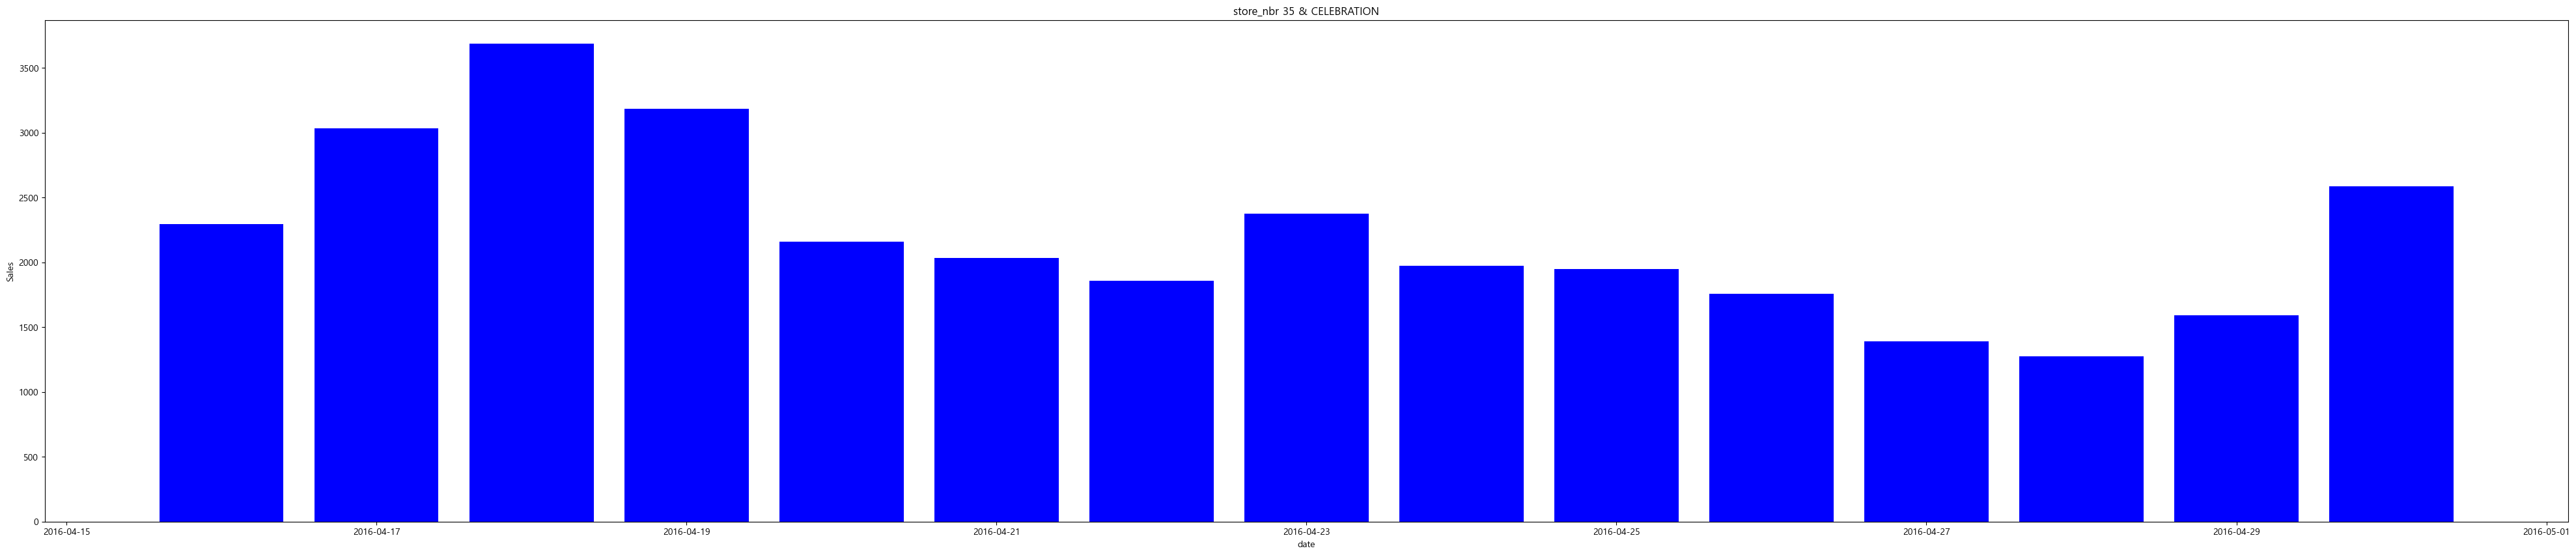

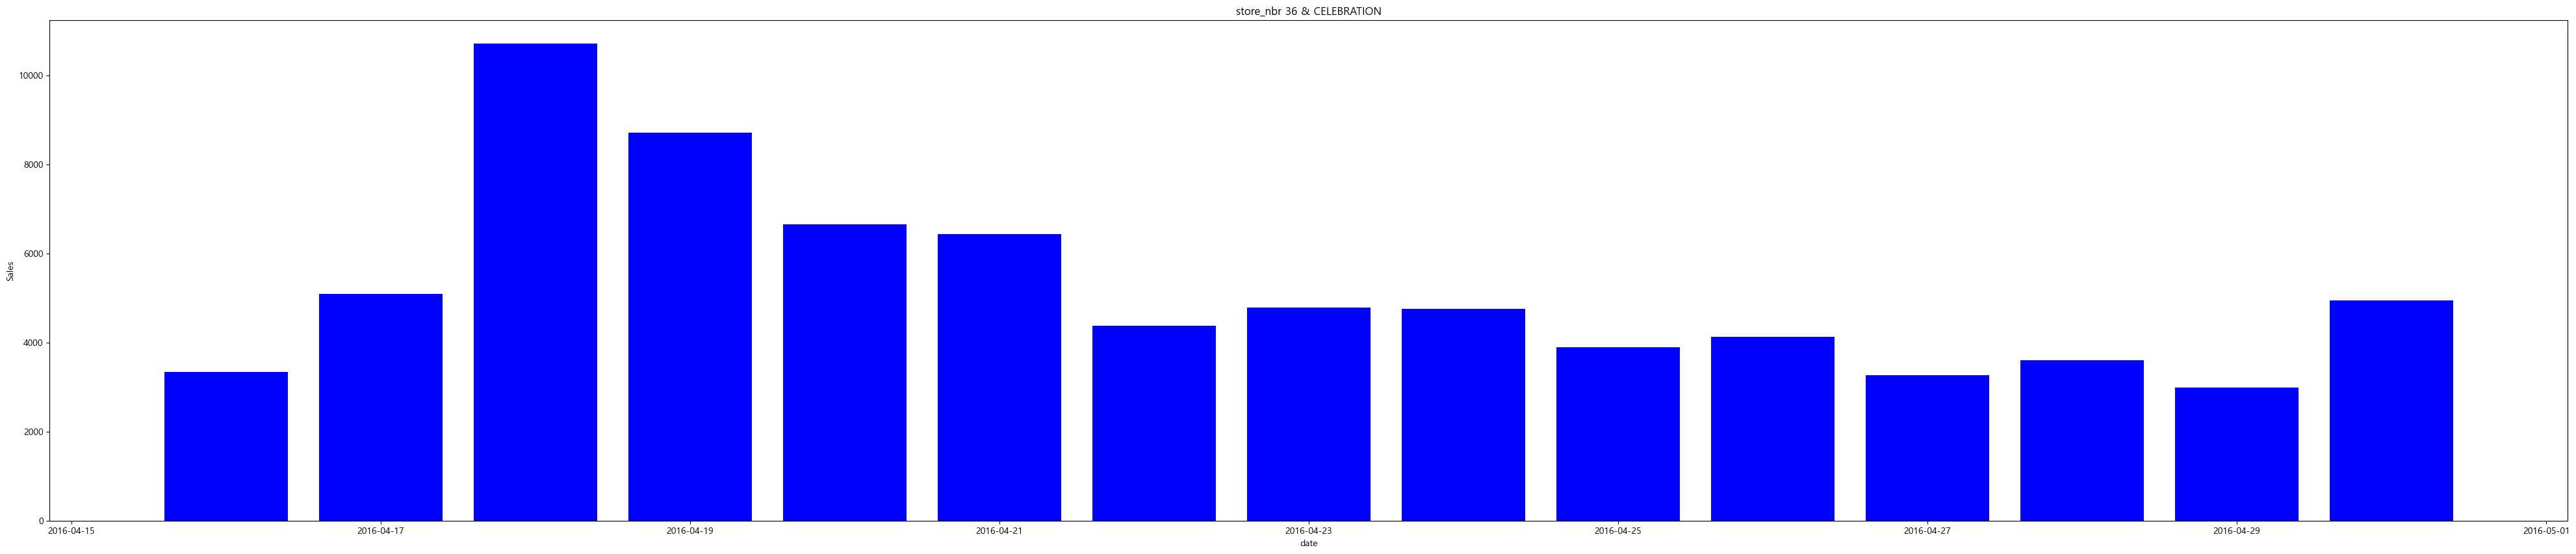

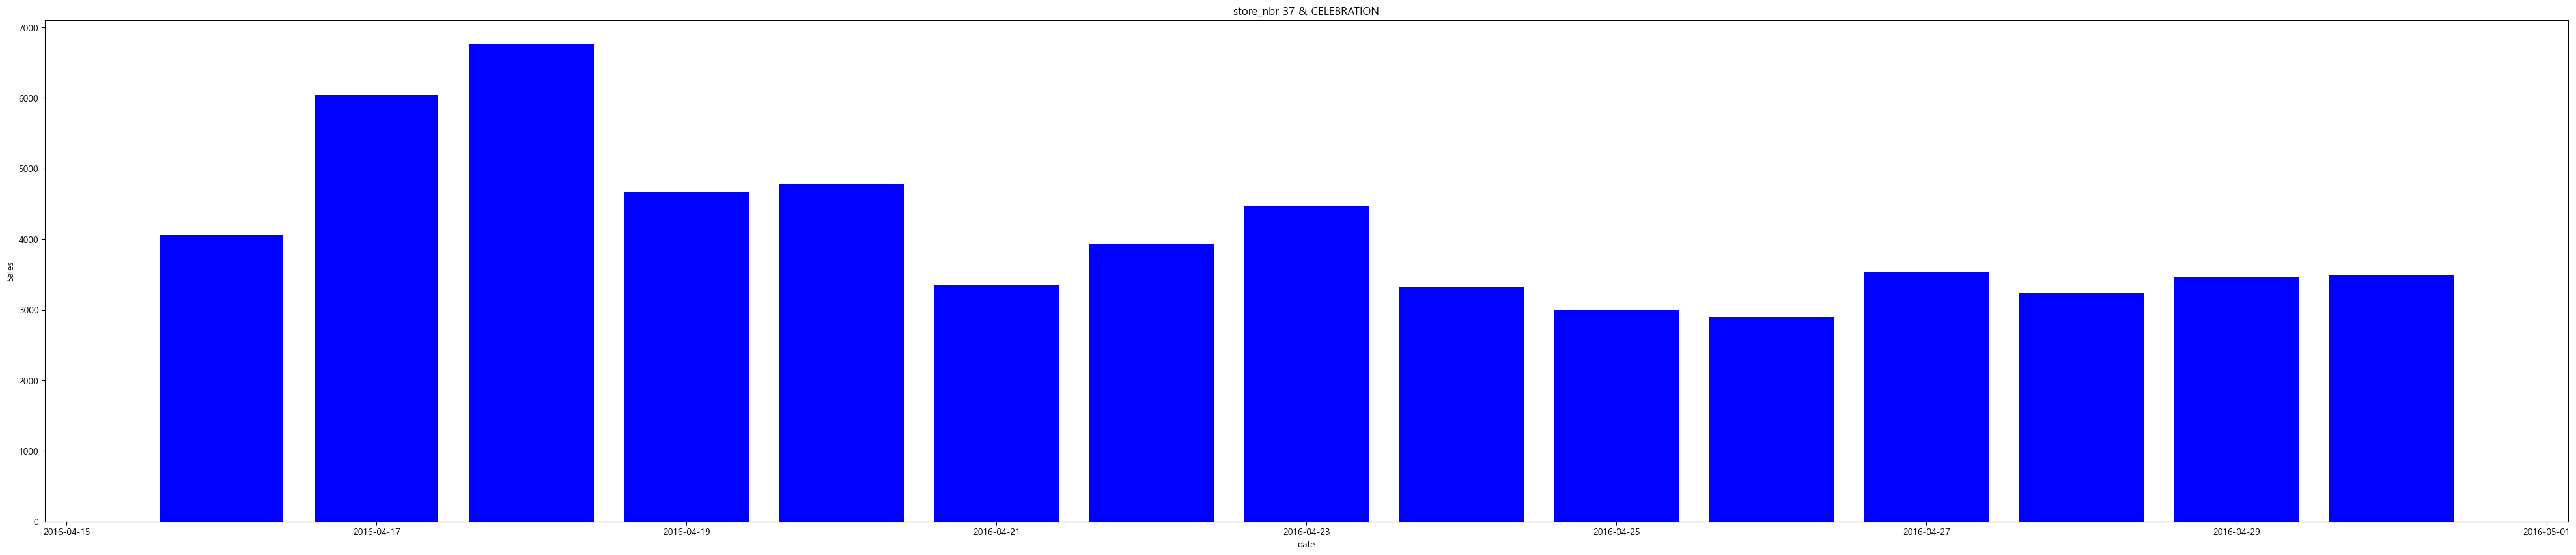

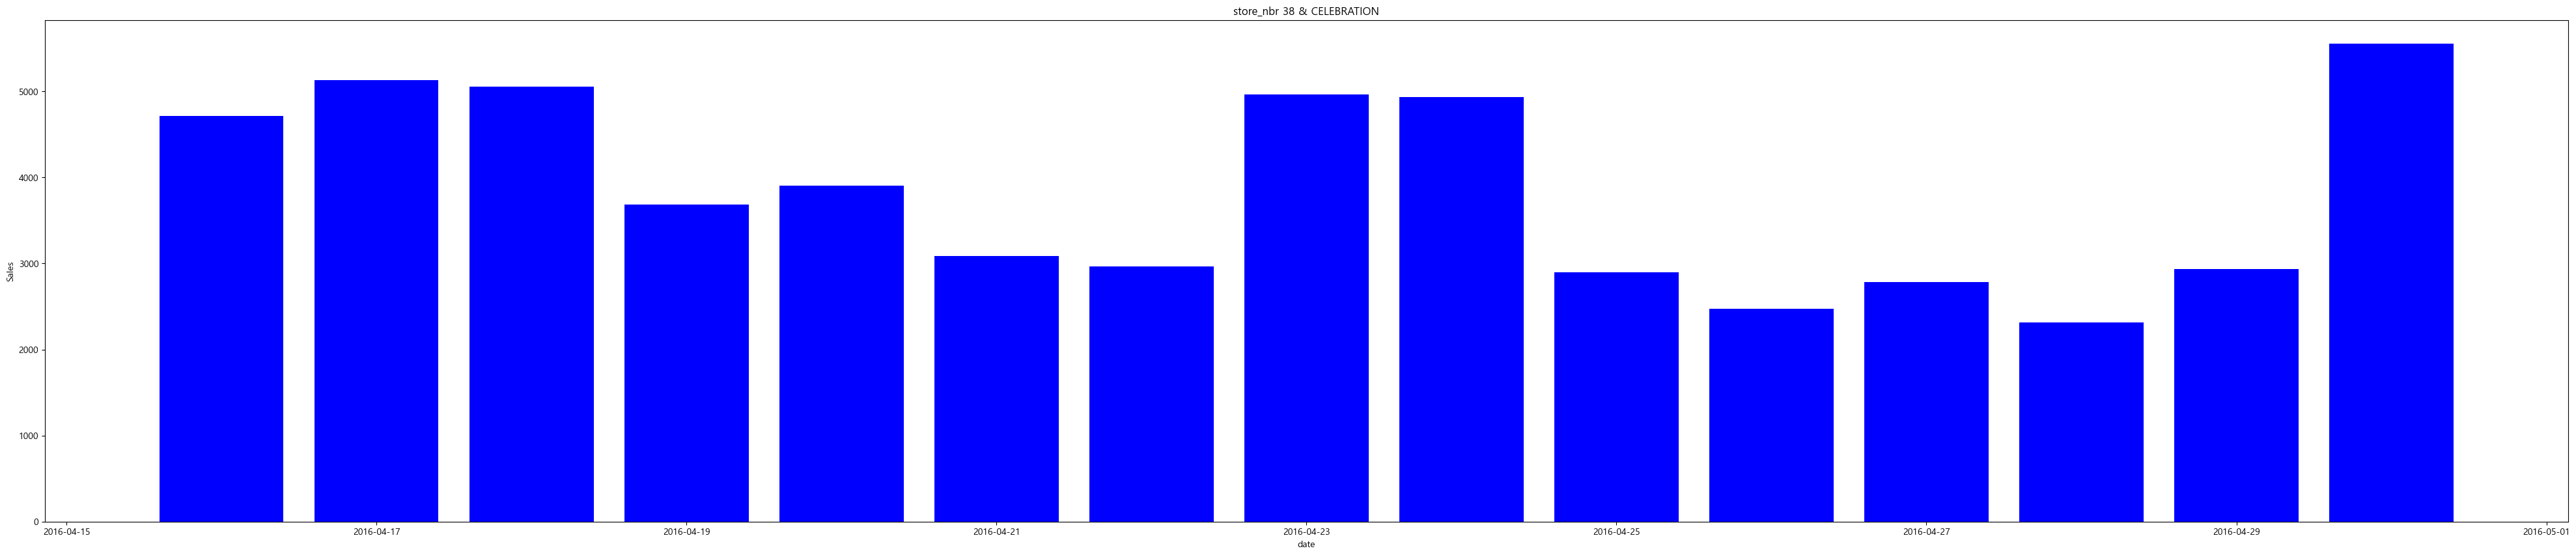

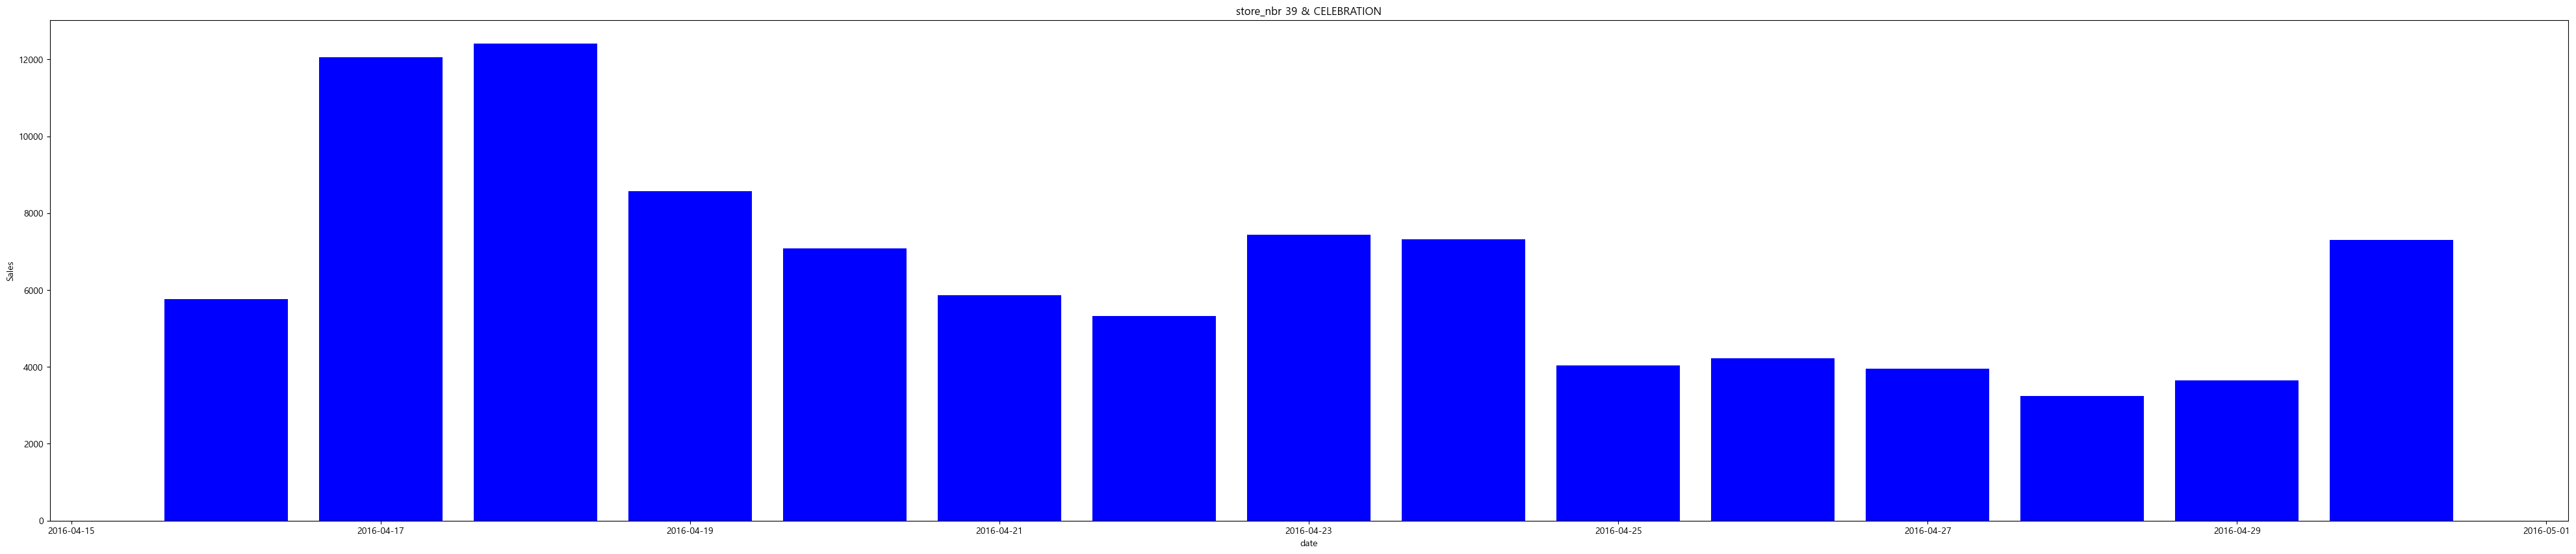

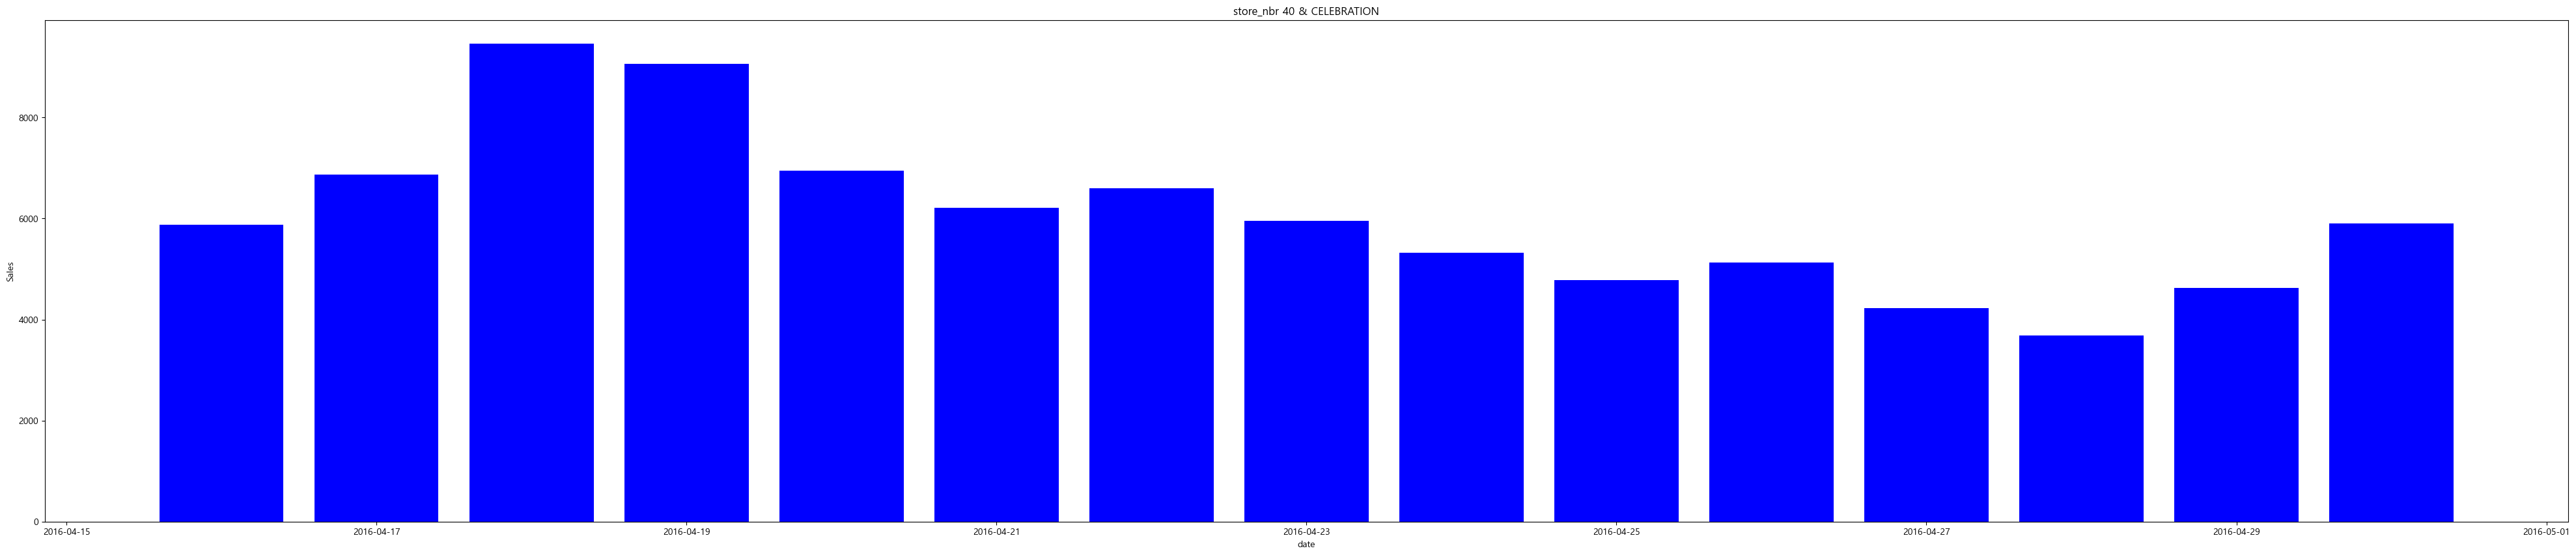

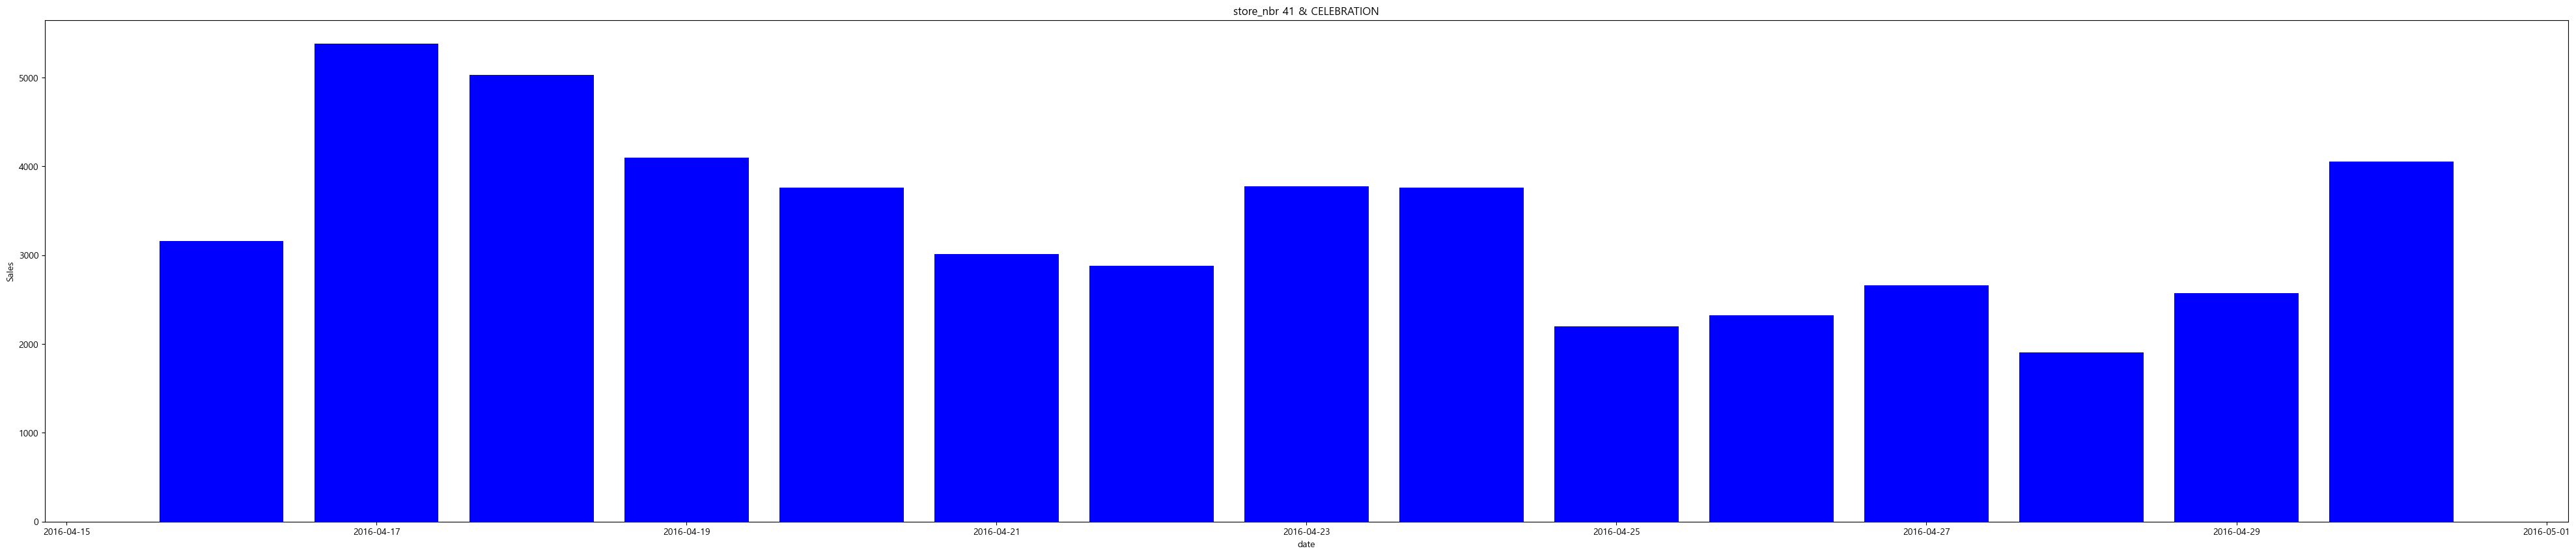

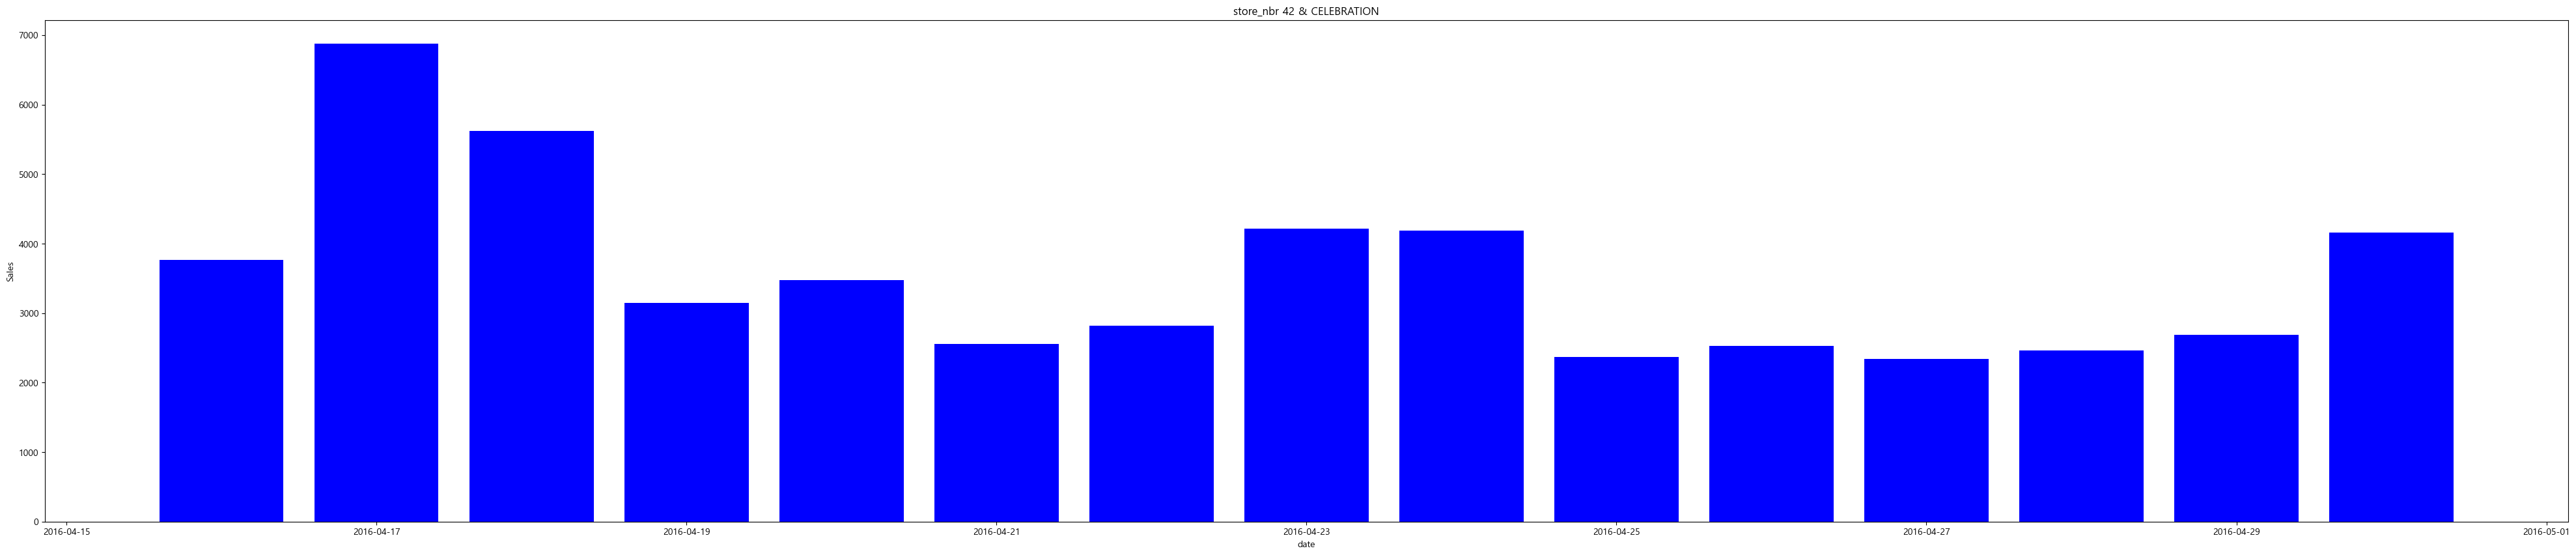

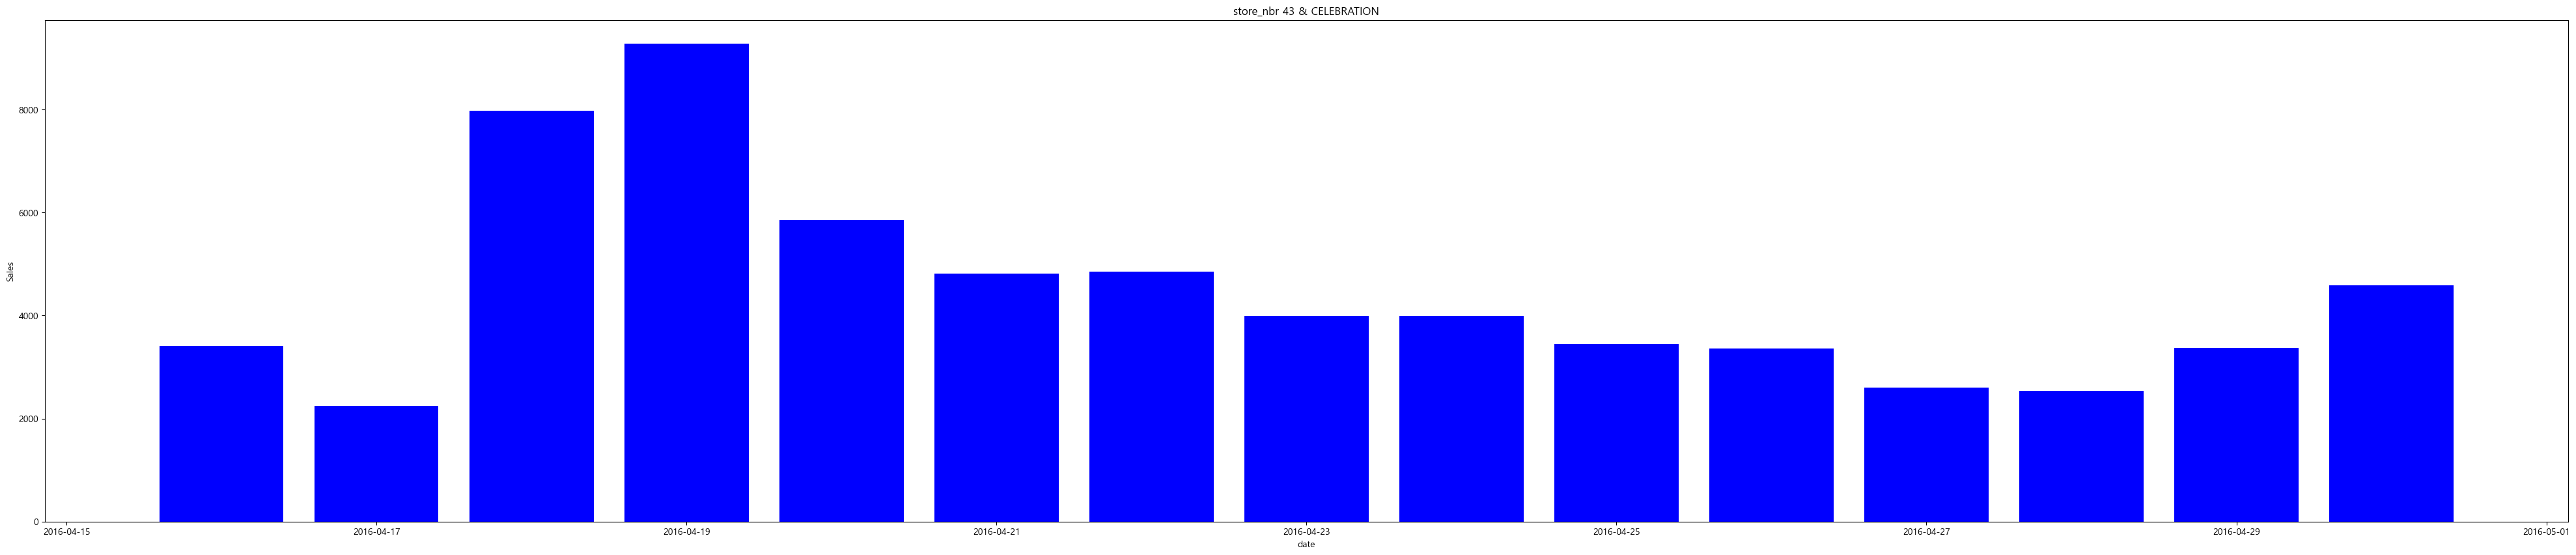

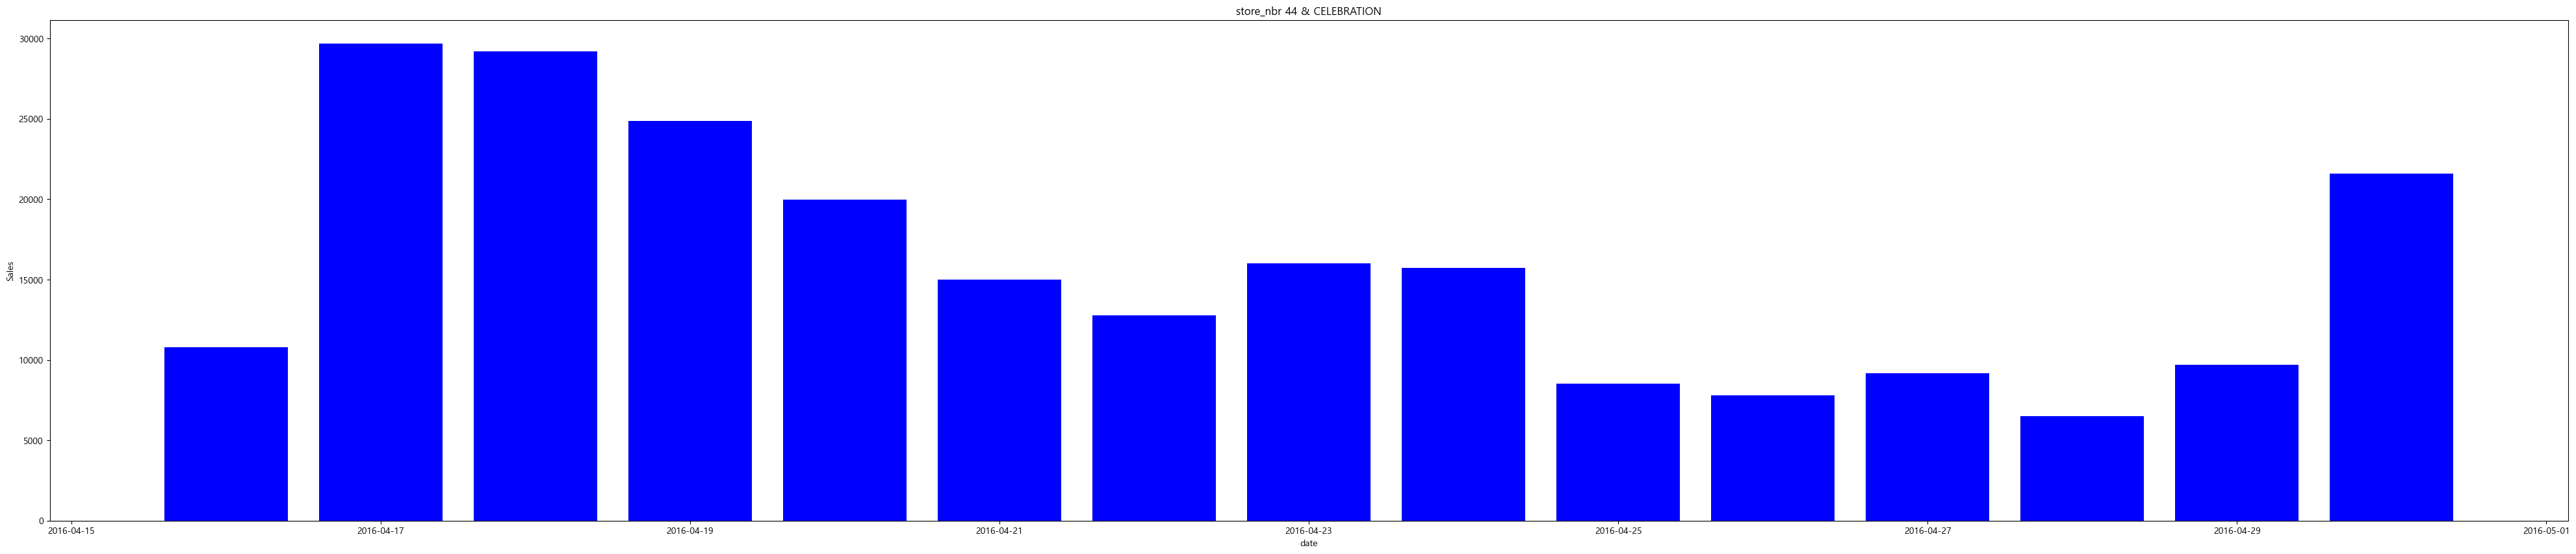

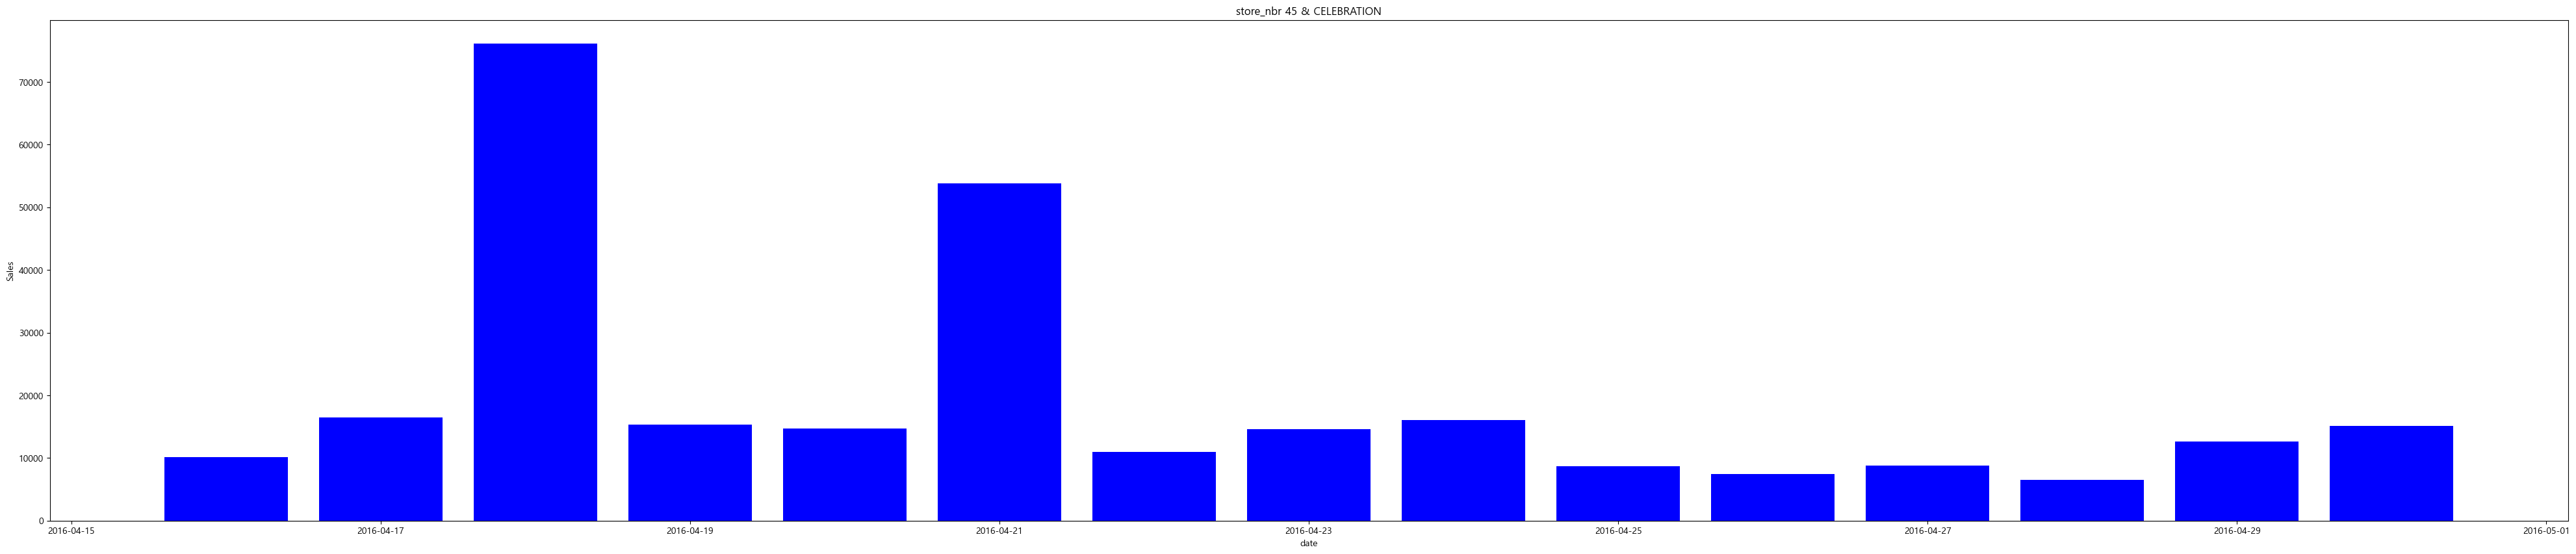

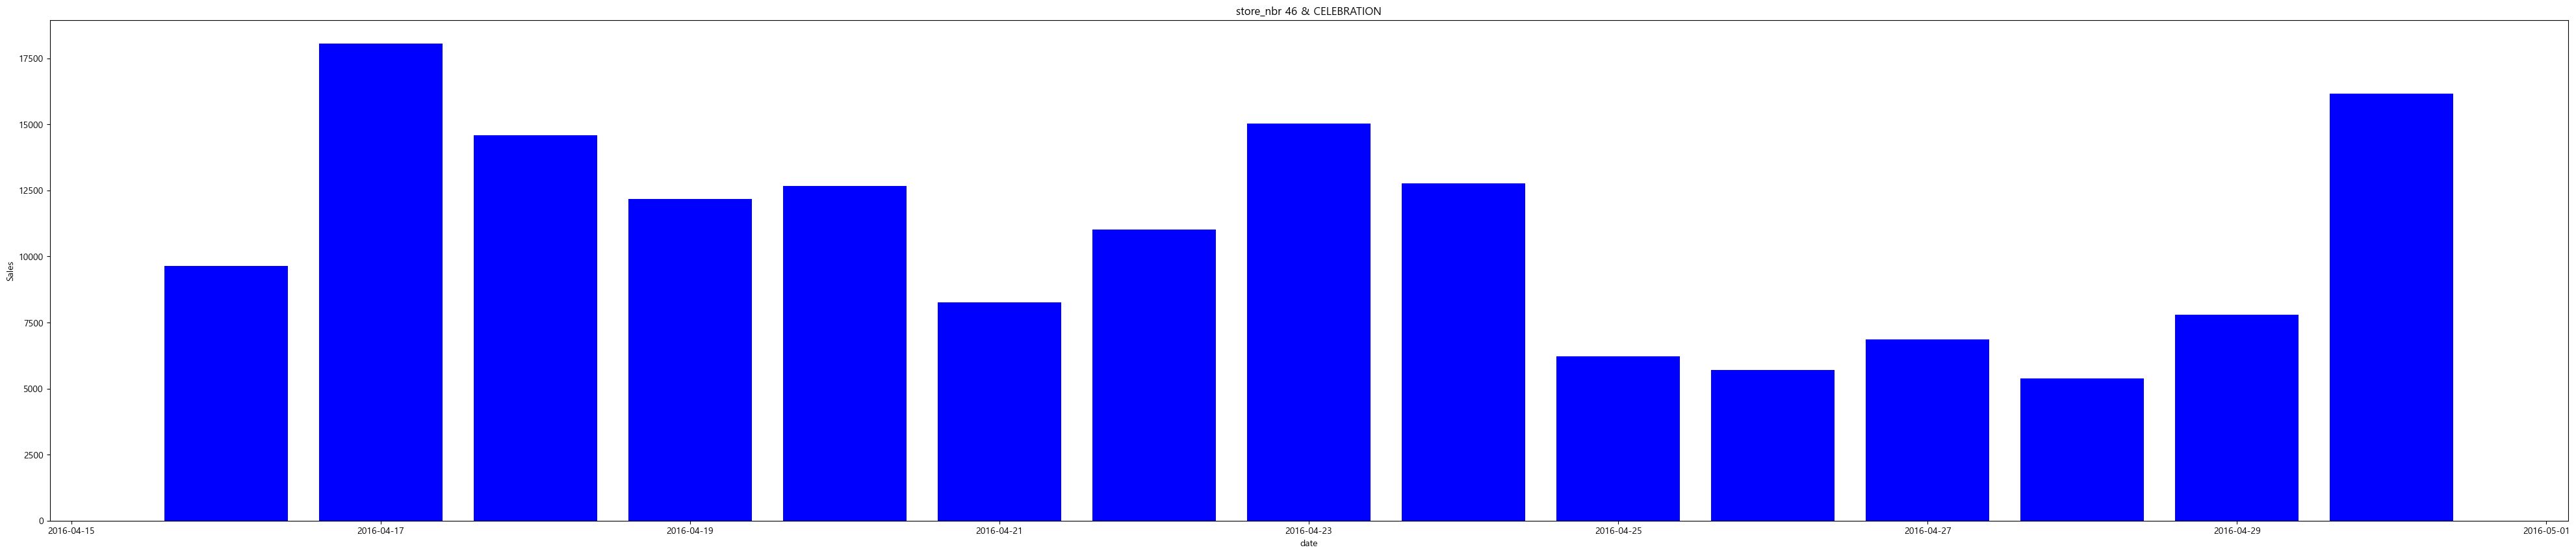

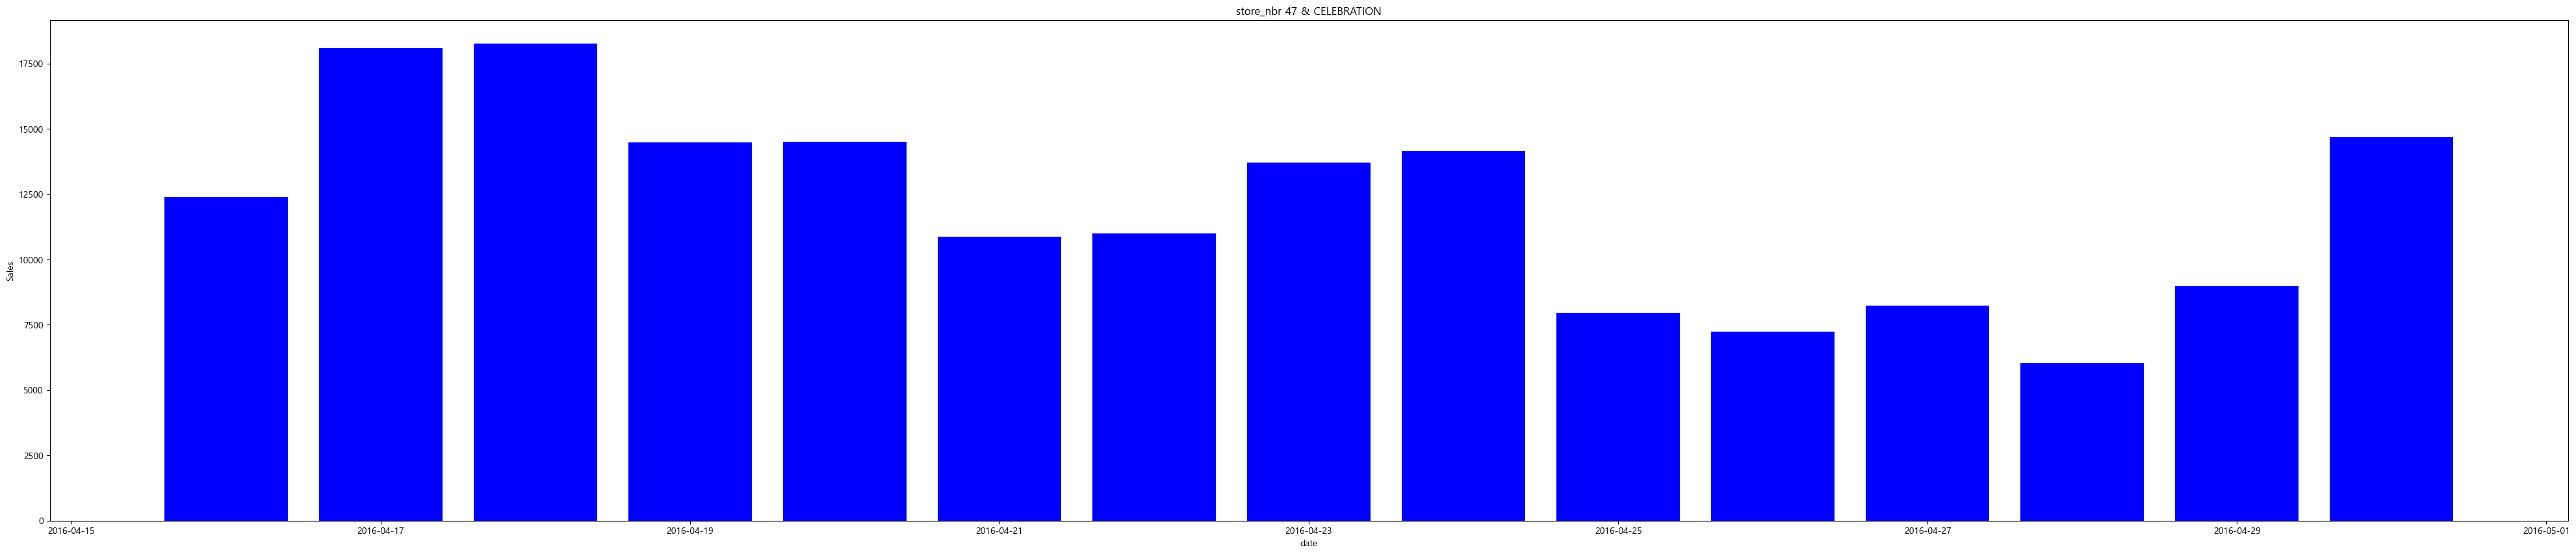

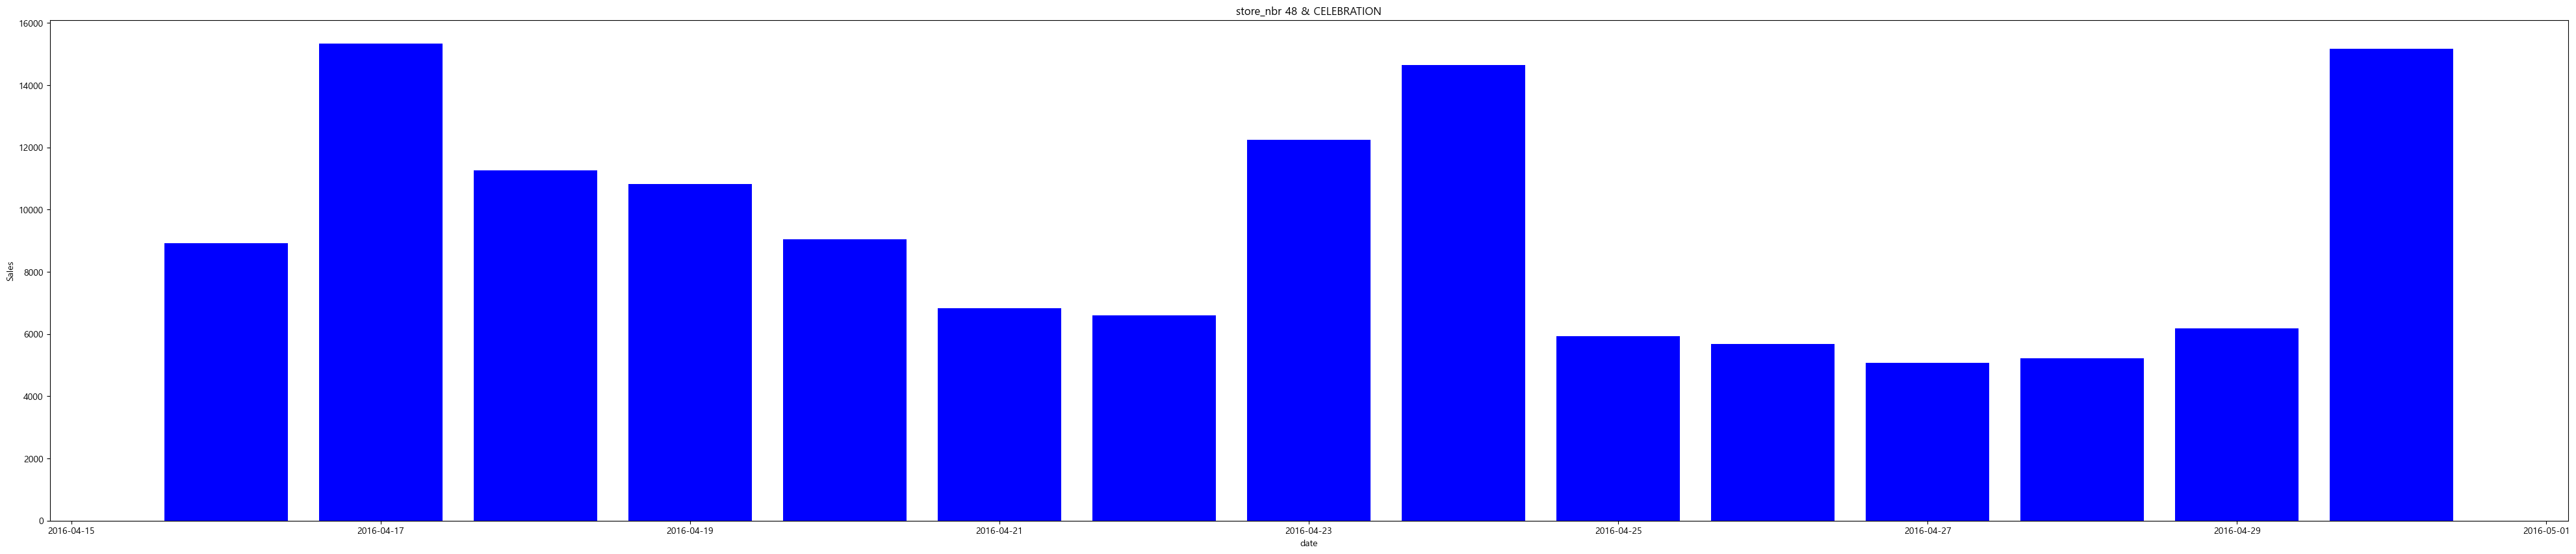

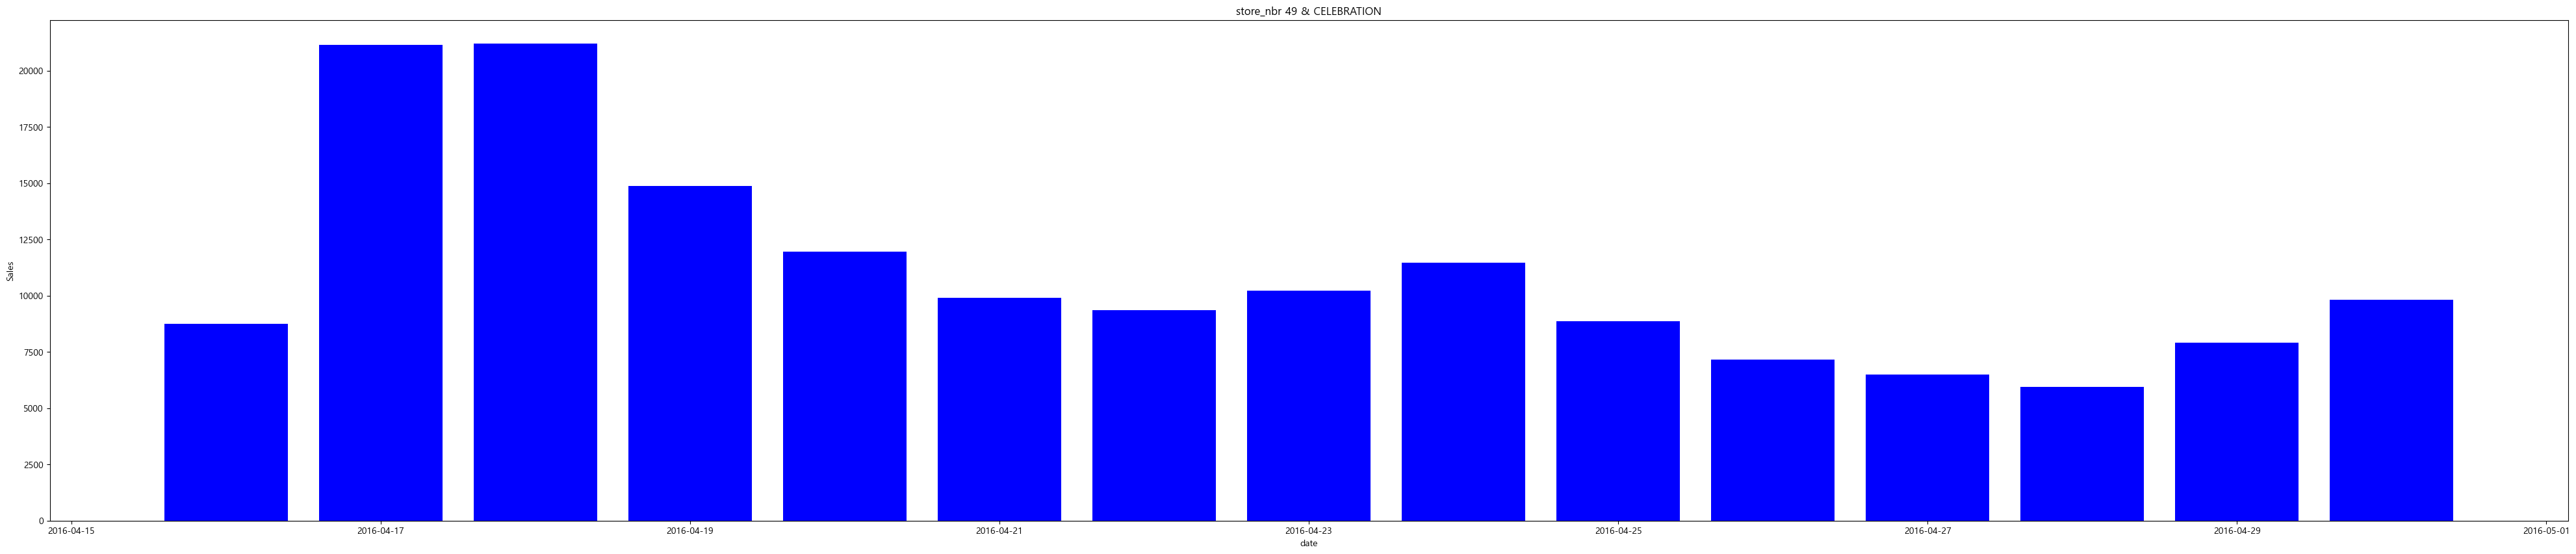

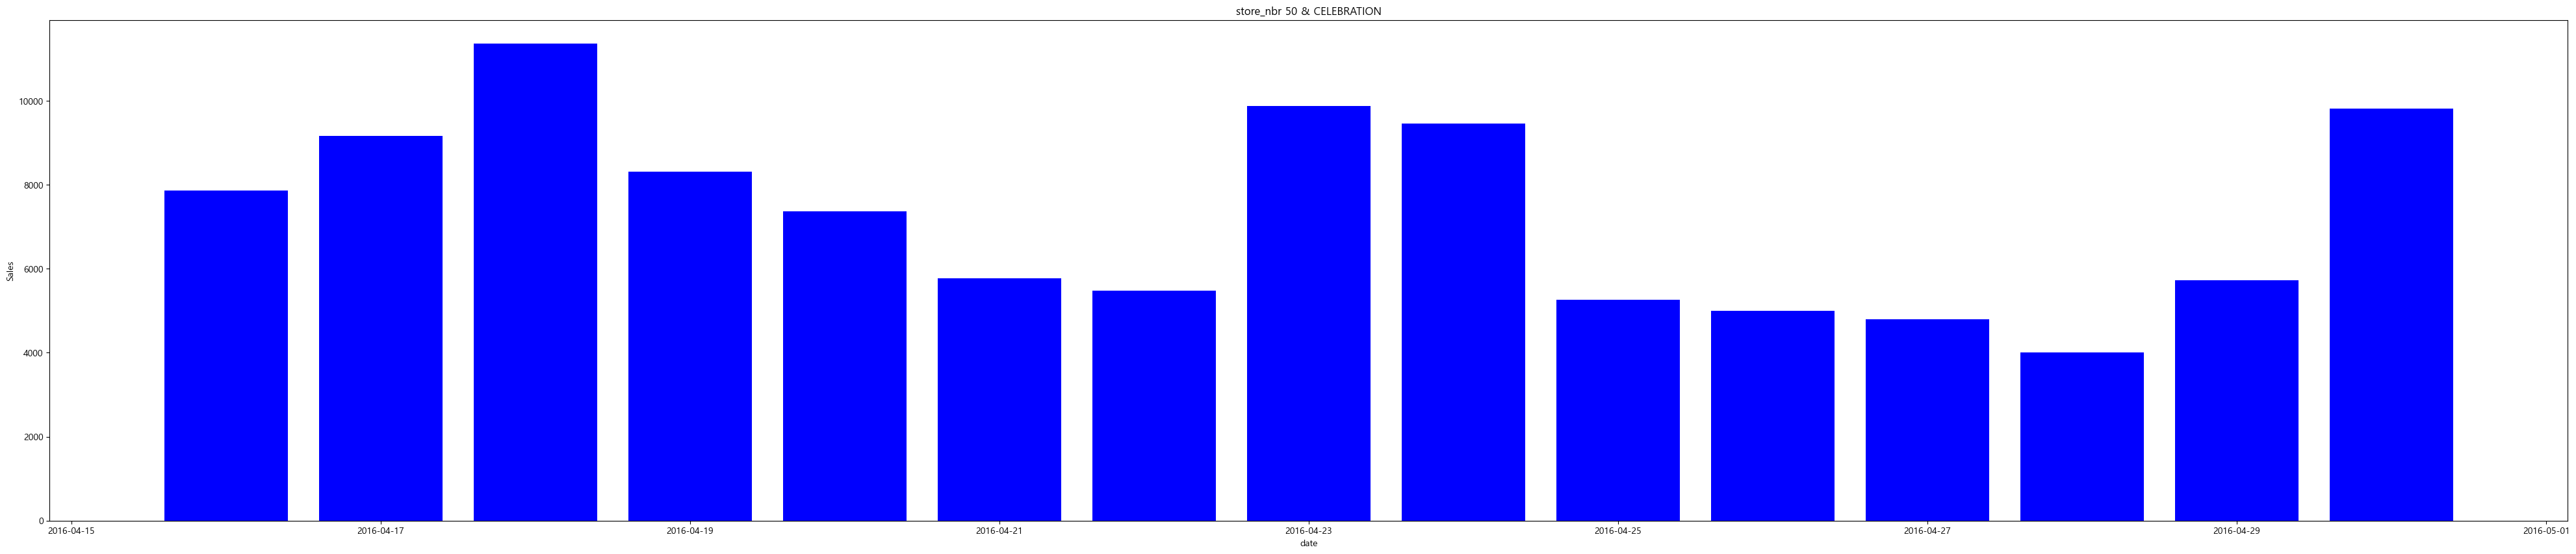

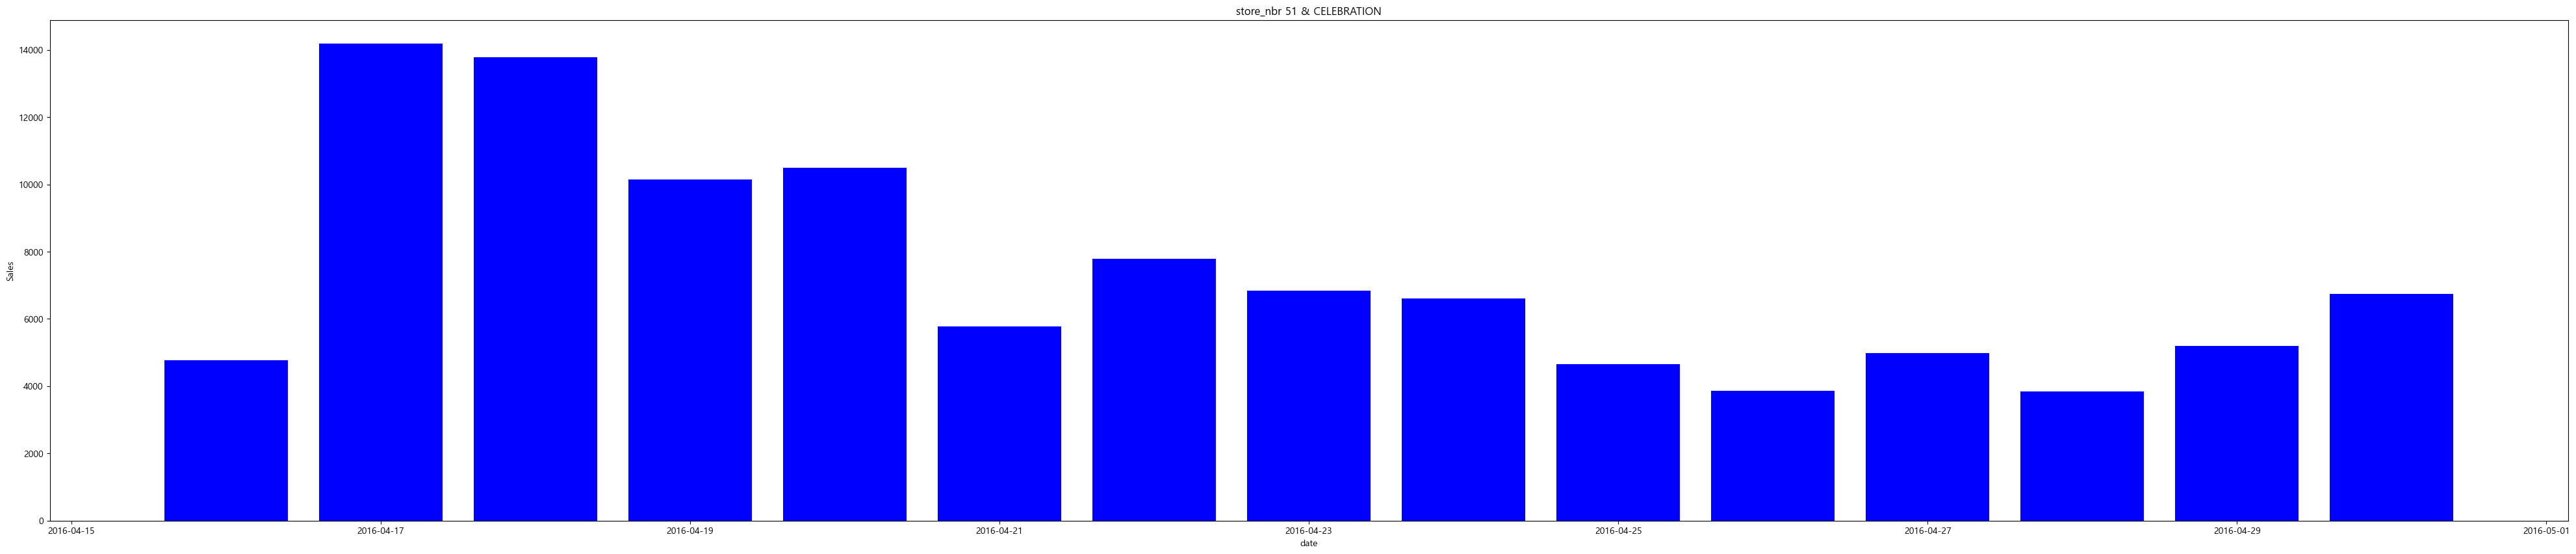

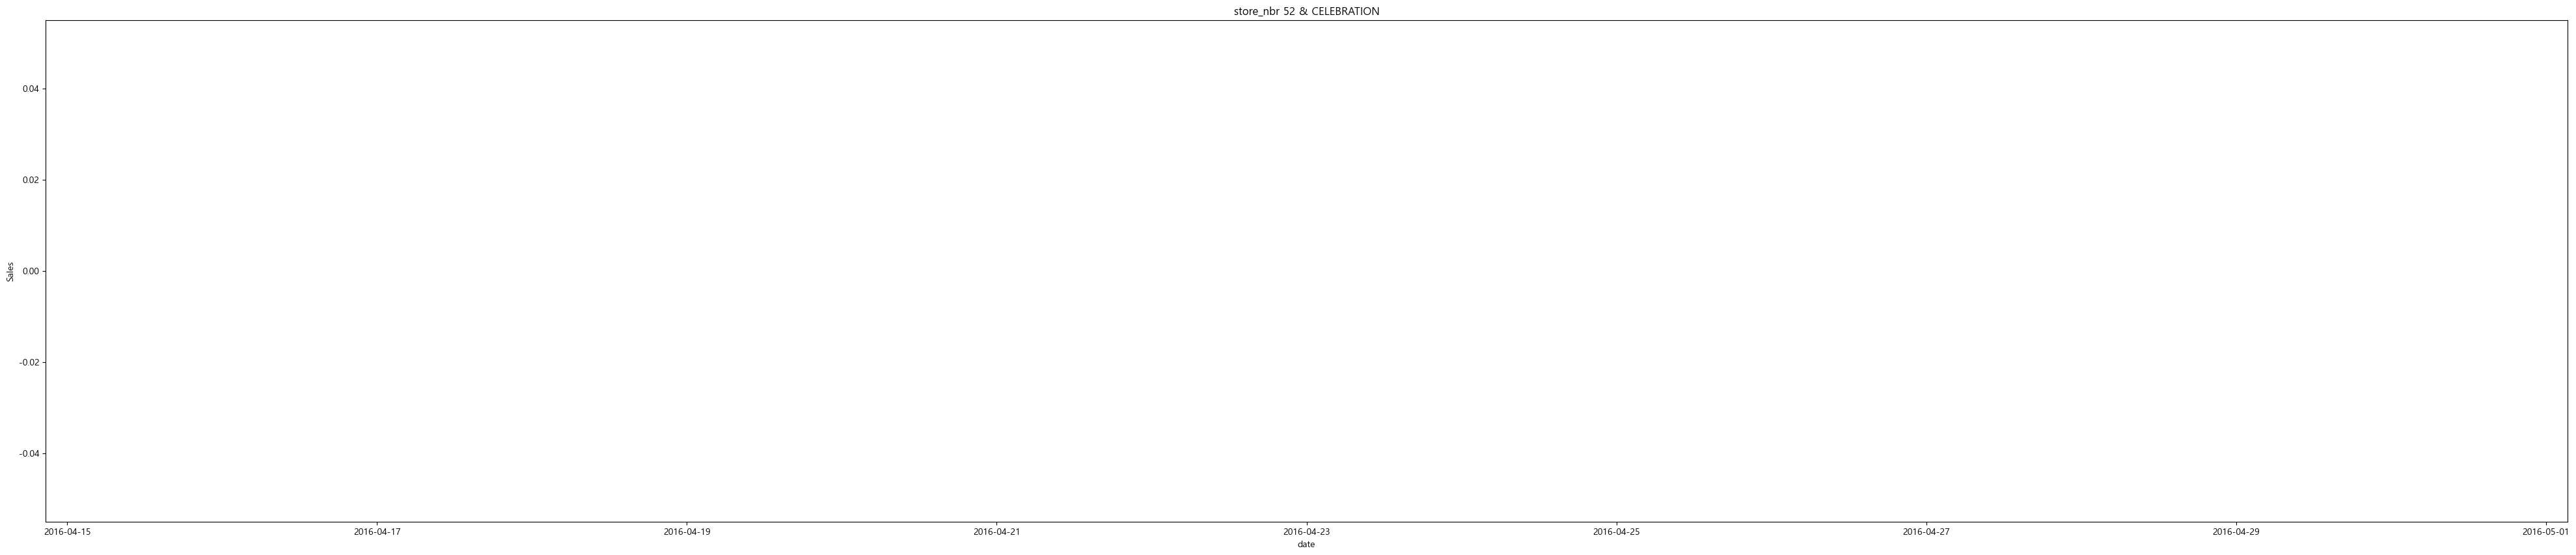

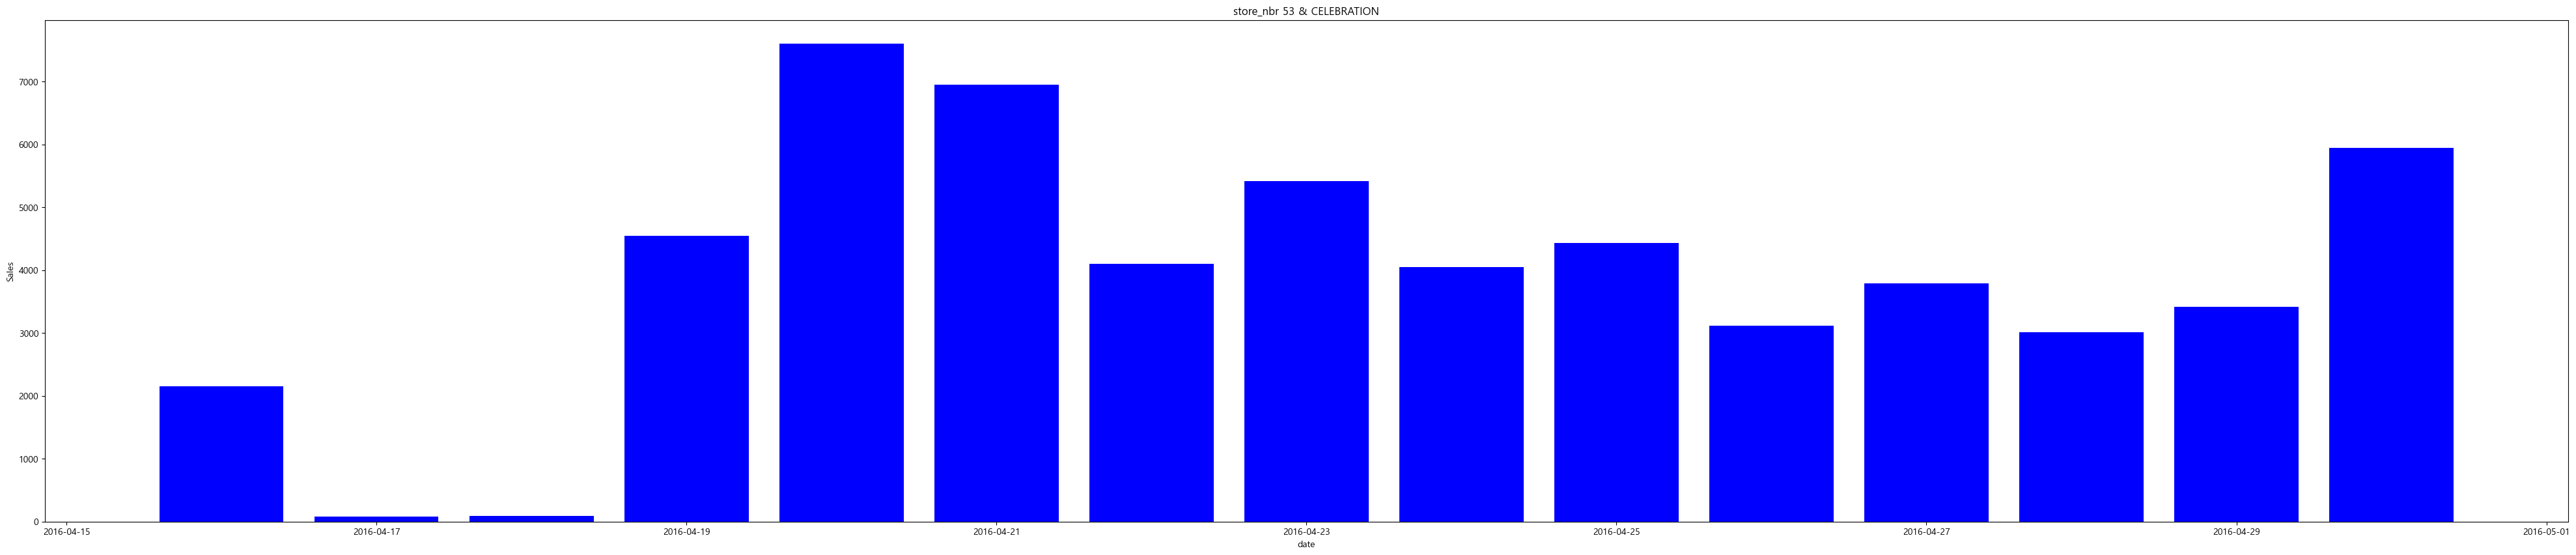

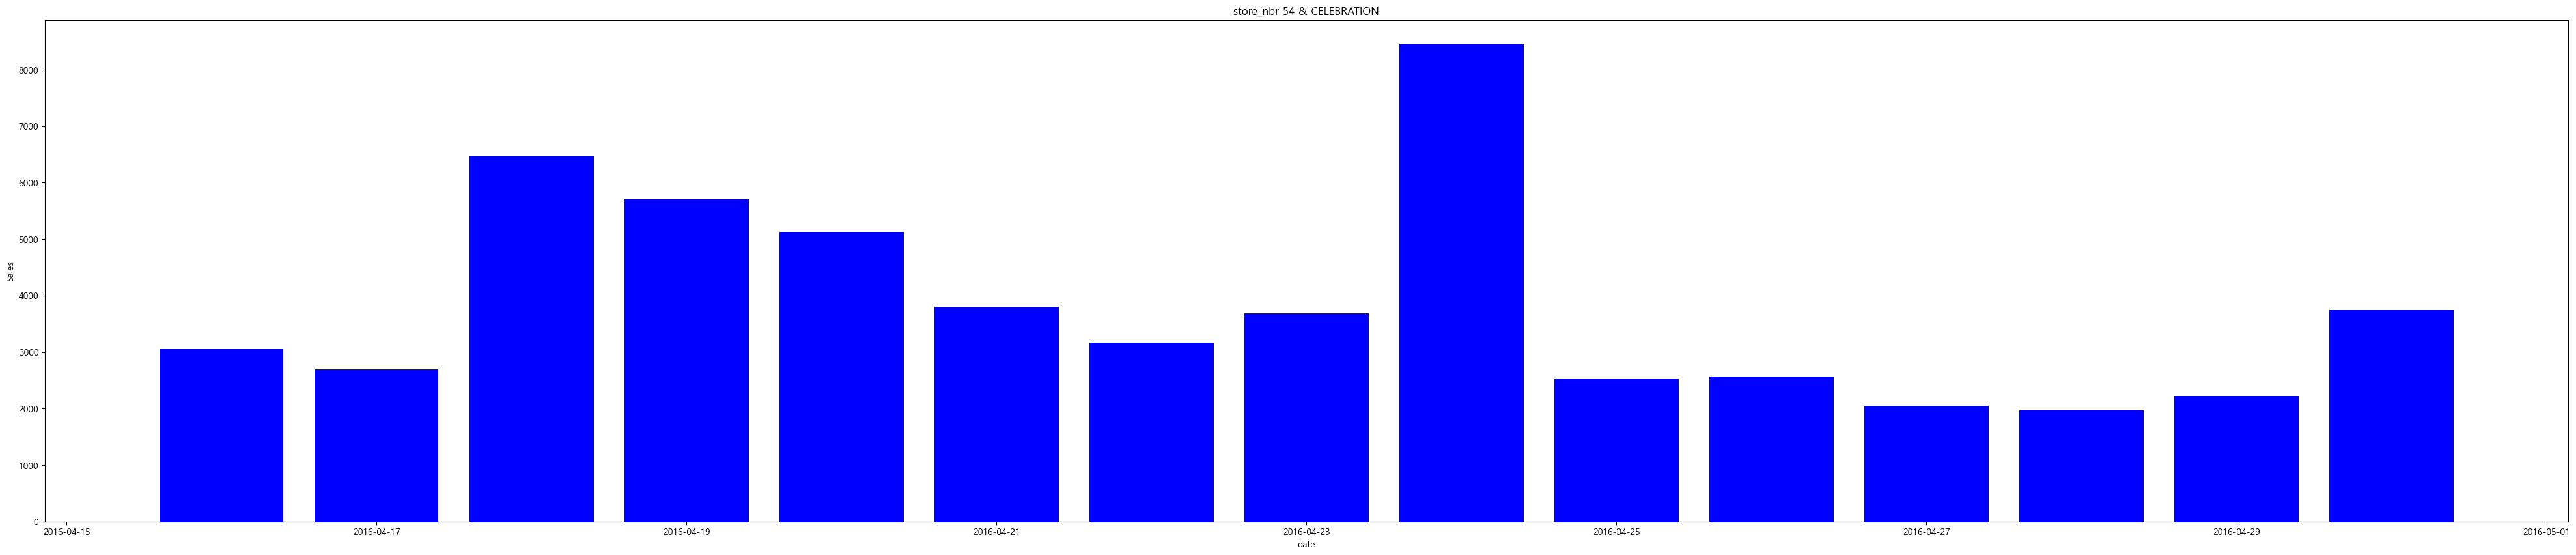

In [164]:
for i in range(1,55):

    filtered_data = findcrazy[(findcrazy['store_nbr']==i)]
    
    # 데이터 시각화
    plt.figure(figsize=(50, 10))
    plt.bar(filtered_data.date, filtered_data['sales'], color='blue')

    plt.xlabel('date')
    plt.ylabel('Sales')
    plt.title(f'store_nbr {i} & CELEBRATION')
    plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_4704\4274598981.py:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


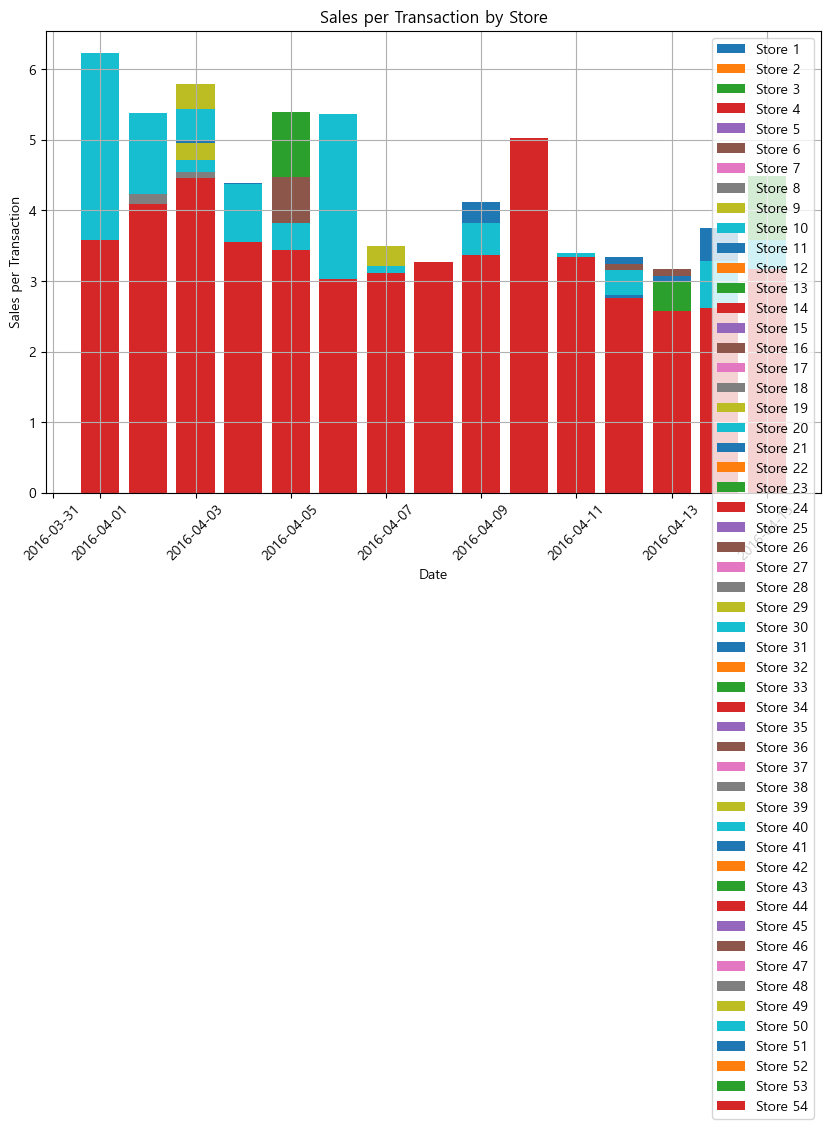

In [163]:
# 그래프 그리기
plt.figure(figsize=(10, 6))
# resultnormal
# resultcrazy
for column in resultnormal.columns:
    plt.bar(resultnormal.index, resultnormal[column], label=f'Store {column}')

plt.xlabel('Date')
plt.ylabel('Sales per Transaction')
plt.title('Sales per Transaction by Store')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# 그래프 출력
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_4704\3862938913.py:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


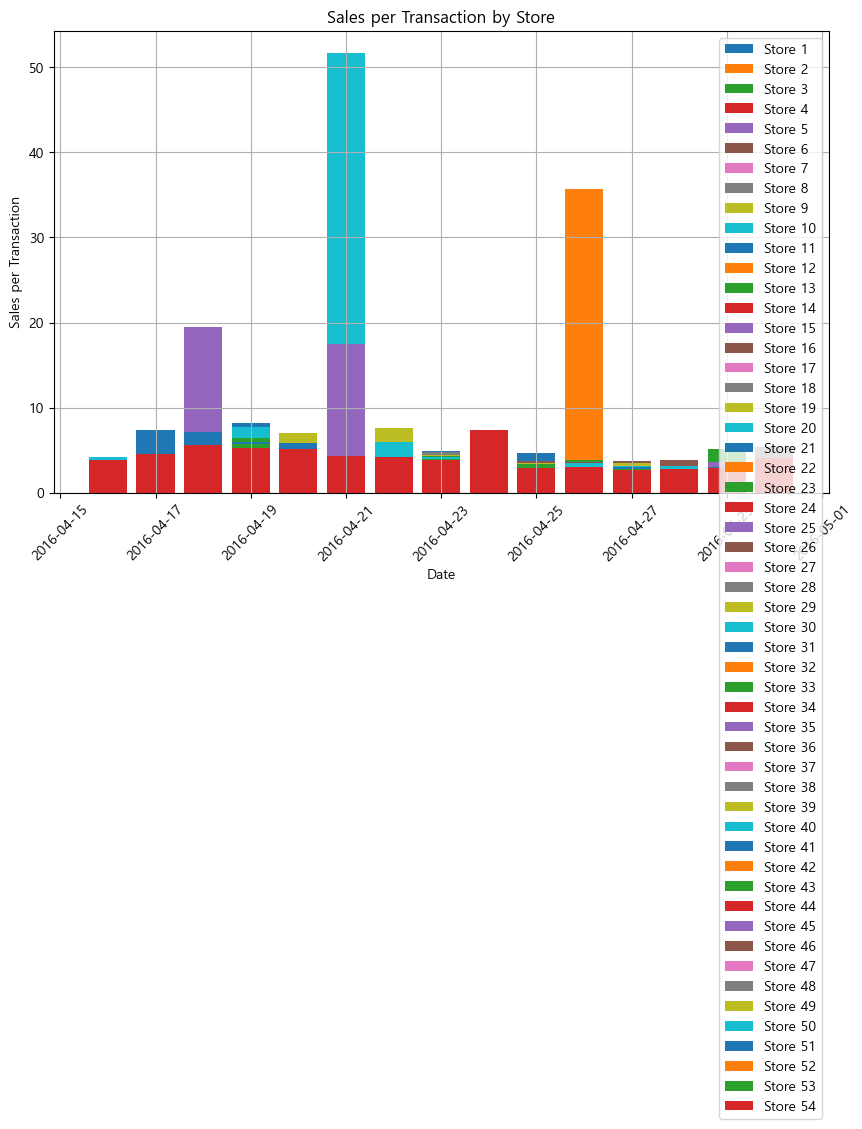

In [162]:
# 그래프 그리기
plt.figure(figsize=(10, 6))
# resultnormal
# resultcrazy
for column in resultcrazy.columns:
    plt.bar(resultcrazy.index, resultcrazy[column], label=f'Store {column}')

plt.xlabel('Date')
plt.ylabel('Sales per Transaction')
plt.title('Sales per Transaction by Store')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# 그래프 출력
plt.show()

## 이상치 탐색: 1, CELEBRATION

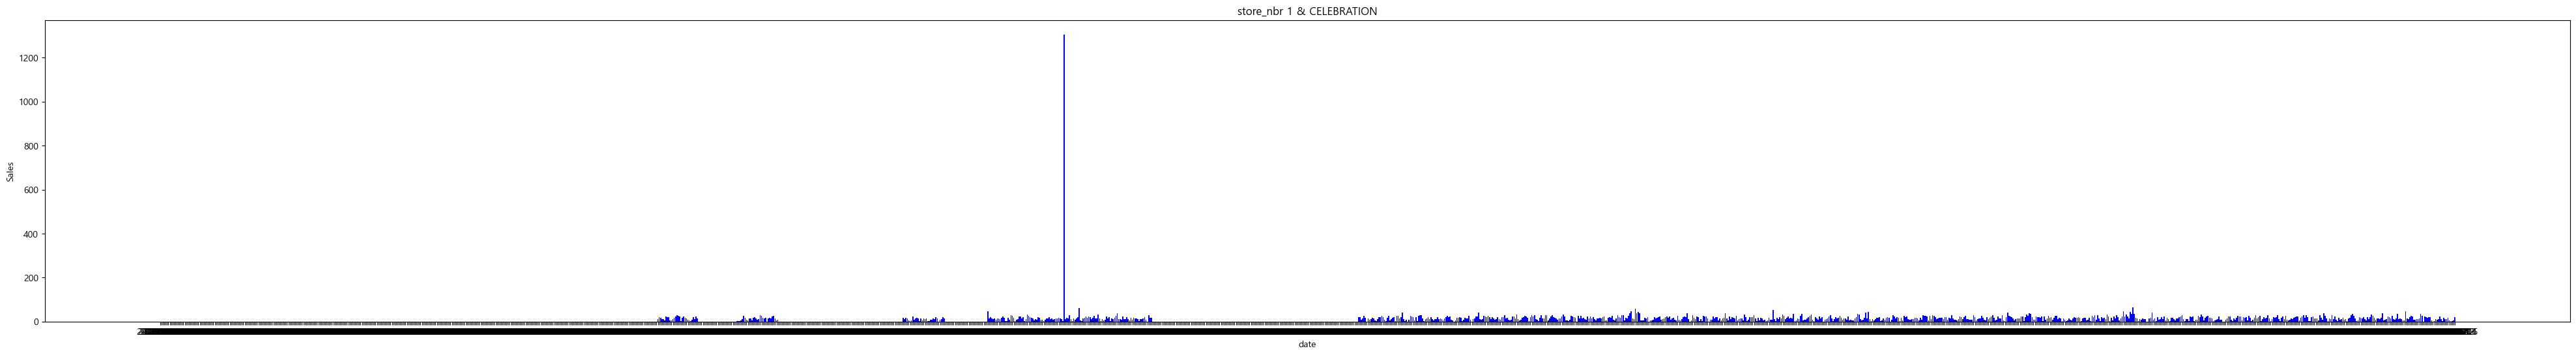

In [5]:
# CELEBRATION
for i in range(1,2):

    filtered_data = train[(train['store_nbr'] == i)&(train['family'] == 'CELEBRATION')]
    # 데이터 시각화
    plt.figure(figsize=(50, 6))
    plt.bar(filtered_data.date, filtered_data['sales'], color='blue')

    plt.xlabel('date')
    plt.ylabel('Sales')
    plt.title(f'store_nbr {i} & CELEBRATION')
    plt.show()

In [8]:
filtered_data['date'] = pd.to_datetime(filtered_data['date'])

C:\Users\user\AppData\Local\Temp\ipykernel_17648\1499976532.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['date'] = pd.to_datetime(filtered_data['date'])


In [15]:
filtered_data[filtered_data['sales']>=100]

id       date  store_nbr       family   sales  onpromotion
1181472  1181472 2014-10-27          1  CELEBRATION  1306.0            0

In [44]:
temp[(temp.store_nbr==1)&(temp.family=='CELEBRATION')&(temp['date']=='2014-10-27')]['sales']

21885    12.0
Name: sales, dtype: float64

In [51]:
temp.loc[(temp.store_nbr==1)&(temp.family=='CELEBRATION')&(temp['date']=='2014-10-27'), 'sales'] = 12

In [49]:
temp[(temp.store_nbr==1)&(temp.family=='CELEBRATION')&(temp['date'].dt.year==2014)&(temp['date'].dt.month==10)]

date  store_nbr       family   sales  onpromotion   city  \
21027 2014-10-01          1  CELEBRATION    27.0            0  Quito   
21060 2014-10-02          1  CELEBRATION    19.0            0  Quito   
21093 2014-10-03          1  CELEBRATION    18.0            0  Quito   
21126 2014-10-04          1  CELEBRATION    13.0            1  Quito   
21159 2014-10-05          1  CELEBRATION     6.0            0  Quito   
21192 2014-10-06          1  CELEBRATION    11.0            0  Quito   
21225 2014-10-07          1  CELEBRATION     7.0            0  Quito   
21258 2014-10-08          1  CELEBRATION    19.0            0  Quito   
21291 2014-10-09          1  CELEBRATION    17.0            0  Quito   
21324 2014-10-10          1  CELEBRATION     8.0            0  Quito   
21357 2014-10-11          1  CELEBRATION     8.0            0  Quito   
21390 2014-10-12          1  CELEBRATION     3.0            0  Quito   
21423 2014-10-13          1  CELEBRATION     7.0            0  Quito   
21456 2014-10-14          1  CELEBRATION    14.0            0  Quito   
21489 2014-10-15          1  CELEBRATION    15.0            0  Quito   
21522 2014-10-16          1  CELEBRATION    19.0            0  Quito   
21555 2014-10-17          1  CELEBRATION    12.0            0  Quito   
21588 2014-10-18          1  CELEBRATION    14.0            0  Quito   
21621 2014-10-19          1  CELEBRATION     7.0            0  Quito   
21654 2014-10-20          1  CELEBRATION    12.0            0  Quito   
21687 2014-10-21          1  CELEBRATION    14.0            0  Quito   
21720 2014-10-22          1  CELEBRATION    13.0            0  Quito   
21753 2014-10-23          1  CELEBRATION    17.0            0  Quito   
21786 2014-10-24          1  CELEBRATION    14.0            0  Quito   
21819 2014-10-25          1  CELEBRATION    10.0            0  Quito   
21852 2014-10-26          1  CELEBRATION     3.0            0  Quito   
21885 2014-10-27          1  CELEBRATION  1306.0            0  Quito   
21918 2014-10-28          1  CELEBRATION    12.0            0  Quito   
21951 2014-10-29          1  CELEBRATION    17.0            0  Quito   
21984 2014-10-30          1  CELEBRATION    14.0            0  Quito   
22017 2014-10-31          1  CELEBRATION    28.0            0  Quito   

           state type  cluster  transactions day_of_week  oil_price  \
21027  Pichincha    D       13        1934.0   Wednesday      90.74   
21060  Pichincha    D       13        1752.0    Thursday      91.02   
21093  Pichincha    D       13        1935.0      Friday      89.76   
21126  Pichincha    D       13        1380.0    Saturday      90.33   
21159  Pichincha    D       13         527.0      Sunday      90.33   
21192  Pichincha    D       13        1736.0      Monday      90.33   
21225  Pichincha    D       13        1761.0     Tuesday      88.89   
21258  Pichincha    D       13        1768.0   Wednesday      87.29   
21291  Pichincha    D       13        1777.0    Thursday      85.76   
21324  Pichincha    D       13         603.0      Friday      85.87   
21357  Pichincha    D       13        1106.0    Saturday      85.73   
21390  Pichincha    D       13         465.0      Sunday      85.73   
21423  Pichincha    D       13        1801.0      Monday      85.73   
21456  Pichincha    D       13        1807.0     Tuesday      81.72   
21489  Pichincha    D       13        1872.0   Wednesday      81.82   
21522  Pichincha    D       13        1725.0    Thursday      82.33   
21555  Pichincha    D       13        1741.0      Friday      82.80   
21588  Pichincha    D       13        1342.0    Saturday      82.76   
21621  Pichincha    D       13         549.0      Sunday      82.76   
21654  Pichincha    D       13        1785.0      Monday      82.76   
21687  Pichincha    D       13        1659.0     Tuesday      83.25   
21720  Pichincha    D       13        1742.0   Wednesday      80.52   
21753  Pichincha    D       13        1684.0    Thursday      82.81   
217

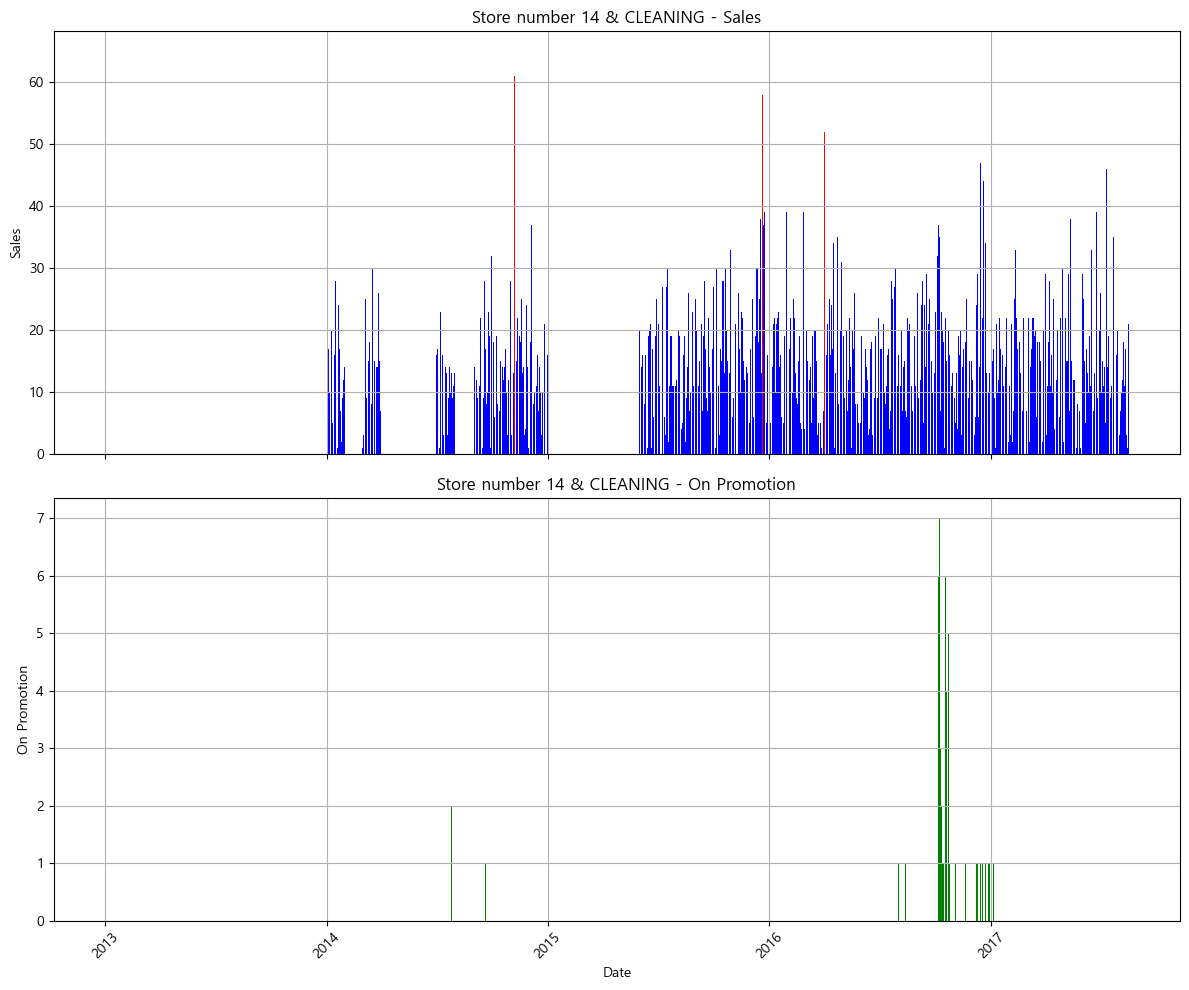

In [52]:
import numpy as np
#df = temp[ (temp['year']==2017)& (temp['store_nbr']==14) & (temp['family']=='CLEANING') ][['date','sales']]
# 필터링된 데이터 생성
df = temp[(temp.store_nbr==1)&(temp.family=='CELEBRATION')][['date', 'sales', 'onpromotion']]

# 표준편차 방법으로 이상치 탐지 함수
def find_outliers_std(df):
    outliers = pd.DataFrame()
    for column in df[['sales']]:  # sales 컬럼만 이상치 탐지
        mean = df[column].mean()
        std = df[column].std()
        lower_bound = mean - 4 * std
        upper_bound = mean + 4 * std
        outliers[column] = (df[column] < lower_bound) | (df[column] > upper_bound)
    return outliers

# 이상치 탐지
outliers_std = find_outliers_std(df)

# 그래프 생성
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# 첫 번째 그래프: sales 값
bars = ax1.bar(df['date'], df['sales'], color=np.where(outliers_std['sales'], 'r', 'b'))
ax1.set_ylabel('Sales')
ax1.set_title('Store number 14 & CLEANING - Sales')
ax1.grid(True)

# 두 번째 그래프: onpromotion 값
ax2.bar(df['date'], df['onpromotion'], color='g')
ax2.set_xlabel('Date')
ax2.set_ylabel('On Promotion')
ax2.set_title('Store number 14 & CLEANING - On Promotion')
ax2.grid(True)

# x축 레이블 회전
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## 요일별 매출: 14, CLEANING

In [65]:
test2015 = temp[(temp.date.dt.year==2015)&(temp.store_nbr==1)&(temp.family=='CELEBRATION')].groupby('day_of_week')['sales'].mean().reset_index()
test2016 = temp[(temp.date.dt.year==2016)&(temp.store_nbr==1)&(temp.family=='CELEBRATION')].groupby('day_of_week')['sales'].mean().reset_index()
test2017 = temp[(temp.date.dt.year==2017)&(temp.store_nbr==1)&(temp.family=='CELEBRATION')].groupby('day_of_week')['sales'].mean().reset_index()

In [63]:
test

day_of_week      sales
0      Friday  22.867925
1      Monday  13.557692
2    Saturday  15.943396
3      Sunday   4.392157
4    Thursday  17.653846
5     Tuesday  15.788462
6   Wednesday  19.269231

C:\Users\user\AppData\Local\Temp\ipykernel_17648\3474476678.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_day, x='day_of_week', y='sales', palette='coolwarm')


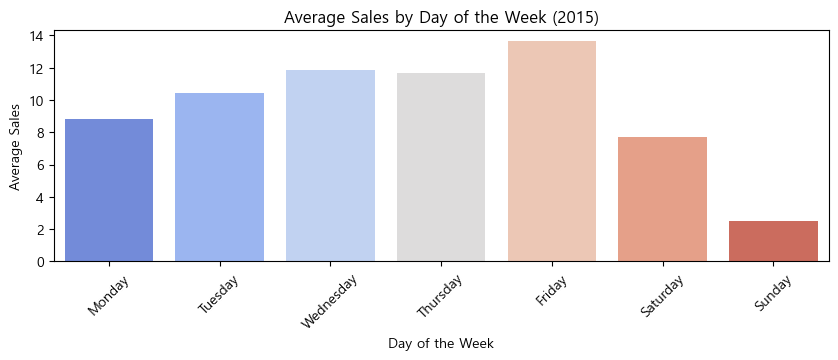

C:\Users\user\AppData\Local\Temp\ipykernel_17648\3474476678.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_day, x='day_of_week', y='sales', palette='coolwarm')


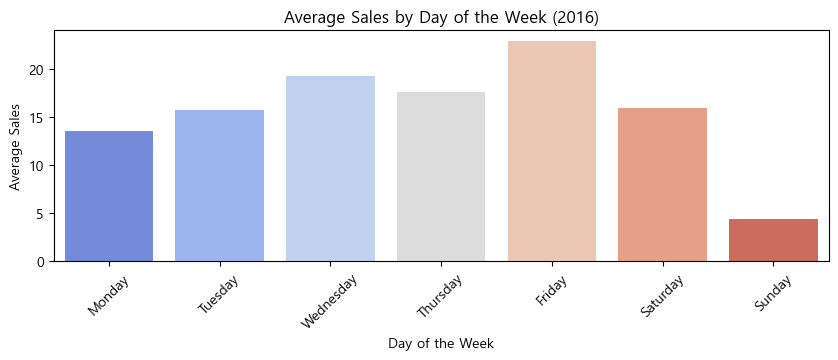

C:\Users\user\AppData\Local\Temp\ipykernel_17648\3474476678.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_day, x='day_of_week', y='sales', palette='coolwarm')


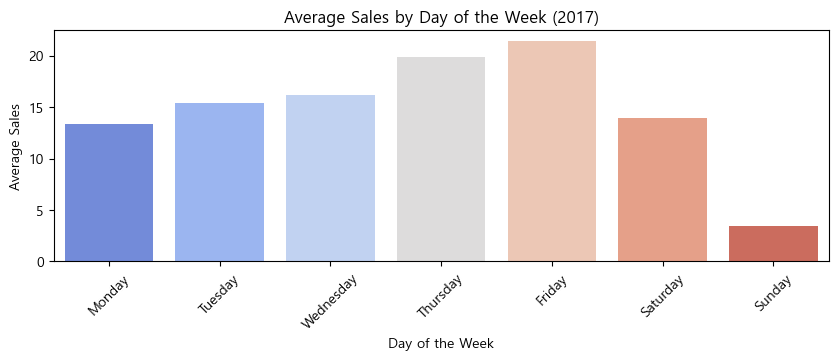

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in range(2015,2018):

    # 요일별 매출 집계
    #sales_by_day = globals()[f'temp19_{i}'].groupby('day_of_week')['sales'].mean().reset_index()
    sales_by_day = globals()[f'test{i}']

    # 요일 순서 정렬
    days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    sales_by_day['day_of_week'] = pd.Categorical(sales_by_day['day_of_week'], categories=days_order, ordered=True)
    sales_by_day = sales_by_day.sort_values('day_of_week')

    # 요일별 매출 시각화
    plt.figure(figsize=(10, 3))
    sns.barplot(data=sales_by_day, x='day_of_week', y='sales', palette='coolwarm')
    plt.title(f'Average Sales by Day of the Week ({i})')
    plt.xlabel('Day of the Week')
    plt.ylabel('Average Sales')
    plt.xticks(rotation=45)
    plt.show()


## 이상치 탐색: 14, CLEANING
onpromotion이 특정값 이상인 경우에 며칠 후에 매출에 영향을 미친다

In [17]:
df.describe()

sales  transactions
count  1684.000000   1684.000000
mean      0.938242   1312.290974
std       3.317035    188.766593
min       0.000000      0.000000
25%       0.000000   1234.000000
50%       0.000000   1330.000000
75%       1.000000   1416.000000
max     116.000000   2314.000000

In [28]:
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100) 
temp[(temp['sales']==116) & (temp['store_nbr']==15) & (temp['family']=='BABY CARE')]

date  store_nbr     family  sales  onpromotion    city  \
364552  2015-08-04         15  BABY CARE  116.0            0  Ibarra   

           state type  cluster  transactions day_of_week  oil_price  \
364552  Imbabura    C       15        1548.0     Tuesday      45.75   

        magnitude  deaths  local_holiday  regional_holiday  national_holiday  \
364552        0.0     0.0              0                 0                 0   

        event_holiday  wage  year  month  day  
364552              0     0  2015      8    4

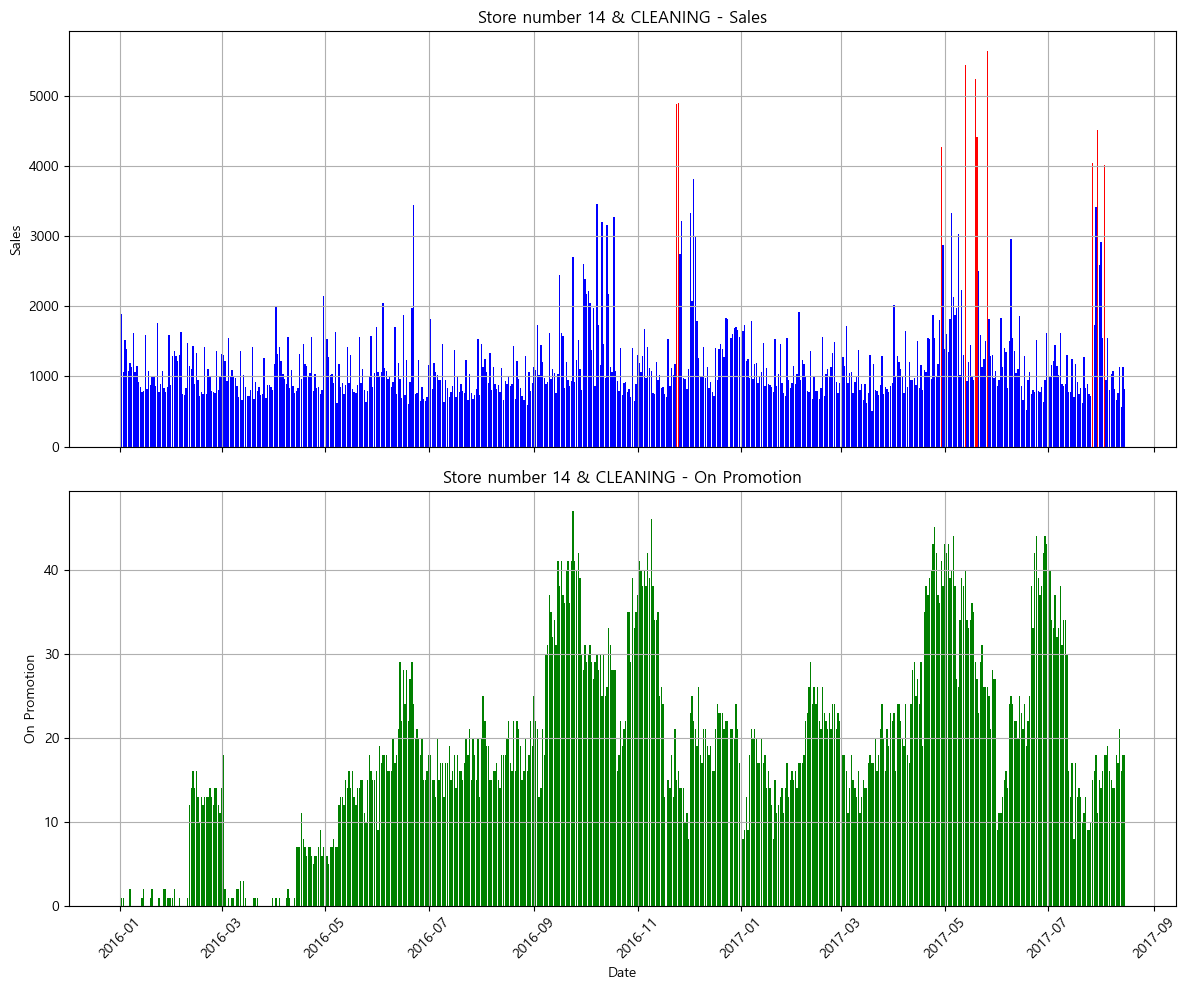

In [61]:
import numpy as np
#df = temp[ (temp['year']==2017)& (temp['store_nbr']==14) & (temp['family']=='CLEANING') ][['date','sales']]
# 필터링된 데이터 생성
df = temp[(temp['year'].isin([2016, 2017])) & (temp['store_nbr'] == 14) & (temp['family'] == 'CLEANING')][['date', 'sales', 'onpromotion']]

# 표준편차 방법으로 이상치 탐지 함수
def find_outliers_std(df):
    outliers = pd.DataFrame()
    for column in df[['sales']]:  # sales 컬럼만 이상치 탐지
        mean = df[column].mean()
        std = df[column].std()
        lower_bound = mean - 4 * std
        upper_bound = mean + 4 * std
        outliers[column] = (df[column] < lower_bound) | (df[column] > upper_bound)
    return outliers

# 이상치 탐지
outliers_std = find_outliers_std(df)

# 그래프 생성
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# 첫 번째 그래프: sales 값
bars = ax1.bar(df['date'], df['sales'], color=np.where(outliers_std['sales'], 'r', 'b'))
ax1.set_ylabel('Sales')
ax1.set_title('Store number 14 & CLEANING - Sales')
ax1.grid(True)

# 두 번째 그래프: onpromotion 값
ax2.bar(df['date'], df['onpromotion'], color='g')
ax2.set_xlabel('Date')
ax2.set_ylabel('On Promotion')
ax2.set_title('Store number 14 & CLEANING - On Promotion')
ax2.grid(True)

# x축 레이블 회전
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## onpromotion의 영향도 분석 --> 당일에 영향을 매우 끼치며, LAG가 영향을 끼치는지는 상점,품목별로 달라지지만...큰 영향은 없는 것 같다.

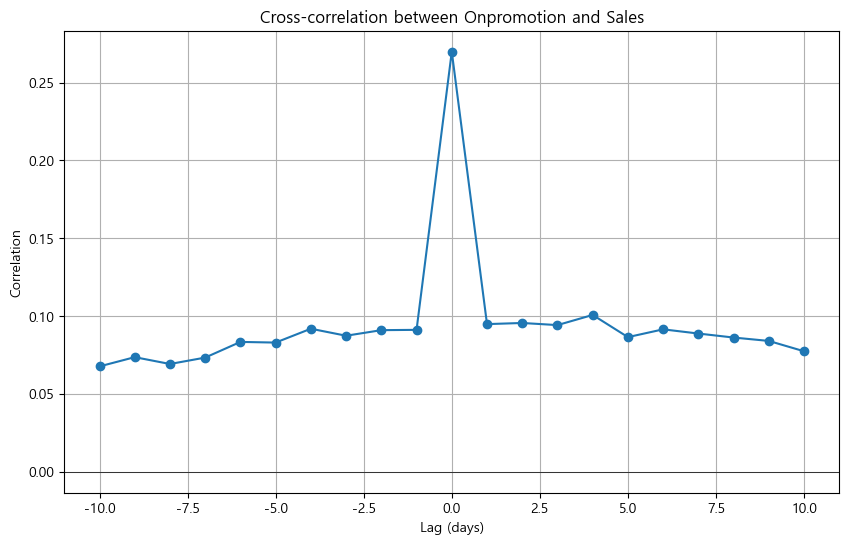

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# 필터링된 데이터 생성 & (temp['store_nbr'] == 25) 
df = temp[(temp['year'].isin([2016, 2017])) & (temp['family'] == 'POULTRY')][['date', 'sales', 'onpromotion']]

# 데이터 시간순 정렬
df = df.sort_values('date').reset_index(drop=True)

# 상관 분석 함수
def cross_correlation(df, lag):
    return df['onpromotion'].shift(lag).corr(df['sales'])

# 다양한 시차에 대한 상관계수 계산
lags = range(-10, 11)
correlations = [cross_correlation(df, lag) for lag in lags]

# 상관계수 시각화
plt.figure(figsize=(10, 6))
plt.plot(lags, correlations, marker='o')
plt.xlabel('Lag (days)')
plt.ylabel('Correlation')
plt.title('Cross-correlation between Onpromotion and Sales')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.show()


그래프는 'onpromotion'과 'sales' 간의 시차에 따른 상관관계를 나타냅니다. 이 그래프를 해석하는 방법을 단계별로 설명하겠습니다.

### 그래프 해석

1. **x축 (Lag days)**: 
   - 시차를 나타냅니다. 음수 값은 'onpromotion'이 'sales'보다 먼저 발생한 경우를 의미하고, 양수 값은 'sales'가 'onpromotion'보다 먼저 발생한 경우를 의미합니다.
   - 예를 들어, `Lag = -10`은 'onpromotion'이 10일 전에 발생했을 때의 'sales'와의 상관관계를 나타내며, `Lag = 10`은 'onpromotion'이 10일 후에 발생했을 때의 'sales'와의 상관관계를 나타냅니다.

2. **y축 (Correlation)**: 
   - 'onpromotion'과 'sales' 간의 상관관계 값을 나타냅니다. 값이 클수록 두 변수 간의 상관관계가 높다는 것을 의미합니다.

### 주요 관찰 사항

1. **양수 상관관계 (Lag > 0)**:
   - `Lag = 10`에서 상관관계가 가장 높습니다. 이는 'onpromotion' 이벤트가 발생한 후 10일 후에 매출이 가장 많이 상승하는 경향이 있음을 나타냅니다.
   - `Lag = 5`와 `Lag = 7.5`에서도 상관관계가 높아, 'onpromotion' 이벤트가 발생한 후 5일과 7.5일 후에도 매출이 상승하는 경향이 있음을 나타냅니다.

2. **음수 상관관계 (Lag < 0)**:
   - `Lag = -5`에서 상관관계가 상대적으로 높습니다. 이는 'sales'가 'onpromotion' 이벤트보다 5일 먼저 증가할 때도 있음을 의미합니다.
   - 그러나 전반적으로 음수 시차에서의 상관관계는 양수 시차에서의 상관관계보다 낮습니다. 이는 일반적으로 'onpromotion' 이벤트가 먼저 발생하고, 이후 매출이 상승하는 패턴을 강화합니다.

3. **상관관계 값의 변동**:
   - 상관관계 값이 0.1에서 0.2 사이를 변동하고 있습니다. 이는 'onpromotion'이 매출에 영향을 미치지만, 그 영향이 상대적으로 제한적임을 나타냅니다.

### 결론

그래프에서 볼 수 있듯이 'onpromotion' 이벤트가 발생한 후 며칠 후에 매출이 상승하는 경향이 있음을 확인할 수 있습니다. 특히, 'onpromotion' 이벤트가 발생한 후 10일 후에 매출이 가장 많이 상승하는 경향이 있습니다. 이를 통해 마케팅 전략을 세울 때 'onpromotion' 이벤트 후 10일 동안의 매출 상승을 기대할 수 있으며, 이 기간 동안 추가적인 프로모션이나 마케팅 활동을 집중하는 것이 효과적일 수 있습니다.

이 분석을 바탕으로 더 많은 기간에 대해 데이터를 분석하거나, 다른 변수와의 상관관계를 추가로 분석하여 더 정교한 마케팅 전략을 수립할 수 있습니다. 추가적인 질문이나 분석이 필요하시면 언제든지 말씀해 주세요!


### temp에 변수 추가
# 시차 변수 생성 (예: 1일, 2일, 5일, 10일 후의 'onpromotion' 값)
for lag in [1, 2, 5, 10]:
    df[f'onpromotion_lag{lag}'] = df['onpromotion'].shift(lag)

## wage lag 살펴보기 --> 관련이 없다

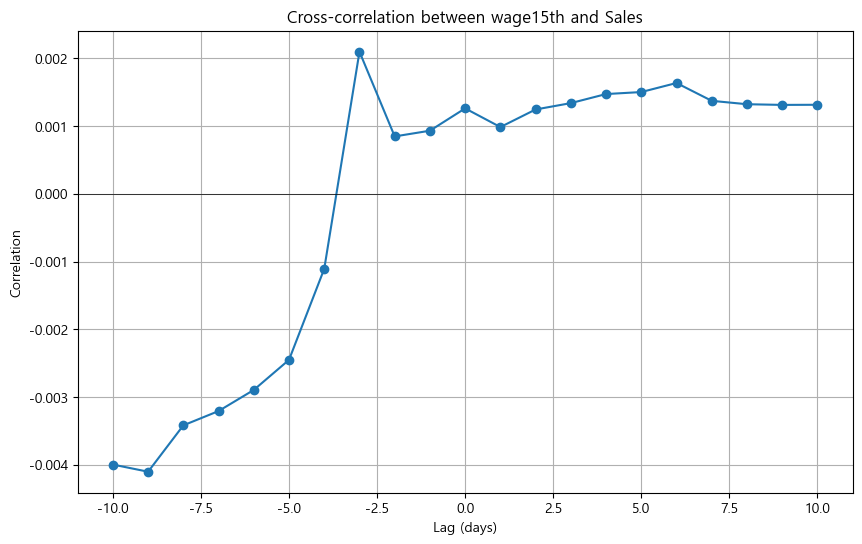

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# 필터링된 데이터 생성
df = temp[(temp['year'].isin([2016, 2017])) & (temp['store_nbr'] == 54) & (temp['family'] == 'AUTOMOTIVE')][['date', 'sales', 'wage15th']]

# 데이터 시간순 정렬
df = df.sort_values('date').reset_index(drop=True)

# 상관 분석 함수
def cross_correlation(df, lag):
    return df['wage15th'].shift(lag).corr(df['sales'])

# 다양한 시차에 대한 상관계수 계산
lags = range(-10, 11)
correlations = [cross_correlation(df, lag) for lag in lags]

# 상관계수 시각화
plt.figure(figsize=(10, 6))
plt.plot(lags, correlations, marker='o')
plt.xlabel('Lag (days)')
plt.ylabel('Correlation')
plt.title('Cross-correlation between wage15th and Sales')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.show()


## holiday lag 살펴보기 --> 관게없음.

In [74]:
temp.columns

Index(['date', 'store_nbr', 'family', 'sales', 'onpromotion', 'city', 'state',
       'type', 'cluster', 'transactions', 'day_of_week', 'oil_price',
       'magnitude', 'deaths', 'local_holiday', 'regional_holiday',
       'national_holiday', 'event_holiday', 'wage', 'year', 'month', 'day',
       'onpromotion_lag1', 'onpromotion_lag2', 'onpromotion_lag5',
       'onpromotion_lag10', 'season', 'wage15th', 'wagelastday'],
      dtype='object')

In [81]:
temp['family'].unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

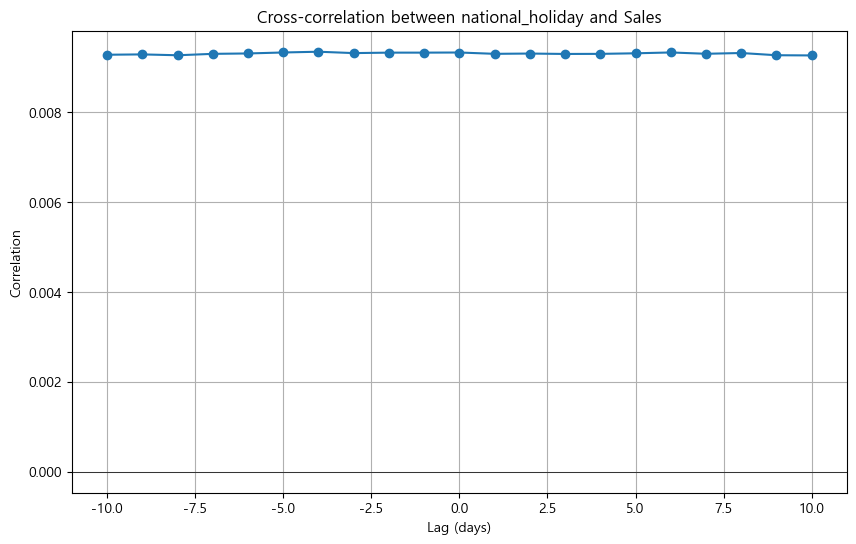

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# 필터링된 데이터 생성 & (temp['store_nbr'] == 14)  & (temp['family'] == 'CELEBRATION')
df = temp[(temp['year'].isin([2016, 2017])) ][['date', 'sales', 'event_holiday']]

# 데이터 시간순 정렬
df = df.sort_values('date').reset_index(drop=True)

# 상관 분석 함수
def cross_correlation(df, lag):
    return df['event_holiday'].shift(lag).corr(df['sales'])

# 다양한 시차에 대한 상관계수 계산
lags = range(-10, 11)
correlations = [cross_correlation(df, lag) for lag in lags]

# 상관계수 시각화
plt.figure(figsize=(10, 6))
plt.plot(lags, correlations, marker='o')
plt.xlabel('Lag (days)')
plt.ylabel('Correlation')
plt.title('Cross-correlation between national_holiday and Sales')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.show()
